## Project Topic: Dimensionality Reduction and Time Series forecasting of a dataset to be found. 
### Course: Machine Learning " ITCS 6156/8156"
#### Team Names: Alex Browning, Patrick Bounds, Rajnish Deo, Spencer Nichols (Group 7)

<img src = "https://www.sas.com/en_au/insights/articles/big-data/5-machine-learning-mistakes/_jcr_content/socialShareImage.img.1b37c987d5324585a66791ae31ee9fb8.png">

## Introduction
Stock market forecasting is the process of predicting the future prices of stocks, using various analytical techniques and tools. It is a complex and challenging task due to the dynamic nature of financial markets and the many factors that can impact stock prices, including economic indicators, company performance, market sentiment, and geopolitical events.

There are several approaches to stock market forecasting, including technical analysis, fundamental analysis, and quantitative analysis. Technical analysis involves studying historical price and volume data to identify patterns and trends that can be used to predict future price movements. Fundamental analysis involves analyzing company financial statements, industry trends, and macroeconomic factors to evaluate the underlying value of a stock. Quantitative analysis involves using mathematical and statistical models to analyze past data and make predictions about future stock prices.

Some of the commonly used techniques for stock market forecasting include time series analysis, regression analysis, neural networks, and machine learning. These techniques can be used to identify patterns and relationships in historical data, and make predictions based on these patterns.

It is important to note that stock market forecasting is not an exact science, and there is always a degree of uncertainty in predicting future stock prices. However, by using a combination of techniques and approaches, and by continually monitoring and adjusting forecasts as new information becomes available, investors and analysts can make informed decisions about buying and selling stocks.

The goal of this project is to tackle the problem of stock market price prediction using machine learning time series forecasting techniques. Here, we have used the tools that are Python, numpy, matplotlib, pandas, and Jupyter notebook. Jupyter notebook is the platform where will be writing the python codes utilizing the moduels like numpy, pandas, matplotlib, sklearn and many more inorder to organize the import the dataset, arrange them in order and plot various graphs to extract information from them, split the dataset for training and validation and many more. 


## Introduction to Dataset

In this project, we used the US stock and ETFs trading dataset which has been extracted from the Source:Kaggle Repository whose link is [Kaggle Data Repository](https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs)
 
The extracted dataset is of the historical daily price and volume for all US-based stocks and ETFs trading on the NYSE, NASDAQ, and NYSE MKT, etc. The dataset consists of values till date: 11/10/2017 which comprises of following features such as Date, Open, High, Low, Close, Volume, OpenInt. Note that prices have been adjusted for dividends and splits.
 <img src = "https://storage.googleapis.com/kaggle-datasets-images/4538/7213/0ef205a10621870d2d873557864474ff/dataset-cover.jpg?t=2017-11-17-03-48-42">

## Data Import, Visualization and Pre-Processing

In [2]:
# import Liabraries 
import os # operating system module
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization and plotting
import seaborn as sns # statistical plotting
from datetime import datetime # Convert Datetime 
from sklearn.model_selection import TimeSeriesSplit, train_test_split # for linear model
#import statsmodels.api as sm # Statistical Tool
from pylab import rcParams

#### Importing Dataset

In [ ]:
# Setting up the Dataset Directory
os.chdir("C:\\Users\\rjdeo\\OneDrive - University of North Carolina at Charlotte\\Spring 2023\\ICTS 6156\\Project\\Dataset\\Data_Stockand ETP\\Data\\stocks")
print(f"The current path for your notebook is:\n {os.getcwd()} \n")
print(f"Your notebook is currently in the following directory:\n {os.path.basename(os.getcwd())}")

The current path for your notebook is:
 C:\Users\rjdeo\OneDrive - University of North Carolina at Charlotte\Spring 2023\ICTS 6156\Project\Dataset\Data_Stockand ETP\Data\stocks 

Your notebook is currently in the following directory:
 stocks


In [79]:
# Total no. of dataset available for the forecasting/Training and  Validation Dataset
import glob
Stocks = glob.glob(r"C:\Users\rjdeo\OneDrive - University of North Carolina at Charlotte\Spring 2023\ICTS 6156\Project\Dataset\Data_Stockand ETP\Data\Stocks\*.txt") # your directory path
ETFs =  glob.glob(r"C:\Users\rjdeo\OneDrive - University of North Carolina at Charlotte\Spring 2023\ICTS 6156\Project\Dataset\Data_Stockand ETP\Data\ETFs\*.txt") # your directory path
print('Number of files in Stocks: ', len(Stocks))
print('Number of files in ETFs: ', len(ETFs))

Number of files in Stocks:  7195
Number of files in ETFs:  1344


In [114]:
# Reading the txt Dataset of Tesla Stock Dataset
if not os.path.exists("tsla.us.txt"):
    raise Exception(f"The Stock Dataset is not detected in your local path! " \
                    f"You need to move the 'The Stock Dataset' file to the same " \
                    f"location/directory as this notebook which is {os.getcwd()}")
tesla_df = pd.read_csv("tsla.us.txt")  
display(tesla_df)

Date     Open     High      Low    Close  Volume  OpenInt
0     2005-02-25   5.1243   5.1243   4.9839   5.0430   32404        0
1     2005-02-28   5.1613   5.1613   5.0283   5.0283   65887        0
2     2005-03-01   4.9618   5.1096   4.9618   5.0875   52843        0
3     2005-03-02   5.1096   5.1316   4.9986   5.0506   48883        0
4     2005-03-03   5.0356   5.0947   5.0134   5.0580   22296        0
...          ...      ...      ...      ...      ...     ...      ...
3191  2017-11-06  15.0010  15.1000  14.7060  15.1000   24094        0
3192  2017-11-07  14.9500  15.0710  14.9500  15.0500   14542        0
3193  2017-11-08  15.0000  15.0000  14.9000  14.9000    3846        0
3194  2017-11-09  14.7450  15.2754  14.7000  15.0500    9679        0
3195  2017-11-10  15.0500  15.1500  14.8500  14.8500    7937        0

[3196 rows x 7 columns]

In [156]:
print("Min. Date:",tesla_df["Date"].min())
print("Max. Date:",tesla_df["Date"].max())

Min. Date: 2010-06-28 00:00:00
Max. Date: 2017-11-10 00:00:00


#### Creating Function

In [155]:
def convertdatetime(s):
    '''
    convert to date time objects

    s - str: the given date is Year-Month-Day
    '''
    date = pd.to_datetime(s)
    return date

def converttoday(dt):
    '''
    convert date time to weekday where monday = 0

    dt - datetimeobj: the given datetime
    '''

    dt =  dt.weekday()

    return dt

def nearendquarter(month,day):
    '''
    check to see if the day is near (1 week) the end of a quarter 

    month - int: month

    day - int: day
    '''

    if month in [3, 6, 9, 12]:
        if month in [3, 12]:
            if day in [31, 30, 29, 28, 27, 26, 25]:
                return 1
            else:
                return 0
        else:
            if day in [30, 29, 28, 27, 26, 25, 24]:
                return 1
            else: 
                return 0
    else:
        return 0

def readstock(f, viz):
    '''
    This will read in and clean stock data for us in time series work

    f - str: path to stock to be opened

    viz - Bool: show visualizations or not
    '''

    df_stock = pd.read_csv(f)

    if df_stock.isna().values.any():
        print('contains NaN values.')


    #now to add features
    splitted = df_stock['Date'].str.split('-', expand=True)
 
    df_stock['Day_date'] = splitted[2].astype('int')
    df_stock['Month'] = splitted[1].astype('int')
    df_stock['Year'] = splitted[0].astype('int')

    
    df_stock['near_end_quarter'] = df_stock.apply(lambda x: \
        nearendquarter(x['Month'], x['Day_date']), axis=1)

    df_stock['open-close'] = df_stock['Open'] - df_stock['Close']

    df_stock['high-low'] = df_stock['High'] - df_stock['Low']


    #convert Date to datetime in order to day the day of the week
    df_stock['Date'] = df_stock['Date'].apply(convertdatetime)

    df_stock['Day'] = df_stock['Date'].apply(converttoday)



    if (np.sum(df_stock['OpenInt'])==0):
        df_stock.drop('OpenInt',axis=1,inplace=True)



    #reindex by the date so it can be split into time series data later
    df_stock.set_index('Date',inplace=True)

    df_stock.sort_index(inplace=True)
    


    #visuals
    if viz == True:
        corr = df_stock.corr()

        sns.heatmap(corr)
        
        plt.figure()
        plt.scatter(df_stock.index,df_stock['Close'])

        for kk in df_stock.columns.values:
            plt.figure()
            plt.scatter(df_stock['Close'],df_stock[kk])
            plt.title(kk)
    # split into features and targets
    X = df_stock.drop(labels=['Close'],axis=1)
    # X = df_stock.drop(labels=['Open','Close','Volume','High','Low','Year'],axis=1)

    T = df_stock['Close']
    return df_stock, X, T
def check_df(dataframe, head=5):
    print("------------------ Shape --------------------")
    print(dataframe.shape)

    print("------------------ Types ---------------------")
    print(dataframe.dtypes)

    print("------------------ Head ---------------------")
    print(dataframe.head(head))

    print("------------------ Tail ---------------------")
    print(dataframe.tail(head))

    print("------------------ NA ---------------------")
    print(dataframe.isnull().sum())

    print("------------------ Statistics ---------------------")
    print(dataframe.describe())

#### Data Exploration, Visualization  and Pre-Processing

In [117]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1858 non-null   object 
 1   Open     1858 non-null   float64
 2   High     1858 non-null   float64
 3   Low      1858 non-null   float64
 4   Close    1858 non-null   float64
 5   Volume   1858 non-null   int64  
 6   OpenInt  1858 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 101.7+ KB


Text(0.5, 1.0, 'Price history')

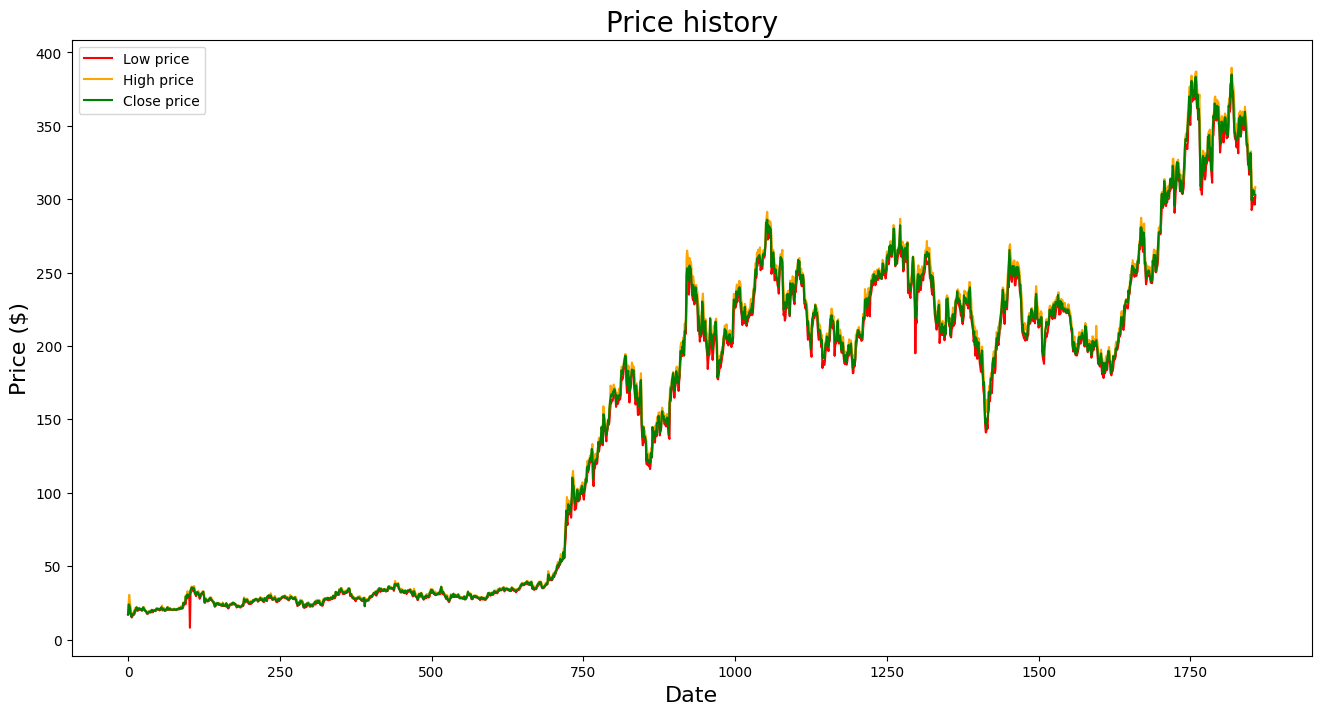

In [118]:
# Plot for the relation belween Date Vs Low, High and Close vlaue of Tesla Stock.
N = tesla_df.shape[0]
plt.figure(figsize = (16,8))
plt.plot(tesla_df['Low'], color = 'red', label = 'Low price')
plt.plot(tesla_df['High'], color = 'orange', label = 'High price')
plt.plot(tesla_df['Close'], color = 'green', label = 'Close price')
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Price ($)', fontsize = 16)
plt.legend()
plt.title('Price history', fontsize = 20)

From the above outputs, we understood that all of our features are float or integer except the date. From the info we can observe that date is classified as an "Object" where it has been recognised as string. Moreover, we can also see that there no null values in any of our features columns as the "No Null count" is not shown empty for any feature. Therefore, as we know that it is difficult to handle string and descirbed them during plot, we do convert the object "Date" into datetime as below using function "convertdatetime". The same has been verifed from teh above Price history plot where the X-axis does not displayed any Date value.

In [134]:
# Converting "Date" from object to datetime
tesla_df['Date'] = convertdatetime(tesla_df['Date'])
#verifying the above step
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1858 non-null   datetime64[ns]
 1   Open     1858 non-null   float64       
 2   High     1858 non-null   float64       
 3   Low      1858 non-null   float64       
 4   Close    1858 non-null   float64       
 5   Volume   1858 non-null   int64         
 6   OpenInt  1858 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 101.7 KB


From the above it is observed that date which was categorized as Object has been converted into Datetime format of Python using Pandas module.

Text(0.5, 1.0, 'Price history')

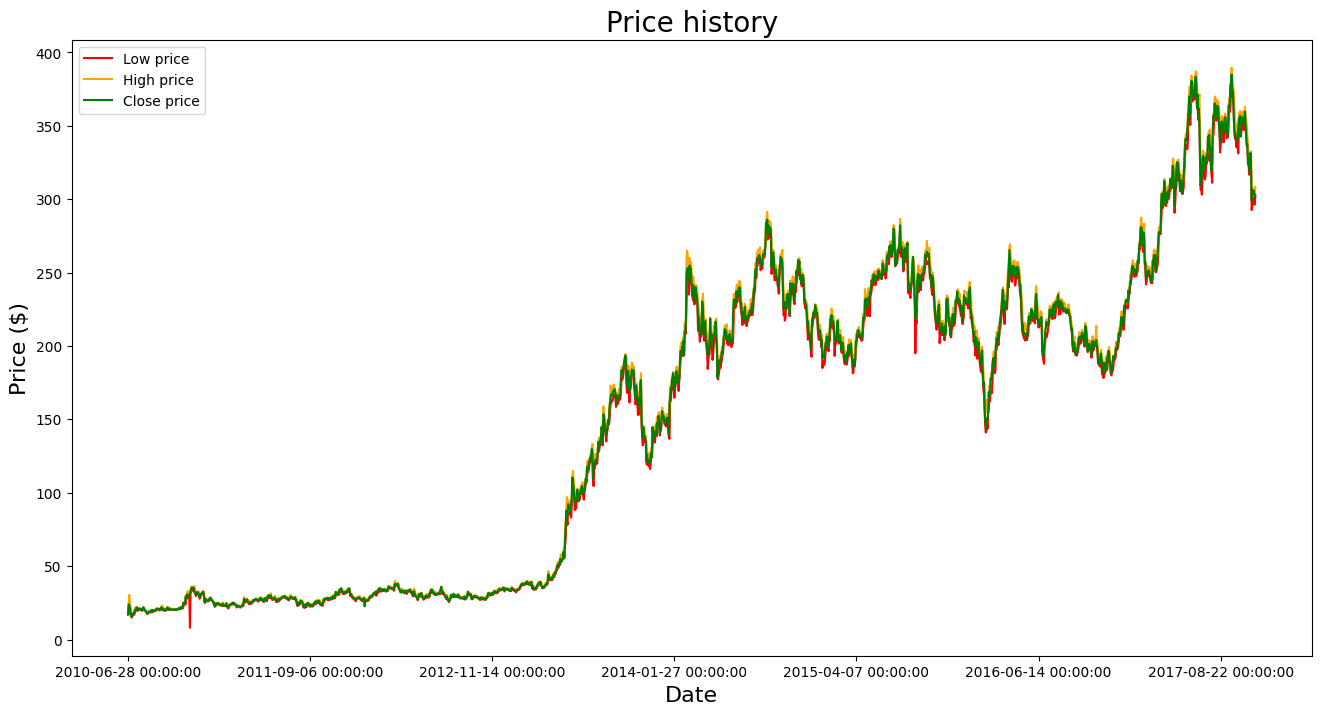

In [147]:
# Plot for the relation belween Date Vs Low, High and Close vlaue of Tesla Stock.
N = tesla_df.shape[0]
#creating Figue plot space
plt.figure(figsize = (16,8))
plt.plot(tesla_df['Low'], color = 'red', label = 'Low price')
plt.plot(tesla_df['High'], color = 'orange', label = 'High price')
plt.plot(tesla_df['Close'], color = 'green', label = 'Close price')
# plt.gca().xaxis.axis_date()
plt.xticks(np.arange(0,1857, 300), tesla_df['Date'][0:1857:300])
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Price ($)', fontsize = 16)
plt.legend()
plt.title('Price history', fontsize = 20)

In [158]:
# Checking the Shape, Dataset, Null Values and Statistical Values of Dataset.
check_df(tesla_df)

------------------ Shape --------------------
(3196, 7)
------------------ Types ---------------------
Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume       int64
OpenInt      int64
dtype: object
------------------ Head ---------------------
         Date    Open    High     Low   Close  Volume  OpenInt
0  2005-02-25  5.1243  5.1243  4.9839  5.0430   32404        0
1  2005-02-28  5.1613  5.1613  5.0283  5.0283   65887        0
2  2005-03-01  4.9618  5.1096  4.9618  5.0875   52843        0
3  2005-03-02  5.1096  5.1316  4.9986  5.0506   48883        0
4  2005-03-03  5.0356  5.0947  5.0134  5.0580   22296        0
------------------ Tail ---------------------
            Date    Open     High     Low  Close  Volume  OpenInt
3191  2017-11-06  15.001  15.1000  14.706  15.10   24094        0
3192  2017-11-07  14.950  15.0710  14.950  15.05   14542        0
3193  2017-11-08  15.000  15.0000  14.900  14.90    3846        0
3194  2017-11-09

We know Standard Deviation is a measure of dispersion of observation within dataset relative to their mean. From the above it is seen that mean and standard deviation follows the accepted range i.e. we have large mean and comparbly large standard deviation which means that they do not differ much from other. 

In [164]:

numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt']
tesla_df[numeric_columns].corr()

Open      High       Low     Close    Volume  OpenInt
Open     1.000000  0.999323  0.998948  0.998699 -0.044532      NaN
High     0.999323  1.000000  0.998751  0.999299 -0.038985      NaN
Low      0.998948  0.998751  1.000000  0.999245 -0.054746      NaN
Close    0.998699  0.999299  0.999245  1.000000 -0.048370      NaN
Volume  -0.044532 -0.038985 -0.054746 -0.048370  1.000000      NaN
OpenInt       NaN       NaN       NaN       NaN       NaN      NaN

<AxesSubplot: >

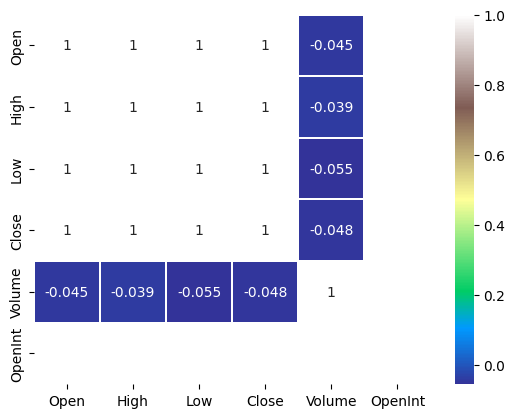

In [165]:
sns.heatmap(tesla_df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)

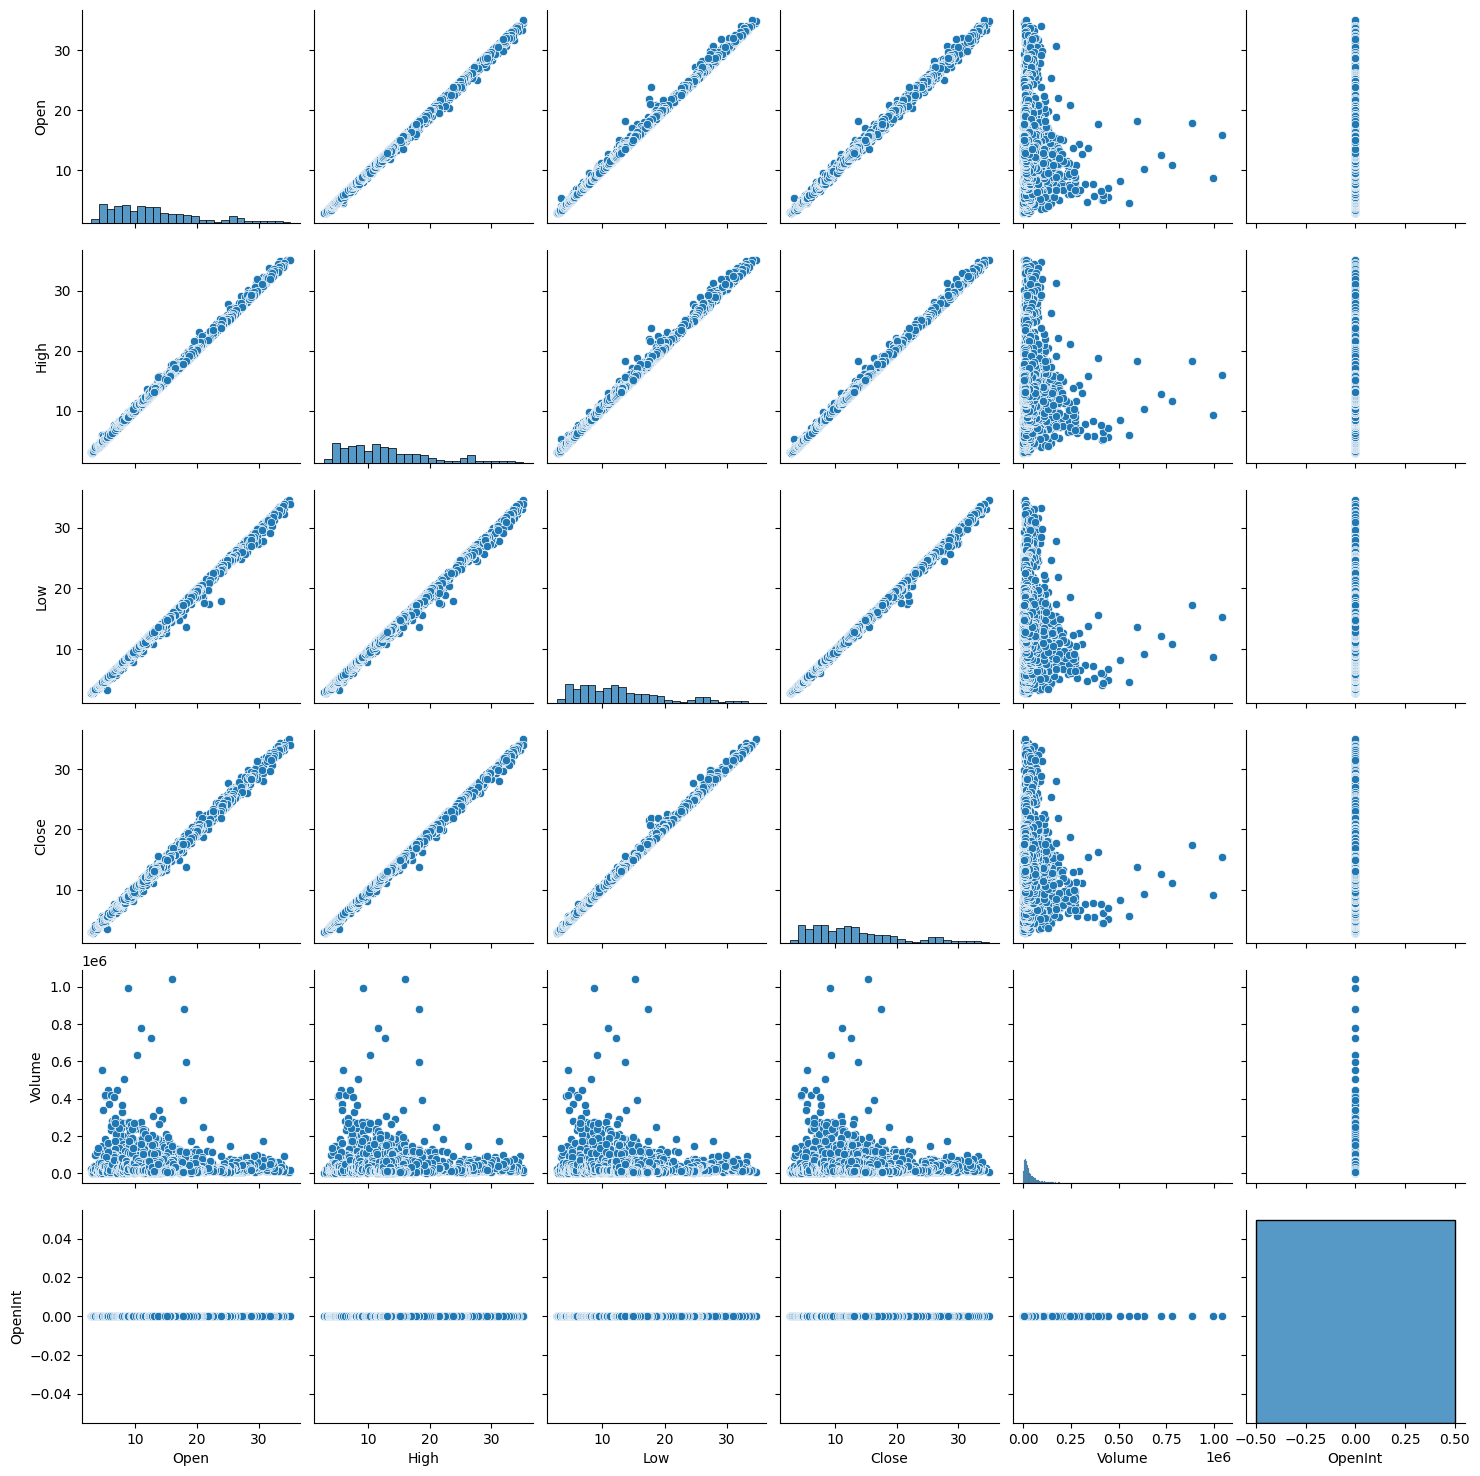

In [166]:
sns.pairplot(tesla_df[numeric_columns])

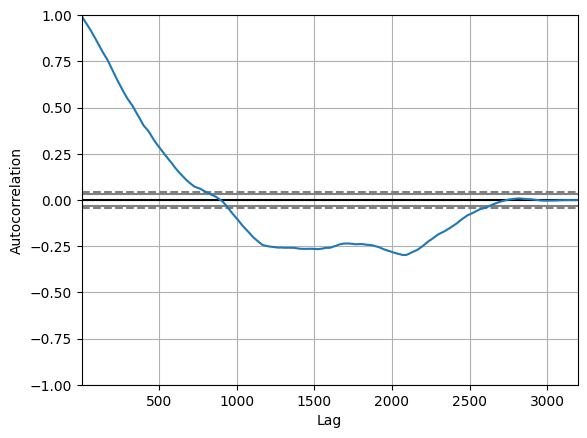

In [182]:
pd.plotting.autocorrelation_plot(tesla_df[['Open']])
plt.show()

From the above correlation and heatmap plot, it is observed that most of the features of stocks are highly co-related except the Volume which seems to be less co-related with other features. 

In [174]:
#analyze the highest opening value based on time
high_open = pd.pivot_table(tesla_df, index = 'Date', values = 'Open', aggfunc = {'Open' : np.max})
high_open.head()

Open
Date              
2005-02-25  5.1243
2005-02-28  5.1613
2005-03-01  4.9618
2005-03-02  5.1096
2005-03-03  5.0356

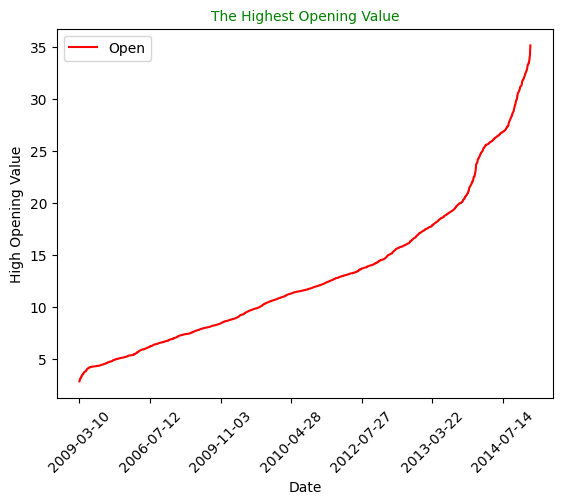

In [175]:
#visualize the Highest Opening value dataset
chart = high_open.sort_values(by = 'Open', ascending = True).plot(kind = 'line', color = 'red')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('The Highest Opening Value', fontsize = 10, color = 'green', loc = 'center', pad = 6)
plt.xlabel('Date')
plt.ylabel('High Opening Value')
plt.show()

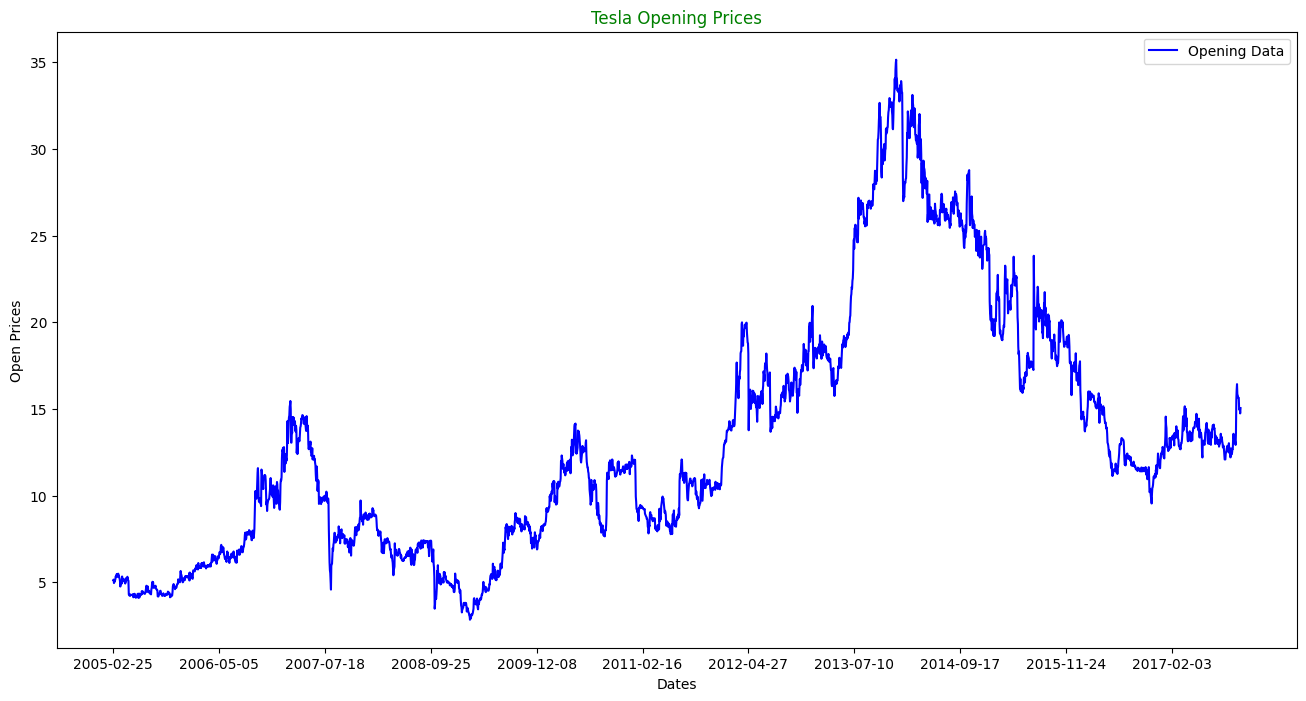

In [203]:
# Visualizing the Opening Prices Vs Time
plt.figure(figsize=(16,8))
plt.title('Tesla Opening Prices', color="green")
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.xticks(np.arange(0,3300, 300), tesla_df['Date'][0:3300:300])
plt.plot(tesla_df['Open'], 'blue', label='Opening Data')
plt.legend()

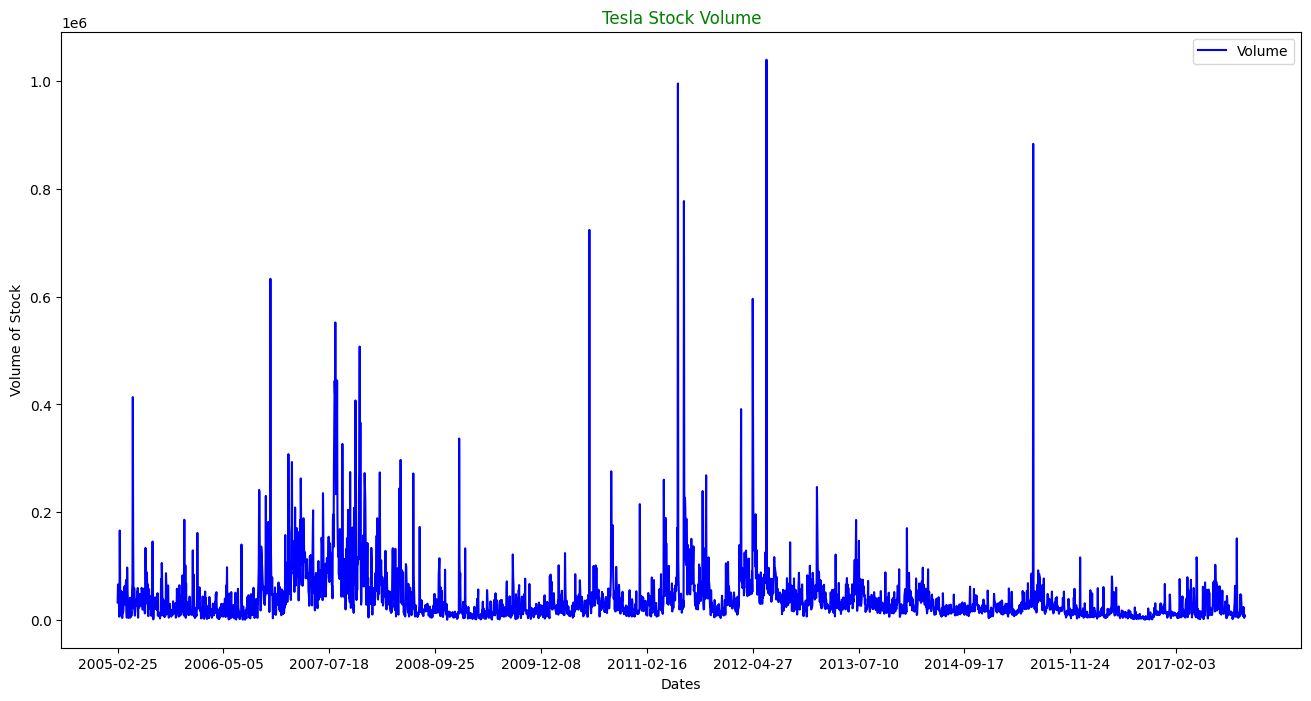

In [212]:
# Visualizing the Volume Vs Time
plt.figure(figsize=(16,8))
plt.title('Tesla Stock Volume', color="green")
plt.xlabel('Dates')
plt.ylabel('Volume of Stock')
plt.xticks(np.arange(0,3300, 300), tesla_df['Date'][0:3300:300])
plt.plot(tesla_df['Volume'], 'blue', label='Volume')
plt.legend()

Text(0.5, 0.98, 'Open decomposition')

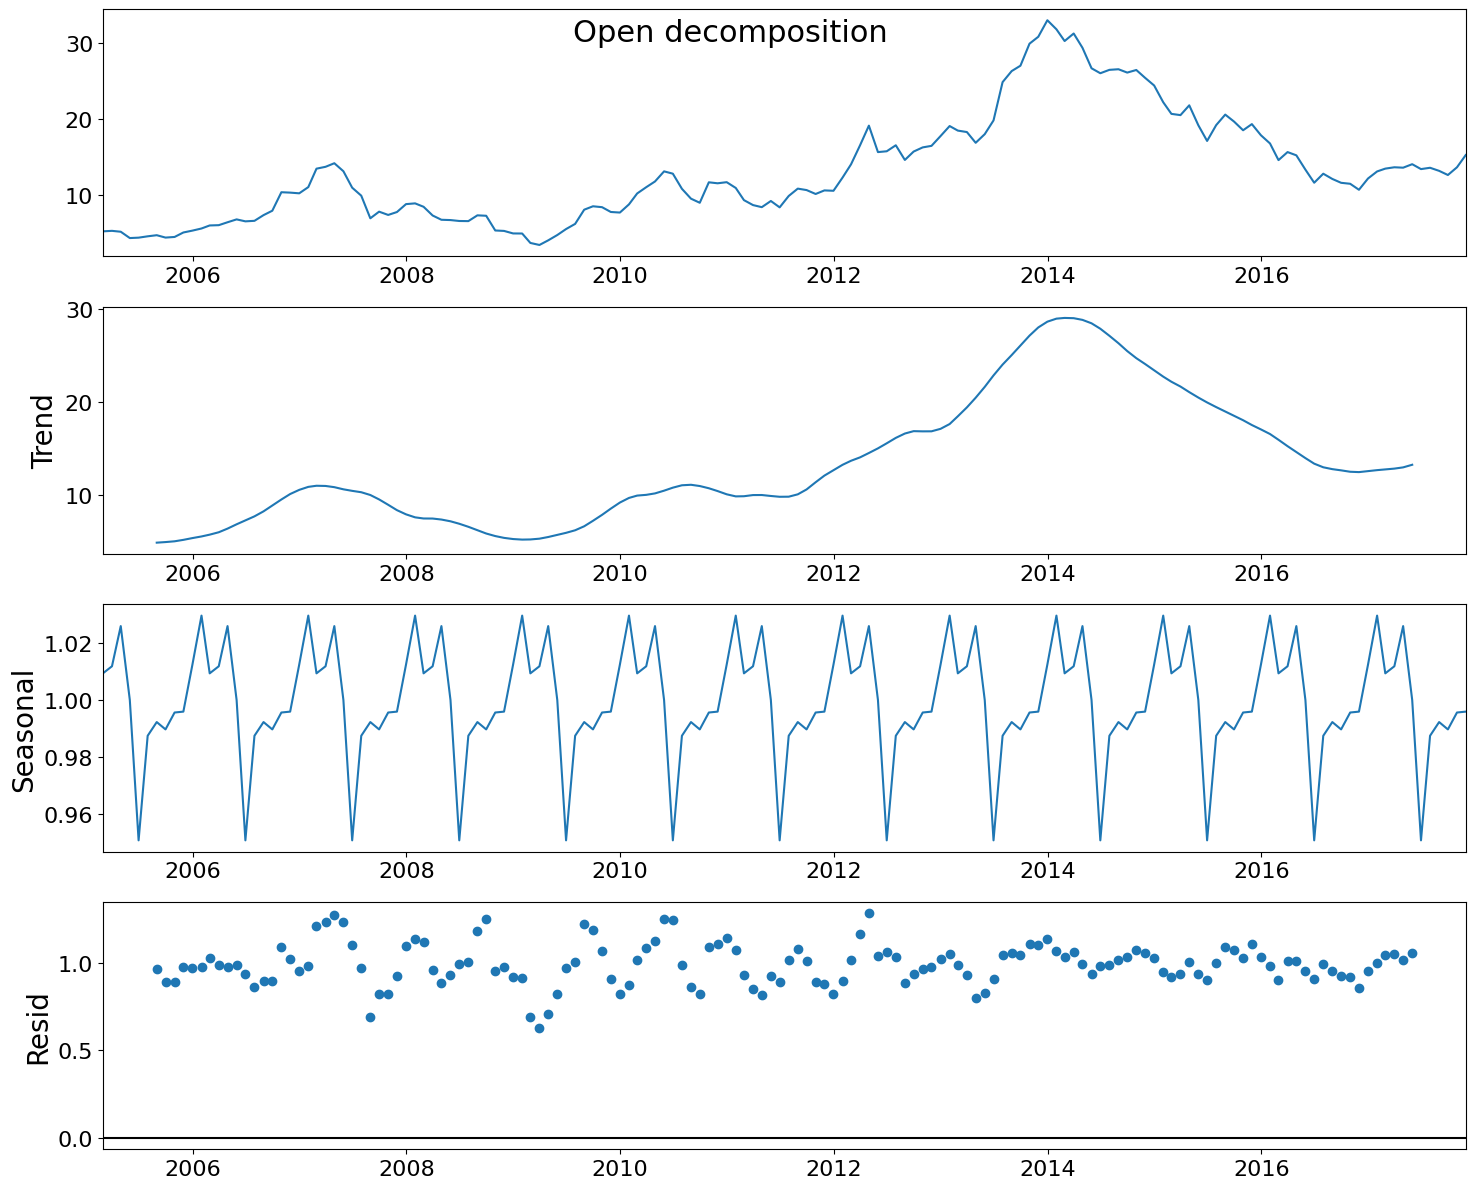

In [216]:
# Aggregating the Time Series to a monthly scaled index
y = tesla_df[['Date','Open']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

# Setting rcparams
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16

# Using statistical tools of statsmodel library
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
decomp = decomposition.plot()
decomp.suptitle('Open decomposition', fontsize=22)

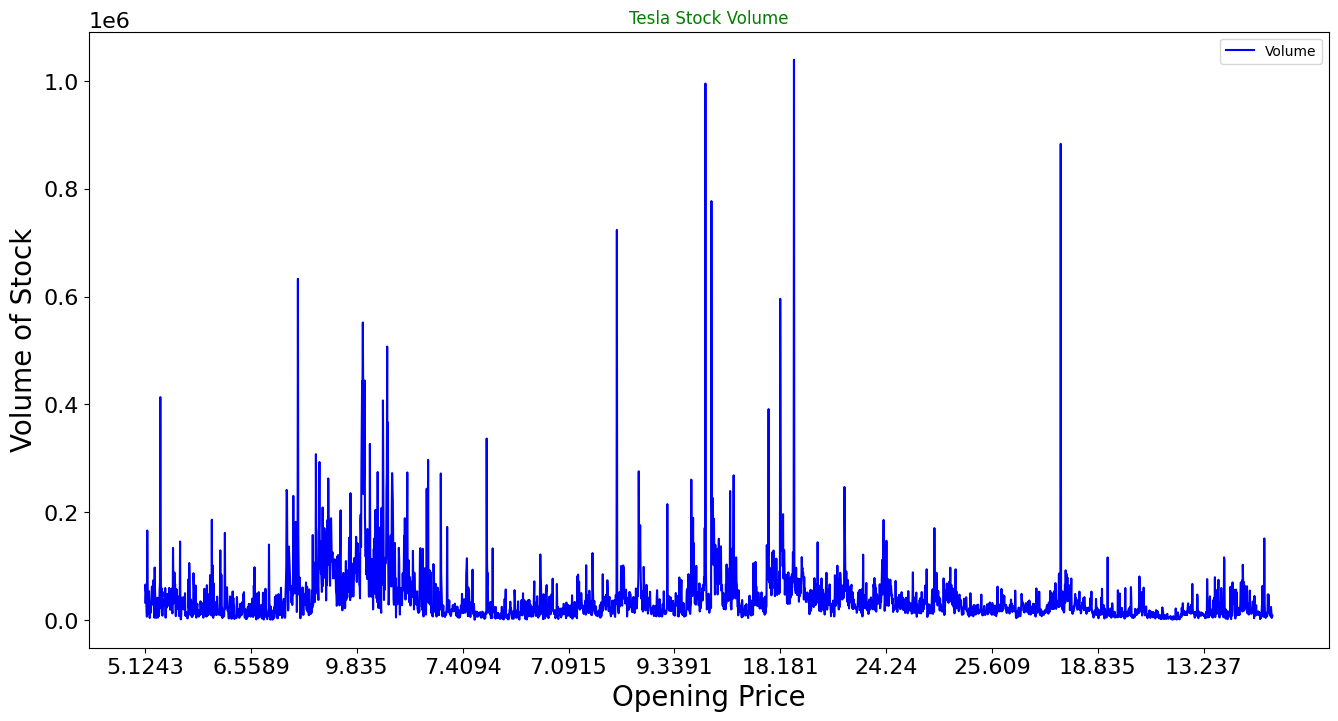

In [224]:
# Visualizing the Volume Vs Opening price
plt.figure(figsize=(16,8))
plt.title('Tesla Stock Volume', color="green")
plt.xlabel('Opening Price')
plt.ylabel('Volume of Stock')
plt.xticks(np.arange(0,3300, 300), tesla_df['Open'][0:3300:300])
plt.plot(tesla_df['Volume'], 'blue', label='Volume')
plt.legend()

#### Feature Engineering

Feature engineering is a crucial step in stock market prediction because it involves selecting and extracting the most relevant information from the available data. Here are some common techniques used in feature engineering for stock market prediction:

Technical Indicators: Technical indicators are mathematical calculations based on stock prices and volume. Examples of technical indicators include moving averages, relative strength index (RSI), Bollinger Bands, and stochastic oscillator. Technical indicators can provide insights into the stock's trend, momentum, and volatility.

Fundamental Data: Fundamental data refers to financial information about a company, such as its revenue, earnings, and debt. Fundamental data can help analysts understand a company's financial health and potential for growth, which can affect its stock price.

News Sentiment Analysis: News sentiment analysis involves using natural language processing (NLP) techniques to analyze news articles and social media posts related to a company or the stock market. By analyzing the sentiment of the news, analysts can gain insights into how the market is likely to react.

Seasonal Trends: Seasonal trends refer to patterns in the stock market that repeat at certain times of the year. For example, the stock market tends to be more volatile in the months of October and November. By identifying these seasonal trends, analysts can adjust their predictions accordingly.

Economic Indicators: Economic indicators, such as interest rates, inflation rates, and GDP, can affect the stock market. By incorporating these indicators into their analysis, analysts can better understand how the economy is likely to impact the stock market.

Overall, effective feature engineering in stock market prediction requires a combination of domain knowledge, data analysis skills, and creativity. By selecting the most relevant features, analysts can improve the accuracy of their predictions and make more informed investment decisions.

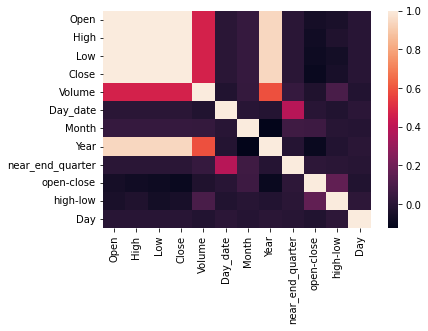

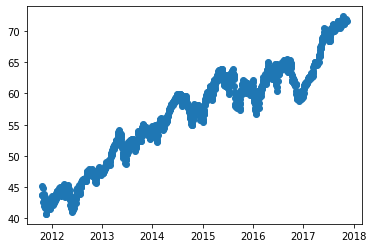

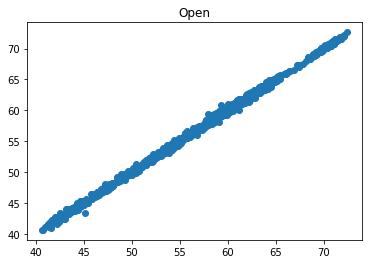

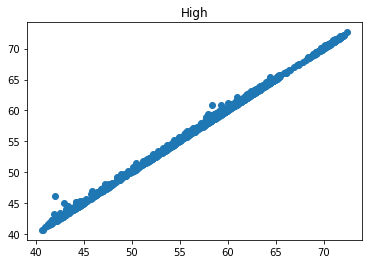

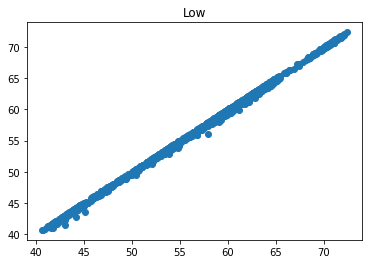

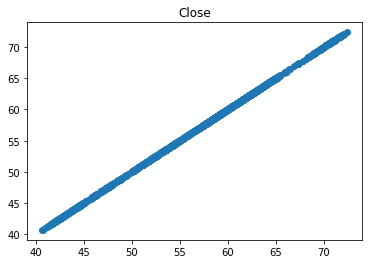

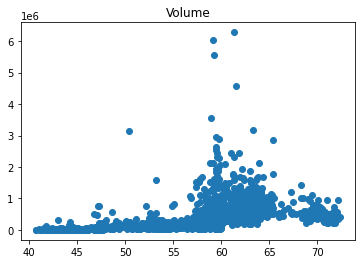

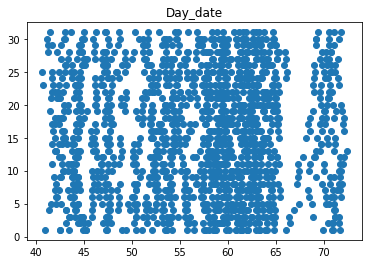

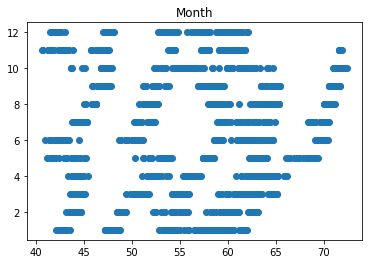

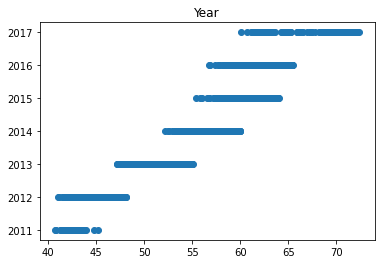

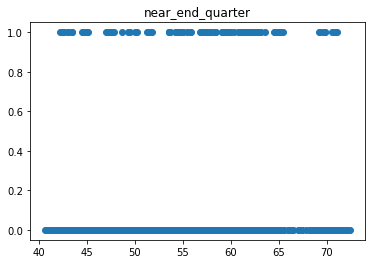

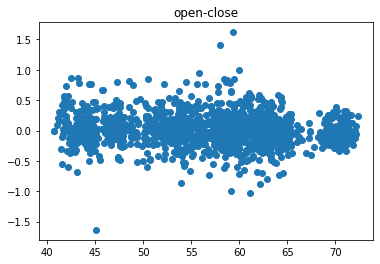

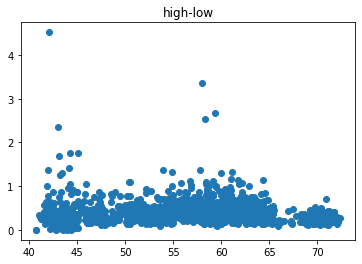

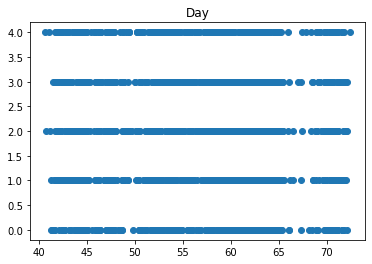

In [4]:
f = r'D:\Desktop\College Spring 2023\machineLearning\project\coding\ETFs\aadr.us.txt'
f = r'D:\Desktop\College Spring 2023\machineLearning\project\coding\ETFs\agz.us.txt'
f = r'D:\Desktop\College Spring 2023\machineLearning\project\coding\ETFs\efav.us.txt'
r = r'D:\Desktop\College Spring 2023\machineLearning\project\coding\Stocks\aame.us.txt'

df_stock,X,T = readstock(f,True)

# display(df_stock.describe())

# display(df_stock.head(10))

# print(X.head())
# print(T.head())

# display(df_stock.iloc[90:110,:])




In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 2)

for train_indx, test_indx in tss.split(X):
    
    X_train, X_test = X.iloc[train_indx, :], X.iloc[test_indx,:]
    T_train, T_test = T.iloc[train_indx], T.iloc[test_indx] 

display(X_train.index)

display(X_test.index)

display(X_train)

DatetimeIndex(['2011-10-25', '2011-10-26', '2011-10-27', '2011-10-28',
               '2011-10-31', '2011-11-01', '2011-11-03', '2011-11-04',
               '2011-11-07', '2011-11-08',
               ...
               '2015-10-28', '2015-10-29', '2015-10-30', '2015-11-02',
               '2015-11-03', '2015-11-04', '2015-11-05', '2015-11-06',
               '2015-11-09', '2015-11-10'],
              dtype='datetime64[ns]', name='Date', length=1010, freq=None)

DatetimeIndex(['2015-11-11', '2015-11-12', '2015-11-13', '2015-11-16',
               '2015-11-17', '2015-11-18', '2015-11-19', '2015-11-20',
               '2015-11-23', '2015-11-24',
               ...
               '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02',
               '2017-11-03', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2011-10-25  43.617  43.771  43.617     4029        25     10  2011   
2011-10-26  43.951  43.951  43.753      817        26     10  2011   
2011-10-27  43.489  45.253  43.489     3827        27     10  2011   
2011-10-28  44.690  44.808  44.690     3657        28     10  2011   
2011-10-31  43.651  43.720  43.593     2537        31     10  2011   
...            ...     ...     ...      ...       ...    ...   ...   
2015-11-04  61.896  61.906  61.439   550018         4     11  2015   
2015-11-05  61.812  61.822  61.504   406789         5     11  2015   
2015-11-06  61.234  61.261  60.860   582457         6     11  2015   
2015-11-09  60.653  60.673  60.195  1150096         9     11  2015   
2015-11-10  60.280  60.505  60.168   569932        10     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-10-25                 0      -0.103     0.154    1  
2011-10-26                 0       0.198     0.198    2  
2011-10-27                 0      -1.636     1.764    3  
2011-10-28                 0      -0.118     0.118    4  
2011-10-31                 0      -0.060     0.127    0  
...                      ...         ...       ...  ...  
2015-11-04                 0       0.307     0.467    2  
2015-11-05                 0       0.206     0.318    3  
2015-11-06                 0       0.150     0.401    4  
2015-11-09                 0       0.289     0.478    0  
2015-11-10                 0      -0.151     0.337    1  

[1010 rows x 11 columns]

Test Score  1.0
Train Score  1.0


Text(0.5, 1.0, 'Testing')

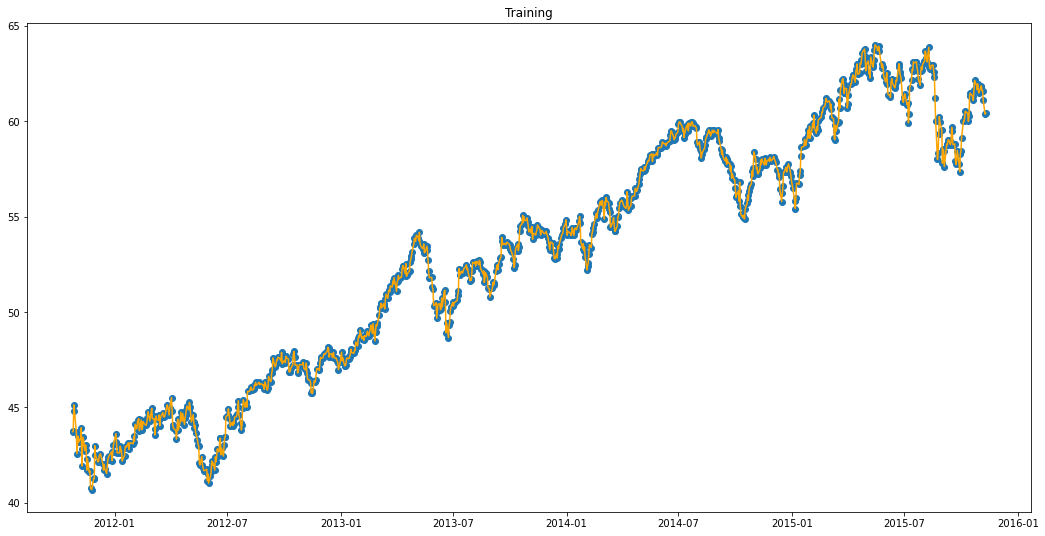

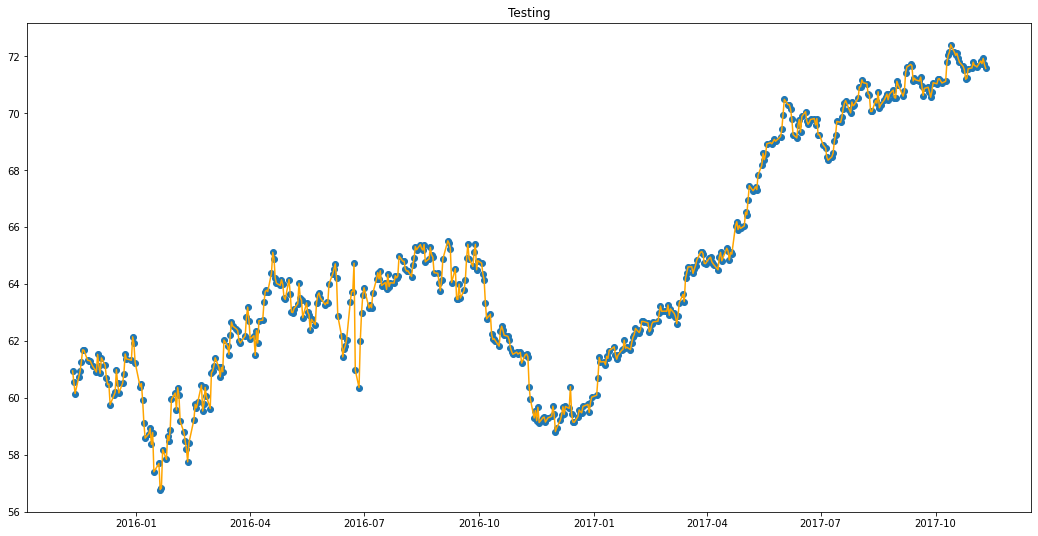

In [7]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression


# lin_mod = Lasso(alpha=0.05)
lin_mod = LinearRegression()

lin_mod.fit(X_train,T_train)

test_score = lin_mod.score(X_test,T_test)
train_score = lin_mod.score(X_train,T_train)

print('Test Score ', test_score)
print('Train Score ', train_score)

y_test = lin_mod.predict(X_test)
y_train = lin_mod.predict(X_train)

plt.figure(figsize=(18,9))
plt.scatter(X_train.index,T_train)
plt.plot(X_train.index,y_train,c='orange')
plt.title("Training")

plt.figure(figsize=(18,9))
plt.scatter(X_test.index,T_test)
plt.plot(X_test.index,y_test,c='orange')
plt.title('Testing')



# for ii in range(5,len(X_train),5):
#     # display(X_train.iloc[0:ii-1,:])
#     # display(X_train.iloc[ii,:])

#     lin_mod.fit(X_train.iloc[0:ii-1,:],T_train.iloc[ii])


In [10]:
display(X.head(5))

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-10-25  43.617  43.771  43.617    4029        25     10  2011   
2011-10-26  43.951  43.951  43.753     817        26     10  2011   
2011-10-27  43.489  45.253  43.489    3827        27     10  2011   
2011-10-28  44.690  44.808  44.690    3657        28     10  2011   
2011-10-31  43.651  43.720  43.593    2537        31     10  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-10-25                 0      -0.103     0.154    1  
2011-10-26                 0       0.198     0.198    2  
2011-10-27                 0      -1.636     1.764    3  
2011-10-28                 0      -0.118     0.118    4  
2011-10-31                 0      -0.060     0.127    0

In [159]:

def make_forecast_features(X,T,n_cluster):
    '''
    this will take a dataframe of features and then create a new dataframe
    that has the previous rows values as features in one row

    X - df: features

    T - df: targets

    n_cluster - number of rows previous to cluster into one row
    '''

    df_out = pd.DataFrame()

    for nn in range(0,n_cluster):
        for ii in range(n_cluster,len(X),n_cluster):
            display(X.iloc[ii-n_cluster:ii-1,:])

make_forecast_features(X,T,4)

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-10-25  43.617  43.771  43.617    4029        25     10  2011   
2011-10-26  43.951  43.951  43.753     817        26     10  2011   
2011-10-27  43.489  45.253  43.489    3827        27     10  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-10-25                 0      -0.103     0.154    1  
2011-10-26                 0       0.198     0.198    2  
2011-10-27                 0      -1.636     1.764    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-10-31  43.651  43.720  43.593    2537        31     10  2011   
2011-11-01  42.436  42.564  42.436    7744         1     11  2011   
2011-11-03  43.489  43.489  43.489     115         3     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-10-31                 0      -0.060     0.127    0  
2011-11-01                 0      -0.128     0.128    1  
2011-11-03                 0       0.000     0.000    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-07  43.367  43.386  43.367     934         7     11  2011   
2011-11-08  43.926  43.926  43.926     115         8     11  2011   
2011-11-09  42.401  43.293  41.921    1808         9     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-07                 0      -0.019     0.019    0  
2011-11-08                 0       0.000     0.000    1  
2011-11-09                 0       0.480     1.372    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-11  43.489  43.489  43.344    2723        11     11  2011   
2011-11-14  42.709  42.734  42.709    1131        14     11  2011   
2011-11-15  42.949  43.026  42.838     468        15     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-11                 0       0.060     0.145    4  
2011-11-14                 0      -0.025     0.025    0  
2011-11-15                 0      -0.077     0.188    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-17  42.282  42.282  41.707     470        17     11  2011   
2011-11-18  42.179  42.401  42.179    1868        18     11  2011   
2011-11-21  41.536  41.595  41.458    2004        21     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-17                 0       0.575     0.575    3  
2011-11-18                 0      -0.118     0.222    4  
2011-11-21                 0      -0.059     0.137    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-23  40.748  40.748  40.748     233        23     11  2011   
2011-11-25  40.687  40.687  40.687     121        25     11  2011   
2011-11-28  41.578  41.578  41.270    3556        28     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-23                 0       0.000     0.000    2  
2011-11-25                 0       0.000     0.000    4  
2011-11-28                 0       0.308     0.308    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-30  42.940  43.069  42.940    1330        30     11  2011   
2011-12-01  42.545  42.589  42.496    1051         1     12  2011   
2011-12-05  42.702  42.702  42.136    4601         5     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-30                 0      -0.043     0.129    2  
2011-12-01                 0       0.049     0.093    3  
2011-12-05                 0       0.566     0.566    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-07  42.417  42.845  42.417    1343         7     12  2011   
2011-12-09  42.273  42.564  42.273    2572         9     12  2011   
2011-12-13  42.033  46.247  41.725   39777        13     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-07                 0      -0.027     0.428    2  
2011-12-09                 0      -0.291     0.291    4  
2011-12-13                 0       0.008     4.522    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-15  42.101  42.187  42.007    4087        15     12  2011   
2011-12-16  42.153  42.153  41.783    3364        16     12  2011   
2011-12-19  41.947  41.947  41.526   24471        19     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-15                 0       0.094     0.180    3  
2011-12-16                 0       0.362     0.370    4  
2011-12-19                 0       0.421     0.421    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-22  42.246  42.368  42.195    3765        22     12  2011   
2011-12-23  42.496  42.830  42.341   21330        23     12  2011   
2011-12-27  42.674  42.674  42.554   17610        27     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-22                 0      -0.122     0.173    3  
2011-12-23                 0       0.043     0.489    4  
2011-12-27                 1       0.008     0.120    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-29  42.436  42.683  42.417    4446        29     12  2011   
2011-12-30  42.831  43.063  42.822    5568        30     12  2011   
2012-01-03  44.072  44.072  43.617    5073         3      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-29                 1      -0.205     0.266    3  
2011-12-30                 1      -0.189     0.241    4  
2012-01-03                 0       0.455     0.455    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-05  43.088  43.088  42.477     490         5      1  2012   
2012-01-09  42.503  42.606  42.453    7912         9      1  2012   
2012-01-10  43.051  43.088  42.958   25608        10      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-05                 0       0.473     0.611    3  
2012-01-09                 0      -0.103     0.153    0  
2012-01-10                 0       0.093     0.130    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-12  42.606  42.743  42.606    5412        12      1  2012   
2012-01-13  42.306  42.306  42.153   15102        13      1  2012   
2012-01-17  42.341  42.674  42.341    9716        17      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-12                 0      -0.137     0.137    3  
2012-01-13                 0       0.127     0.153    4  
2012-01-17                 0      -0.128     0.333    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-19  43.008  43.026  42.889    2058        19      1  2012   
2012-01-20  42.898  42.915  42.898     701        20      1  2012   
2012-01-23  43.088  43.138  42.975    3366        23      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-19                 0       0.041     0.137    3  
2012-01-20                 0      -0.017     0.017    4  
2012-01-23                 0      -0.050     0.163    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-25  42.391  43.069  42.306    2819        25      1  2012   
2012-01-26  43.267  43.267  43.111    2042        26      1  2012   
2012-01-31  42.891  43.091  41.399   16456        31      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-25                 0      -0.678     0.763    2  
2012-01-26                 0       0.122     0.156    3  
2012-01-31                 0      -0.200     1.692    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-02  43.206  43.267  42.821   59604         2      2  2012   
2012-02-03  43.813  44.104  43.771    3410         3      2  2012   
2012-02-06  43.720  43.867  43.600    8728         6      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-02                 0       0.000     0.446    3  
2012-02-03                 0      -0.291     0.333    4  
2012-02-06                 0      -0.147     0.267    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-08  45.107  45.107  44.285   31824         8      2  2012   
2012-02-09  44.447  44.447  44.302    2375         9      2  2012   
2012-02-10  43.943  43.943  43.771   13437        10      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-08                 0       0.760     0.822    2  
2012-02-09                 0       0.042     0.145    3  
2012-02-10                 0       0.172     0.172    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-14  43.986  43.986  43.685   10695        14      2  2012   
2012-02-15  44.019  44.019  43.917     701        15      2  2012   
2012-02-16  44.104  44.294  44.104    2452        16      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-14                 0       0.155     0.301    1  
2012-02-15                 0       0.102     0.102    2  
2012-02-16                 0      -0.147     0.190    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-21  44.233  44.294  43.813   26723        21      2  2012   
2012-02-22  44.114  44.302  44.096    1286        22      2  2012   
2012-02-23  44.302  44.423  44.302     817        23      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-21                 0       0.187     0.481    1  
2012-02-22                 0      -0.085     0.206    2  
2012-02-23                 0      -0.121     0.121    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-27  44.027  44.397  44.027    4424        27      2  2012   
2012-02-28  44.543  44.585  44.525    2826        28      2  2012   
2012-02-29  44.580  44.737  44.580     759        29      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-27                 0      -0.250     0.370    0  
2012-02-28                 0       0.018     0.060    1  
2012-02-29                 0      -0.157     0.157    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-02  44.551  44.551  44.353    4149         2      3  2012   
2012-03-05  44.370  44.423  44.319    1268         5      3  2012   
2012-03-06  43.720  43.720  43.336    3035         6      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-02                 0       0.162     0.198    4  
2012-03-05                 0      -0.035     0.104    0  
2012-03-06                 0       0.172     0.384    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-08  44.491  44.566  44.456   54430         8      3  2012   
2012-03-09  44.379  44.379  44.379     225         9      3  2012   
2012-03-12  44.268  44.319  44.233    1017        12      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-08                 0      -0.052     0.110    3  
2012-03-09                 0       0.000     0.000    4  
2012-03-12                 0      -0.051     0.086    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-14  44.122  44.122  44.027     817        14      3  2012   
2012-03-15  44.302  44.704  44.302   12970        15      3  2012   
2012-03-16  44.627  44.627  44.551     906        16      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-14                 0       0.095     0.095    2  
2012-03-15                 0      -0.113     0.402    3  
2012-03-16                 0       0.076     0.076    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-20  44.475  44.491  44.475     350        20      3  2012   
2012-03-21  44.447  44.566  44.447    1807        21      3  2012   
2012-03-22  44.483  44.517  44.447    1199        22      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-20                 0      -0.016     0.016    1  
2012-03-21                 0      -0.052     0.119    2  
2012-03-22                 0      -0.034     0.070    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-26  45.074  45.125  45.074     771        26      3  2012   
2012-03-27  45.074  45.099  45.031    5982        27      3  2012   
2012-03-28  44.886  44.886  44.636    5399        28      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-26                 1      -0.051     0.051    0  
2012-03-27                 1       0.043     0.068    1  
2012-03-28                 1       0.087     0.250    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-30  44.927  44.953  44.918     468        30      3  2012   
2012-04-02  45.031  45.553  45.031    2681         2      4  2012   
2012-04-03  45.280  45.280  44.722    6843         3      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-30                 1      -0.026     0.035    4  
2012-04-02                 0      -0.479     0.522    0  
2012-04-03                 0       0.472     0.558    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-05  43.968  44.019  43.780   39571         5      4  2012   
2012-04-09  43.685  43.898  43.634    3008         9      4  2012   
2012-04-10  44.122  44.122  43.257    8308        10      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-05                 0       0.051     0.239    3  
2012-04-09                 0      -0.086     0.264    0  
2012-04-10                 0       0.786     0.865    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-12  43.875  44.370  43.875     823        12      4  2012   
2012-04-13  43.917  43.917  43.695    7260        13      4  2012   
2012-04-16  44.027  44.294  43.943   31384        16      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-12                 0      -0.495     0.495    3  
2012-04-13                 0       0.111     0.222    4  
2012-04-16                 0      -0.216     0.351    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-18  44.379  44.517  44.379    6184        18      4  2012   
2012-04-19  44.328  44.389  44.148    2335        19      4  2012   
2012-04-20  44.585  44.681  44.585     817        20      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-18                 0      -0.112     0.138    2  
2012-04-19                 0       0.069     0.241    3  
2012-04-20                 0      -0.096     0.096    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-24  44.080  44.499  44.080   13309        24      4  2012   
2012-04-25  44.645  44.757  44.627    4449        25      4  2012   
2012-04-26  44.781  44.877  44.781    2981        26      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-24                 0      -0.376     0.419    1  
2012-04-25                 0       0.018     0.130    2  
2012-04-26                 0      -0.096     0.096    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-30  44.876  44.885  44.798    3391        30      4  2012   
2012-05-01  45.134  45.399  45.013   22708         1      5  2012   
2012-05-02  45.399  45.399  44.748   23761         2      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-30                 0       0.018     0.087    0  
2012-05-01                 0      -0.119     0.386    1  
2012-05-02                 0       0.360     0.651    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-04  44.543  45.280  44.226   13582         4      5  2012   
2012-05-07  44.338  44.645  44.338    3952         7      5  2012   
2012-05-08  44.019  44.217  43.960  252211         8      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-04                 0       0.317     1.054    4  
2012-05-07                 0      -0.273     0.307    0  
2012-05-08                 0      -0.198     0.257    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-10  43.968  44.096  43.968   14665        10      5  2012   
2012-05-11  43.857  44.141  43.661   13972        11      5  2012   
2012-05-14  43.514  43.514  43.249   13703        14      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-10                 0      -0.078     0.128    3  
2012-05-11                 0       0.179     0.480    4  
2012-05-14                 0       0.239     0.265    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-16  43.267  45.031  42.666   18969        16      5  2012   
2012-05-17  42.153  42.391  41.955   18475        17      5  2012   
2012-05-18  42.170  42.212  41.981    3594        18      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-16                 0       0.309     2.365    2  
2012-05-17                 0       0.095     0.436    3  
2012-05-18                 0       0.189     0.231    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-22  42.702  42.702  41.921   29218        22      5  2012   
2012-05-23  41.974  41.974  40.979   33715        23      5  2012   
2012-05-24  41.836  41.836  41.526  111739        24      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-22                 0       0.728     0.781    1  
2012-05-23                 0       0.132     0.995    2  
2012-05-24                 0       0.137     0.310    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-29  42.297  42.297  41.707    6698        29      5  2012   
2012-05-30  41.365  41.389  41.099    9060        30      5  2012   
2012-05-31  41.390  41.637  41.322   53021        31      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-29                 0       0.548     0.590    1  
2012-05-30                 0       0.206     0.290    2  
2012-05-31                 0      -0.115     0.315    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-04  41.090  41.441  41.090   32545         4      6  2012   
2012-06-05  41.037  41.599  41.037   33414         5      6  2012   
2012-06-06  41.581  42.181  41.581   30832         6      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-04                 0      -0.299     0.351    0  
2012-06-05                 0      -0.553     0.562    1  
2012-06-06                 0      -0.600     0.600    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-08  41.756  42.118  41.756   20330         8      6  2012   
2012-06-11  42.170  42.170  41.707   10543        11      6  2012   
2012-06-12  42.025  42.401  42.025   13578        12      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-08                 0      -0.338     0.362    4  
2012-06-11                 0       0.463     0.463    0  
2012-06-12                 0      -0.376     0.376    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-14  42.409  42.417  42.058   16300        14      6  2012   
2012-06-15  42.543  42.822  42.450   10435        15      6  2012   
2012-06-18  42.649  42.794  42.641    6261        18      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-14                 0      -0.008     0.359    3  
2012-06-15                 0      -0.279     0.372    4  
2012-06-18                 0      -0.009     0.153    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-20  43.463  44.595  43.293   51150        20      6  2012   
2012-06-21  43.376  43.376  42.509    5793        21      6  2012   
2012-06-22  42.493  42.847  42.493    1785        22      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-20                 0       0.086     1.302    2  
2012-06-21                 0       0.867     0.867    3  
2012-06-22                 0      -0.354     0.354    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-26  42.725  43.063  42.725   13075        26      6  2012   
2012-06-27  43.246  43.420  43.237   12933        27      6  2012   
2012-06-28  43.334  43.453  43.063   12341        28      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-26                 1      -0.314     0.338    1  
2012-06-27                 1      -0.174     0.183    2  
2012-06-28                 1      -0.119     0.390    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-02  44.486  44.867  44.339   28543         2      7  2012   
2012-07-03  44.693  44.918  44.693     640         3      7  2012   
2012-07-05  44.624  44.624  44.198   10351         5      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-02                 0      -0.104     0.528    0  
2012-07-03                 0      -0.225     0.225    1  
2012-07-05                 0       0.217     0.426    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-09  44.198  44.468  42.709   16265         9      7  2012   
2012-07-10  44.355  44.355  43.913    6913        10      7  2012   
2012-07-11  44.320  44.320  44.208   12121        11      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-09                 0      -0.010     1.759    0  
2012-07-10                 0       0.311     0.442    1  
2012-07-11                 0       0.087     0.112    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-13  44.320  44.580  44.320   15556        13      7  2012   
2012-07-16  44.320  44.547  44.277   10964        16      7  2012   
2012-07-17  44.521  44.719  44.397    9443        17      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-13                 0      -0.148     0.260    4  
2012-07-16                 0      -0.201     0.270    0  
2012-07-17                 0      -0.110     0.322    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-19  45.369  45.577  44.970   30070        19      7  2012   
2012-07-20  45.351  45.351  44.449   34651        20      7  2012   
2012-07-23  44.590  45.187  43.774  160274        23      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-19                 0       0.026     0.607    3  
2012-07-20                 0       0.771     0.902    4  
2012-07-23                 0       0.400     1.413    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-25  43.974  44.156  43.888   14470        25      7  2012   
2012-07-26  44.830  44.979  44.771    9131        26      7  2012   
2012-07-27  44.970  45.404  44.953    7951        27      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-25                 0      -0.078     0.268    2  
2012-07-26                 0      -0.140     0.208    3  
2012-07-27                 0      -0.425     0.451    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-31  45.274  45.351  45.031   50144        31      7  2012   
2012-08-01  45.673  45.673  45.153   26893         1      8  2012   
2012-08-02  45.351  45.351  44.493   28295         2      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-31                 0       0.191     0.320    1  
2012-08-01                 0       0.374     0.520    2  
2012-08-02                 0       0.346     0.858    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-06  46.496  46.496  45.673   27877         6      8  2012   
2012-08-07  46.296  46.954  45.899   49798         7      8  2012   
2012-08-08  46.097  46.097  45.785   11551         8      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-06                 0       0.667     0.823    0  
2012-08-07                 0       0.397     1.055    1  
2012-08-08                 0       0.044     0.312    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-10  46.202  46.202  45.714   24420        10      8  2012   
2012-08-13  46.115  46.115  45.829   45217        13      8  2012   
2012-08-14  46.261  46.314  46.157   11504        14      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-10                 0       0.303     0.488    4  
2012-08-13                 0       0.173     0.286    0  
2012-08-14                 0       0.104     0.157    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-16  46.149  46.409  46.045   13900        16      8  2012   
2012-08-17  46.323  46.323  46.036   14502        17      8  2012   
2012-08-20  46.218  46.296  46.115   15186        20      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-16                 0      -0.155     0.364    3  
2012-08-17                 0       0.166     0.287    4  
2012-08-20                 0      -0.009     0.181    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-22  46.401  46.401  45.950   17799        22      8  2012   
2012-08-23  46.253  46.331  46.088   29759        23      8  2012   
2012-08-24  46.071  46.374  45.984   23822        24      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-22                 0       0.114     0.451    2  
2012-08-23                 0       0.069     0.243    3  
2012-08-24                 0      -0.156     0.390    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-28  46.340  46.340  46.071   11003        28      8  2012   
2012-08-29  46.323  46.323  46.115   14491        29      8  2012   
2012-08-30  46.165  46.165  45.811   19554        30      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-28                 0       0.209     0.269    1  
2012-08-29                 0       0.139     0.208    2  
2012-08-30                 0       0.223     0.354    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-04  45.690  45.975  45.690   13015         4      9  2012   
2012-09-05  45.975  46.019  45.872   22294         5      9  2012   
2012-09-06  46.374  46.661  46.193   34652         6      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-04                 0      -0.209     0.285    1  
2012-09-05                 0      -0.044     0.147    2  
2012-09-06                 0      -0.242     0.468    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-10  46.365  46.530  46.331   52549        10      9  2012   
2012-09-11  46.625  46.852  46.625   12460        11      9  2012   
2012-09-12  46.973  47.023  46.844   11894        12      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-10                 0       0.018     0.199    0  
2012-09-11                 0      -0.166     0.227    1  
2012-09-12                 0       0.036     0.179    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-14  47.820  47.820  47.268  116347        14      9  2012   
2012-09-17  47.268  47.412  47.119   28965        17      9  2012   
2012-09-18  47.214  47.344  47.103    4353        18      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-14                 0       0.398     0.552    4  
2012-09-17                 0       0.149     0.293    0  
2012-09-18                 0      -0.035     0.241    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-20  47.527  47.527  47.310   11942        20      9  2012   
2012-09-21  47.838  47.848  47.561   29065        21      9  2012   
2012-09-24  47.467  47.612  47.353   34012        24      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-20                 0       0.070     0.217    3  
2012-09-21                 0       0.218     0.287    4  
2012-09-24                 1      -0.112     0.259    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-26  47.518  47.543  47.310   40614        26      9  2012   
2012-09-27  47.630  48.071  47.630  100034        27      9  2012   
2012-09-28  48.081  48.081  47.214  222584        28      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-26                 1       0.096     0.233    2  
2012-09-27                 1      -0.251     0.441    3  
2012-09-28                 1       0.798     0.867    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-02  47.727  47.736  47.389   42852         2     10  2012   
2012-10-03  47.500  47.500  47.310   10037         3     10  2012   
2012-10-04  47.537  47.760  47.537   63431         4     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-02                 0       0.270     0.347    1  
2012-10-03                 0       0.156     0.190    2  
2012-10-04                 0      -0.137     0.223    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-08  47.467  47.543  47.389   37947         8     10  2012   
2012-10-09  47.268  47.283  46.852   79328         9     10  2012   
2012-10-10  46.903  46.989  46.773   35406        10     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-08                 0      -0.060     0.154    0  
2012-10-09                 0       0.416     0.431    1  
2012-10-10                 0       0.051     0.216    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-12  47.067  47.198  46.903  477226        12     10  2012   
2012-10-15  47.180  47.310  47.050   14916        15     10  2012   
2012-10-16  47.518  47.787  47.518   21105        16     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-12                 0       0.017     0.295    4  
2012-10-15                 0      -0.044     0.260    0  
2012-10-16                 0      -0.269     0.269    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-18  47.691  47.890  47.570   20988        18     10  2012   
2012-10-19  47.707  47.707  47.145   48592        19     10  2012   
2012-10-22  47.449  47.457  47.137   20441        22     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-18                 0       0.071     0.320    3  
2012-10-19                 0       0.501     0.562    4  
2012-10-22                 0       0.235     0.320    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-24  47.043  47.119  46.867   38399        24     10  2012   
2012-10-25  47.370  47.449  47.119   12518        25     10  2012   
2012-10-26  47.283  47.283  47.075   11313        26     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-24                 0       0.176     0.252    2  
2012-10-25                 0       0.217     0.330    3  
2012-10-26                 0       0.051     0.208    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-01  47.508  47.508  47.275   52497         1     11  2012   
2012-11-02  47.431  47.431  46.903   57523         2     11  2012   
2012-11-05  47.050  47.094  46.867   96063         5     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-01                 0       0.146     0.233    3  
2012-11-02                 0       0.388     0.528    4  
2012-11-05                 0       0.096     0.227    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-07  46.963  47.075  46.331  515147         7     11  2012   
2012-11-08  46.738  46.844  46.478   18923         8     11  2012   
2012-11-09  46.356  46.728  46.340   28275         9     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-07                 0       0.181     0.744    2  
2012-11-08                 0       0.226     0.366    3  
2012-11-09                 0      -0.088     0.388    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-13  46.253  46.460  46.202   32368        13     11  2012   
2012-11-14  46.425  46.425  45.759   18397        14     11  2012   
2012-11-15  45.872  45.880  45.664   23684        15     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-13                 0      -0.027     0.258    1  
2012-11-14                 0       0.666     0.666    2  
2012-11-15                 0       0.026     0.216    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-19  46.202  46.434  46.202   69915        19     11  2012   
2012-11-20  46.340  46.365  46.036   65896        20     11  2012   
2012-11-21  46.340  46.504  46.296   27942        21     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-19                 0      -0.190     0.232    0  
2012-11-20                 0       0.036     0.329    1  
2012-11-21                 0      -0.104     0.208    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-26  46.937  47.007  46.773   29319        26     11  2012   
2012-11-27  47.075  47.162  46.937   40013        27     11  2012   
2012-11-28  46.903  47.353  46.876  144054        28     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-26                 0      -0.070     0.234    0  
2012-11-27                 0       0.138     0.225    1  
2012-11-28                 0      -0.434     0.477    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-30  47.561  47.691  47.457   85480        30     11  2012   
2012-12-03  47.691  47.805  47.579   59503         3     12  2012   
2012-12-04  47.830  48.003  47.707   38847         4     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-30                 0       0.008     0.234    4  
2012-12-03                 0       0.085     0.226    0  
2012-12-04                 0       0.070     0.296    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-06  47.959  47.959  47.657   33859         6     12  2012   
2012-12-07  47.666  47.872  47.657   23862         7     12  2012   
2012-12-10  47.926  47.996  47.890   26782        10     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-06                 0       0.199     0.302    3  
2012-12-07                 0      -0.154     0.215    4  
2012-12-10                 0      -0.017     0.106    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-12  48.195  48.332  48.090   55126        12     12  2012   
2012-12-13  48.081  48.081  47.579   45632        13     12  2012   
2012-12-14  47.700  47.986  47.700   28335        14     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-12                 0       0.105     0.242    2  
2012-12-13                 0       0.451     0.502    3  
2012-12-14                 0      -0.087     0.286    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-18  47.370  47.700  47.337  147170        18     12  2012   
2012-12-19  47.865  47.865  47.606  191383        19     12  2012   
2012-12-20  47.700  47.934  47.700   36873        20     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-18                 0      -0.250     0.363    1  
2012-12-19                 0       0.208     0.259    2  
2012-12-20                 0      -0.172     0.234    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-24  47.508  47.657  47.483   13448        24     12  2012   
2012-12-26  47.630  47.630  47.240   34883        26     12  2012   
2012-12-27  47.398  47.398  47.094   33094        27     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-24                 0      -0.079     0.174    0  
2012-12-26                 1       0.199     0.390    2  
2012-12-27                 1       0.054     0.304    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-31  46.903  47.379  46.738  160662        31     12  2012   
2013-01-02  47.805  47.890  47.606  154354         2      1  2013   
2013-01-03  47.500  47.760  47.431   73065         3      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-31                 1      -0.476     0.641    0  
2013-01-02                 0      -0.085     0.284    2  
2013-01-03                 0       0.060     0.329    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-07  47.268  47.398  47.137  757248         7      1  2013   
2013-01-08  47.249  47.268  47.058   17395         8      1  2013   
2013-01-09  47.327  47.327  47.153   49347         9      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-07                 0       0.088     0.261    0  
2013-01-08                 0       0.069     0.210    1  
2013-01-09                 0       0.095     0.174    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-11  47.620  47.681  47.508   70175        11      1  2013   
2013-01-14  47.657  47.657  47.431   32605        14      1  2013   
2013-01-15  47.537  47.657  47.449   10334        15      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-11                 0       0.041     0.173    4  
2013-01-14                 0       0.104     0.226    0  
2013-01-15                 0      -0.102     0.208    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-17  47.796  48.081  47.796   72040        17      1  2013   
2013-01-18  47.838  47.881  47.620  155324        18      1  2013   
2013-01-22  47.830  47.934  47.751  126945        22      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-17                 0      -0.251     0.285    3  
2013-01-18                 0      -0.043     0.261    4  
2013-01-22                 0       0.000     0.183    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-24  48.195  48.220  47.917  320528        24      1  2013   
2013-01-25  48.427  48.427  48.167   42488        25      1  2013   
2013-01-28  48.281  48.281  48.124   67480        28      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-24                 0       0.218     0.303    3  
2013-01-25                 0       0.008     0.260    4  
2013-01-28                 0       0.061     0.157    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-30  48.661  48.827  48.627   56527        30      1  2013   
2013-01-31  48.764  48.878  48.655  134247        31      1  2013   
2013-02-01  48.949  49.172  48.949  277579         1      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-30                 0      -0.088     0.200    2  
2013-01-31                 0       0.095     0.223    3  
2013-02-01                 0      -0.102     0.223    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-05  48.896  48.896  48.645   88168         5      2  2013   
2013-02-06  48.583  48.749  48.481   87993         6      2  2013   
2013-02-07  48.887  48.949  48.307   51031         7      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-05                 0       0.192     0.251    1  
2013-02-06                 0      -0.105     0.268    2  
2013-02-07                 0       0.381     0.642    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-11  48.784  48.784  48.619   29552        11      2  2013   
2013-02-12  48.749  49.009  48.722  161442        12      2  2013   
2013-02-13  49.286  49.286  48.949  147421        13      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-11                 0       0.080     0.165    0  
2013-02-12                 0      -0.121     0.287    1  
2013-02-13                 0       0.304     0.337    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-15  48.818  48.896  48.669   85523        15      2  2013   
2013-02-19  48.791  49.337  48.791   65679        19      2  2013   
2013-02-20  49.693  49.693  49.138   98070        20      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-15                 0       0.069     0.227    4  
2013-02-19                 0      -0.512     0.546    1  
2013-02-20                 0       0.485     0.555    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-22  49.286  49.406  49.181  190071        22      2  2013   
2013-02-25  49.303  49.303  48.471   98847        25      2  2013   
2013-02-26  48.905  49.146  48.834   49040        26      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-22                 0      -0.103     0.225    4  
2013-02-25                 0       0.822     0.832    0  
2013-02-26                 0      -0.059     0.312    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-28  49.463  49.578  49.269   90195        28      2  2013   
2013-03-01  49.345  49.494  49.191   40835         1      3  2013   
2013-03-04  49.562  49.849  49.484  132682         4      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-28                 0       0.194     0.309    3  
2013-03-01                 0      -0.052     0.303    4  
2013-03-04                 0      -0.261     0.365    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-06  50.489  50.489  50.169   45375         6      3  2013   
2013-03-07  50.517  50.550  50.412   74357         7      3  2013   
2013-03-08  50.194  50.221  49.962   37516         8      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-06                 0       0.225     0.320    2  
2013-03-07                 0       0.069     0.138    3  
2013-03-08                 0      -0.010     0.259    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-12  50.517  50.524  50.282  140051        12      3  2013   
2013-03-13  49.962  50.273  49.918   65091        13      3  2013   
2013-03-14  50.204  50.740  50.204   31567        14      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-12                 0       0.193     0.242    1  
2013-03-13                 0      -0.199     0.355    2  
2013-03-14                 0      -0.485     0.536    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-18  50.776  51.026  50.689   44695        18      3  2013   
2013-03-19  51.157  51.227  50.818   65366        19      3  2013   
2013-03-20  51.296  51.305  51.088  151476        20      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-18                 0       0.068     0.337    0  
2013-03-19                 0       0.069     0.409    1  
2013-03-20                 0       0.139     0.217    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-22  51.252  51.531  51.252  111561        22      3  2013   
2013-03-25  51.590  51.651  51.140   93952        25      3  2013   
2013-03-26  51.538  51.651  51.495   82205        26      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-22                 0      -0.106     0.279    4  
2013-03-25                 1       0.285     0.511    0  
2013-03-26                 1      -0.079     0.156    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-28  51.712  51.885  51.642  228533        28      3  2013   
2013-04-01  51.409  51.416  50.967  347306         1      4  2013   
2013-04-02  51.513  51.729  51.513   60585         2      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-28                 1      -0.086     0.243    3  
2013-04-01                 0       0.331     0.449    0  
2013-04-02                 0      -0.077     0.216    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-04  51.781  51.989  51.651  124885         4      4  2013   
2013-04-05  51.729  51.729  51.270  235146         5      4  2013   
2013-04-08  51.738  51.832  51.573   97062         8      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-04                 0      -0.131     0.338    3  
2013-04-05                 0       0.000     0.459    4  
2013-04-08                 0      -0.086     0.259    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-10  52.170  52.335  52.076  194549        10      4  2013   
2013-04-11  52.362  52.577  52.362   95534        11      4  2013   
2013-04-12  52.431  52.484  52.196   73060        12      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-10                 0      -0.071     0.259    2  
2013-04-11                 0      -0.060     0.215    3  
2013-04-12                 0       0.016     0.288    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-16  52.396  52.562  52.224  122473        16      4  2013   
2013-04-17  52.274  52.274  51.685   84371        17      4  2013   
2013-04-18  52.274  52.274  51.832   67391        18      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-16                 0      -0.130     0.338    1  
2013-04-17                 0       0.406     0.589    2  
2013-04-18                 0       0.338     0.442    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-22  52.136  52.215  51.860   76205        22      4  2013   
2013-04-23  52.534  52.673  52.447  108895        23      4  2013   
2013-04-24  52.882  52.882  52.673   97609        24      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-22                 0      -0.019     0.355    0  
2013-04-23                 0      -0.081     0.226    1  
2013-04-24                 0       0.121     0.209    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-26  53.089  53.159  52.984  189764        26      4  2013   
2013-04-29  53.375  53.670  53.289  122627        29      4  2013   
2013-04-30  53.777  53.892  53.672  325446        30      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-26                 0      -0.035     0.175    4  
2013-04-29                 0      -0.208     0.381    0  
2013-04-30                 0      -0.088     0.220    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-02  53.714  53.826  53.299  192618         2      5  2013   
2013-05-03  53.877  54.077  53.799  199310         3      5  2013   
2013-05-06  53.912  54.008  53.767  178304         6      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-02                 0       0.000     0.527    3  
2013-05-03                 0      -0.148     0.278    4  
2013-05-06                 0       0.016     0.241    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-08  54.112  54.233  53.896  142593         8      5  2013   
2013-05-09  53.877  53.990  53.435  139526         9      5  2013   
2013-05-10  53.420  53.462  53.159  142003        10      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-08                 0      -0.060     0.337    2  
2013-05-09                 0       0.276     0.555    3  
2013-05-10                 0      -0.042     0.303    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-14  53.271  53.435  53.271  135518        14      5  2013   
2013-05-15  53.375  53.559  53.306  133657        15      5  2013   
2013-05-16  53.263  53.323  53.072   69374        16      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-14                 0      -0.104     0.164    1  
2013-05-15                 0      -0.184     0.253    2  
2013-05-16                 0       0.156     0.251    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-20  53.203  53.453  53.175  258795        20      5  2013   
2013-05-21  53.203  53.506  53.039  544512        21      5  2013   
2013-05-22  53.237  53.522  52.631  213901        22      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-20                 0      -0.241     0.278    0  
2013-05-21                 0      -0.017     0.467    1  
2013-05-22                 0       0.536     0.891    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-24  51.719  51.860  51.487  101108        24      5  2013   
2013-05-28  52.250  52.256  51.667  102757        28      5  2013   
2013-05-29  51.484  51.484  51.168  107003        29      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-24                 0      -0.071     0.373    4  
2013-05-28                 0       0.442     0.589    1  
2013-05-29                 0       0.204     0.316    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2013-05-31  50.721  50.745  50.324   143092        31      5  2013   
2013-06-03  49.823  50.567  49.467  3153688         3      6  2013   
2013-06-04  50.844  50.844  50.247   159004         4      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-31                 0       0.397     0.421    4  
2013-06-03                 0      -0.597     1.100    0  
2013-06-04                 0       0.363     0.597    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-06  49.515  50.016  49.437  228746         6      6  2013   
2013-06-07  50.039  50.438  49.902  105126         7      6  2013   
2013-06-10  50.508  50.508  50.213   58001        10      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-06                 0      -0.501     0.579    3  
2013-06-07                 0      -0.373     0.536    4  
2013-06-10                 0       0.088     0.295    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-12  50.619  50.889  50.109   77489        12      6  2013   
2013-06-13  50.264  50.811  50.213  165796        13      6  2013   
2013-06-14  50.510  50.597  50.121   80740        14      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-12                 0       0.458     0.780    2  
2013-06-13                 0      -0.467     0.598    3  
2013-06-14                 0       0.239     0.476    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-18  51.220  51.317  51.098  136911        18      6  2013   
2013-06-19  51.358  51.478  50.377  135699        19      6  2013   
2013-06-20  49.650  49.658  48.791  178078        20      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-18                 0       0.079     0.219    1  
2013-06-19                 0       0.850     1.101    2  
2013-06-20                 0       0.745     0.867    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-24  48.663  49.165  48.392  559935        24      6  2013   
2013-06-25  49.279  49.393  48.874   82588        25      6  2013   
2013-06-26  49.612  49.702  49.201  169338        26      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-24                 1       0.007     0.773    0  
2013-06-25                 1      -0.017     0.519    1  
2013-06-26                 1       0.132     0.501    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-28  50.227  50.481  49.982  132705        28      6  2013   
2013-07-01  50.510  50.641  50.369  196671         1      7  2013   
2013-07-02  50.544  50.713  50.149  128656         2      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-28                 1      -0.020     0.499    4  
2013-07-01                 0       0.009     0.272    0  
2013-07-02                 0       0.246     0.564    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-05  50.764  50.992  50.219  236121         5      7  2013   
2013-07-08  50.623  50.867  50.526  110309         8      7  2013   
2013-07-09  50.905  50.957  50.713   87909         9      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-05                 0       0.238     0.773    4  
2013-07-08                 0       0.019     0.341    0  
2013-07-09                 0       0.009     0.244    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-11  51.985  52.327  51.810  130169        11      7  2013   
2013-07-12  52.038  52.117  51.792   46231        12      7  2013   
2013-07-15  52.082  52.177  51.967   73541        15      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-11                 0      -0.281     0.517    3  
2013-07-12                 0       0.115     0.325    4  
2013-07-15                 0      -0.052     0.210    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-17  52.327  52.327  51.906  130112        17      7  2013   
2013-07-18  52.195  52.256  52.125  108690        18      7  2013   
2013-07-19  52.205  52.293  52.055   76453        19      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-17                 0       0.281     0.421    2  
2013-07-18                 0       0.042     0.131    3  
2013-07-19                 0      -0.069     0.238    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-23  52.566  52.652  52.336  103723        23      7  2013   
2013-07-24  52.504  52.504  51.985   98013        24      7  2013   
2013-07-25  51.880  52.301  51.801   67463        25      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-23                 0       0.098     0.316    1  
2013-07-24                 0       0.290     0.519    2  
2013-07-25                 0      -0.394     0.500    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-29  51.720  51.801  51.616   63635        29      7  2013   
2013-07-30  51.994  51.994  51.589   78704        30      7  2013   
2013-07-31  51.589  51.985  51.441   65114        31      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-29                 0       0.088     0.185    0  
2013-07-30                 0       0.246     0.405    1  
2013-07-31                 0      -0.071     0.544    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-02  52.425  52.635  52.274   51593         2      8  2013   
2013-08-05  52.590  52.590  52.459   70627         5      8  2013   
2013-08-06  52.706  52.750  52.572   46321         6      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-02                 0      -0.175     0.361    4  
2013-08-05                 0       0.043     0.131    0  
2013-08-06                 0       0.079     0.178    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-08  52.642  52.741  52.459   71557         8      8  2013   
2013-08-09  52.670  52.741  52.477   45473         9      8  2013   
2013-08-12  52.477  52.557  52.388   42476        12      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-08                 0       0.015     0.282    3  
2013-08-09                 0       0.018     0.264    4  
2013-08-12                 0       0.009     0.169    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-14  52.741  52.741  52.496  333459        14      8  2013   
2013-08-15  52.090  52.249  51.826  133951        15      8  2013   
2013-08-16  52.388  52.388  52.186   43807        16      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-14                 0       0.123     0.245    2  
2013-08-15                 0      -0.150     0.423    3  
2013-08-16                 0       0.165     0.202    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-20  52.153  52.310  51.994   56122        20      8  2013   
2013-08-21  52.020  52.028  51.325   71338        21      8  2013   
2013-08-22  51.783  51.932  51.720   53001        22      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-20                 0       0.000     0.316    1  
2013-08-21                 0       0.474     0.703    2  
2013-08-22                 0       0.000     0.212    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-26  52.020  52.073  51.755  107103        26      8  2013   
2013-08-27  51.624  51.624  51.168  158141        27      8  2013   
2013-08-28  51.273  51.407  51.108   40593        28      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-26                 0       0.210     0.318    0  
2013-08-27                 0       0.358     0.456    1  
2013-08-28                 0       0.036     0.299    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-30  50.957  51.123  50.684   52476        30      8  2013   
2013-09-03  51.413  51.853  51.159  126148         3      9  2013   
2013-09-04  51.123  51.660  51.123   44222         4      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-30                 0       0.175     0.439    4  
2013-09-03                 0       0.176     0.694    1  
2013-09-04                 0      -0.423     0.537    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-06  51.537  51.668  51.280   23560         6      9  2013   
2013-09-09  51.678  52.186  51.678   89887         9      9  2013   
2013-09-10  52.425  52.477  52.249  119729        10      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-06                 0       0.008     0.388    4  
2013-09-09                 0      -0.465     0.508    0  
2013-09-10                 0       0.008     0.228    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-12  52.425  52.425  52.186   66863        12      9  2013   
2013-09-13  52.371  52.538  52.230  156683        13      9  2013   
2013-09-16  53.031  53.355  52.829   68444        16      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-12                 0       0.211     0.239    3  
2013-09-13                 0      -0.157     0.308    4  
2013-09-16                 0       0.194     0.526    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-18  53.047  54.164  52.793   58856        18      9  2013   
2013-09-19  54.121  54.121  53.646   43511        19      9  2013   
2013-09-20  53.575  53.741  53.522   18647        20      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-18                 0      -0.861     1.371    2  
2013-09-19                 0       0.389     0.475    3  
2013-09-20                 0       0.053     0.219    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-24  53.707  53.724  53.418   55855        24      9  2013   
2013-09-25  53.662  53.662  53.461   68270        25      9  2013   
2013-09-26  53.751  53.785  53.522   24895        26      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-24                 1       0.168     0.306    1  
2013-09-25                 1       0.140     0.201    2  
2013-09-26                 1       0.132     0.263    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-30  53.418  53.593  53.285   63277        30      9  2013   
2013-10-01  53.567  53.653  53.337  299988         1     10  2013   
2013-10-02  53.355  53.355  52.915  173815         2     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-30                 1      -0.131     0.308    0  
2013-10-01                 0       0.080     0.316    1  
2013-10-02                 0       0.035     0.440    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-04  53.101  53.197  52.985   59281         4     10  2013   
2013-10-07  52.699  52.924  52.699  183825         7     10  2013   
2013-10-08  52.635  52.774  52.310   67727         8     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-04                 0      -0.053     0.212    4  
2013-10-07                 0      -0.094     0.225    0  
2013-10-08                 0       0.308     0.464    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-10  52.829  53.216  52.784  125413        10     10  2013   
2013-10-11  53.295  53.365  53.101   64180        11     10  2013   
2013-10-14  53.355  53.584  53.207   82462        14     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-10                 0      -0.358     0.432    3  
2013-10-11                 0      -0.070     0.264    4  
2013-10-14                 0      -0.194     0.377    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-16  53.426  53.487  53.197  151771        16     10  2013   
2013-10-17  53.637  54.234  53.637   96321        17     10  2013   
2013-10-18  54.199  54.550  54.199  107831        18     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-16                 0       0.008     0.290    2  
2013-10-17                 0      -0.588     0.597    3  
2013-10-18                 0      -0.298     0.351    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-22  54.637  55.122  54.637  114647        22     10  2013   
2013-10-23  54.823  54.823  54.550   40601        23     10  2013   
2013-10-24  54.893  55.008  54.850   55105        24     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-22                 0      -0.423     0.485    1  
2013-10-23                 0       0.141     0.273    2  
2013-10-24                 0      -0.096     0.158    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-28  54.928  54.928  54.753   82867        28     10  2013   
2013-10-29  54.972  55.139  54.814   79025        29     10  2013   
2013-10-30  55.050  55.069  54.411   50040        30     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-28                 0       0.123     0.175    0  
2013-10-29                 0       0.044     0.325    1  
2013-10-30                 0       0.342     0.658    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-01  54.277  54.339  53.935   76529         1     11  2013   
2013-11-04  54.015  54.374  54.015   65572         4     11  2013   
2013-11-05  54.138  54.191  53.865   67410         5     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-01                 0       0.086     0.404    4  
2013-11-04                 0      -0.350     0.359    0  
2013-11-05                 0       0.000     0.326    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-07  54.277  54.277  53.777   56920         7     11  2013   
2013-11-08  53.602  54.121  53.602   85721         8     11  2013   
2013-11-11  54.138  54.287  54.005   49215        11     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-07                 0       0.474     0.500    3  
2013-11-08                 0      -0.519     0.519    4  
2013-11-11                 0       0.054     0.282    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-13  53.839  54.217  53.690   48435        13     11  2013   
2013-11-14  54.270  54.348  54.050  129869        14     11  2013   
2013-11-15  54.550  54.612  54.374   68355        15     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-13                 0      -0.352     0.527    2  
2013-11-14                 0       0.000     0.298    3  
2013-11-15                 0      -0.009     0.238    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-19  54.242  54.472  54.199   30762        19     11  2013   
2013-11-20  54.435  54.445  53.926   37323        20     11  2013   
2013-11-21  54.181  54.251  54.032   37208        21     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-19                 0      -0.097     0.273    1  
2013-11-20                 0       0.403     0.519    2  
2013-11-21                 0      -0.070     0.219    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-25  54.357  54.435  54.050   45376        25     11  2013   
2013-11-26  54.172  54.330  53.944   82795        26     11  2013   
2013-11-27  54.287  54.287  54.040  144933        27     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-25                 0       0.236     0.385    0  
2013-11-26                 0       0.061     0.386    1  
2013-11-27                 0       0.185     0.247    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-02  54.207  54.207  53.848   48366         2     12  2013   
2013-12-03  53.777  53.803  53.584  110415         3     12  2013   
2013-12-04  53.329  53.506  53.179   58311         4     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-02                 0       0.334     0.359    0  
2013-12-03                 0       0.115     0.219    1  
2013-12-04                 0      -0.089     0.327    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-06  53.584  53.662  53.461  129504         6     12  2013   
2013-12-09  53.575  53.628  53.529   77007         9     12  2013   
2013-12-10  53.584  53.628  53.461   49725        10     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-06                 0      -0.078     0.201    4  
2013-12-09                 0      -0.034     0.099    0  
2013-12-10                 0      -0.009     0.167    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-12  53.118  53.118  52.801   64526        12     12  2013   
2013-12-13  52.759  52.784  52.610   79549        13     12  2013   
2013-12-16  52.899  53.109  52.899   67473        16     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-12                 0       0.298     0.317    3  
2013-12-13                 0      -0.015     0.174    4  
2013-12-16                 0      -0.148     0.210    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-18  53.081  53.615  52.912  141749        18     12  2013   
2013-12-19  53.375  53.421  53.081   86712        19     12  2013   
2013-12-20  53.242  53.605  53.242   60304        20     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-18                 0      -0.374     0.703    2  
2013-12-19                 0       0.063     0.340    3  
2013-12-20                 0      -0.292     0.363    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-24  53.882  54.025  53.605   59180        24     12  2013   
2013-12-26  54.230  54.247  54.033   49165        26     12  2013   
2013-12-27  54.390  54.603  54.390   46307        27     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-24                 0      -0.135     0.420    1  
2013-12-26                 1       0.089     0.214    3  
2013-12-27                 1      -0.018     0.213    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-31  54.808  54.951  54.720   97772        31     12  2013   
2014-01-02  54.292  54.292  53.945   57363         2      1  2014   
2014-01-03  54.222  54.310  54.123   82677         3      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-31                 1      -0.018     0.231    1  
2014-01-02                 0       0.275     0.347    3  
2014-01-03                 0       0.000     0.187    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-07  54.390  54.390  54.060  267536         7      1  2014   
2014-01-08  54.131  54.131  53.900  153994         8      1  2014   
2014-01-09  53.864  54.069  53.714   62491         9      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-07                 0       0.259     0.330    1  
2014-01-08                 0       0.124     0.231    2  
2014-01-09                 0      -0.178     0.355    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-13  54.335  54.335  53.864  137574        13      1  2014   
2014-01-14  54.203  54.496  54.123  116770        14      1  2014   
2014-01-15  54.354  54.390  54.166  108453        15      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-13                 0       0.328     0.471    0  
2014-01-14                 0      -0.177     0.373    1  
2014-01-15                 0      -0.009     0.224    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-17  54.320  54.478  54.212   51206        17      1  2014   
2014-01-21  54.915  54.915  54.380  161779        21      1  2014   
2014-01-22  54.764  55.039  54.764  292902        22      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-17                 0        0.01     0.266    4  
2014-01-21                 0        0.17     0.535    1  
2014-01-22                 0       -0.24     0.275    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-24  54.335  54.335  53.624  298667        24      1  2014   
2014-01-27  53.855  53.855  53.107  173988        27      1  2014   
2014-01-28  53.562  53.651  53.233  156676        28      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-24                 0       0.657     0.711    4  
2014-01-27                 0       0.543     0.748    0  
2014-01-28                 0      -0.018     0.418    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-30  53.491  53.534  53.223   73216        30      1  2014   
2014-01-31  52.691  53.135  52.691   93111        31      1  2014   
2014-02-03  52.958  53.038  52.200  754778         3      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-30                 0       0.090     0.311    3  
2014-01-31                 0      -0.213     0.444    4  
2014-02-03                 0       0.758     0.838    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-05  52.520  52.601  52.262  521863         5      2  2014   
2014-02-06  52.582  53.045  52.504  393107         6      2  2014   
2014-02-07  53.126  53.524  53.099   66552         7      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-05                 0      -0.027     0.339    2  
2014-02-06                 0      -0.463     0.541    3  
2014-02-07                 0      -0.392     0.425    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-11  53.651  54.212  53.501  248342        11      2  2014   
2014-02-12  54.185  54.256  54.052   97991        12      2  2014   
2014-02-13  53.864  54.478  53.864  120251        13      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-11                 0      -0.426     0.711    1  
2014-02-12                 0      -0.027     0.204    2  
2014-02-13                 0      -0.535     0.614    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-18  54.924  55.173  54.906   69205        18      2  2014   
2014-02-19  55.004  55.360  54.915   81709        19      2  2014   
2014-02-20  54.790  55.272  54.790   58065        20      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-18                 0      -0.240     0.267    1  
2014-02-19                 0       0.089     0.445    2  
2014-02-20                 0      -0.391     0.482    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-24  55.590  56.027  55.430   84235        24      2  2014   
2014-02-25  55.956  56.002  55.634  132585        25      2  2014   
2014-02-26  55.759  55.759  55.369  213875        26      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-24                 0      -0.163     0.597    0  
2014-02-25                 0       0.159     0.368    1  
2014-02-26                 0       0.169     0.390    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-28  56.019  56.027  55.715  129104        28      2  2014   
2014-03-03  55.252  55.333  54.862  170654         3      3  2014   
2014-03-04  55.797  56.002  55.644  176543         4      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-28                 0       0.179     0.312    4  
2014-03-03                 0       0.390     0.471    0  
2014-03-04                 0       0.010     0.358    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-06  55.992  56.107  55.902   90949         6      3  2014   
2014-03-07  55.892  55.965  55.725   77977         7      3  2014   
2014-03-10  55.634  55.768  55.501   53349        10      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-06                 0      -0.010     0.205    3  
2014-03-07                 0       0.061     0.240    4  
2014-03-10                 0      -0.100     0.267    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-12  55.013  55.351  55.004   30173        12      3  2014   
2014-03-13  55.226  55.226  54.327  115111        13      3  2014   
2014-03-14  54.629  54.675  54.345   81413        14      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-12                 0      -0.249     0.347    2  
2014-03-13                 0       0.793     0.899    3  
2014-03-14                 0       0.141     0.330    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-18  54.648  55.128  54.648  104246        18      3  2014   
2014-03-19  55.004  55.067  54.335   67337        19      3  2014   
2014-03-20  54.166  54.390  53.936  123384        20      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-18                 0      -0.293     0.480    1  
2014-03-19                 0       0.436     0.732    2  
2014-03-20                 0      -0.056     0.454    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-24  54.559  54.683  54.265  255860        24      3  2014   
2014-03-25  54.826  55.173  54.462  112985        25      3  2014   
2014-03-26  55.181  55.430  55.004  126850        26      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-24                 0       0.071     0.418    0  
2014-03-25                 1      -0.142     0.711    1  
2014-03-26                 1       0.158     0.426    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-28  55.680  55.947  55.664  132241        28      3  2014   
2014-03-31  56.090  56.090  55.787  129673        31      3  2014   
2014-04-01  55.947  55.947  55.501  129817         1      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-28                 1      -0.045     0.283    4  
2014-03-31                 1       0.232     0.303    0  
2014-04-01                 0       0.142     0.446    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-03  55.797  55.797  55.458   81722         3      4  2014   
2014-04-04  55.707  55.902  55.369  132375         4      4  2014   
2014-04-07  55.467  55.644  55.333  134606         7      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-03                 0       0.187     0.339    3  
2014-04-04                 0       0.178     0.533    4  
2014-04-07                 0       0.037     0.311    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-09  55.947  56.329  55.787   74505         9      4  2014   
2014-04-10  56.196  56.196  55.520  113081        10      4  2014   
2014-04-11  55.414  55.672  55.243   61795        11      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-09                 0      -0.348     0.542    2  
2014-04-10                 0       0.489     0.676    3  
2014-04-11                 0       0.081     0.429    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-15  55.600  55.672  55.030   50047        15      4  2014   
2014-04-16  55.922  56.027  55.688   62683        16      4  2014   
2014-04-17  55.885  56.259  55.885  112287        17      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-15                 0       0.026     0.642    1  
2014-04-16                 0      -0.034     0.339    2  
2014-04-17                 0      -0.178     0.374    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-22  56.259  56.516  56.250   62373        22      4  2014   
2014-04-23  56.464  56.473  56.259   44843        23      4  2014   
2014-04-24  56.436  56.436  56.134   55181        24      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-22                 0      -0.214     0.266    1  
2014-04-23                 0      -0.009     0.214    2  
2014-04-24                 0       0.124     0.302    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-28  56.829  56.829  56.357   55778        28      4  2014   
2014-04-29  56.961  57.140  56.864   66661        29      4  2014   
2014-04-30  57.290  57.389  57.023  135062        30      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-28                 0       0.126     0.472    0  
2014-04-29                 0      -0.027     0.276    1  
2014-04-30                 0       0.061     0.366    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-02  57.069  57.461  56.961  439765         2      5  2014   
2014-05-05  57.219  57.406  57.050   81981         5      5  2014   
2014-05-06  57.415  57.531  57.148   53874         6      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-02                 0      -0.346     0.500    4  
2014-05-05                 0      -0.179     0.356    0  
2014-05-06                 0       0.017     0.383    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-08  57.585  57.683  57.406  825247         8      5  2014   
2014-05-09  57.398  57.639  57.398   41563         9      5  2014   
2014-05-12  57.834  57.914  57.736   75785        12      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-08                 0       0.133     0.277    3  
2014-05-09                 0      -0.195     0.241    4  
2014-05-12                 0      -0.027     0.178    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-14  57.977  58.066  57.852   51986        14      5  2014   
2014-05-15  57.852  58.066  57.782   78704        15      5  2014   
2014-05-16  58.155  58.305  58.037   55037        16      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-14                 0       0.070     0.214    2  
2014-05-15                 0      -0.179     0.284    3  
2014-05-16                 0      -0.080     0.268    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-20  58.128  58.163  57.798   79116        20      5  2014   
2014-05-21  58.092  58.288  58.092   69448        21      5  2014   
2014-05-22  58.288  58.288  58.155   46084        22      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-20                 0       0.241     0.365    1  
2014-05-21                 0      -0.170     0.196    2  
2014-05-22                 0       0.044     0.133    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-27  58.385  58.395  58.155  132275        27      5  2014   
2014-05-28  58.252  58.262  58.057   37274        28      5  2014   
2014-05-29  58.395  58.583  58.385   75091        29      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-27                 0       0.045     0.240    1  
2014-05-28                 0       0.053     0.205    2  
2014-05-29                 0      -0.178     0.198    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-02  58.759  58.955  58.591  398577         2      6  2014   
2014-06-03  58.563  58.643  58.467   79906         3      6  2014   
2014-06-04  58.573  58.759  58.553   68914         4      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-02                 0       0.152     0.364    0  
2014-06-03                 0      -0.073     0.176    1  
2014-06-04                 0      -0.143     0.206    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-06  58.821  58.911  58.679   65317         6      6  2014   
2014-06-09  58.839  58.876  58.734   61878         9      6  2014   
2014-06-10  58.796  58.839  58.583  304597        10      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-06                 0      -0.037     0.232    4  
2014-06-09                 0       0.043     0.142    0  
2014-06-10                 0      -0.035     0.256    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-12  58.902  58.974  58.687   53917        12      6  2014   
2014-06-13  58.876  58.911  58.740   45033        13      6  2014   
2014-06-16  58.740  58.945  58.740   63037        16      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-12                 0       0.071     0.287    3  
2014-06-13                 0       0.009     0.171    4  
2014-06-16                 0      -0.205     0.205    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-18  59.088  59.365  58.929  112526        18      6  2014   
2014-06-19  59.436  59.535  59.383   40474        19      6  2014   
2014-06-20  59.463  59.526  59.321   53048        20      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-18                 0      -0.171     0.436    2  
2014-06-19                 0      -0.062     0.152    3  
2014-06-20                 0       0.009     0.205    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-24  59.222  59.293  58.964  165908        24      6  2014   
2014-06-25  58.964  59.137  58.928   75572        25      6  2014   
2014-06-26  59.218  59.237  58.901   49314        26      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-24                 1       0.186     0.329    1  
2014-06-25                 1      -0.119     0.209    2  
2014-06-26                 1       0.053     0.336    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-30  59.364  59.583  59.309   87674        30      6  2014   
2014-07-01  59.510  59.955  59.500   52641         1      7  2014   
2014-07-02  59.909  60.046  59.827   62828         2      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-30                 1      -0.056     0.274    0  
2014-07-01                 0      -0.317     0.455    1  
2014-07-02                 0      -0.036     0.219    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-07  59.818  59.818  59.546  157875         7      7  2014   
2014-07-08  59.283  59.600  59.191   53640         8      7  2014   
2014-07-09  59.291  59.664  59.291  199470         9      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-07                 0       0.099     0.272    0  
2014-07-08                 0      -0.182     0.409    1  
2014-07-09                 0      -0.329     0.373    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-11  59.309  59.429  59.129  106941        11      7  2014   
2014-07-14  59.645  59.837  59.645   96019        14      7  2014   
2014-07-15  59.892  59.892  59.529   68293        15      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-11                 0      -0.037     0.300    4  
2014-07-14                 0      -0.092     0.192    0  
2014-07-15                 0       0.173     0.363    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-17  59.855  59.909  59.373   52928        17      7  2014   
2014-07-18  59.537  59.955  59.529   37429        18      7  2014   
2014-07-21  59.610  59.783  59.500   62674        21      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-17                 0       0.364     0.536    3  
2014-07-18                 0      -0.362     0.426    4  
2014-07-21                 0      -0.136     0.283    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-23  60.091  60.091  59.937   58353        23      7  2014   
2014-07-24  59.983  60.082  59.892   53214        24      7  2014   
2014-07-25  59.919  59.919  59.529   56422        25      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-23                 0       0.127     0.154    2  
2014-07-24                 0       0.091     0.190    3  
2014-07-25                 0       0.191     0.390    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-29  59.892  59.964  59.637   39432        29      7  2014   
2014-07-30  59.764  59.764  59.437  258831        30      7  2014   
2014-07-31  59.346  59.346  58.856  253813        31      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-29                 0       0.218     0.327    1  
2014-07-30                 0       0.127     0.327    2  
2014-07-31                 0       0.455     0.490    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-04  58.891  59.256  58.574   91452         4      8  2014   
2014-08-05  58.793  58.793  58.365   86795         5      8  2014   
2014-08-06  58.365  58.428  58.046   60852         6      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-04                 0      -0.029     0.682    0  
2014-08-05                 0       0.273     0.428    1  
2014-08-06                 0      -0.045     0.382    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-08  58.137  58.300  57.937   92405         8      8  2014   
2014-08-11  58.592  58.609  58.428  108666        11      8  2014   
2014-08-12  58.520  58.554  58.337  495892        12      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-08                 0      -0.163     0.363    4  
2014-08-11                 0       0.072     0.181    0  
2014-08-12                 0      -0.025     0.217    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-14  59.047  59.083  58.928   63110        14      8  2014   
2014-08-15  59.165  59.364  58.837   90734        15      8  2014   
2014-08-18  59.455  59.455  59.283   47503        18      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-14                 0      -0.008     0.155    3  
2014-08-15                 0       0.019     0.527    4  
2014-08-18                 0       0.045     0.172    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-20  59.391  59.429  59.256  173042        20      8  2014   
2014-08-21  59.500  59.583  59.329   63264        21      8  2014   
2014-08-22  59.437  59.455  59.200  300964        22      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-20                 0       0.000     0.173    2  
2014-08-21                 0       0.063     0.254    3  
2014-08-22                 0       0.219     0.255    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-26  59.391  59.537  59.083   90060        26      8  2014   
2014-08-27  59.510  59.573  59.465  103516        27      8  2014   
2014-08-28  59.437  59.445  59.329   40779        28      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-26                 0       0.000     0.454    1  
2014-08-27                 0      -0.009     0.108    2  
2014-08-28                 0      -0.008     0.116    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2014-09-02  59.592  59.592  59.256  1101105         2      9  2014   
2014-09-03  59.674  59.719  59.465   150046         3      9  2014   
2014-09-04  59.546  59.546  59.001   180347         4      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-02                 0       0.254     0.336    1  
2014-09-03                 0       0.119     0.254    2  
2014-09-04                 0       0.436     0.545    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-08  58.774  58.774  58.392   80615         8      9  2014   
2014-09-09  58.392  58.418  58.092  277510         9      9  2014   
2014-09-10  58.228  58.545  58.209  172317        10      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-08                 0       0.236     0.382    0  
2014-09-09                 0       0.136     0.326    1  
2014-09-10                 0      -0.263     0.336    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-12  58.110  58.146  57.955   88064        12      9  2014   
2014-09-15  57.993  58.075  57.856   53384        15      9  2014   
2014-09-16  57.810  58.237  57.619  180347        16      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-12                 0       0.064     0.191    4  
2014-09-15                 0       0.091     0.219    0  
2014-09-16                 0      -0.300     0.618    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-18  57.919  58.092  57.892   58455        18      9  2014   
2014-09-19  58.036  58.120  57.765  115463        19      9  2014   
2014-09-22  57.775  57.846  57.638   44552        22      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-18                 0      -0.074     0.200    3  
2014-09-19                 0       0.199     0.355    4  
2014-09-22                 0       0.000     0.208    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-24  57.438  57.674  57.346   96555        24      9  2014   
2014-09-25  57.401  57.401  56.947  108275        25      9  2014   
2014-09-26  57.210  57.365  57.102  194226        26      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-24                 1      -0.210     0.328    2  
2014-09-25                 1       0.389     0.454    3  
2014-09-26                 1      -0.037     0.263    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-30  56.802  57.046  56.748   37921        30      9  2014   
2014-10-01  56.748  56.846  56.375  119204         1     10  2014   
2014-10-02  56.366  56.366  55.637  235015         2     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-30                 1      -0.118     0.298    1  
2014-10-01                 0       0.247     0.471    2  
2014-10-02                 0       0.363     0.729    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-06  56.329  56.466  56.056  140222         6     10  2014   
2014-10-07  56.202  56.275  55.802  133101         7     10  2014   
2014-10-08  56.066  56.846  55.891  123720         8     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-06                 0      -0.018     0.410    0  
2014-10-07                 0       0.390     0.473    1  
2014-10-08                 0      -0.736     0.955    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-10  55.393  55.628  55.056  822527        10     10  2014   
2014-10-13  55.520  55.749  54.939  274072        13     10  2014   
2014-10-14  55.338  55.437  54.821  327645        14     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-10                 0       0.281     0.572    4  
2014-10-13                 0       0.564     0.810    0  
2014-10-14                 0       0.272     0.616    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-16  54.202  55.203  53.874  751002        16     10  2014   
2014-10-17  55.193  55.501  55.083  186485        17     10  2014   
2014-10-20  55.548  55.812  55.437   92213        20     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-16                 0      -0.672     1.329    3  
2014-10-17                 0      -0.209     0.418    4  
2014-10-20                 0      -0.136     0.375    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-22  56.029  56.310  55.828  325982        22     10  2014   
2014-10-23  56.437  56.566  56.156  213538        23     10  2014   
2014-10-24  56.466  56.592  56.329   60366        24     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-22                 0       0.182     0.482    2  
2014-10-23                 0       0.099     0.410    3  
2014-10-24                 0      -0.091     0.263    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-28  57.247  57.392  57.082  231878        28     10  2014   
2014-10-29  57.392  57.601  56.930  409149        29     10  2014   
2014-10-30  57.146  57.674  57.002  334634        30     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-28                 0      -0.145     0.310    1  
2014-10-29                 0       0.290     0.671    2  
2014-10-30                 0      -0.410     0.672    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-03  58.164  58.184  57.846  233827         3     11  2014   
2014-11-04  57.483  57.546  57.266   94485         4     11  2014   
2014-11-05  57.537  57.729  57.483  136196         5     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-03                 0       0.128     0.338    0  
2014-11-04                 0      -0.018     0.280    1  
2014-11-05                 0      -0.064     0.246    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-07  57.183  57.247  56.892  275381         7     11  2014   
2014-11-10  57.483  57.591  57.356  123828        10     11  2014   
2014-11-11  57.729  58.019  57.629   81824        11     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-07                 0      -0.054     0.355    4  
2014-11-10                 0      -0.046     0.235    0  
2014-11-11                 0      -0.236     0.390    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-13  57.910  58.100  57.829  127430        13     11  2014   
2014-11-14  57.801  58.001  57.664  257424        14     11  2014   
2014-11-17  57.574  57.775  57.410   84961        17     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-13                 0      -0.109     0.271    3  
2014-11-14                 0      -0.127     0.337    4  
2014-11-17                 0      -0.118     0.365    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-19  57.810  58.100  57.692  447981        19     11  2014   
2014-11-20  57.537  57.837  57.537   83424        20     11  2014   
2014-11-21  58.228  58.402  57.720  437378        21     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-19                 0      -0.136     0.408    2  
2014-11-20                 0      -0.174     0.300    3  
2014-11-21                 0       0.336     0.682    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-25  57.883  57.937  57.729   79248        25     11  2014   
2014-11-26  58.100  58.201  57.937  166794        26     11  2014   
2014-11-28  58.137  58.164  57.791   21301        28     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-25                 0      -0.009     0.208    1  
2014-11-26                 0       0.000     0.264    2  
2014-11-28                 0       0.227     0.373    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-02  58.174  58.174  57.984  128058         2     12  2014   
2014-12-03  58.146  58.146  57.910  191984         3     12  2014   
2014-12-04  58.001  58.092  57.711  294143         4     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-02                 0       0.028     0.190    1  
2014-12-03                 0       0.137     0.236    2  
2014-12-04                 0       0.046     0.381    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-08  57.619  57.683  57.401  314287         8     12  2014   
2014-12-09  57.329  57.501  57.192  166940         9     12  2014   
2014-12-10  57.501  57.501  56.982  123981        10     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-08                 0       0.163     0.282    0  
2014-12-09                 0      -0.118     0.309    1  
2014-12-10                 0       0.409     0.519    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-12  57.219  57.229  56.391  365871        12     12  2014   
2014-12-15  56.729  56.729  55.647  284035        15     12  2014   
2014-12-16  55.993  56.782  55.921  252830        16     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-12                 0       0.772     0.838    4  
2014-12-15                 0       0.946     1.082    0  
2014-12-16                 0      -0.218     0.861    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-18  56.770  57.324  56.670  184187        18     12  2014   
2014-12-19  57.295  57.453  56.974  566118        19     12  2014   
2014-12-22  57.618  57.683  57.260  312910        22     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-18                 0      -0.545     0.654    3  
2014-12-19                 0      -0.029     0.479    4  
2014-12-22                 0       0.036     0.423    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-24  57.370  57.628  57.370  126418        24     12  2014   
2014-12-26  57.655  58.034  57.508  196060        26     12  2014   
2014-12-29  57.398  57.535  57.286  537121        29     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-24                 0      -0.165     0.258    2  
2014-12-26                 1      -0.101     0.526    4  
2014-12-29                 1       0.038     0.249    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-31  57.370  57.370  56.799  160953        31     12  2014   
2015-01-02  56.899  57.103  56.412  110804         2      1  2015   
2015-01-05  56.191  56.191  55.621  275576         5      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-31                 1       0.535     0.571    2  
2015-01-02                 0       0.415     0.691    4  
2015-01-05                 0       0.369     0.570    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-07  55.840  56.062  55.637  188418         7      1  2015   
2015-01-08  56.402  56.844  56.402  186828         8      1  2015   
2015-01-09  56.853  56.899  56.559  208331         9      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-07                 0      -0.148     0.425    2  
2015-01-08                 0      -0.332     0.442    3  
2015-01-09                 0       0.109     0.340    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-13  57.480  57.535  56.780  204333        13      1  2015   
2015-01-14  57.148  57.480  57.057  325942        14      1  2015   
2015-01-15  58.355  58.429  57.969  371219        15      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-13                 0       0.323     0.755    1  
2015-01-14                 0      -0.240     0.423    2  
2015-01-15                 0       0.202     0.460    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-20  58.926  58.983  58.532  460249        20      1  2015   
2015-01-21  58.825  59.091  58.760  609869        21      1  2015   
2015-01-22  58.770  58.935  58.502  542908        22      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-20                 0       0.249     0.451    1  
2015-01-21                 0      -0.222     0.331    2  
2015-01-22                 0      -0.019     0.433    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-26  58.991  59.369  58.825  592411        26      1  2015   
2015-01-27  59.415  59.765  59.369  529362        27      1  2015   
2015-01-28  59.746  59.810  59.037  834478        28      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-26                 0      -0.268     0.544    0  
2015-01-27                 0      -0.111     0.396    1  
2015-01-28                 0       0.635     0.773    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-30  59.378  59.507  59.047  557380        30      1  2015   
2015-02-02  59.497  59.673  59.147  398542         2      2  2015   
2015-02-03  59.571  59.958  59.387  667585         3      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-30                 0       0.277     0.460    4  
2015-02-02                 0      -0.074     0.526    0  
2015-02-03                 0      -0.314     0.571    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-05  60.196  60.327  59.922  298749         5      2  2015   
2015-02-06  59.848  59.912  59.442  613736         6      2  2015   
2015-02-09  59.286  59.470  59.101  337875         9      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-05                 0      -0.113     0.405    3  
2015-02-06                 0       0.230     0.470    4  
2015-02-09                 0      -0.073     0.369    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-11  59.608  59.682  59.341  316582        11      2  2015   
2015-02-12  59.618  60.077  59.618  385758        12      2  2015   
2015-02-13  60.115  60.206  59.978  422802        13      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-11                 0       0.082     0.341    2  
2015-02-12                 0      -0.414     0.459    3  
2015-02-13                 0       0.019     0.228    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-18  60.409  60.612  60.189  293962        18      2  2015   
2015-02-19  60.521  60.695  60.419  540585        19      2  2015   
2015-02-20  60.336  60.925  60.216  308247        20      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-18                 0      -0.065     0.423    2  
2015-02-19                 0       0.057     0.276    3  
2015-02-20                 0      -0.377     0.709    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-24  60.795  61.138  60.649  476300        24      2  2015   
2015-02-25  60.998  61.285  60.990  442926        25      2  2015   
2015-02-26  61.184  61.193  60.889  325646        26      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-24                 0      -0.223     0.489    1  
2015-02-25                 0      -0.195     0.295    2  
2015-02-26                 0       0.148     0.304    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-02  61.128  61.202  60.916  310153         2      3  2015   
2015-03-03  61.091  61.184  60.805  411005         3      3  2015   
2015-03-04  61.211  61.211  60.354  293760         4      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-02                 0       0.064     0.286    0  
2015-03-03                 0       0.138     0.379    1  
2015-03-04                 0       0.554     0.857    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-06  60.512  60.677  60.151  232859         6      3  2015   
2015-03-09  60.196  60.318  59.922  356508         9      3  2015   
2015-03-10  59.876  59.876  59.047  387990        10      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-06                 0       0.316     0.526    4  
2015-03-09                 0       0.081     0.396    0  
2015-03-10                 0       0.785     0.829    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-12  59.857  59.866  59.590  311456        12      3  2015   
2015-03-13  59.323  59.507  59.111  298753        13      3  2015   
2015-03-16  59.543  59.995  59.543  238938        16      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-12                 0       0.064     0.276    3  
2015-03-13                 0      -0.147     0.396    4  
2015-03-16                 0      -0.342     0.452    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-18  60.115  61.303  59.968  265970        18      3  2015   
2015-03-19  60.815  60.824  60.528  461593        19      3  2015   
2015-03-20  61.348  61.764  61.211  174238        20      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-18                 0      -1.032     1.335    2  
2015-03-19                 0       0.138     0.296    3  
2015-03-20                 0      -0.277     0.553    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-24  62.280  62.555  62.225  494920        24      3  2015   
2015-03-25  62.464  62.546  61.874  399714        25      3  2015   
2015-03-26  61.597  61.671  61.266  660582        26      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-24                 0       0.047     0.330    1  
2015-03-25                 1       0.516     0.672    2  
2015-03-26                 1       0.138     0.405    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-30  61.653  61.764  61.581  538454        30      3  2015   
2015-03-31  60.842  60.972  60.538  343444        31      3  2015   
2015-04-01  60.944  61.055  60.621  270420         1      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-30                 1      -0.046     0.183    0  
2015-03-31                 1       0.147     0.434    1  
2015-04-01                 0       0.028     0.434    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-06  61.745  62.353  61.745  414804         6      4  2015   
2015-04-07  62.187  62.325  61.966  572815         7      4  2015   
2015-04-08  62.565  62.601  62.067  295824         8      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-06                 0      -0.213     0.608    0  
2015-04-07                 0       0.203     0.359    1  
2015-04-08                 0       0.295     0.534    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-10  62.243  62.454  62.150  440316        10      4  2015   
2015-04-13  62.290  62.290  62.003  302663        13      4  2015   
2015-04-14  62.399  62.639  62.362  415129        14      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-10                 0      -0.175     0.304    4  
2015-04-13                 0       0.249     0.287    0  
2015-04-14                 0      -0.202     0.277    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-16  62.796  63.174  62.694  759473        16      4  2015   
2015-04-17  62.483  62.538  62.233  241110        17      4  2015   
2015-04-20  62.610  62.639  62.436  279495        20      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-16                 0      -0.202     0.480    3  
2015-04-17                 0       0.029     0.305    4  
2015-04-20                 0       0.092     0.203    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-22  63.071  63.071  62.731  331479        22      4  2015   
2015-04-23  62.796  63.310  62.694  362696        23      4  2015   
2015-04-24  63.532  63.597  63.274  436624        24      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-22                 0       0.092     0.340    2  
2015-04-23                 0      -0.404     0.616    3  
2015-04-24                 0      -0.037     0.323    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-28  63.651  63.790  63.412  524341        28      4  2015   
2015-04-29  63.496  63.587  63.200  363237        29      4  2015   
2015-04-30  62.888  62.971  62.584  332843        30      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-28                 0      -0.129     0.378    1  
2015-04-29                 0       0.084     0.387    2  
2015-04-30                 0       0.249     0.387    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-04  63.061  63.532  62.786  350321         4      5  2015   
2015-05-05  62.961  63.154  62.409  344024         5      5  2015   
2015-05-06  62.796  62.823  62.298  363300         6      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-04                 0      -0.093     0.746    0  
2015-05-05                 0       0.478     0.745    1  
2015-05-06                 0       0.250     0.525    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-08  62.878  63.458  62.878  533132         8      5  2015   
2015-05-11  62.933  63.154  62.843  240133        11      5  2015   
2015-05-12  62.868  62.951  62.639  409542        12      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-08                 0      -0.479     0.580    4  
2015-05-11                 0       0.000     0.311    0  
2015-05-12                 0       0.035     0.312    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-14  63.597  63.772  63.468  244040        14      5  2015   
2015-05-15  63.809  64.085  63.726  361097        15      5  2015   
2015-05-18  63.929  63.974  63.736  339436        18      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-14                 0      -0.129     0.304    3  
2015-05-15                 0      -0.193     0.359    4  
2015-05-18                 0       0.047     0.238    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-20  63.578  63.939  63.504  187808        20      5  2015   
2015-05-21  63.919  64.038  63.753  363346        21      5  2015   
2015-05-22  63.882  63.882  63.651  287248        22      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-20                 0      -0.158     0.435    2  
2015-05-21                 0       0.000     0.285    3  
2015-05-22                 0       0.202     0.231    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-27  62.731  63.061  62.639  340331        27      5  2015   
2015-05-28  62.684  63.091  62.492  172572        28      5  2015   
2015-05-29  62.546  62.740  62.132  191932        29      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-27                 0      -0.267     0.422    2  
2015-05-28                 0      -0.166     0.599    3  
2015-05-29                 0       0.165     0.608    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-02  62.243  62.565  62.077  459402         2      6  2015   
2015-06-03  62.464  62.731  62.270  251204         3      6  2015   
2015-06-04  62.067  62.316  61.736  295280         4      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-02                 0      -0.027     0.488    1  
2015-06-03                 0      -0.074     0.461    2  
2015-06-04                 0       0.119     0.580    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-08  61.368  61.442  61.082  522494         8      6  2015   
2015-06-09  61.184  61.442  60.962  290312         9      6  2015   
2015-06-10  62.003  62.206  61.551  530035        10      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-08                 0       0.000     0.360    0  
2015-06-09                 0      -0.056     0.480    1  
2015-06-10                 0      -0.064     0.655    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-12  61.929  62.114  61.745  425985        12      6  2015   
2015-06-15  61.542  61.819  61.331  208216        15      6  2015   
2015-06-16  61.589  61.883  61.488  344891        16      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-12                 0      -0.093     0.369    4  
2015-06-15                 0      -0.249     0.488    0  
2015-06-16                 0      -0.156     0.395    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-18  61.883  62.575  61.718  255223        18      6  2015   
2015-06-19  62.427  62.427  62.104  561250        19      6  2015   
2015-06-22  63.091  63.136  62.630  449652        22      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-18                 0      -0.267     0.857    3  
2015-06-19                 0       0.323     0.323    4  
2015-06-22                 0       0.268     0.506    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-24  62.749  62.915  62.492  288332        24      6  2015   
2015-06-25  62.699  62.699  62.298  260596        25      6  2015   
2015-06-26  62.363  62.411  62.038  318473        26      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-24                 1       0.174     0.423    2  
2015-06-25                 1       0.298     0.401    3  
2015-06-26                 1       0.103     0.373    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-06-30  61.616  61.625  60.831   289091        30      6  2015   
2015-07-01  61.597  61.719  61.092  1786018         1      7  2015   
2015-07-02  61.504  61.580  61.298   417814         2      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-30                 1       0.625     0.794    1  
2015-07-01                 0       0.317     0.627    2  
2015-07-02                 0       0.075     0.282    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-07  60.729  61.046  60.132  717661         7      7  2015   
2015-07-08  60.364  60.384  59.832  792595         8      7  2015   
2015-07-09  60.776  60.803  60.234  473588         9      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-07                 0      -0.243     0.914    1  
2015-07-08                 0       0.448     0.552    2  
2015-07-09                 0       0.384     0.569    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-13  62.215  62.326  62.038  275011        13      7  2015   
2015-07-14  62.495  62.821  62.457  947246        14      7  2015   
2015-07-15  62.841  62.841  62.542  547246        15      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-13                 0       0.075     0.288    0  
2015-07-14                 0      -0.214     0.364    1  
2015-07-15                 0       0.188     0.299    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-17  63.063  63.177  62.887  238186        17      7  2015   
2015-07-20  63.242  63.242  62.961  254778        20      7  2015   
2015-07-21  63.120  63.270  62.961  494569        21      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-17                 0       0.017     0.290    4  
2015-07-20                 0       0.140     0.281    0  
2015-07-21                 0       0.018     0.309    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-23  63.037  63.037  62.569  372748        23      7  2015   
2015-07-24  62.597  62.663  62.148  319971        24      7  2015   
2015-07-27  62.195  62.251  61.841  247178        27      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-23                 0       0.422     0.468    3  
2015-07-24                 0       0.382     0.515    4  
2015-07-27                 0       0.317     0.410    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-29  62.765  63.073  62.765  315475        29      7  2015   
2015-07-30  62.653  62.784  62.401  253493        30      7  2015   
2015-07-31  63.270  63.372  62.933  402508        31      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-29                 0      -0.084     0.308    2  
2015-07-30                 0      -0.037     0.383    3  
2015-07-31                 0       0.290     0.439    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-04  63.671  63.867  63.392  264306         4      8  2015   
2015-08-05  63.764  63.820  63.568  351873         5      8  2015   
2015-08-06  63.476  63.550  63.157  390423         6      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-04                 0       0.000     0.475    1  
2015-08-05                 0       0.139     0.252    2  
2015-08-06                 0       0.161     0.393    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-10  63.325  63.886  63.325  522724        10      8  2015   
2015-08-11  63.232  63.232  62.690  592749        11      8  2015   
2015-08-12  62.476  62.765  62.158  323183        12      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-10                 0      -0.542     0.561    0  
2015-08-11                 0       0.383     0.542    1  
2015-08-12                 0      -0.271     0.607    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-14  62.765  63.008  62.680  453248        14      8  2015   
2015-08-17  62.635  62.971  62.542  314191        17      8  2015   
2015-08-18  62.709  62.774  62.512  523045        18      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-14                 0      -0.160     0.328    4  
2015-08-17                 0      -0.298     0.429    0  
2015-08-18                 0       0.112     0.262    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-08-20  61.784  61.841  61.158   511912        20      8  2015   
2015-08-21  61.019  61.224  59.926   813471        21      8  2015   
2015-08-24  59.402  59.402  56.049  1675365        24      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-20                 0       0.560     0.683    3  
2015-08-21                 0       0.991     1.298    4  
2015-08-24                 0       1.410     3.353    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-26  60.935  60.935  58.263  703316        26      8  2015   
2015-08-27  59.720  60.337  59.552  677518        27      8  2015   
2015-08-28  59.636  60.019  59.598  699248        28      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-26                 0       1.617     2.672    2  
2015-08-27                 0      -0.514     0.785    3  
2015-08-28                 0      -0.300     0.421    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-01  58.525  58.954  57.581  583207         1      9  2015   
2015-09-02  58.366  58.636  58.010  648292         2      9  2015   
2015-09-03  58.655  58.954  58.413  617677         3      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-01                 0       0.730     1.373    1  
2015-09-02                 0      -0.169     0.626    2  
2015-09-03                 0       0.205     0.541    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-08  58.767  58.907  58.535  516087         8      9  2015   
2015-09-09  59.598  59.626  58.627  850617         9      9  2015   
2015-09-10  58.738  59.178  58.581  491557        10      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-08                 0      -0.019     0.372    1  
2015-09-09                 0       0.831     0.999    2  
2015-09-10                 0      -0.253     0.597    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-14  58.748  58.804  58.581  184661        14      9  2015   
2015-09-15  58.636  59.086  58.561  385271        15      9  2015   
2015-09-16  59.356  59.674  59.150  285180        16      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-14                 0      -0.019     0.223    0  
2015-09-15                 0      -0.281     0.525    1  
2015-09-16                 0      -0.318     0.524    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-18  58.983  59.243  58.673  271050        18      9  2015   
2015-09-21  58.991  59.038  58.599  309053        21      9  2015   
2015-09-22  58.010  58.095  57.571  624207        22      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-18                 0       0.216     0.570    4  
2015-09-21                 0       0.187     0.439    0  
2015-09-22                 0       0.075     0.524    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-24  57.637  57.964  57.412  595392        24      9  2015   
2015-09-25  58.551  58.841  58.187  654929        25      9  2015   
2015-09-28  58.374  58.374  57.647  889820        28      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-24                 1      -0.272     0.552    3  
2015-09-25                 1       0.093     0.654    4  
2015-09-28                 1       0.626     0.727    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-30  58.179  58.329  57.889  290319        30      9  2015   
2015-10-01  58.450  58.599  58.001  642834         1     10  2015   
2015-10-02  58.141  59.132  58.020  496603         2     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-30                 1      -0.103     0.440    2  
2015-10-01                 0       0.010     0.598    3  
2015-10-02                 0      -0.991     1.112    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-06  59.943  60.093  59.786  580637         6     10  2015   
2015-10-07  60.132  60.318  59.851  694646         7     10  2015   
2015-10-08  59.870  60.561  59.691  482366         8     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-06                 0      -0.039     0.307    1  
2015-10-07                 0      -0.063     0.467    2  
2015-10-08                 0      -0.644     0.870    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-12  60.457  60.514  60.327  381161        12     10  2015   
2015-10-13  59.963  60.355  59.906  337849        13     10  2015   
2015-10-14  60.261  60.431  60.112  458173        14     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-12                 0       0.046     0.187    0  
2015-10-13                 0      -0.027     0.449    1  
2015-10-14                 0      -0.029     0.319    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-16  61.354  61.550  61.205  649042        16     10  2015   
2015-10-19  61.336  61.393  61.149  440296        19     10  2015   
2015-10-20  61.336  61.406  61.187  991191        20     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-16                 0      -0.112     0.345    4  
2015-10-19                 0       0.000     0.244    0  
2015-10-20                 0       0.038     0.219    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-22  61.420  61.869  61.328  799983        22     10  2015   
2015-10-23  62.064  62.251  61.915  938826        23     10  2015   
2015-10-26  62.008  62.111  61.849  870207        26     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-22                 0      -0.215     0.541    3  
2015-10-23                 0      -0.076     0.336    4  
2015-10-26                 0       0.112     0.262    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-28  61.953  62.280  61.560  679552        28     10  2015   
2015-10-29  61.504  61.709  61.476  485471        29     10  2015   
2015-10-30  61.663  61.878  61.486  941395        30     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-28                 0       0.000     0.720    2  
2015-10-29                 0      -0.131     0.233    3  
2015-10-30                 0       0.177     0.392    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-11-03  61.625  62.008  61.550  928442         3     11  2015   
2015-11-04  61.896  61.906  61.439  550018         4     11  2015   
2015-11-05  61.812  61.822  61.504  406789         5     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-03                 0      -0.224     0.458    1  
2015-11-04                 0       0.307     0.467    2  
2015-11-05                 0       0.206     0.318    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-11-09  60.653  60.673  60.195  1150096         9     11  2015   
2015-11-10  60.280  60.505  60.168   569932        10     11  2015   
2015-11-11  60.991  61.158  60.850   383880        11     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-09                 0       0.289     0.478    0  
2015-11-10                 0      -0.151     0.337    1  
2015-11-11                 0       0.047     0.308    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-11-13  60.345  60.345  60.019   831240        13     11  2015   
2015-11-16  60.225  60.813  60.149  1030461        16     11  2015   
2015-11-17  60.925  61.075  60.747   706528        17     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-13                 0       0.196     0.326    4  
2015-11-16                 0      -0.504     0.664    0  
2015-11-17                 0      -0.010     0.328    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-11-19  61.663  61.812  61.580   456353        19     11  2015   
2015-11-20  61.906  61.953  61.580   524865        20     11  2015   
2015-11-23  61.486  61.589  61.149  1341120        23     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-19                 0      -0.019     0.232    3  
2015-11-20                 0       0.234     0.373    4  
2015-11-23                 0       0.168     0.440    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-11-25  61.373  61.457  61.224  366538        25     11  2015   
2015-11-27  61.224  61.224  61.065  142697        27     11  2015   
2015-11-30  61.037  61.037  60.803  437940        30     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-25                 0       0.075     0.233    2  
2015-11-27                 0       0.112     0.159    4  
2015-11-30                 0       0.131     0.234    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-02  61.457  61.495  60.981   658108         2     12  2015   
2015-12-03  61.328  61.354  60.719  1080948         3     12  2015   
2015-12-04  60.962  61.504  60.813   866461         4     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-02                 0       0.345     0.514    2  
2015-12-03                 0       0.468     0.635    3  
2015-12-04                 0      -0.440     0.691    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-12-08  60.626  60.757  60.440  728047         8     12  2015   
2015-12-09  60.644  60.981  60.159  723443         9     12  2015   
2015-12-10  60.701  60.767  60.384  614251        10     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-08                 0      -0.083     0.317    1  
2015-12-09                 0       0.177     0.822    2  
2015-12-10                 0       0.215     0.383    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-14  60.112  60.195  59.514  1052988        14     12  2015   
2015-12-15  60.290  60.421  60.103   882088        15     12  2015   
2015-12-16  60.692  61.196  60.448   905855        16     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-14                 0       0.028     0.681    0  
2015-12-15                 0       0.095     0.318    1  
2015-12-16                 0      -0.299     0.748    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-18  60.457  60.505  60.168   931011        18     12  2015   
2015-12-21  60.772  60.847  60.253  1403136        21     12  2015   
2015-12-22  60.649  60.933  60.450  1495848        22     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-18                 0       0.289     0.337    4  
2015-12-21                 0       0.255     0.594    0  
2015-12-22                 0      -0.189     0.483    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-24  61.413  61.518  61.273   485860        24     12  2015   
2015-12-28  61.470  61.470  61.112  6282122        28     12  2015   
2015-12-29  61.990  62.367  61.971  1946836        29     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-24                 0       0.046     0.245    3  
2015-12-28                 1       0.150     0.358    0  
2015-12-29                 1      -0.151     0.396    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-31  61.763  61.763  61.235  1751011        31     12  2015   
2016-01-04  60.442  60.508  59.828   830926         4      1  2016   
2016-01-05  60.310  60.536  60.168  1320899         5      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-31                 1       0.528     0.528    3  
2016-01-04                 0       0.056     0.680    0  
2016-01-05                 0      -0.188     0.368    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-01-07  59.111  59.611  59.026   944344         7      1  2016   
2016-01-08  59.375  59.423  58.543   959284         8      1  2016   
2016-01-11  59.063  59.090  58.322  1028594        11      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-07                 0       0.010     0.585    3  
2016-01-08                 0       0.792     0.880    4  
2016-01-11                 0       0.321     0.768    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-01-13  59.205  59.281  58.233   945507        13      1  2016   
2016-01-14  58.487  59.021  58.168  1246767        14      1  2016   
2016-01-15  57.533  57.818  57.127  1359912        15      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-13                 0       0.840     1.048    2  
2016-01-14                 0      -0.294     0.853    3  
2016-01-15                 0       0.131     0.691    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-01-20  56.931  57.019  55.901  1069347        20      1  2016   
2016-01-21  56.439  57.109  56.090  1029444        21      1  2016   
2016-01-22  57.865  58.271  57.773  1291181        22      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-20                 0       0.152     1.118    2  
2016-01-21                 0      -0.396     1.019    3  
2016-01-22                 0      -0.320     0.498    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-01-26  58.110  58.695  58.043  663539        26      1  2016   
2016-01-27  58.705  59.163  58.276  789204        27      1  2016   
2016-01-28  59.083  59.148  58.479  722088        28      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-26                 0      -0.566     0.652    1  
2016-01-27                 0       0.208     0.887    2  
2016-01-28                 0       0.208     0.669    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-01  59.724  60.300  59.639   868532         1      2  2016   
2016-02-02  59.847  60.026  59.384   891399         2      2  2016   
2016-02-03  60.195  60.357  59.432  1339194         3      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-01                 0      -0.444     0.661    0  
2016-02-02                 0       0.274     0.642    1  
2016-02-03                 0      -0.162     0.925    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-05  59.828  59.840  59.020  1329275         5      2  2016   
2016-02-08  58.781  58.950  58.328  1512320         8      2  2016   
2016-02-09  58.043  58.752  57.818   895434         9      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-05                 0       0.651     0.820    4  
2016-02-08                 0      -0.009     0.622    0  
2016-02-09                 0      -0.444     0.934    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-11  57.704  57.911  57.374  1118809        11      2  2016   
2016-02-12  57.798  58.421  57.629  1196375        12      2  2016   
2016-02-16  59.186  59.242  58.711   904492        16      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-11                 0      -0.047     0.537    3  
2016-02-12                 0      -0.623     0.792    4  
2016-02-16                 0      -0.048     0.531    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-18  59.913  59.913  59.569  1037736        18      2  2016   
2016-02-19  59.526  59.856  59.366   713386        19      2  2016   
2016-02-22  60.310  60.480  60.153   631897        22      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-18                 0       0.265     0.344    3  
2016-02-19                 0      -0.312     0.490    4  
2016-02-22                 0      -0.132     0.327    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-24  59.186  59.847  58.948   953894        24      2  2016   
2016-02-25  59.960  60.366  59.801  1350096        25      2  2016   
2016-02-26  60.545  60.565  59.970   818357        26      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-24                 0      -0.595     0.899    2  
2016-02-25                 0      -0.406     0.565    3  
2016-02-26                 0       0.490     0.595    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-03-01  60.386  60.886  60.234   750030         1      3  2016   
2016-03-02  60.611  60.951  60.492  1141266         2      3  2016   
2016-03-03  60.866  61.121  60.732   602995         3      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-01                 0      -0.490     0.652    1  
2016-03-02                 0      -0.331     0.459    2  
2016-03-03                 0      -0.255     0.389    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-03-07  60.810  61.206  60.602  757640         7      3  2016   
2016-03-08  60.933  61.036  60.696  679661         8      3  2016   
2016-03-09  61.112  61.235  60.960  527239         9      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-07                 0      -0.255     0.604    0  
2016-03-08                 0       0.198     0.340    1  
2016-03-09                 0       0.047     0.275    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-03-11  61.725  62.055  61.593  756840        11      3  2016   
2016-03-14  61.943  61.943  61.707  478139        14      3  2016   
2016-03-15  61.480  61.545  61.339  616116        15      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-11                 0      -0.303     0.462    4  
2016-03-14                 0       0.133     0.236    0  
2016-03-15                 0      -0.038     0.206    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-03-17  62.300  62.820  62.141   872976        17      3  2016   
2016-03-18  62.575  62.679  62.396  1130698        18      3  2016   
2016-03-21  62.320  62.499  62.209   883195        21      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-17                 0      -0.360     0.679    3  
2016-03-18                 0       0.057     0.283    4  
2016-03-21                 0      -0.095     0.290    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-03-23  62.254  62.320  61.907  843522        23      3  2016   
2016-03-24  61.735  61.933  61.593  773828        24      3  2016   
2016-03-28  62.293  62.396  61.810  711794        28      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-23                 0       0.246     0.413    2  
2016-03-24                 0      -0.188     0.340    3  
2016-03-28                 1       0.115     0.586    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-03-30  63.245  63.455  63.126   935486        30      3  2016   
2016-03-31  62.933  62.972  62.670   991940        31      3  2016   
2016-04-01  61.584  62.150  61.376  1130212         1      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-30                 1       0.065     0.329    2  
2016-03-31                 1       0.236     0.302    3  
2016-04-01                 0      -0.481     0.774    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-04-05  61.537  61.688  61.376  4575195         5      4  2016   
2016-04-06  61.659  62.357  61.659   909627         6      4  2016   
2016-04-07  62.254  62.386  61.800  1408793         7      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-05                 0       0.047     0.312    1  
2016-04-06                 0      -0.698     0.698    2  
2016-04-07                 0       0.331     0.586    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-04-11  62.962  63.142  62.717   825759        11      4  2016   
2016-04-12  63.065  63.462  62.736   724171        12      4  2016   
2016-04-13  63.707  63.850  63.519  1319151        13      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-11                 0       0.236     0.425    0  
2016-04-12                 0      -0.284     0.726    1  
2016-04-13                 0      -0.020     0.331    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-04-15  63.850  63.911  63.727  857353        15      4  2016   
2016-04-18  63.935  64.425  63.868  891049        18      4  2016   
2016-04-19  65.039  65.200  64.897  908463        19      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-15                 0       0.123     0.184    4  
2016-04-18                 0      -0.443     0.557    0  
2016-04-19                 0      -0.065     0.303    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-04-21  64.548  64.577  64.133  1336076        21      4  2016   
2016-04-22  63.962  64.160  63.793   848326        22      4  2016   
2016-04-25  63.897  63.991  63.727   708584        25      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-21                 0       0.349     0.444    3  
2016-04-22                 0      -0.057     0.367    4  
2016-04-25                 0      -0.048     0.264    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-04-27  63.850  64.075  63.717  540798        27      4  2016   
2016-04-28  63.528  63.952  63.387  636135        28      4  2016   
2016-04-29  63.548  63.743  63.188  783441        29      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-27                 0      -0.141     0.358    2  
2016-04-28                 0       0.009     0.565    3  
2016-04-29                 0       0.096     0.555    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-03  63.897  64.006  63.528  1351399         3      5  2016   
2016-05-04  63.245  63.298  62.890  1587819         4      5  2016   
2016-05-05  63.075  63.234  62.808  1075873         5      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-03                 0       0.255     0.478    1  
2016-05-04                 0       0.236     0.408    2  
2016-05-05                 0       0.084     0.426    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-09  63.397  63.519  63.234   462508         9      5  2016   
2016-05-10  63.717  64.019  63.557  1115736        10      5  2016   
2016-05-11  63.736  63.830  63.499  1096213        11      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-09                 0       0.095     0.285    0  
2016-05-10                 0      -0.302     0.462    1  
2016-05-11                 0       0.217     0.331    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-13  62.933  63.048  62.736  1204082        13      5  2016   
2016-05-16  62.943  63.387  62.896  3186282        16      5  2016   
2016-05-17  63.330  63.472  62.952   868555        17      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-13                 0       0.123     0.312    4  
2016-05-16                 0      -0.387     0.491    0  
2016-05-17                 0       0.331     0.520    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-05-19  62.443  62.476  62.141  777069        19      5  2016   
2016-05-20  62.679  62.809  62.618  619335        20      5  2016   
2016-05-23  62.641  62.701  62.471  840625        23      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-19                 0       0.066     0.335    3  
2016-05-20                 0      -0.075     0.191    4  
2016-05-23                 0       0.076     0.230    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-25  63.557  63.746  63.499   890836        25      5  2016   
2016-05-26  63.670  63.745  63.519  1639620        26      5  2016   
2016-05-27  63.548  63.651  63.443   594388        27      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-25                 0      -0.047     0.247    2  
2016-05-26                 0      -0.010     0.226    3  
2016-05-27                 0       0.039     0.208    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-01  63.198  63.372  63.065  1115238         1      6  2016   
2016-06-02  63.142  63.311  62.999   831501         2      6  2016   
2016-06-03  63.746  64.075  63.590  1270621         3      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-01                 0      -0.151     0.307    2  
2016-06-02                 0      -0.169     0.312    3  
2016-06-03                 0      -0.254     0.485    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-06-07  64.652  64.747  64.519  945772         7      6  2016   
2016-06-08  64.793  64.869  64.661  788999         8      6  2016   
2016-06-09  64.274  64.330  64.030  813272         9      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-07                 0       0.133     0.228    1  
2016-06-08                 0       0.093     0.208    2  
2016-06-09                 0       0.067     0.300    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-13  62.357  62.612  62.065  1218950        13      6  2016   
2016-06-14  61.688  61.697  61.149  1272824        14      6  2016   
2016-06-15  61.914  61.980  61.602  1020201        15      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-13                 0       0.179     0.547    0  
2016-06-14                 0       0.255     0.548    1  
2016-06-15                 0       0.214     0.378    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-06-17  61.905  62.150  61.584  995678        17      6  2016   
2016-06-20  63.651  63.682  63.320  658102        20      6  2016   
2016-06-21  63.820  64.085  63.595  627470        21      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-17                 0      -0.123     0.566    4  
2016-06-20                 0       0.293     0.362    0  
2016-06-21                 0       0.093     0.490    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-23  64.525  64.812  64.132   849896        23      6  2016   
2016-06-24  61.056  62.133  60.970  2437019        24      6  2016   
2016-06-27  60.596  60.740  59.849  1425796        27      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-23                 0      -0.201     0.680    3  
2016-06-24                 1       0.086     1.163    4  
2016-06-27                 1       0.239     0.891    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-29  62.762  63.134  62.639  1864098        29      6  2016   
2016-06-30  63.088  63.614  62.934  1580768        30      6  2016   
2016-07-01  63.893  64.007  63.749  1688351         1      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-29                 1      -0.211     0.495    2  
2016-06-30                 1      -0.517     0.680    3  
2016-07-01                 0       0.030     0.258    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-07-06  62.819  63.270  62.542   979511         6      7  2016   
2016-07-07  63.490  63.557  63.030  1311331         7      7  2016   
2016-07-08  63.461  63.730  63.317  1117580         8      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-06                 0      -0.451     0.728    2  
2016-07-07                 0       0.326     0.527    3  
2016-07-08                 0      -0.201     0.413    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-07-12  64.457  64.582  64.228   956364        12      7  2016   
2016-07-13  64.276  64.401  64.094  1275301        13      7  2016   
2016-07-14  64.553  64.629  64.401   698075        14      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-12                 0       0.066     0.354    1  
2016-07-13                 0       0.106     0.307    2  
2016-07-14                 0       0.096     0.228    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-07-18  64.017  64.160  63.883  811521        18      7  2016   
2016-07-19  63.863  63.941  63.701  822047        19      7  2016   
2016-07-20  64.295  64.429  64.205  889851        20      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-18                 0      -0.029     0.277    0  
2016-07-19                 0       0.057     0.240    1  
2016-07-20                 0      -0.038     0.224    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-07-22  64.084  64.113  63.921  511477        22      7  2016   
2016-07-25  64.094  64.103  63.864  527482        25      7  2016   
2016-07-26  64.371  64.505  64.113  835177        26      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-22                 0       0.048     0.192    4  
2016-07-25                 0       0.067     0.239    0  
2016-07-26                 0       0.086     0.392    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-07-28  64.343  64.352  64.027  647944        28      7  2016   
2016-07-29  64.698  65.058  64.568  883673        29      7  2016   
2016-08-01  64.908  65.071  64.754  840177         1      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-28                 0       0.067     0.325    3  
2016-07-29                 0      -0.277     0.490    4  
2016-08-01                 0       0.115     0.317    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-08-03  64.401  64.553  64.279  766182         3      8  2016   
2016-08-04  64.295  64.449  64.251  690716         4      8  2016   
2016-08-05  64.324  64.487  64.212  969885         5      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-03                 0      -0.124     0.274    2  
2016-08-04                 0      -0.154     0.198    3  
2016-08-05                 0      -0.133     0.275    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-08-09  64.487  64.793  64.477  867351         9      8  2016   
2016-08-10  65.129  65.129  64.875  747128        10      8  2016   
2016-08-11  65.224  65.425  65.176  794750        11      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-09                 0      -0.172     0.316    1  
2016-08-10                 0       0.230     0.254    2  
2016-08-11                 0      -0.086     0.249    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-08-15  65.358  65.464  65.214   689275        15      8  2016   
2016-08-16  65.301  65.363  65.158  1095902        16      8  2016   
2016-08-17  65.100  65.335  64.822   857937        17      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-15                 0      -0.020     0.250    0  
2016-08-16                 0       0.057     0.205    1  
2016-08-17                 0      -0.086     0.513    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-08-19  64.698  64.808  64.525  720334        19      8  2016   
2016-08-22  64.698  64.899  64.592  993531        22      8  2016   
2016-08-23  65.425  65.531  65.244  731520        23      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-19                 0      -0.076     0.283    4  
2016-08-22                 0      -0.181     0.307    0  
2016-08-23                 0       0.143     0.287    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-08-25  64.937  65.061  64.870   982937        25      8  2016   
2016-08-26  64.947  65.358  64.225  1001743        26      8  2016   
2016-08-29  64.055  64.400  64.027   603351        29      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-25                 0       0.000     0.191    3  
2016-08-26                 0       0.556     1.133    4  
2016-08-29                 0      -0.316     0.373    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-08-31  63.797  63.863  63.596   981135        31      8  2016   
2016-09-01  63.959  64.167  63.863  1193891         1      9  2016   
2016-09-02  64.784  64.958  64.640   889536         2      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-31                 0       0.039     0.267    2  
2016-09-01                 0      -0.183     0.304    3  
2016-09-02                 0      -0.086     0.318    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-09-07  65.694  65.752  65.358  2842363         7      9  2016   
2016-09-08  65.503  65.559  65.186  1140133         8      9  2016   
2016-09-09  64.630  64.630  64.036  1022268         9      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-07                 0       0.278     0.394    2  
2016-09-08                 0       0.269     0.373    3  
2016-09-09                 0       0.584     0.594    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-09-13  63.873  63.911  63.250  1175705        13      9  2016   
2016-09-14  63.433  63.652  63.347   719522        14      9  2016   
2016-09-15  63.634  64.103  63.461   816314        15      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-13                 0       0.402     0.661    1  
2016-09-14                 0      -0.018     0.305    2  
2016-09-15                 0      -0.355     0.642    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-09-19  63.921  64.103  63.730  410351        19      9  2016   
2016-09-20  64.333  64.372  64.094  478448        20      9  2016   
2016-09-21  64.602  65.033  64.341  690396        21      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-19                 0       0.153     0.373    0  
2016-09-20                 0       0.191     0.278    1  
2016-09-21                 0      -0.306     0.692    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-09-23  65.013  65.057  64.879  606432        23      9  2016   
2016-09-26  64.678  64.698  64.525  657784        26      9  2016   
2016-09-27  64.698  65.109  64.621  754471        27      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-23                 0       0.134     0.178    4  
2016-09-26                 1       0.067     0.173    0  
2016-09-27                 1      -0.411     0.488    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-09-29  64.965  65.024  64.352  571238        29      9  2016   
2016-09-30  64.630  64.965  64.525  734304        30      9  2016   
2016-10-03  64.736  64.793  64.567  821534         3     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-29                 1       0.469     0.672    3  
2016-09-30                 1      -0.182     0.440    4  
2016-10-03                 0       0.010     0.226    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-05  64.228  64.228  64.036  1149643         5     10  2016   
2016-10-06  63.519  63.519  63.279  1117989         6     10  2016   
2016-10-07  63.020  63.078  62.489  1304318         7     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-05                 0       0.086     0.192    2  
2016-10-06                 0       0.182     0.240    3  
2016-10-07                 0       0.249     0.589    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-11  62.771  62.771  62.110  1080886        11     10  2016   
2016-10-12  62.187  62.235  61.909  1165803        12     10  2016   
2016-10-13  61.737  62.254  61.622   960958        13     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-11                 0       0.536     0.661    1  
2016-10-12                 0       0.135     0.326    2  
2016-10-13                 0      -0.335     0.632    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-17  61.919  61.938  61.717  2449419        17     10  2016   
2016-10-18  62.397  62.476  62.235   775317        18     10  2016   
2016-10-19  62.494  62.618  62.407   668978        19     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-17                 0       0.106     0.221    0  
2016-10-18                 0       0.066     0.241    1  
2016-10-19                 0      -0.018     0.211    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-21  62.024  62.215  61.899   558930        21     10  2016   
2016-10-24  62.341  62.359  62.066   533177        24     10  2016   
2016-10-25  61.957  62.082  61.823  1012449        25     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-21                 0      -0.172     0.316    4  
2016-10-24                 0       0.183     0.293    0  
2016-10-25                 0      -0.087     0.259    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-10-27  61.899  61.899  61.554  503653        27     10  2016   
2016-10-28  61.554  61.631  61.431  857107        28     10  2016   
2016-10-31  61.593  61.727  61.449  660139        31     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-27                 0       0.277     0.345    3  
2016-10-28                 0       0.028     0.200    4  
2016-10-31                 0      -0.009     0.278    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-11-02  61.851  61.918  61.497  494661         2     11  2016   
2016-11-03  61.755  61.880  61.540  739452         3     11  2016   
2016-11-04  61.382  61.454  61.172  918457         4     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-02                 0       0.287     0.421    2  
2016-11-03                 0       0.162     0.340    3  
2016-11-04                 0       0.163     0.282    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-08  61.363  61.689  61.284   976493         8     11  2016   
2016-11-09  61.287  61.746  61.180  1042426         9     11  2016   
2016-11-10  60.615  60.625  60.154  1480719        10     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-08                 0      -0.173     0.405    1  
2016-11-09                 0      -0.153     0.566    2  
2016-11-10                 0       0.239     0.471    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-14  59.428  59.440  59.121  5572875        14     11  2016   
2016-11-15  59.388  59.556  59.178  2439674        15     11  2016   
2016-11-16  59.245  59.341  59.121  6019990        16     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-14                 0       0.135     0.319    0  
2016-11-15                 0      -0.164     0.378    1  
2016-11-16                 0       0.048     0.220    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-18  59.187  59.243  58.987  1272799        18     11  2016   
2016-11-21  59.131  59.322  59.111  1354256        21     11  2016   
2016-11-22  59.332  59.381  59.149  1419229        22     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-18                 0       0.056     0.256    4  
2016-11-21                 0      -0.171     0.211    0  
2016-11-22                 0       0.010     0.232    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-25  59.245  59.312  59.150   518025        25     11  2016   
2016-11-28  59.293  59.428  59.264  1366229        28     11  2016   
2016-11-29  59.466  59.841  59.446  1331057        29     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-25                 0      -0.048     0.162    4  
2016-11-28                 0      -0.057     0.164    0  
2016-11-29                 0      -0.239     0.395    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-01  58.996  58.996  58.699  2140815         1     12  2016   
2016-12-02  58.728  59.068  58.699  3541703         2     12  2016   
2016-12-05  59.159  59.362  59.056  1604230         5     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-01                 0       0.182     0.297    3  
2016-12-02                 0      -0.210     0.369    4  
2016-12-05                 0      -0.067     0.306    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-07  59.302  59.808  59.264  1873658         7     12  2016   
2016-12-08  59.322  59.513  59.274  2644916         8     12  2016   
2016-12-09  59.504  59.715  59.485  1983058         9     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-07                 0      -0.384     0.544    2  
2016-12-08                 0      -0.096     0.239    3  
2016-12-09                 0      -0.191     0.230    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-13  60.223  60.549  60.223  2087549        13     12  2016   
2016-12-14  60.280  60.366  59.388  1946430        14     12  2016   
2016-12-15  59.217  59.284  59.101  2138674        15     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-13                 0      -0.172     0.326    1  
2016-12-14                 0       0.843     0.978    2  
2016-12-15                 0       0.068     0.183    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-19  59.341  59.629  59.341  1397743        19     12  2016   
2016-12-20  59.428  59.647  59.428  1958941        20     12  2016   
2016-12-21  59.601  59.621  59.454  2326575        21     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-19                 0       0.000     0.288    0  
2016-12-20                 0      -0.143     0.219    1  
2016-12-21                 0       0.088     0.167    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-23  59.591  59.719  59.591  1495877        23     12  2016   
2016-12-27  59.817  59.827  59.685  2294686        27     12  2016   
2016-12-28  59.650  59.660  59.441  2539854        28     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-23                 0      -0.108     0.128    4  
2016-12-27                 1       0.049     0.142    1  
2016-12-28                 1       0.166     0.219    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-30  60.190  60.297  59.915  1371771        30     12  2016   
2017-01-03  60.033  60.121  59.876   943396         3      1  2017   
2017-01-04  60.386  60.719  60.376  1201240         4      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-30                 1       0.167     0.382    4  
2017-01-03                 0      -0.058     0.245    1  
2017-01-04                 0      -0.313     0.343    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-06  61.219  61.346  61.180  1100220         6      1  2017   
2017-01-09  61.170  61.297  61.097   932230         9      1  2017   
2017-01-10  61.170  61.386  61.160  1008859        10      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-06                 0      -0.039     0.166    4  
2017-01-09                 0      -0.098     0.200    0  
2017-01-10                 0       0.010     0.226    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-12  61.366  61.386  61.233   689616        12      1  2017   
2017-01-13  61.454  61.670  61.395   994372        13      1  2017   
2017-01-17  61.748  61.788  61.592  1247017        17      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-12                 0      -0.020     0.153    3  
2017-01-13                 0      -0.206     0.275    4  
2017-01-17                 0      -0.040     0.196    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-19  61.297  61.356  61.131  2301538        19      1  2017   
2017-01-20  61.386  61.505  61.327  1105065        20      1  2017   
2017-01-23  61.415  61.680  61.376  1170189        23      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-19                 0      -0.059     0.225    3  
2017-01-20                 0      -0.108     0.178    4  
2017-01-23                 0      -0.255     0.304    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-25  61.778  62.052  61.763  1152088        25      1  2017   
2017-01-26  61.876  61.896  61.663  1118041        26      1  2017   
2017-01-27  61.807  61.837  61.692   789515        27      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-25                 0      -0.245     0.289    2  
2017-01-26                 0       0.137     0.233    3  
2017-01-27                 0       0.029     0.145    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-31  61.837  62.023  61.778   829640        31      1  2017   
2017-02-01  62.199  62.258  61.989  1133506         1      2  2017   
2017-02-02  62.268  62.356  62.121   749429         2      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-31                 0      -0.098     0.245    1  
2017-02-01                 0       0.078     0.269    2  
2017-02-02                 0       0.049     0.235    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-02-06  62.082  62.307  62.082  1645202         6      2  2017   
2017-02-07  62.229  62.454  62.229  1577428         7      2  2017   
2017-02-08  62.474  62.709  62.454   956745         8      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-06                 0      -0.206     0.225    0  
2017-02-07                 0      -0.167     0.225    1  
2017-02-08                 0      -0.206     0.255    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-02-10  62.484  62.763  62.474  1201086        10      2  2017   
2017-02-13  62.709  62.748  62.582   823154        13      2  2017   
2017-02-14  62.445  62.445  62.101  1161586        14      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-10                 0      -0.186     0.289    4  
2017-02-13                 0       0.078     0.166    0  
2017-02-14                 0       0.128     0.344    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-02-16  62.356  62.582  62.356  675760        16      2  2017   
2017-02-17  62.631  62.699  62.533  847745        17      2  2017   
2017-02-21  62.523  62.690  62.405  870944        21      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-16                 0      -0.226     0.226    3  
2017-02-17                 0      -0.029     0.166    4  
2017-02-21                 0      -0.167     0.285    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-02-23  63.111  63.255  63.092  783934        23      2  2017   
2017-02-24  62.866  63.111  62.866  778354        24      2  2017   
2017-02-27  62.964  63.141  62.945  665896        27      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-23                 0      -0.108     0.163    3  
2017-02-24                 0      -0.167     0.245    4  
2017-02-27                 0      -0.079     0.196    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-03-01  63.092  63.425  63.023   780562         1      3  2017   
2017-03-02  62.886  63.033  62.856   804354         2      3  2017   
2017-03-03  62.876  63.180  62.837  1064461         3      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-01                 0      -0.166     0.402    2  
2017-03-02                 0      -0.010     0.177    3  
2017-03-03                 0      -0.245     0.343    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-03-07  62.729  62.915  62.673   812571         7      3  2017   
2017-03-08  62.690  62.739  62.601  1204289         8      3  2017   
2017-03-09  62.748  62.866  62.680   901821         9      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-07                 0      -0.118     0.242    1  
2017-03-08                 0       0.089     0.138    2  
2017-03-09                 0      -0.118     0.186    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-13  63.484  63.680  63.484  874848        13      3  2017   
2017-03-14  63.337  63.435  63.291  732394        14      3  2017   
2017-03-15  63.454  64.229  63.411  814483        15      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-13                 0      -0.147     0.196    0  
2017-03-14                 0      -0.039     0.144    1  
2017-03-15                 0      -0.736     0.818    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-17  64.454  64.714  64.415  446940        17      3  2017   
2017-03-20  64.651  64.719  64.484  553064        20      3  2017   
2017-03-21  64.876  64.925  64.317  895250        21      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-17                 0      -0.138     0.299    4  
2017-03-20                 0       0.049     0.235    0  
2017-03-21                 0       0.510     0.608    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-23  64.415  64.754  64.409  589667        23      3  2017   
2017-03-24  64.739  64.954  64.729  598314        24      3  2017   
2017-03-27  65.023  65.169  64.954  742804        27      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-23                 0      -0.226     0.345    3  
2017-03-24                 0      -0.088     0.225    4  
2017-03-27                 1      -0.088     0.215    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-29  64.876  65.062  64.827  534498        29      3  2017   
2017-03-30  64.856  64.925  64.693  426285        30      3  2017   
2017-03-31  64.562  64.806  64.484  609186        31      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-29                 1      -0.186     0.235    2  
2017-03-30                 1       0.137     0.232    3  
2017-03-31                 1      -0.147     0.322    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-04  64.729  64.945  64.729  644622         4      4  2017   
2017-04-05  64.847  65.007  64.758  528766         5      4  2017   
2017-04-06  64.729  64.778  64.611  648277         6      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-04                 0      -0.206     0.216    1  
2017-04-05                 0       0.069     0.249    2  
2017-04-06                 0       0.020     0.167    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-04-10  64.464  64.602  64.464   527497        10      4  2017   
2017-04-11  64.788  64.935  64.602  1017068        11      4  2017   
2017-04-12  64.964  65.170  64.896   864130        12      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-10                 0      -0.030     0.138    0  
2017-04-11                 0      -0.147     0.333    1  
2017-04-12                 0      -0.138     0.274    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-17  65.229  65.317  65.173  533093        17      4  2017   
2017-04-18  65.003  65.160  64.860  604458        18      4  2017   
2017-04-19  65.062  65.082  64.817  731925        19      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-17                 0      -0.020     0.144    0  
2017-04-18                 0      -0.148     0.300    1  
2017-04-19                 0       0.225     0.265    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-21  64.925  65.053  64.896  505774        21      4  2017   
2017-04-24  65.856  66.043  65.824  450920        24      4  2017   
2017-04-25  66.072  66.209  66.023  816979        25      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-21                 0      -0.118     0.157    4  
2017-04-24                 0      -0.187     0.219    0  
2017-04-25                 0      -0.108     0.186    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-27  65.964  66.052  65.847  405359        27      4  2017   
2017-04-28  65.925  65.984  65.901  513716        28      4  2017   
2017-05-01  66.121  66.170  66.033  523526         1      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-27                 0      -0.079     0.205    3  
2017-04-28                 0      -0.020     0.083    4  
2017-05-01                 0       0.088     0.137    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-05-03  66.445  66.553  66.351  453809         3      5  2017   
2017-05-04  66.592  66.955  66.533  707392         4      5  2017   
2017-05-05  67.043  67.474  66.987  897474         5      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-03                 0       0.020     0.202    2  
2017-05-04                 0      -0.363     0.422    3  
2017-05-05                 0      -0.402     0.487    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-05-09  67.308  67.357  67.200   567466         9      5  2017   
2017-05-10  67.406  67.464  67.327   506579        10      5  2017   
2017-05-11  67.190  67.308  67.111  1199794        11      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-09                 0      -0.019     0.157    1  
2017-05-10                 0       0.000     0.137    2  
2017-05-11                 0      -0.118     0.197    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-05-15  68.053  68.161  67.991   533561        15      5  2017   
2017-05-16  68.494  68.582  68.386   603757        16      5  2017   
2017-05-17  68.641  68.700  68.347  1413356        17      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-15                 0      -0.108     0.170    0  
2017-05-16                 0      -0.088     0.196    1  
2017-05-17                 0       0.284     0.353    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-05-19  68.759  68.935  68.729  531552        19      5  2017   
2017-05-22  68.915  69.051  68.906  406454        22      5  2017   
2017-05-23  69.112  69.151  68.847  573115        23      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-19                 0      -0.156     0.206    4  
2017-05-22                 0      -0.040     0.145    0  
2017-05-23                 0       0.197     0.304    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-05-25  69.092  69.131  69.023  975032        25      5  2017   
2017-05-26  68.876  69.004  68.808  394748        26      5  2017   
2017-05-30  68.984  69.170  68.955  281335        30      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-25                 0       0.020     0.108    3  
2017-05-26                 0      -0.128     0.196    4  
2017-05-30                 0      -0.186     0.215    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-01  69.759  69.935  69.698  790662         1      6  2017   
2017-06-02  70.200  70.474  70.123  656086         2      6  2017   
2017-06-05  70.318  70.367  70.249  478848         5      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-01                 0      -0.176     0.237    3  
2017-06-02                 0      -0.274     0.351    4  
2017-06-05                 0       0.030     0.118    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-07  70.200  70.268  69.916  535544         7      6  2017   
2017-06-08  69.788  69.788  69.592  446563         8      6  2017   
2017-06-09  69.200  69.386  69.072  928859         9      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-07                 0       0.069     0.352    2  
2017-06-08                 0       0.000     0.196    3  
2017-06-09                 0      -0.039     0.314    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-13  69.445  69.602  69.437  522380        13      6  2017   
2017-06-14  70.072  70.092  69.565  703849        14      6  2017   
2017-06-15  69.082  69.337  69.043  447761        15      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-13                 0      -0.137     0.165    1  
2017-06-14                 0       0.304     0.527    2  
2017-06-15                 0      -0.245     0.294    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-19  70.023  70.112  69.975  451182        19      6  2017   
2017-06-20  69.920  70.030  69.610  610213        20      6  2017   
2017-06-21  69.530  69.636  69.500  675668        21      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-19                 0       -0.02     0.137    0  
2017-06-20                 0        0.21     0.420    1  
2017-06-21                 0       -0.07     0.136    2

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-06-23  69.65  69.8000  69.54  540749        23      6  2017   
2017-06-26  70.04  70.0699  69.76  538080        26      6  2017   
2017-06-27  69.58  69.6700  69.46  762432        27      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-23                 0       -0.12    0.2600    4  
2017-06-26                 1        0.24    0.3099    0  
2017-06-27                 1        0.00    0.2100    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-06-29  69.49  69.490  69.031  536719        29      6  2017   
2017-06-30  69.36  69.439  69.005  628831        30      6  2017   
2017-07-03  69.00  69.000  68.860  223627         3      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-29                 1        0.26     0.459    3  
2017-06-30                 1        0.12     0.434    4  
2017-07-03                 0        0.12     0.140    0

Open     High    Low   Volume  Day_date  Month  Year  \
Date                                                                
2017-07-06  68.41  68.5200  68.29   535533         6      7  2017   
2017-07-07  68.23  68.4082  68.11  1020404         7      7  2017   
2017-07-10  68.38  68.5300  68.34   375061        10      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-06                 0       -0.03    0.2300    3  
2017-07-07                 0       -0.11    0.2982    4  
2017-07-10                 0       -0.08    0.1900    0

Open   High      Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-07-12  68.87  69.10  68.8300  420887        12      7  2017   
2017-07-13  69.20  69.29  69.0541  282757        13      7  2017   
2017-07-14  69.50  69.70  69.4200  382180        14      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-12                 0       -0.13    0.2700    2  
2017-07-13                 0       -0.03    0.2359    3  
2017-07-14                 0       -0.20    0.2800    4

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-07-18  69.80  69.8999  69.73  419890        18      7  2017   
2017-07-19  70.14  70.2099  70.04  533949        19      7  2017   
2017-07-20  70.12  70.4100  70.10  478444        20      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-18                 0       -0.05    0.1699    1  
2017-07-19                 0        0.01    0.1699    2  
2017-07-20                 0       -0.21    0.3100    3

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-07-24  70.13  70.1400  69.9467  490534        24      7  2017   
2017-07-25  70.26  70.2600  69.9650  336878        25      7  2017   
2017-07-26  70.05  70.4599  69.9640  501189        26      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-24                 0        0.02    0.1933    0  
2017-07-25                 0        0.26    0.2950    1  
2017-07-26                 0       -0.33    0.4959    2

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-07-28  70.10  70.32  70.05  708090        28      7  2017   
2017-07-31  70.44  70.57  70.32  399292        31      7  2017   
2017-08-01  70.99  71.08  70.87  478290         1      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-28                 0       -0.19      0.27    4  
2017-07-31                 0       -0.08      0.25    0  
2017-08-01                 0        0.08      0.21    1

Open   High      Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-08-03  71.10  71.25  71.0000  341693         3      8  2017   
2017-08-04  71.04  71.09  70.7914  277568         4      8  2017   
2017-08-07  70.95  71.03  70.8836  221102         7      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-03                 0       -0.06    0.2500    3  
2017-08-04                 0       -0.02    0.2986    4  
2017-08-07                 0       -0.08    0.1464    0

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-08-09  70.44  70.6499  70.35  348791         9      8  2017   
2017-08-10  70.43  70.4800  70.00  642158        10      8  2017   
2017-08-11  70.00  70.2000  69.88  935606        11      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-09                 0      -0.195    0.2999    2  
2017-08-10                 0       0.380    0.4800    3  
2017-08-11                 0      -0.050    0.3200    4

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-08-15  70.35  70.3800  70.1800  397021        15      8  2017   
2017-08-16  70.44  70.7599  70.4388  267533        16      8  2017   
2017-08-17  70.50  70.5950  70.1700  528233        17      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-15                 0       0.005    0.2000    1  
2017-08-16                 0      -0.300    0.3211    2  
2017-08-17                 0       0.320    0.4250    3

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-08-21  70.34  70.50  70.31  359677        21      8  2017   
2017-08-22  70.45  70.60  70.42  547049        22      8  2017   
2017-08-23  70.52  70.66  70.47  287896        23      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-21                 0       -0.12      0.19    0  
2017-08-22                 0       -0.11      0.18    1  
2017-08-23                 0       -0.14      0.19    2

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-08-25  70.46  70.8099  70.4215  443717        25      8  2017   
2017-08-28  70.76  70.8400  70.6991  331370        28      8  2017   
2017-08-29  70.64  70.8000  70.5400  422856        29      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-25                 0       -0.19    0.3884    4  
2017-08-28                 0       -0.04    0.1409    0  
2017-08-29                 0        0.10    0.2600    1

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-08-31  70.78  71.11  70.67  484876        31      8  2017   
2017-09-01  71.20  71.23  70.95  328902         1      9  2017   
2017-09-05  70.74  70.77  70.37  607557         5      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-31                 0       -0.33      0.44    3  
2017-09-01                 0        0.22      0.28    4  
2017-09-05                 0        0.15      0.40    1

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-09-07  71.27  71.4399  71.1800  510882         7      9  2017   
2017-09-08  71.59  71.7043  71.5084  294186         8      9  2017   
2017-09-11  71.82  71.9139  71.7000  348529        11      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-07                 0       -0.14    0.2599    3  
2017-09-08                 0       -0.02    0.1959    4  
2017-09-11                 0        0.12    0.2139    0

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-09-13  71.44  71.4500  71.12  225997        13      9  2017   
2017-09-14  70.99  71.2200  70.94  384246        14      9  2017   
2017-09-15  71.16  71.1931  71.01  370686        15      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-13                 0        0.32    0.3300    2  
2017-09-14                 0       -0.23    0.2800    3  
2017-09-15                 0        0.00    0.1831    4

Open     High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-09-19  71.27  71.3100  71.100  437689        19      9  2017   
2017-09-20  71.25  71.3368  70.631  386320        20      9  2017   
2017-09-21  70.60  70.7066  70.490  452695        21      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-19                 0       0.015    0.2100    1  
2017-09-20                 0       0.320    0.7058    2  
2017-09-21                 0      -0.010    0.2166    3

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-09-25  70.91  71.0100  70.6900  454803        25      9  2017   
2017-09-26  70.83  70.8300  70.5664  330715        26      9  2017   
2017-09-27  70.39  70.6187  70.2900  651263        27      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-25                 1        0.01    0.3200    0  
2017-09-26                 1        0.08    0.2636    1  
2017-09-27                 1       -0.16    0.3287    2

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-09-29  70.88  71.1116  70.70  960323        29      9  2017   
2017-10-02  70.97  71.1100  70.87  518712         2     10  2017   
2017-10-03  71.06  71.1900  71.00  477712         3     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-29                 1       -0.18    0.4116    4  
2017-10-02                 0       -0.05    0.2400    0  
2017-10-03                 0       -0.13    0.1900    1

Open    High      Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-10-05  71.10  71.169  71.0600  464461         5     10  2017   
2017-10-06  70.80  71.050  70.7000  390799         6     10  2017   
2017-10-09  71.12  71.160  71.0445  413804         9     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-05                 0       -0.02    0.1090    3  
2017-10-06                 0       -0.25    0.3500    4  
2017-10-09                 0        0.01    0.1155    0

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-10-11  71.89  72.02  71.89  428055        11     10  2017   
2017-10-12  72.08  72.23  72.00  944906        12     10  2017   
2017-10-13  72.63  72.64  72.37  420023        13     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-11                 0       -0.13      0.13    2  
2017-10-12                 0       -0.05      0.23    3  
2017-10-13                 0        0.24      0.27    4

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-10-17  72.02  72.0300  71.83  469242        17     10  2017   
2017-10-18  72.04  72.1659  71.88  555100        18     10  2017   
2017-10-19  71.85  71.9700  71.78  516872        19     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-17                 0        0.00    0.2000    1  
2017-10-18                 0       -0.05    0.2859    2  
2017-10-19                 0       -0.07    0.1900    3

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-10-23  71.75  71.7778  71.57  290536        23     10  2017   
2017-10-24  71.60  71.6500  71.48  391425        24     10  2017   
2017-10-25  71.39  71.3900  70.96  507823        25     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-23                 0        0.12    0.2078    0  
2017-10-24                 0        0.10    0.1700    1  
2017-10-25                 0        0.21    0.4300    2

Open   High      Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-10-27  71.35  71.57  71.2210  295112        27     10  2017   
2017-10-30  71.50  71.62  71.3800  353448        30     10  2017   
2017-10-31  71.68  71.82  71.6236  495157        31     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-27                 0       -0.20    0.3490    4  
2017-10-30                 0       -0.08    0.2400    0  
2017-10-31                 0       -0.10    0.1964    1

Open    High    Low  Volume  Day_date  Month  Year  \
Date                                                              
2017-11-02  71.56  71.655  71.44  387317         2     11  2017   
2017-11-03  71.58  71.630  71.39  532033         3     11  2017   
2017-11-06  71.58  71.820  71.53  227264         6     11  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-11-02                 0       -0.09     0.215    3  
2017-11-03                 0       -0.03     0.240    4  
2017-11-06                 0       -0.24     0.290    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-10-25  43.617  43.771  43.617    4029        25     10  2011   
2011-10-26  43.951  43.951  43.753     817        26     10  2011   
2011-10-27  43.489  45.253  43.489    3827        27     10  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-10-25                 0      -0.103     0.154    1  
2011-10-26                 0       0.198     0.198    2  
2011-10-27                 0      -1.636     1.764    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-10-31  43.651  43.720  43.593    2537        31     10  2011   
2011-11-01  42.436  42.564  42.436    7744         1     11  2011   
2011-11-03  43.489  43.489  43.489     115         3     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-10-31                 0      -0.060     0.127    0  
2011-11-01                 0      -0.128     0.128    1  
2011-11-03                 0       0.000     0.000    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-07  43.367  43.386  43.367     934         7     11  2011   
2011-11-08  43.926  43.926  43.926     115         8     11  2011   
2011-11-09  42.401  43.293  41.921    1808         9     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-07                 0      -0.019     0.019    0  
2011-11-08                 0       0.000     0.000    1  
2011-11-09                 0       0.480     1.372    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-11  43.489  43.489  43.344    2723        11     11  2011   
2011-11-14  42.709  42.734  42.709    1131        14     11  2011   
2011-11-15  42.949  43.026  42.838     468        15     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-11                 0       0.060     0.145    4  
2011-11-14                 0      -0.025     0.025    0  
2011-11-15                 0      -0.077     0.188    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-17  42.282  42.282  41.707     470        17     11  2011   
2011-11-18  42.179  42.401  42.179    1868        18     11  2011   
2011-11-21  41.536  41.595  41.458    2004        21     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-17                 0       0.575     0.575    3  
2011-11-18                 0      -0.118     0.222    4  
2011-11-21                 0      -0.059     0.137    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-23  40.748  40.748  40.748     233        23     11  2011   
2011-11-25  40.687  40.687  40.687     121        25     11  2011   
2011-11-28  41.578  41.578  41.270    3556        28     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-23                 0       0.000     0.000    2  
2011-11-25                 0       0.000     0.000    4  
2011-11-28                 0       0.308     0.308    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-30  42.940  43.069  42.940    1330        30     11  2011   
2011-12-01  42.545  42.589  42.496    1051         1     12  2011   
2011-12-05  42.702  42.702  42.136    4601         5     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-30                 0      -0.043     0.129    2  
2011-12-01                 0       0.049     0.093    3  
2011-12-05                 0       0.566     0.566    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-07  42.417  42.845  42.417    1343         7     12  2011   
2011-12-09  42.273  42.564  42.273    2572         9     12  2011   
2011-12-13  42.033  46.247  41.725   39777        13     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-07                 0      -0.027     0.428    2  
2011-12-09                 0      -0.291     0.291    4  
2011-12-13                 0       0.008     4.522    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-15  42.101  42.187  42.007    4087        15     12  2011   
2011-12-16  42.153  42.153  41.783    3364        16     12  2011   
2011-12-19  41.947  41.947  41.526   24471        19     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-15                 0       0.094     0.180    3  
2011-12-16                 0       0.362     0.370    4  
2011-12-19                 0       0.421     0.421    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-22  42.246  42.368  42.195    3765        22     12  2011   
2011-12-23  42.496  42.830  42.341   21330        23     12  2011   
2011-12-27  42.674  42.674  42.554   17610        27     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-22                 0      -0.122     0.173    3  
2011-12-23                 0       0.043     0.489    4  
2011-12-27                 1       0.008     0.120    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-29  42.436  42.683  42.417    4446        29     12  2011   
2011-12-30  42.831  43.063  42.822    5568        30     12  2011   
2012-01-03  44.072  44.072  43.617    5073         3      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-29                 1      -0.205     0.266    3  
2011-12-30                 1      -0.189     0.241    4  
2012-01-03                 0       0.455     0.455    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-05  43.088  43.088  42.477     490         5      1  2012   
2012-01-09  42.503  42.606  42.453    7912         9      1  2012   
2012-01-10  43.051  43.088  42.958   25608        10      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-05                 0       0.473     0.611    3  
2012-01-09                 0      -0.103     0.153    0  
2012-01-10                 0       0.093     0.130    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-12  42.606  42.743  42.606    5412        12      1  2012   
2012-01-13  42.306  42.306  42.153   15102        13      1  2012   
2012-01-17  42.341  42.674  42.341    9716        17      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-12                 0      -0.137     0.137    3  
2012-01-13                 0       0.127     0.153    4  
2012-01-17                 0      -0.128     0.333    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-19  43.008  43.026  42.889    2058        19      1  2012   
2012-01-20  42.898  42.915  42.898     701        20      1  2012   
2012-01-23  43.088  43.138  42.975    3366        23      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-19                 0       0.041     0.137    3  
2012-01-20                 0      -0.017     0.017    4  
2012-01-23                 0      -0.050     0.163    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-25  42.391  43.069  42.306    2819        25      1  2012   
2012-01-26  43.267  43.267  43.111    2042        26      1  2012   
2012-01-31  42.891  43.091  41.399   16456        31      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-25                 0      -0.678     0.763    2  
2012-01-26                 0       0.122     0.156    3  
2012-01-31                 0      -0.200     1.692    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-02  43.206  43.267  42.821   59604         2      2  2012   
2012-02-03  43.813  44.104  43.771    3410         3      2  2012   
2012-02-06  43.720  43.867  43.600    8728         6      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-02                 0       0.000     0.446    3  
2012-02-03                 0      -0.291     0.333    4  
2012-02-06                 0      -0.147     0.267    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-08  45.107  45.107  44.285   31824         8      2  2012   
2012-02-09  44.447  44.447  44.302    2375         9      2  2012   
2012-02-10  43.943  43.943  43.771   13437        10      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-08                 0       0.760     0.822    2  
2012-02-09                 0       0.042     0.145    3  
2012-02-10                 0       0.172     0.172    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-14  43.986  43.986  43.685   10695        14      2  2012   
2012-02-15  44.019  44.019  43.917     701        15      2  2012   
2012-02-16  44.104  44.294  44.104    2452        16      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-14                 0       0.155     0.301    1  
2012-02-15                 0       0.102     0.102    2  
2012-02-16                 0      -0.147     0.190    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-21  44.233  44.294  43.813   26723        21      2  2012   
2012-02-22  44.114  44.302  44.096    1286        22      2  2012   
2012-02-23  44.302  44.423  44.302     817        23      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-21                 0       0.187     0.481    1  
2012-02-22                 0      -0.085     0.206    2  
2012-02-23                 0      -0.121     0.121    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-27  44.027  44.397  44.027    4424        27      2  2012   
2012-02-28  44.543  44.585  44.525    2826        28      2  2012   
2012-02-29  44.580  44.737  44.580     759        29      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-27                 0      -0.250     0.370    0  
2012-02-28                 0       0.018     0.060    1  
2012-02-29                 0      -0.157     0.157    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-02  44.551  44.551  44.353    4149         2      3  2012   
2012-03-05  44.370  44.423  44.319    1268         5      3  2012   
2012-03-06  43.720  43.720  43.336    3035         6      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-02                 0       0.162     0.198    4  
2012-03-05                 0      -0.035     0.104    0  
2012-03-06                 0       0.172     0.384    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-08  44.491  44.566  44.456   54430         8      3  2012   
2012-03-09  44.379  44.379  44.379     225         9      3  2012   
2012-03-12  44.268  44.319  44.233    1017        12      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-08                 0      -0.052     0.110    3  
2012-03-09                 0       0.000     0.000    4  
2012-03-12                 0      -0.051     0.086    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-14  44.122  44.122  44.027     817        14      3  2012   
2012-03-15  44.302  44.704  44.302   12970        15      3  2012   
2012-03-16  44.627  44.627  44.551     906        16      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-14                 0       0.095     0.095    2  
2012-03-15                 0      -0.113     0.402    3  
2012-03-16                 0       0.076     0.076    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-20  44.475  44.491  44.475     350        20      3  2012   
2012-03-21  44.447  44.566  44.447    1807        21      3  2012   
2012-03-22  44.483  44.517  44.447    1199        22      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-20                 0      -0.016     0.016    1  
2012-03-21                 0      -0.052     0.119    2  
2012-03-22                 0      -0.034     0.070    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-26  45.074  45.125  45.074     771        26      3  2012   
2012-03-27  45.074  45.099  45.031    5982        27      3  2012   
2012-03-28  44.886  44.886  44.636    5399        28      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-26                 1      -0.051     0.051    0  
2012-03-27                 1       0.043     0.068    1  
2012-03-28                 1       0.087     0.250    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-30  44.927  44.953  44.918     468        30      3  2012   
2012-04-02  45.031  45.553  45.031    2681         2      4  2012   
2012-04-03  45.280  45.280  44.722    6843         3      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-30                 1      -0.026     0.035    4  
2012-04-02                 0      -0.479     0.522    0  
2012-04-03                 0       0.472     0.558    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-05  43.968  44.019  43.780   39571         5      4  2012   
2012-04-09  43.685  43.898  43.634    3008         9      4  2012   
2012-04-10  44.122  44.122  43.257    8308        10      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-05                 0       0.051     0.239    3  
2012-04-09                 0      -0.086     0.264    0  
2012-04-10                 0       0.786     0.865    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-12  43.875  44.370  43.875     823        12      4  2012   
2012-04-13  43.917  43.917  43.695    7260        13      4  2012   
2012-04-16  44.027  44.294  43.943   31384        16      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-12                 0      -0.495     0.495    3  
2012-04-13                 0       0.111     0.222    4  
2012-04-16                 0      -0.216     0.351    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-18  44.379  44.517  44.379    6184        18      4  2012   
2012-04-19  44.328  44.389  44.148    2335        19      4  2012   
2012-04-20  44.585  44.681  44.585     817        20      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-18                 0      -0.112     0.138    2  
2012-04-19                 0       0.069     0.241    3  
2012-04-20                 0      -0.096     0.096    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-24  44.080  44.499  44.080   13309        24      4  2012   
2012-04-25  44.645  44.757  44.627    4449        25      4  2012   
2012-04-26  44.781  44.877  44.781    2981        26      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-24                 0      -0.376     0.419    1  
2012-04-25                 0       0.018     0.130    2  
2012-04-26                 0      -0.096     0.096    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-30  44.876  44.885  44.798    3391        30      4  2012   
2012-05-01  45.134  45.399  45.013   22708         1      5  2012   
2012-05-02  45.399  45.399  44.748   23761         2      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-30                 0       0.018     0.087    0  
2012-05-01                 0      -0.119     0.386    1  
2012-05-02                 0       0.360     0.651    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-04  44.543  45.280  44.226   13582         4      5  2012   
2012-05-07  44.338  44.645  44.338    3952         7      5  2012   
2012-05-08  44.019  44.217  43.960  252211         8      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-04                 0       0.317     1.054    4  
2012-05-07                 0      -0.273     0.307    0  
2012-05-08                 0      -0.198     0.257    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-10  43.968  44.096  43.968   14665        10      5  2012   
2012-05-11  43.857  44.141  43.661   13972        11      5  2012   
2012-05-14  43.514  43.514  43.249   13703        14      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-10                 0      -0.078     0.128    3  
2012-05-11                 0       0.179     0.480    4  
2012-05-14                 0       0.239     0.265    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-16  43.267  45.031  42.666   18969        16      5  2012   
2012-05-17  42.153  42.391  41.955   18475        17      5  2012   
2012-05-18  42.170  42.212  41.981    3594        18      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-16                 0       0.309     2.365    2  
2012-05-17                 0       0.095     0.436    3  
2012-05-18                 0       0.189     0.231    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-22  42.702  42.702  41.921   29218        22      5  2012   
2012-05-23  41.974  41.974  40.979   33715        23      5  2012   
2012-05-24  41.836  41.836  41.526  111739        24      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-22                 0       0.728     0.781    1  
2012-05-23                 0       0.132     0.995    2  
2012-05-24                 0       0.137     0.310    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-29  42.297  42.297  41.707    6698        29      5  2012   
2012-05-30  41.365  41.389  41.099    9060        30      5  2012   
2012-05-31  41.390  41.637  41.322   53021        31      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-29                 0       0.548     0.590    1  
2012-05-30                 0       0.206     0.290    2  
2012-05-31                 0      -0.115     0.315    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-04  41.090  41.441  41.090   32545         4      6  2012   
2012-06-05  41.037  41.599  41.037   33414         5      6  2012   
2012-06-06  41.581  42.181  41.581   30832         6      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-04                 0      -0.299     0.351    0  
2012-06-05                 0      -0.553     0.562    1  
2012-06-06                 0      -0.600     0.600    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-08  41.756  42.118  41.756   20330         8      6  2012   
2012-06-11  42.170  42.170  41.707   10543        11      6  2012   
2012-06-12  42.025  42.401  42.025   13578        12      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-08                 0      -0.338     0.362    4  
2012-06-11                 0       0.463     0.463    0  
2012-06-12                 0      -0.376     0.376    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-14  42.409  42.417  42.058   16300        14      6  2012   
2012-06-15  42.543  42.822  42.450   10435        15      6  2012   
2012-06-18  42.649  42.794  42.641    6261        18      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-14                 0      -0.008     0.359    3  
2012-06-15                 0      -0.279     0.372    4  
2012-06-18                 0      -0.009     0.153    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-20  43.463  44.595  43.293   51150        20      6  2012   
2012-06-21  43.376  43.376  42.509    5793        21      6  2012   
2012-06-22  42.493  42.847  42.493    1785        22      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-20                 0       0.086     1.302    2  
2012-06-21                 0       0.867     0.867    3  
2012-06-22                 0      -0.354     0.354    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-26  42.725  43.063  42.725   13075        26      6  2012   
2012-06-27  43.246  43.420  43.237   12933        27      6  2012   
2012-06-28  43.334  43.453  43.063   12341        28      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-26                 1      -0.314     0.338    1  
2012-06-27                 1      -0.174     0.183    2  
2012-06-28                 1      -0.119     0.390    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-02  44.486  44.867  44.339   28543         2      7  2012   
2012-07-03  44.693  44.918  44.693     640         3      7  2012   
2012-07-05  44.624  44.624  44.198   10351         5      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-02                 0      -0.104     0.528    0  
2012-07-03                 0      -0.225     0.225    1  
2012-07-05                 0       0.217     0.426    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-09  44.198  44.468  42.709   16265         9      7  2012   
2012-07-10  44.355  44.355  43.913    6913        10      7  2012   
2012-07-11  44.320  44.320  44.208   12121        11      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-09                 0      -0.010     1.759    0  
2012-07-10                 0       0.311     0.442    1  
2012-07-11                 0       0.087     0.112    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-13  44.320  44.580  44.320   15556        13      7  2012   
2012-07-16  44.320  44.547  44.277   10964        16      7  2012   
2012-07-17  44.521  44.719  44.397    9443        17      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-13                 0      -0.148     0.260    4  
2012-07-16                 0      -0.201     0.270    0  
2012-07-17                 0      -0.110     0.322    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-19  45.369  45.577  44.970   30070        19      7  2012   
2012-07-20  45.351  45.351  44.449   34651        20      7  2012   
2012-07-23  44.590  45.187  43.774  160274        23      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-19                 0       0.026     0.607    3  
2012-07-20                 0       0.771     0.902    4  
2012-07-23                 0       0.400     1.413    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-25  43.974  44.156  43.888   14470        25      7  2012   
2012-07-26  44.830  44.979  44.771    9131        26      7  2012   
2012-07-27  44.970  45.404  44.953    7951        27      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-25                 0      -0.078     0.268    2  
2012-07-26                 0      -0.140     0.208    3  
2012-07-27                 0      -0.425     0.451    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-31  45.274  45.351  45.031   50144        31      7  2012   
2012-08-01  45.673  45.673  45.153   26893         1      8  2012   
2012-08-02  45.351  45.351  44.493   28295         2      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-31                 0       0.191     0.320    1  
2012-08-01                 0       0.374     0.520    2  
2012-08-02                 0       0.346     0.858    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-06  46.496  46.496  45.673   27877         6      8  2012   
2012-08-07  46.296  46.954  45.899   49798         7      8  2012   
2012-08-08  46.097  46.097  45.785   11551         8      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-06                 0       0.667     0.823    0  
2012-08-07                 0       0.397     1.055    1  
2012-08-08                 0       0.044     0.312    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-10  46.202  46.202  45.714   24420        10      8  2012   
2012-08-13  46.115  46.115  45.829   45217        13      8  2012   
2012-08-14  46.261  46.314  46.157   11504        14      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-10                 0       0.303     0.488    4  
2012-08-13                 0       0.173     0.286    0  
2012-08-14                 0       0.104     0.157    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-16  46.149  46.409  46.045   13900        16      8  2012   
2012-08-17  46.323  46.323  46.036   14502        17      8  2012   
2012-08-20  46.218  46.296  46.115   15186        20      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-16                 0      -0.155     0.364    3  
2012-08-17                 0       0.166     0.287    4  
2012-08-20                 0      -0.009     0.181    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-22  46.401  46.401  45.950   17799        22      8  2012   
2012-08-23  46.253  46.331  46.088   29759        23      8  2012   
2012-08-24  46.071  46.374  45.984   23822        24      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-22                 0       0.114     0.451    2  
2012-08-23                 0       0.069     0.243    3  
2012-08-24                 0      -0.156     0.390    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-28  46.340  46.340  46.071   11003        28      8  2012   
2012-08-29  46.323  46.323  46.115   14491        29      8  2012   
2012-08-30  46.165  46.165  45.811   19554        30      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-28                 0       0.209     0.269    1  
2012-08-29                 0       0.139     0.208    2  
2012-08-30                 0       0.223     0.354    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-04  45.690  45.975  45.690   13015         4      9  2012   
2012-09-05  45.975  46.019  45.872   22294         5      9  2012   
2012-09-06  46.374  46.661  46.193   34652         6      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-04                 0      -0.209     0.285    1  
2012-09-05                 0      -0.044     0.147    2  
2012-09-06                 0      -0.242     0.468    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-10  46.365  46.530  46.331   52549        10      9  2012   
2012-09-11  46.625  46.852  46.625   12460        11      9  2012   
2012-09-12  46.973  47.023  46.844   11894        12      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-10                 0       0.018     0.199    0  
2012-09-11                 0      -0.166     0.227    1  
2012-09-12                 0       0.036     0.179    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-14  47.820  47.820  47.268  116347        14      9  2012   
2012-09-17  47.268  47.412  47.119   28965        17      9  2012   
2012-09-18  47.214  47.344  47.103    4353        18      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-14                 0       0.398     0.552    4  
2012-09-17                 0       0.149     0.293    0  
2012-09-18                 0      -0.035     0.241    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-20  47.527  47.527  47.310   11942        20      9  2012   
2012-09-21  47.838  47.848  47.561   29065        21      9  2012   
2012-09-24  47.467  47.612  47.353   34012        24      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-20                 0       0.070     0.217    3  
2012-09-21                 0       0.218     0.287    4  
2012-09-24                 1      -0.112     0.259    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-26  47.518  47.543  47.310   40614        26      9  2012   
2012-09-27  47.630  48.071  47.630  100034        27      9  2012   
2012-09-28  48.081  48.081  47.214  222584        28      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-26                 1       0.096     0.233    2  
2012-09-27                 1      -0.251     0.441    3  
2012-09-28                 1       0.798     0.867    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-02  47.727  47.736  47.389   42852         2     10  2012   
2012-10-03  47.500  47.500  47.310   10037         3     10  2012   
2012-10-04  47.537  47.760  47.537   63431         4     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-02                 0       0.270     0.347    1  
2012-10-03                 0       0.156     0.190    2  
2012-10-04                 0      -0.137     0.223    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-08  47.467  47.543  47.389   37947         8     10  2012   
2012-10-09  47.268  47.283  46.852   79328         9     10  2012   
2012-10-10  46.903  46.989  46.773   35406        10     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-08                 0      -0.060     0.154    0  
2012-10-09                 0       0.416     0.431    1  
2012-10-10                 0       0.051     0.216    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-12  47.067  47.198  46.903  477226        12     10  2012   
2012-10-15  47.180  47.310  47.050   14916        15     10  2012   
2012-10-16  47.518  47.787  47.518   21105        16     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-12                 0       0.017     0.295    4  
2012-10-15                 0      -0.044     0.260    0  
2012-10-16                 0      -0.269     0.269    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-18  47.691  47.890  47.570   20988        18     10  2012   
2012-10-19  47.707  47.707  47.145   48592        19     10  2012   
2012-10-22  47.449  47.457  47.137   20441        22     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-18                 0       0.071     0.320    3  
2012-10-19                 0       0.501     0.562    4  
2012-10-22                 0       0.235     0.320    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-24  47.043  47.119  46.867   38399        24     10  2012   
2012-10-25  47.370  47.449  47.119   12518        25     10  2012   
2012-10-26  47.283  47.283  47.075   11313        26     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-24                 0       0.176     0.252    2  
2012-10-25                 0       0.217     0.330    3  
2012-10-26                 0       0.051     0.208    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-01  47.508  47.508  47.275   52497         1     11  2012   
2012-11-02  47.431  47.431  46.903   57523         2     11  2012   
2012-11-05  47.050  47.094  46.867   96063         5     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-01                 0       0.146     0.233    3  
2012-11-02                 0       0.388     0.528    4  
2012-11-05                 0       0.096     0.227    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-07  46.963  47.075  46.331  515147         7     11  2012   
2012-11-08  46.738  46.844  46.478   18923         8     11  2012   
2012-11-09  46.356  46.728  46.340   28275         9     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-07                 0       0.181     0.744    2  
2012-11-08                 0       0.226     0.366    3  
2012-11-09                 0      -0.088     0.388    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-13  46.253  46.460  46.202   32368        13     11  2012   
2012-11-14  46.425  46.425  45.759   18397        14     11  2012   
2012-11-15  45.872  45.880  45.664   23684        15     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-13                 0      -0.027     0.258    1  
2012-11-14                 0       0.666     0.666    2  
2012-11-15                 0       0.026     0.216    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-19  46.202  46.434  46.202   69915        19     11  2012   
2012-11-20  46.340  46.365  46.036   65896        20     11  2012   
2012-11-21  46.340  46.504  46.296   27942        21     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-19                 0      -0.190     0.232    0  
2012-11-20                 0       0.036     0.329    1  
2012-11-21                 0      -0.104     0.208    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-26  46.937  47.007  46.773   29319        26     11  2012   
2012-11-27  47.075  47.162  46.937   40013        27     11  2012   
2012-11-28  46.903  47.353  46.876  144054        28     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-26                 0      -0.070     0.234    0  
2012-11-27                 0       0.138     0.225    1  
2012-11-28                 0      -0.434     0.477    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-30  47.561  47.691  47.457   85480        30     11  2012   
2012-12-03  47.691  47.805  47.579   59503         3     12  2012   
2012-12-04  47.830  48.003  47.707   38847         4     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-30                 0       0.008     0.234    4  
2012-12-03                 0       0.085     0.226    0  
2012-12-04                 0       0.070     0.296    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-06  47.959  47.959  47.657   33859         6     12  2012   
2012-12-07  47.666  47.872  47.657   23862         7     12  2012   
2012-12-10  47.926  47.996  47.890   26782        10     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-06                 0       0.199     0.302    3  
2012-12-07                 0      -0.154     0.215    4  
2012-12-10                 0      -0.017     0.106    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-12  48.195  48.332  48.090   55126        12     12  2012   
2012-12-13  48.081  48.081  47.579   45632        13     12  2012   
2012-12-14  47.700  47.986  47.700   28335        14     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-12                 0       0.105     0.242    2  
2012-12-13                 0       0.451     0.502    3  
2012-12-14                 0      -0.087     0.286    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-18  47.370  47.700  47.337  147170        18     12  2012   
2012-12-19  47.865  47.865  47.606  191383        19     12  2012   
2012-12-20  47.700  47.934  47.700   36873        20     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-18                 0      -0.250     0.363    1  
2012-12-19                 0       0.208     0.259    2  
2012-12-20                 0      -0.172     0.234    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-24  47.508  47.657  47.483   13448        24     12  2012   
2012-12-26  47.630  47.630  47.240   34883        26     12  2012   
2012-12-27  47.398  47.398  47.094   33094        27     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-24                 0      -0.079     0.174    0  
2012-12-26                 1       0.199     0.390    2  
2012-12-27                 1       0.054     0.304    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-31  46.903  47.379  46.738  160662        31     12  2012   
2013-01-02  47.805  47.890  47.606  154354         2      1  2013   
2013-01-03  47.500  47.760  47.431   73065         3      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-31                 1      -0.476     0.641    0  
2013-01-02                 0      -0.085     0.284    2  
2013-01-03                 0       0.060     0.329    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-07  47.268  47.398  47.137  757248         7      1  2013   
2013-01-08  47.249  47.268  47.058   17395         8      1  2013   
2013-01-09  47.327  47.327  47.153   49347         9      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-07                 0       0.088     0.261    0  
2013-01-08                 0       0.069     0.210    1  
2013-01-09                 0       0.095     0.174    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-11  47.620  47.681  47.508   70175        11      1  2013   
2013-01-14  47.657  47.657  47.431   32605        14      1  2013   
2013-01-15  47.537  47.657  47.449   10334        15      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-11                 0       0.041     0.173    4  
2013-01-14                 0       0.104     0.226    0  
2013-01-15                 0      -0.102     0.208    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-17  47.796  48.081  47.796   72040        17      1  2013   
2013-01-18  47.838  47.881  47.620  155324        18      1  2013   
2013-01-22  47.830  47.934  47.751  126945        22      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-17                 0      -0.251     0.285    3  
2013-01-18                 0      -0.043     0.261    4  
2013-01-22                 0       0.000     0.183    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-24  48.195  48.220  47.917  320528        24      1  2013   
2013-01-25  48.427  48.427  48.167   42488        25      1  2013   
2013-01-28  48.281  48.281  48.124   67480        28      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-24                 0       0.218     0.303    3  
2013-01-25                 0       0.008     0.260    4  
2013-01-28                 0       0.061     0.157    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-30  48.661  48.827  48.627   56527        30      1  2013   
2013-01-31  48.764  48.878  48.655  134247        31      1  2013   
2013-02-01  48.949  49.172  48.949  277579         1      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-30                 0      -0.088     0.200    2  
2013-01-31                 0       0.095     0.223    3  
2013-02-01                 0      -0.102     0.223    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-05  48.896  48.896  48.645   88168         5      2  2013   
2013-02-06  48.583  48.749  48.481   87993         6      2  2013   
2013-02-07  48.887  48.949  48.307   51031         7      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-05                 0       0.192     0.251    1  
2013-02-06                 0      -0.105     0.268    2  
2013-02-07                 0       0.381     0.642    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-11  48.784  48.784  48.619   29552        11      2  2013   
2013-02-12  48.749  49.009  48.722  161442        12      2  2013   
2013-02-13  49.286  49.286  48.949  147421        13      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-11                 0       0.080     0.165    0  
2013-02-12                 0      -0.121     0.287    1  
2013-02-13                 0       0.304     0.337    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-15  48.818  48.896  48.669   85523        15      2  2013   
2013-02-19  48.791  49.337  48.791   65679        19      2  2013   
2013-02-20  49.693  49.693  49.138   98070        20      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-15                 0       0.069     0.227    4  
2013-02-19                 0      -0.512     0.546    1  
2013-02-20                 0       0.485     0.555    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-22  49.286  49.406  49.181  190071        22      2  2013   
2013-02-25  49.303  49.303  48.471   98847        25      2  2013   
2013-02-26  48.905  49.146  48.834   49040        26      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-22                 0      -0.103     0.225    4  
2013-02-25                 0       0.822     0.832    0  
2013-02-26                 0      -0.059     0.312    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-28  49.463  49.578  49.269   90195        28      2  2013   
2013-03-01  49.345  49.494  49.191   40835         1      3  2013   
2013-03-04  49.562  49.849  49.484  132682         4      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-28                 0       0.194     0.309    3  
2013-03-01                 0      -0.052     0.303    4  
2013-03-04                 0      -0.261     0.365    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-06  50.489  50.489  50.169   45375         6      3  2013   
2013-03-07  50.517  50.550  50.412   74357         7      3  2013   
2013-03-08  50.194  50.221  49.962   37516         8      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-06                 0       0.225     0.320    2  
2013-03-07                 0       0.069     0.138    3  
2013-03-08                 0      -0.010     0.259    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-12  50.517  50.524  50.282  140051        12      3  2013   
2013-03-13  49.962  50.273  49.918   65091        13      3  2013   
2013-03-14  50.204  50.740  50.204   31567        14      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-12                 0       0.193     0.242    1  
2013-03-13                 0      -0.199     0.355    2  
2013-03-14                 0      -0.485     0.536    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-18  50.776  51.026  50.689   44695        18      3  2013   
2013-03-19  51.157  51.227  50.818   65366        19      3  2013   
2013-03-20  51.296  51.305  51.088  151476        20      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-18                 0       0.068     0.337    0  
2013-03-19                 0       0.069     0.409    1  
2013-03-20                 0       0.139     0.217    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-22  51.252  51.531  51.252  111561        22      3  2013   
2013-03-25  51.590  51.651  51.140   93952        25      3  2013   
2013-03-26  51.538  51.651  51.495   82205        26      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-22                 0      -0.106     0.279    4  
2013-03-25                 1       0.285     0.511    0  
2013-03-26                 1      -0.079     0.156    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-28  51.712  51.885  51.642  228533        28      3  2013   
2013-04-01  51.409  51.416  50.967  347306         1      4  2013   
2013-04-02  51.513  51.729  51.513   60585         2      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-28                 1      -0.086     0.243    3  
2013-04-01                 0       0.331     0.449    0  
2013-04-02                 0      -0.077     0.216    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-04  51.781  51.989  51.651  124885         4      4  2013   
2013-04-05  51.729  51.729  51.270  235146         5      4  2013   
2013-04-08  51.738  51.832  51.573   97062         8      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-04                 0      -0.131     0.338    3  
2013-04-05                 0       0.000     0.459    4  
2013-04-08                 0      -0.086     0.259    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-10  52.170  52.335  52.076  194549        10      4  2013   
2013-04-11  52.362  52.577  52.362   95534        11      4  2013   
2013-04-12  52.431  52.484  52.196   73060        12      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-10                 0      -0.071     0.259    2  
2013-04-11                 0      -0.060     0.215    3  
2013-04-12                 0       0.016     0.288    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-16  52.396  52.562  52.224  122473        16      4  2013   
2013-04-17  52.274  52.274  51.685   84371        17      4  2013   
2013-04-18  52.274  52.274  51.832   67391        18      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-16                 0      -0.130     0.338    1  
2013-04-17                 0       0.406     0.589    2  
2013-04-18                 0       0.338     0.442    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-22  52.136  52.215  51.860   76205        22      4  2013   
2013-04-23  52.534  52.673  52.447  108895        23      4  2013   
2013-04-24  52.882  52.882  52.673   97609        24      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-22                 0      -0.019     0.355    0  
2013-04-23                 0      -0.081     0.226    1  
2013-04-24                 0       0.121     0.209    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-26  53.089  53.159  52.984  189764        26      4  2013   
2013-04-29  53.375  53.670  53.289  122627        29      4  2013   
2013-04-30  53.777  53.892  53.672  325446        30      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-26                 0      -0.035     0.175    4  
2013-04-29                 0      -0.208     0.381    0  
2013-04-30                 0      -0.088     0.220    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-02  53.714  53.826  53.299  192618         2      5  2013   
2013-05-03  53.877  54.077  53.799  199310         3      5  2013   
2013-05-06  53.912  54.008  53.767  178304         6      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-02                 0       0.000     0.527    3  
2013-05-03                 0      -0.148     0.278    4  
2013-05-06                 0       0.016     0.241    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-08  54.112  54.233  53.896  142593         8      5  2013   
2013-05-09  53.877  53.990  53.435  139526         9      5  2013   
2013-05-10  53.420  53.462  53.159  142003        10      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-08                 0      -0.060     0.337    2  
2013-05-09                 0       0.276     0.555    3  
2013-05-10                 0      -0.042     0.303    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-14  53.271  53.435  53.271  135518        14      5  2013   
2013-05-15  53.375  53.559  53.306  133657        15      5  2013   
2013-05-16  53.263  53.323  53.072   69374        16      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-14                 0      -0.104     0.164    1  
2013-05-15                 0      -0.184     0.253    2  
2013-05-16                 0       0.156     0.251    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-20  53.203  53.453  53.175  258795        20      5  2013   
2013-05-21  53.203  53.506  53.039  544512        21      5  2013   
2013-05-22  53.237  53.522  52.631  213901        22      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-20                 0      -0.241     0.278    0  
2013-05-21                 0      -0.017     0.467    1  
2013-05-22                 0       0.536     0.891    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-24  51.719  51.860  51.487  101108        24      5  2013   
2013-05-28  52.250  52.256  51.667  102757        28      5  2013   
2013-05-29  51.484  51.484  51.168  107003        29      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-24                 0      -0.071     0.373    4  
2013-05-28                 0       0.442     0.589    1  
2013-05-29                 0       0.204     0.316    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2013-05-31  50.721  50.745  50.324   143092        31      5  2013   
2013-06-03  49.823  50.567  49.467  3153688         3      6  2013   
2013-06-04  50.844  50.844  50.247   159004         4      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-31                 0       0.397     0.421    4  
2013-06-03                 0      -0.597     1.100    0  
2013-06-04                 0       0.363     0.597    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-06  49.515  50.016  49.437  228746         6      6  2013   
2013-06-07  50.039  50.438  49.902  105126         7      6  2013   
2013-06-10  50.508  50.508  50.213   58001        10      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-06                 0      -0.501     0.579    3  
2013-06-07                 0      -0.373     0.536    4  
2013-06-10                 0       0.088     0.295    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-12  50.619  50.889  50.109   77489        12      6  2013   
2013-06-13  50.264  50.811  50.213  165796        13      6  2013   
2013-06-14  50.510  50.597  50.121   80740        14      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-12                 0       0.458     0.780    2  
2013-06-13                 0      -0.467     0.598    3  
2013-06-14                 0       0.239     0.476    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-18  51.220  51.317  51.098  136911        18      6  2013   
2013-06-19  51.358  51.478  50.377  135699        19      6  2013   
2013-06-20  49.650  49.658  48.791  178078        20      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-18                 0       0.079     0.219    1  
2013-06-19                 0       0.850     1.101    2  
2013-06-20                 0       0.745     0.867    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-24  48.663  49.165  48.392  559935        24      6  2013   
2013-06-25  49.279  49.393  48.874   82588        25      6  2013   
2013-06-26  49.612  49.702  49.201  169338        26      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-24                 1       0.007     0.773    0  
2013-06-25                 1      -0.017     0.519    1  
2013-06-26                 1       0.132     0.501    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-28  50.227  50.481  49.982  132705        28      6  2013   
2013-07-01  50.510  50.641  50.369  196671         1      7  2013   
2013-07-02  50.544  50.713  50.149  128656         2      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-28                 1      -0.020     0.499    4  
2013-07-01                 0       0.009     0.272    0  
2013-07-02                 0       0.246     0.564    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-05  50.764  50.992  50.219  236121         5      7  2013   
2013-07-08  50.623  50.867  50.526  110309         8      7  2013   
2013-07-09  50.905  50.957  50.713   87909         9      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-05                 0       0.238     0.773    4  
2013-07-08                 0       0.019     0.341    0  
2013-07-09                 0       0.009     0.244    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-11  51.985  52.327  51.810  130169        11      7  2013   
2013-07-12  52.038  52.117  51.792   46231        12      7  2013   
2013-07-15  52.082  52.177  51.967   73541        15      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-11                 0      -0.281     0.517    3  
2013-07-12                 0       0.115     0.325    4  
2013-07-15                 0      -0.052     0.210    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-17  52.327  52.327  51.906  130112        17      7  2013   
2013-07-18  52.195  52.256  52.125  108690        18      7  2013   
2013-07-19  52.205  52.293  52.055   76453        19      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-17                 0       0.281     0.421    2  
2013-07-18                 0       0.042     0.131    3  
2013-07-19                 0      -0.069     0.238    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-23  52.566  52.652  52.336  103723        23      7  2013   
2013-07-24  52.504  52.504  51.985   98013        24      7  2013   
2013-07-25  51.880  52.301  51.801   67463        25      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-23                 0       0.098     0.316    1  
2013-07-24                 0       0.290     0.519    2  
2013-07-25                 0      -0.394     0.500    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-29  51.720  51.801  51.616   63635        29      7  2013   
2013-07-30  51.994  51.994  51.589   78704        30      7  2013   
2013-07-31  51.589  51.985  51.441   65114        31      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-29                 0       0.088     0.185    0  
2013-07-30                 0       0.246     0.405    1  
2013-07-31                 0      -0.071     0.544    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-02  52.425  52.635  52.274   51593         2      8  2013   
2013-08-05  52.590  52.590  52.459   70627         5      8  2013   
2013-08-06  52.706  52.750  52.572   46321         6      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-02                 0      -0.175     0.361    4  
2013-08-05                 0       0.043     0.131    0  
2013-08-06                 0       0.079     0.178    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-08  52.642  52.741  52.459   71557         8      8  2013   
2013-08-09  52.670  52.741  52.477   45473         9      8  2013   
2013-08-12  52.477  52.557  52.388   42476        12      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-08                 0       0.015     0.282    3  
2013-08-09                 0       0.018     0.264    4  
2013-08-12                 0       0.009     0.169    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-14  52.741  52.741  52.496  333459        14      8  2013   
2013-08-15  52.090  52.249  51.826  133951        15      8  2013   
2013-08-16  52.388  52.388  52.186   43807        16      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-14                 0       0.123     0.245    2  
2013-08-15                 0      -0.150     0.423    3  
2013-08-16                 0       0.165     0.202    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-20  52.153  52.310  51.994   56122        20      8  2013   
2013-08-21  52.020  52.028  51.325   71338        21      8  2013   
2013-08-22  51.783  51.932  51.720   53001        22      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-20                 0       0.000     0.316    1  
2013-08-21                 0       0.474     0.703    2  
2013-08-22                 0       0.000     0.212    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-26  52.020  52.073  51.755  107103        26      8  2013   
2013-08-27  51.624  51.624  51.168  158141        27      8  2013   
2013-08-28  51.273  51.407  51.108   40593        28      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-26                 0       0.210     0.318    0  
2013-08-27                 0       0.358     0.456    1  
2013-08-28                 0       0.036     0.299    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-30  50.957  51.123  50.684   52476        30      8  2013   
2013-09-03  51.413  51.853  51.159  126148         3      9  2013   
2013-09-04  51.123  51.660  51.123   44222         4      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-30                 0       0.175     0.439    4  
2013-09-03                 0       0.176     0.694    1  
2013-09-04                 0      -0.423     0.537    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-06  51.537  51.668  51.280   23560         6      9  2013   
2013-09-09  51.678  52.186  51.678   89887         9      9  2013   
2013-09-10  52.425  52.477  52.249  119729        10      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-06                 0       0.008     0.388    4  
2013-09-09                 0      -0.465     0.508    0  
2013-09-10                 0       0.008     0.228    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-12  52.425  52.425  52.186   66863        12      9  2013   
2013-09-13  52.371  52.538  52.230  156683        13      9  2013   
2013-09-16  53.031  53.355  52.829   68444        16      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-12                 0       0.211     0.239    3  
2013-09-13                 0      -0.157     0.308    4  
2013-09-16                 0       0.194     0.526    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-18  53.047  54.164  52.793   58856        18      9  2013   
2013-09-19  54.121  54.121  53.646   43511        19      9  2013   
2013-09-20  53.575  53.741  53.522   18647        20      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-18                 0      -0.861     1.371    2  
2013-09-19                 0       0.389     0.475    3  
2013-09-20                 0       0.053     0.219    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-24  53.707  53.724  53.418   55855        24      9  2013   
2013-09-25  53.662  53.662  53.461   68270        25      9  2013   
2013-09-26  53.751  53.785  53.522   24895        26      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-24                 1       0.168     0.306    1  
2013-09-25                 1       0.140     0.201    2  
2013-09-26                 1       0.132     0.263    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-30  53.418  53.593  53.285   63277        30      9  2013   
2013-10-01  53.567  53.653  53.337  299988         1     10  2013   
2013-10-02  53.355  53.355  52.915  173815         2     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-30                 1      -0.131     0.308    0  
2013-10-01                 0       0.080     0.316    1  
2013-10-02                 0       0.035     0.440    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-04  53.101  53.197  52.985   59281         4     10  2013   
2013-10-07  52.699  52.924  52.699  183825         7     10  2013   
2013-10-08  52.635  52.774  52.310   67727         8     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-04                 0      -0.053     0.212    4  
2013-10-07                 0      -0.094     0.225    0  
2013-10-08                 0       0.308     0.464    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-10  52.829  53.216  52.784  125413        10     10  2013   
2013-10-11  53.295  53.365  53.101   64180        11     10  2013   
2013-10-14  53.355  53.584  53.207   82462        14     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-10                 0      -0.358     0.432    3  
2013-10-11                 0      -0.070     0.264    4  
2013-10-14                 0      -0.194     0.377    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-16  53.426  53.487  53.197  151771        16     10  2013   
2013-10-17  53.637  54.234  53.637   96321        17     10  2013   
2013-10-18  54.199  54.550  54.199  107831        18     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-16                 0       0.008     0.290    2  
2013-10-17                 0      -0.588     0.597    3  
2013-10-18                 0      -0.298     0.351    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-22  54.637  55.122  54.637  114647        22     10  2013   
2013-10-23  54.823  54.823  54.550   40601        23     10  2013   
2013-10-24  54.893  55.008  54.850   55105        24     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-22                 0      -0.423     0.485    1  
2013-10-23                 0       0.141     0.273    2  
2013-10-24                 0      -0.096     0.158    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-28  54.928  54.928  54.753   82867        28     10  2013   
2013-10-29  54.972  55.139  54.814   79025        29     10  2013   
2013-10-30  55.050  55.069  54.411   50040        30     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-28                 0       0.123     0.175    0  
2013-10-29                 0       0.044     0.325    1  
2013-10-30                 0       0.342     0.658    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-01  54.277  54.339  53.935   76529         1     11  2013   
2013-11-04  54.015  54.374  54.015   65572         4     11  2013   
2013-11-05  54.138  54.191  53.865   67410         5     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-01                 0       0.086     0.404    4  
2013-11-04                 0      -0.350     0.359    0  
2013-11-05                 0       0.000     0.326    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-07  54.277  54.277  53.777   56920         7     11  2013   
2013-11-08  53.602  54.121  53.602   85721         8     11  2013   
2013-11-11  54.138  54.287  54.005   49215        11     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-07                 0       0.474     0.500    3  
2013-11-08                 0      -0.519     0.519    4  
2013-11-11                 0       0.054     0.282    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-13  53.839  54.217  53.690   48435        13     11  2013   
2013-11-14  54.270  54.348  54.050  129869        14     11  2013   
2013-11-15  54.550  54.612  54.374   68355        15     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-13                 0      -0.352     0.527    2  
2013-11-14                 0       0.000     0.298    3  
2013-11-15                 0      -0.009     0.238    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-19  54.242  54.472  54.199   30762        19     11  2013   
2013-11-20  54.435  54.445  53.926   37323        20     11  2013   
2013-11-21  54.181  54.251  54.032   37208        21     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-19                 0      -0.097     0.273    1  
2013-11-20                 0       0.403     0.519    2  
2013-11-21                 0      -0.070     0.219    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-25  54.357  54.435  54.050   45376        25     11  2013   
2013-11-26  54.172  54.330  53.944   82795        26     11  2013   
2013-11-27  54.287  54.287  54.040  144933        27     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-25                 0       0.236     0.385    0  
2013-11-26                 0       0.061     0.386    1  
2013-11-27                 0       0.185     0.247    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-02  54.207  54.207  53.848   48366         2     12  2013   
2013-12-03  53.777  53.803  53.584  110415         3     12  2013   
2013-12-04  53.329  53.506  53.179   58311         4     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-02                 0       0.334     0.359    0  
2013-12-03                 0       0.115     0.219    1  
2013-12-04                 0      -0.089     0.327    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-06  53.584  53.662  53.461  129504         6     12  2013   
2013-12-09  53.575  53.628  53.529   77007         9     12  2013   
2013-12-10  53.584  53.628  53.461   49725        10     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-06                 0      -0.078     0.201    4  
2013-12-09                 0      -0.034     0.099    0  
2013-12-10                 0      -0.009     0.167    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-12  53.118  53.118  52.801   64526        12     12  2013   
2013-12-13  52.759  52.784  52.610   79549        13     12  2013   
2013-12-16  52.899  53.109  52.899   67473        16     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-12                 0       0.298     0.317    3  
2013-12-13                 0      -0.015     0.174    4  
2013-12-16                 0      -0.148     0.210    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-18  53.081  53.615  52.912  141749        18     12  2013   
2013-12-19  53.375  53.421  53.081   86712        19     12  2013   
2013-12-20  53.242  53.605  53.242   60304        20     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-18                 0      -0.374     0.703    2  
2013-12-19                 0       0.063     0.340    3  
2013-12-20                 0      -0.292     0.363    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-24  53.882  54.025  53.605   59180        24     12  2013   
2013-12-26  54.230  54.247  54.033   49165        26     12  2013   
2013-12-27  54.390  54.603  54.390   46307        27     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-24                 0      -0.135     0.420    1  
2013-12-26                 1       0.089     0.214    3  
2013-12-27                 1      -0.018     0.213    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-31  54.808  54.951  54.720   97772        31     12  2013   
2014-01-02  54.292  54.292  53.945   57363         2      1  2014   
2014-01-03  54.222  54.310  54.123   82677         3      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-31                 1      -0.018     0.231    1  
2014-01-02                 0       0.275     0.347    3  
2014-01-03                 0       0.000     0.187    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-07  54.390  54.390  54.060  267536         7      1  2014   
2014-01-08  54.131  54.131  53.900  153994         8      1  2014   
2014-01-09  53.864  54.069  53.714   62491         9      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-07                 0       0.259     0.330    1  
2014-01-08                 0       0.124     0.231    2  
2014-01-09                 0      -0.178     0.355    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-13  54.335  54.335  53.864  137574        13      1  2014   
2014-01-14  54.203  54.496  54.123  116770        14      1  2014   
2014-01-15  54.354  54.390  54.166  108453        15      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-13                 0       0.328     0.471    0  
2014-01-14                 0      -0.177     0.373    1  
2014-01-15                 0      -0.009     0.224    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-17  54.320  54.478  54.212   51206        17      1  2014   
2014-01-21  54.915  54.915  54.380  161779        21      1  2014   
2014-01-22  54.764  55.039  54.764  292902        22      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-17                 0        0.01     0.266    4  
2014-01-21                 0        0.17     0.535    1  
2014-01-22                 0       -0.24     0.275    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-24  54.335  54.335  53.624  298667        24      1  2014   
2014-01-27  53.855  53.855  53.107  173988        27      1  2014   
2014-01-28  53.562  53.651  53.233  156676        28      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-24                 0       0.657     0.711    4  
2014-01-27                 0       0.543     0.748    0  
2014-01-28                 0      -0.018     0.418    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-30  53.491  53.534  53.223   73216        30      1  2014   
2014-01-31  52.691  53.135  52.691   93111        31      1  2014   
2014-02-03  52.958  53.038  52.200  754778         3      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-30                 0       0.090     0.311    3  
2014-01-31                 0      -0.213     0.444    4  
2014-02-03                 0       0.758     0.838    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-05  52.520  52.601  52.262  521863         5      2  2014   
2014-02-06  52.582  53.045  52.504  393107         6      2  2014   
2014-02-07  53.126  53.524  53.099   66552         7      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-05                 0      -0.027     0.339    2  
2014-02-06                 0      -0.463     0.541    3  
2014-02-07                 0      -0.392     0.425    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-11  53.651  54.212  53.501  248342        11      2  2014   
2014-02-12  54.185  54.256  54.052   97991        12      2  2014   
2014-02-13  53.864  54.478  53.864  120251        13      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-11                 0      -0.426     0.711    1  
2014-02-12                 0      -0.027     0.204    2  
2014-02-13                 0      -0.535     0.614    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-18  54.924  55.173  54.906   69205        18      2  2014   
2014-02-19  55.004  55.360  54.915   81709        19      2  2014   
2014-02-20  54.790  55.272  54.790   58065        20      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-18                 0      -0.240     0.267    1  
2014-02-19                 0       0.089     0.445    2  
2014-02-20                 0      -0.391     0.482    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-24  55.590  56.027  55.430   84235        24      2  2014   
2014-02-25  55.956  56.002  55.634  132585        25      2  2014   
2014-02-26  55.759  55.759  55.369  213875        26      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-24                 0      -0.163     0.597    0  
2014-02-25                 0       0.159     0.368    1  
2014-02-26                 0       0.169     0.390    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-28  56.019  56.027  55.715  129104        28      2  2014   
2014-03-03  55.252  55.333  54.862  170654         3      3  2014   
2014-03-04  55.797  56.002  55.644  176543         4      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-28                 0       0.179     0.312    4  
2014-03-03                 0       0.390     0.471    0  
2014-03-04                 0       0.010     0.358    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-06  55.992  56.107  55.902   90949         6      3  2014   
2014-03-07  55.892  55.965  55.725   77977         7      3  2014   
2014-03-10  55.634  55.768  55.501   53349        10      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-06                 0      -0.010     0.205    3  
2014-03-07                 0       0.061     0.240    4  
2014-03-10                 0      -0.100     0.267    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-12  55.013  55.351  55.004   30173        12      3  2014   
2014-03-13  55.226  55.226  54.327  115111        13      3  2014   
2014-03-14  54.629  54.675  54.345   81413        14      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-12                 0      -0.249     0.347    2  
2014-03-13                 0       0.793     0.899    3  
2014-03-14                 0       0.141     0.330    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-18  54.648  55.128  54.648  104246        18      3  2014   
2014-03-19  55.004  55.067  54.335   67337        19      3  2014   
2014-03-20  54.166  54.390  53.936  123384        20      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-18                 0      -0.293     0.480    1  
2014-03-19                 0       0.436     0.732    2  
2014-03-20                 0      -0.056     0.454    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-24  54.559  54.683  54.265  255860        24      3  2014   
2014-03-25  54.826  55.173  54.462  112985        25      3  2014   
2014-03-26  55.181  55.430  55.004  126850        26      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-24                 0       0.071     0.418    0  
2014-03-25                 1      -0.142     0.711    1  
2014-03-26                 1       0.158     0.426    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-28  55.680  55.947  55.664  132241        28      3  2014   
2014-03-31  56.090  56.090  55.787  129673        31      3  2014   
2014-04-01  55.947  55.947  55.501  129817         1      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-28                 1      -0.045     0.283    4  
2014-03-31                 1       0.232     0.303    0  
2014-04-01                 0       0.142     0.446    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-03  55.797  55.797  55.458   81722         3      4  2014   
2014-04-04  55.707  55.902  55.369  132375         4      4  2014   
2014-04-07  55.467  55.644  55.333  134606         7      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-03                 0       0.187     0.339    3  
2014-04-04                 0       0.178     0.533    4  
2014-04-07                 0       0.037     0.311    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-09  55.947  56.329  55.787   74505         9      4  2014   
2014-04-10  56.196  56.196  55.520  113081        10      4  2014   
2014-04-11  55.414  55.672  55.243   61795        11      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-09                 0      -0.348     0.542    2  
2014-04-10                 0       0.489     0.676    3  
2014-04-11                 0       0.081     0.429    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-15  55.600  55.672  55.030   50047        15      4  2014   
2014-04-16  55.922  56.027  55.688   62683        16      4  2014   
2014-04-17  55.885  56.259  55.885  112287        17      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-15                 0       0.026     0.642    1  
2014-04-16                 0      -0.034     0.339    2  
2014-04-17                 0      -0.178     0.374    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-22  56.259  56.516  56.250   62373        22      4  2014   
2014-04-23  56.464  56.473  56.259   44843        23      4  2014   
2014-04-24  56.436  56.436  56.134   55181        24      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-22                 0      -0.214     0.266    1  
2014-04-23                 0      -0.009     0.214    2  
2014-04-24                 0       0.124     0.302    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-28  56.829  56.829  56.357   55778        28      4  2014   
2014-04-29  56.961  57.140  56.864   66661        29      4  2014   
2014-04-30  57.290  57.389  57.023  135062        30      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-28                 0       0.126     0.472    0  
2014-04-29                 0      -0.027     0.276    1  
2014-04-30                 0       0.061     0.366    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-02  57.069  57.461  56.961  439765         2      5  2014   
2014-05-05  57.219  57.406  57.050   81981         5      5  2014   
2014-05-06  57.415  57.531  57.148   53874         6      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-02                 0      -0.346     0.500    4  
2014-05-05                 0      -0.179     0.356    0  
2014-05-06                 0       0.017     0.383    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-08  57.585  57.683  57.406  825247         8      5  2014   
2014-05-09  57.398  57.639  57.398   41563         9      5  2014   
2014-05-12  57.834  57.914  57.736   75785        12      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-08                 0       0.133     0.277    3  
2014-05-09                 0      -0.195     0.241    4  
2014-05-12                 0      -0.027     0.178    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-14  57.977  58.066  57.852   51986        14      5  2014   
2014-05-15  57.852  58.066  57.782   78704        15      5  2014   
2014-05-16  58.155  58.305  58.037   55037        16      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-14                 0       0.070     0.214    2  
2014-05-15                 0      -0.179     0.284    3  
2014-05-16                 0      -0.080     0.268    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-20  58.128  58.163  57.798   79116        20      5  2014   
2014-05-21  58.092  58.288  58.092   69448        21      5  2014   
2014-05-22  58.288  58.288  58.155   46084        22      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-20                 0       0.241     0.365    1  
2014-05-21                 0      -0.170     0.196    2  
2014-05-22                 0       0.044     0.133    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-27  58.385  58.395  58.155  132275        27      5  2014   
2014-05-28  58.252  58.262  58.057   37274        28      5  2014   
2014-05-29  58.395  58.583  58.385   75091        29      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-27                 0       0.045     0.240    1  
2014-05-28                 0       0.053     0.205    2  
2014-05-29                 0      -0.178     0.198    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-02  58.759  58.955  58.591  398577         2      6  2014   
2014-06-03  58.563  58.643  58.467   79906         3      6  2014   
2014-06-04  58.573  58.759  58.553   68914         4      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-02                 0       0.152     0.364    0  
2014-06-03                 0      -0.073     0.176    1  
2014-06-04                 0      -0.143     0.206    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-06  58.821  58.911  58.679   65317         6      6  2014   
2014-06-09  58.839  58.876  58.734   61878         9      6  2014   
2014-06-10  58.796  58.839  58.583  304597        10      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-06                 0      -0.037     0.232    4  
2014-06-09                 0       0.043     0.142    0  
2014-06-10                 0      -0.035     0.256    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-12  58.902  58.974  58.687   53917        12      6  2014   
2014-06-13  58.876  58.911  58.740   45033        13      6  2014   
2014-06-16  58.740  58.945  58.740   63037        16      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-12                 0       0.071     0.287    3  
2014-06-13                 0       0.009     0.171    4  
2014-06-16                 0      -0.205     0.205    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-18  59.088  59.365  58.929  112526        18      6  2014   
2014-06-19  59.436  59.535  59.383   40474        19      6  2014   
2014-06-20  59.463  59.526  59.321   53048        20      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-18                 0      -0.171     0.436    2  
2014-06-19                 0      -0.062     0.152    3  
2014-06-20                 0       0.009     0.205    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-24  59.222  59.293  58.964  165908        24      6  2014   
2014-06-25  58.964  59.137  58.928   75572        25      6  2014   
2014-06-26  59.218  59.237  58.901   49314        26      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-24                 1       0.186     0.329    1  
2014-06-25                 1      -0.119     0.209    2  
2014-06-26                 1       0.053     0.336    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-30  59.364  59.583  59.309   87674        30      6  2014   
2014-07-01  59.510  59.955  59.500   52641         1      7  2014   
2014-07-02  59.909  60.046  59.827   62828         2      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-30                 1      -0.056     0.274    0  
2014-07-01                 0      -0.317     0.455    1  
2014-07-02                 0      -0.036     0.219    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-07  59.818  59.818  59.546  157875         7      7  2014   
2014-07-08  59.283  59.600  59.191   53640         8      7  2014   
2014-07-09  59.291  59.664  59.291  199470         9      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-07                 0       0.099     0.272    0  
2014-07-08                 0      -0.182     0.409    1  
2014-07-09                 0      -0.329     0.373    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-11  59.309  59.429  59.129  106941        11      7  2014   
2014-07-14  59.645  59.837  59.645   96019        14      7  2014   
2014-07-15  59.892  59.892  59.529   68293        15      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-11                 0      -0.037     0.300    4  
2014-07-14                 0      -0.092     0.192    0  
2014-07-15                 0       0.173     0.363    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-17  59.855  59.909  59.373   52928        17      7  2014   
2014-07-18  59.537  59.955  59.529   37429        18      7  2014   
2014-07-21  59.610  59.783  59.500   62674        21      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-17                 0       0.364     0.536    3  
2014-07-18                 0      -0.362     0.426    4  
2014-07-21                 0      -0.136     0.283    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-23  60.091  60.091  59.937   58353        23      7  2014   
2014-07-24  59.983  60.082  59.892   53214        24      7  2014   
2014-07-25  59.919  59.919  59.529   56422        25      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-23                 0       0.127     0.154    2  
2014-07-24                 0       0.091     0.190    3  
2014-07-25                 0       0.191     0.390    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-29  59.892  59.964  59.637   39432        29      7  2014   
2014-07-30  59.764  59.764  59.437  258831        30      7  2014   
2014-07-31  59.346  59.346  58.856  253813        31      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-29                 0       0.218     0.327    1  
2014-07-30                 0       0.127     0.327    2  
2014-07-31                 0       0.455     0.490    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-04  58.891  59.256  58.574   91452         4      8  2014   
2014-08-05  58.793  58.793  58.365   86795         5      8  2014   
2014-08-06  58.365  58.428  58.046   60852         6      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-04                 0      -0.029     0.682    0  
2014-08-05                 0       0.273     0.428    1  
2014-08-06                 0      -0.045     0.382    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-08  58.137  58.300  57.937   92405         8      8  2014   
2014-08-11  58.592  58.609  58.428  108666        11      8  2014   
2014-08-12  58.520  58.554  58.337  495892        12      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-08                 0      -0.163     0.363    4  
2014-08-11                 0       0.072     0.181    0  
2014-08-12                 0      -0.025     0.217    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-14  59.047  59.083  58.928   63110        14      8  2014   
2014-08-15  59.165  59.364  58.837   90734        15      8  2014   
2014-08-18  59.455  59.455  59.283   47503        18      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-14                 0      -0.008     0.155    3  
2014-08-15                 0       0.019     0.527    4  
2014-08-18                 0       0.045     0.172    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-20  59.391  59.429  59.256  173042        20      8  2014   
2014-08-21  59.500  59.583  59.329   63264        21      8  2014   
2014-08-22  59.437  59.455  59.200  300964        22      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-20                 0       0.000     0.173    2  
2014-08-21                 0       0.063     0.254    3  
2014-08-22                 0       0.219     0.255    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-26  59.391  59.537  59.083   90060        26      8  2014   
2014-08-27  59.510  59.573  59.465  103516        27      8  2014   
2014-08-28  59.437  59.445  59.329   40779        28      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-26                 0       0.000     0.454    1  
2014-08-27                 0      -0.009     0.108    2  
2014-08-28                 0      -0.008     0.116    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2014-09-02  59.592  59.592  59.256  1101105         2      9  2014   
2014-09-03  59.674  59.719  59.465   150046         3      9  2014   
2014-09-04  59.546  59.546  59.001   180347         4      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-02                 0       0.254     0.336    1  
2014-09-03                 0       0.119     0.254    2  
2014-09-04                 0       0.436     0.545    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-08  58.774  58.774  58.392   80615         8      9  2014   
2014-09-09  58.392  58.418  58.092  277510         9      9  2014   
2014-09-10  58.228  58.545  58.209  172317        10      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-08                 0       0.236     0.382    0  
2014-09-09                 0       0.136     0.326    1  
2014-09-10                 0      -0.263     0.336    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-12  58.110  58.146  57.955   88064        12      9  2014   
2014-09-15  57.993  58.075  57.856   53384        15      9  2014   
2014-09-16  57.810  58.237  57.619  180347        16      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-12                 0       0.064     0.191    4  
2014-09-15                 0       0.091     0.219    0  
2014-09-16                 0      -0.300     0.618    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-18  57.919  58.092  57.892   58455        18      9  2014   
2014-09-19  58.036  58.120  57.765  115463        19      9  2014   
2014-09-22  57.775  57.846  57.638   44552        22      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-18                 0      -0.074     0.200    3  
2014-09-19                 0       0.199     0.355    4  
2014-09-22                 0       0.000     0.208    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-24  57.438  57.674  57.346   96555        24      9  2014   
2014-09-25  57.401  57.401  56.947  108275        25      9  2014   
2014-09-26  57.210  57.365  57.102  194226        26      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-24                 1      -0.210     0.328    2  
2014-09-25                 1       0.389     0.454    3  
2014-09-26                 1      -0.037     0.263    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-30  56.802  57.046  56.748   37921        30      9  2014   
2014-10-01  56.748  56.846  56.375  119204         1     10  2014   
2014-10-02  56.366  56.366  55.637  235015         2     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-30                 1      -0.118     0.298    1  
2014-10-01                 0       0.247     0.471    2  
2014-10-02                 0       0.363     0.729    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-06  56.329  56.466  56.056  140222         6     10  2014   
2014-10-07  56.202  56.275  55.802  133101         7     10  2014   
2014-10-08  56.066  56.846  55.891  123720         8     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-06                 0      -0.018     0.410    0  
2014-10-07                 0       0.390     0.473    1  
2014-10-08                 0      -0.736     0.955    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-10  55.393  55.628  55.056  822527        10     10  2014   
2014-10-13  55.520  55.749  54.939  274072        13     10  2014   
2014-10-14  55.338  55.437  54.821  327645        14     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-10                 0       0.281     0.572    4  
2014-10-13                 0       0.564     0.810    0  
2014-10-14                 0       0.272     0.616    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-16  54.202  55.203  53.874  751002        16     10  2014   
2014-10-17  55.193  55.501  55.083  186485        17     10  2014   
2014-10-20  55.548  55.812  55.437   92213        20     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-16                 0      -0.672     1.329    3  
2014-10-17                 0      -0.209     0.418    4  
2014-10-20                 0      -0.136     0.375    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-22  56.029  56.310  55.828  325982        22     10  2014   
2014-10-23  56.437  56.566  56.156  213538        23     10  2014   
2014-10-24  56.466  56.592  56.329   60366        24     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-22                 0       0.182     0.482    2  
2014-10-23                 0       0.099     0.410    3  
2014-10-24                 0      -0.091     0.263    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-28  57.247  57.392  57.082  231878        28     10  2014   
2014-10-29  57.392  57.601  56.930  409149        29     10  2014   
2014-10-30  57.146  57.674  57.002  334634        30     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-28                 0      -0.145     0.310    1  
2014-10-29                 0       0.290     0.671    2  
2014-10-30                 0      -0.410     0.672    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-03  58.164  58.184  57.846  233827         3     11  2014   
2014-11-04  57.483  57.546  57.266   94485         4     11  2014   
2014-11-05  57.537  57.729  57.483  136196         5     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-03                 0       0.128     0.338    0  
2014-11-04                 0      -0.018     0.280    1  
2014-11-05                 0      -0.064     0.246    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-07  57.183  57.247  56.892  275381         7     11  2014   
2014-11-10  57.483  57.591  57.356  123828        10     11  2014   
2014-11-11  57.729  58.019  57.629   81824        11     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-07                 0      -0.054     0.355    4  
2014-11-10                 0      -0.046     0.235    0  
2014-11-11                 0      -0.236     0.390    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-13  57.910  58.100  57.829  127430        13     11  2014   
2014-11-14  57.801  58.001  57.664  257424        14     11  2014   
2014-11-17  57.574  57.775  57.410   84961        17     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-13                 0      -0.109     0.271    3  
2014-11-14                 0      -0.127     0.337    4  
2014-11-17                 0      -0.118     0.365    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-19  57.810  58.100  57.692  447981        19     11  2014   
2014-11-20  57.537  57.837  57.537   83424        20     11  2014   
2014-11-21  58.228  58.402  57.720  437378        21     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-19                 0      -0.136     0.408    2  
2014-11-20                 0      -0.174     0.300    3  
2014-11-21                 0       0.336     0.682    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-25  57.883  57.937  57.729   79248        25     11  2014   
2014-11-26  58.100  58.201  57.937  166794        26     11  2014   
2014-11-28  58.137  58.164  57.791   21301        28     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-25                 0      -0.009     0.208    1  
2014-11-26                 0       0.000     0.264    2  
2014-11-28                 0       0.227     0.373    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-02  58.174  58.174  57.984  128058         2     12  2014   
2014-12-03  58.146  58.146  57.910  191984         3     12  2014   
2014-12-04  58.001  58.092  57.711  294143         4     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-02                 0       0.028     0.190    1  
2014-12-03                 0       0.137     0.236    2  
2014-12-04                 0       0.046     0.381    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-08  57.619  57.683  57.401  314287         8     12  2014   
2014-12-09  57.329  57.501  57.192  166940         9     12  2014   
2014-12-10  57.501  57.501  56.982  123981        10     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-08                 0       0.163     0.282    0  
2014-12-09                 0      -0.118     0.309    1  
2014-12-10                 0       0.409     0.519    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-12  57.219  57.229  56.391  365871        12     12  2014   
2014-12-15  56.729  56.729  55.647  284035        15     12  2014   
2014-12-16  55.993  56.782  55.921  252830        16     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-12                 0       0.772     0.838    4  
2014-12-15                 0       0.946     1.082    0  
2014-12-16                 0      -0.218     0.861    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-18  56.770  57.324  56.670  184187        18     12  2014   
2014-12-19  57.295  57.453  56.974  566118        19     12  2014   
2014-12-22  57.618  57.683  57.260  312910        22     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-18                 0      -0.545     0.654    3  
2014-12-19                 0      -0.029     0.479    4  
2014-12-22                 0       0.036     0.423    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-24  57.370  57.628  57.370  126418        24     12  2014   
2014-12-26  57.655  58.034  57.508  196060        26     12  2014   
2014-12-29  57.398  57.535  57.286  537121        29     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-24                 0      -0.165     0.258    2  
2014-12-26                 1      -0.101     0.526    4  
2014-12-29                 1       0.038     0.249    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-31  57.370  57.370  56.799  160953        31     12  2014   
2015-01-02  56.899  57.103  56.412  110804         2      1  2015   
2015-01-05  56.191  56.191  55.621  275576         5      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-31                 1       0.535     0.571    2  
2015-01-02                 0       0.415     0.691    4  
2015-01-05                 0       0.369     0.570    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-07  55.840  56.062  55.637  188418         7      1  2015   
2015-01-08  56.402  56.844  56.402  186828         8      1  2015   
2015-01-09  56.853  56.899  56.559  208331         9      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-07                 0      -0.148     0.425    2  
2015-01-08                 0      -0.332     0.442    3  
2015-01-09                 0       0.109     0.340    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-13  57.480  57.535  56.780  204333        13      1  2015   
2015-01-14  57.148  57.480  57.057  325942        14      1  2015   
2015-01-15  58.355  58.429  57.969  371219        15      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-13                 0       0.323     0.755    1  
2015-01-14                 0      -0.240     0.423    2  
2015-01-15                 0       0.202     0.460    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-20  58.926  58.983  58.532  460249        20      1  2015   
2015-01-21  58.825  59.091  58.760  609869        21      1  2015   
2015-01-22  58.770  58.935  58.502  542908        22      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-20                 0       0.249     0.451    1  
2015-01-21                 0      -0.222     0.331    2  
2015-01-22                 0      -0.019     0.433    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-26  58.991  59.369  58.825  592411        26      1  2015   
2015-01-27  59.415  59.765  59.369  529362        27      1  2015   
2015-01-28  59.746  59.810  59.037  834478        28      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-26                 0      -0.268     0.544    0  
2015-01-27                 0      -0.111     0.396    1  
2015-01-28                 0       0.635     0.773    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-30  59.378  59.507  59.047  557380        30      1  2015   
2015-02-02  59.497  59.673  59.147  398542         2      2  2015   
2015-02-03  59.571  59.958  59.387  667585         3      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-30                 0       0.277     0.460    4  
2015-02-02                 0      -0.074     0.526    0  
2015-02-03                 0      -0.314     0.571    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-05  60.196  60.327  59.922  298749         5      2  2015   
2015-02-06  59.848  59.912  59.442  613736         6      2  2015   
2015-02-09  59.286  59.470  59.101  337875         9      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-05                 0      -0.113     0.405    3  
2015-02-06                 0       0.230     0.470    4  
2015-02-09                 0      -0.073     0.369    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-11  59.608  59.682  59.341  316582        11      2  2015   
2015-02-12  59.618  60.077  59.618  385758        12      2  2015   
2015-02-13  60.115  60.206  59.978  422802        13      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-11                 0       0.082     0.341    2  
2015-02-12                 0      -0.414     0.459    3  
2015-02-13                 0       0.019     0.228    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-18  60.409  60.612  60.189  293962        18      2  2015   
2015-02-19  60.521  60.695  60.419  540585        19      2  2015   
2015-02-20  60.336  60.925  60.216  308247        20      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-18                 0      -0.065     0.423    2  
2015-02-19                 0       0.057     0.276    3  
2015-02-20                 0      -0.377     0.709    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-24  60.795  61.138  60.649  476300        24      2  2015   
2015-02-25  60.998  61.285  60.990  442926        25      2  2015   
2015-02-26  61.184  61.193  60.889  325646        26      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-24                 0      -0.223     0.489    1  
2015-02-25                 0      -0.195     0.295    2  
2015-02-26                 0       0.148     0.304    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-02  61.128  61.202  60.916  310153         2      3  2015   
2015-03-03  61.091  61.184  60.805  411005         3      3  2015   
2015-03-04  61.211  61.211  60.354  293760         4      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-02                 0       0.064     0.286    0  
2015-03-03                 0       0.138     0.379    1  
2015-03-04                 0       0.554     0.857    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-06  60.512  60.677  60.151  232859         6      3  2015   
2015-03-09  60.196  60.318  59.922  356508         9      3  2015   
2015-03-10  59.876  59.876  59.047  387990        10      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-06                 0       0.316     0.526    4  
2015-03-09                 0       0.081     0.396    0  
2015-03-10                 0       0.785     0.829    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-12  59.857  59.866  59.590  311456        12      3  2015   
2015-03-13  59.323  59.507  59.111  298753        13      3  2015   
2015-03-16  59.543  59.995  59.543  238938        16      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-12                 0       0.064     0.276    3  
2015-03-13                 0      -0.147     0.396    4  
2015-03-16                 0      -0.342     0.452    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-18  60.115  61.303  59.968  265970        18      3  2015   
2015-03-19  60.815  60.824  60.528  461593        19      3  2015   
2015-03-20  61.348  61.764  61.211  174238        20      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-18                 0      -1.032     1.335    2  
2015-03-19                 0       0.138     0.296    3  
2015-03-20                 0      -0.277     0.553    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-24  62.280  62.555  62.225  494920        24      3  2015   
2015-03-25  62.464  62.546  61.874  399714        25      3  2015   
2015-03-26  61.597  61.671  61.266  660582        26      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-24                 0       0.047     0.330    1  
2015-03-25                 1       0.516     0.672    2  
2015-03-26                 1       0.138     0.405    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-30  61.653  61.764  61.581  538454        30      3  2015   
2015-03-31  60.842  60.972  60.538  343444        31      3  2015   
2015-04-01  60.944  61.055  60.621  270420         1      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-30                 1      -0.046     0.183    0  
2015-03-31                 1       0.147     0.434    1  
2015-04-01                 0       0.028     0.434    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-06  61.745  62.353  61.745  414804         6      4  2015   
2015-04-07  62.187  62.325  61.966  572815         7      4  2015   
2015-04-08  62.565  62.601  62.067  295824         8      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-06                 0      -0.213     0.608    0  
2015-04-07                 0       0.203     0.359    1  
2015-04-08                 0       0.295     0.534    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-10  62.243  62.454  62.150  440316        10      4  2015   
2015-04-13  62.290  62.290  62.003  302663        13      4  2015   
2015-04-14  62.399  62.639  62.362  415129        14      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-10                 0      -0.175     0.304    4  
2015-04-13                 0       0.249     0.287    0  
2015-04-14                 0      -0.202     0.277    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-16  62.796  63.174  62.694  759473        16      4  2015   
2015-04-17  62.483  62.538  62.233  241110        17      4  2015   
2015-04-20  62.610  62.639  62.436  279495        20      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-16                 0      -0.202     0.480    3  
2015-04-17                 0       0.029     0.305    4  
2015-04-20                 0       0.092     0.203    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-22  63.071  63.071  62.731  331479        22      4  2015   
2015-04-23  62.796  63.310  62.694  362696        23      4  2015   
2015-04-24  63.532  63.597  63.274  436624        24      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-22                 0       0.092     0.340    2  
2015-04-23                 0      -0.404     0.616    3  
2015-04-24                 0      -0.037     0.323    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-28  63.651  63.790  63.412  524341        28      4  2015   
2015-04-29  63.496  63.587  63.200  363237        29      4  2015   
2015-04-30  62.888  62.971  62.584  332843        30      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-28                 0      -0.129     0.378    1  
2015-04-29                 0       0.084     0.387    2  
2015-04-30                 0       0.249     0.387    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-04  63.061  63.532  62.786  350321         4      5  2015   
2015-05-05  62.961  63.154  62.409  344024         5      5  2015   
2015-05-06  62.796  62.823  62.298  363300         6      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-04                 0      -0.093     0.746    0  
2015-05-05                 0       0.478     0.745    1  
2015-05-06                 0       0.250     0.525    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-08  62.878  63.458  62.878  533132         8      5  2015   
2015-05-11  62.933  63.154  62.843  240133        11      5  2015   
2015-05-12  62.868  62.951  62.639  409542        12      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-08                 0      -0.479     0.580    4  
2015-05-11                 0       0.000     0.311    0  
2015-05-12                 0       0.035     0.312    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-14  63.597  63.772  63.468  244040        14      5  2015   
2015-05-15  63.809  64.085  63.726  361097        15      5  2015   
2015-05-18  63.929  63.974  63.736  339436        18      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-14                 0      -0.129     0.304    3  
2015-05-15                 0      -0.193     0.359    4  
2015-05-18                 0       0.047     0.238    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-20  63.578  63.939  63.504  187808        20      5  2015   
2015-05-21  63.919  64.038  63.753  363346        21      5  2015   
2015-05-22  63.882  63.882  63.651  287248        22      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-20                 0      -0.158     0.435    2  
2015-05-21                 0       0.000     0.285    3  
2015-05-22                 0       0.202     0.231    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-27  62.731  63.061  62.639  340331        27      5  2015   
2015-05-28  62.684  63.091  62.492  172572        28      5  2015   
2015-05-29  62.546  62.740  62.132  191932        29      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-27                 0      -0.267     0.422    2  
2015-05-28                 0      -0.166     0.599    3  
2015-05-29                 0       0.165     0.608    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-02  62.243  62.565  62.077  459402         2      6  2015   
2015-06-03  62.464  62.731  62.270  251204         3      6  2015   
2015-06-04  62.067  62.316  61.736  295280         4      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-02                 0      -0.027     0.488    1  
2015-06-03                 0      -0.074     0.461    2  
2015-06-04                 0       0.119     0.580    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-08  61.368  61.442  61.082  522494         8      6  2015   
2015-06-09  61.184  61.442  60.962  290312         9      6  2015   
2015-06-10  62.003  62.206  61.551  530035        10      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-08                 0       0.000     0.360    0  
2015-06-09                 0      -0.056     0.480    1  
2015-06-10                 0      -0.064     0.655    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-12  61.929  62.114  61.745  425985        12      6  2015   
2015-06-15  61.542  61.819  61.331  208216        15      6  2015   
2015-06-16  61.589  61.883  61.488  344891        16      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-12                 0      -0.093     0.369    4  
2015-06-15                 0      -0.249     0.488    0  
2015-06-16                 0      -0.156     0.395    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-18  61.883  62.575  61.718  255223        18      6  2015   
2015-06-19  62.427  62.427  62.104  561250        19      6  2015   
2015-06-22  63.091  63.136  62.630  449652        22      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-18                 0      -0.267     0.857    3  
2015-06-19                 0       0.323     0.323    4  
2015-06-22                 0       0.268     0.506    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-24  62.749  62.915  62.492  288332        24      6  2015   
2015-06-25  62.699  62.699  62.298  260596        25      6  2015   
2015-06-26  62.363  62.411  62.038  318473        26      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-24                 1       0.174     0.423    2  
2015-06-25                 1       0.298     0.401    3  
2015-06-26                 1       0.103     0.373    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-06-30  61.616  61.625  60.831   289091        30      6  2015   
2015-07-01  61.597  61.719  61.092  1786018         1      7  2015   
2015-07-02  61.504  61.580  61.298   417814         2      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-30                 1       0.625     0.794    1  
2015-07-01                 0       0.317     0.627    2  
2015-07-02                 0       0.075     0.282    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-07  60.729  61.046  60.132  717661         7      7  2015   
2015-07-08  60.364  60.384  59.832  792595         8      7  2015   
2015-07-09  60.776  60.803  60.234  473588         9      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-07                 0      -0.243     0.914    1  
2015-07-08                 0       0.448     0.552    2  
2015-07-09                 0       0.384     0.569    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-13  62.215  62.326  62.038  275011        13      7  2015   
2015-07-14  62.495  62.821  62.457  947246        14      7  2015   
2015-07-15  62.841  62.841  62.542  547246        15      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-13                 0       0.075     0.288    0  
2015-07-14                 0      -0.214     0.364    1  
2015-07-15                 0       0.188     0.299    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-17  63.063  63.177  62.887  238186        17      7  2015   
2015-07-20  63.242  63.242  62.961  254778        20      7  2015   
2015-07-21  63.120  63.270  62.961  494569        21      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-17                 0       0.017     0.290    4  
2015-07-20                 0       0.140     0.281    0  
2015-07-21                 0       0.018     0.309    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-23  63.037  63.037  62.569  372748        23      7  2015   
2015-07-24  62.597  62.663  62.148  319971        24      7  2015   
2015-07-27  62.195  62.251  61.841  247178        27      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-23                 0       0.422     0.468    3  
2015-07-24                 0       0.382     0.515    4  
2015-07-27                 0       0.317     0.410    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-29  62.765  63.073  62.765  315475        29      7  2015   
2015-07-30  62.653  62.784  62.401  253493        30      7  2015   
2015-07-31  63.270  63.372  62.933  402508        31      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-29                 0      -0.084     0.308    2  
2015-07-30                 0      -0.037     0.383    3  
2015-07-31                 0       0.290     0.439    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-04  63.671  63.867  63.392  264306         4      8  2015   
2015-08-05  63.764  63.820  63.568  351873         5      8  2015   
2015-08-06  63.476  63.550  63.157  390423         6      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-04                 0       0.000     0.475    1  
2015-08-05                 0       0.139     0.252    2  
2015-08-06                 0       0.161     0.393    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-10  63.325  63.886  63.325  522724        10      8  2015   
2015-08-11  63.232  63.232  62.690  592749        11      8  2015   
2015-08-12  62.476  62.765  62.158  323183        12      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-10                 0      -0.542     0.561    0  
2015-08-11                 0       0.383     0.542    1  
2015-08-12                 0      -0.271     0.607    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-14  62.765  63.008  62.680  453248        14      8  2015   
2015-08-17  62.635  62.971  62.542  314191        17      8  2015   
2015-08-18  62.709  62.774  62.512  523045        18      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-14                 0      -0.160     0.328    4  
2015-08-17                 0      -0.298     0.429    0  
2015-08-18                 0       0.112     0.262    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-08-20  61.784  61.841  61.158   511912        20      8  2015   
2015-08-21  61.019  61.224  59.926   813471        21      8  2015   
2015-08-24  59.402  59.402  56.049  1675365        24      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-20                 0       0.560     0.683    3  
2015-08-21                 0       0.991     1.298    4  
2015-08-24                 0       1.410     3.353    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-26  60.935  60.935  58.263  703316        26      8  2015   
2015-08-27  59.720  60.337  59.552  677518        27      8  2015   
2015-08-28  59.636  60.019  59.598  699248        28      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-26                 0       1.617     2.672    2  
2015-08-27                 0      -0.514     0.785    3  
2015-08-28                 0      -0.300     0.421    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-01  58.525  58.954  57.581  583207         1      9  2015   
2015-09-02  58.366  58.636  58.010  648292         2      9  2015   
2015-09-03  58.655  58.954  58.413  617677         3      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-01                 0       0.730     1.373    1  
2015-09-02                 0      -0.169     0.626    2  
2015-09-03                 0       0.205     0.541    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-08  58.767  58.907  58.535  516087         8      9  2015   
2015-09-09  59.598  59.626  58.627  850617         9      9  2015   
2015-09-10  58.738  59.178  58.581  491557        10      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-08                 0      -0.019     0.372    1  
2015-09-09                 0       0.831     0.999    2  
2015-09-10                 0      -0.253     0.597    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-14  58.748  58.804  58.581  184661        14      9  2015   
2015-09-15  58.636  59.086  58.561  385271        15      9  2015   
2015-09-16  59.356  59.674  59.150  285180        16      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-14                 0      -0.019     0.223    0  
2015-09-15                 0      -0.281     0.525    1  
2015-09-16                 0      -0.318     0.524    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-18  58.983  59.243  58.673  271050        18      9  2015   
2015-09-21  58.991  59.038  58.599  309053        21      9  2015   
2015-09-22  58.010  58.095  57.571  624207        22      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-18                 0       0.216     0.570    4  
2015-09-21                 0       0.187     0.439    0  
2015-09-22                 0       0.075     0.524    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-24  57.637  57.964  57.412  595392        24      9  2015   
2015-09-25  58.551  58.841  58.187  654929        25      9  2015   
2015-09-28  58.374  58.374  57.647  889820        28      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-24                 1      -0.272     0.552    3  
2015-09-25                 1       0.093     0.654    4  
2015-09-28                 1       0.626     0.727    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-30  58.179  58.329  57.889  290319        30      9  2015   
2015-10-01  58.450  58.599  58.001  642834         1     10  2015   
2015-10-02  58.141  59.132  58.020  496603         2     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-30                 1      -0.103     0.440    2  
2015-10-01                 0       0.010     0.598    3  
2015-10-02                 0      -0.991     1.112    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-06  59.943  60.093  59.786  580637         6     10  2015   
2015-10-07  60.132  60.318  59.851  694646         7     10  2015   
2015-10-08  59.870  60.561  59.691  482366         8     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-06                 0      -0.039     0.307    1  
2015-10-07                 0      -0.063     0.467    2  
2015-10-08                 0      -0.644     0.870    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-12  60.457  60.514  60.327  381161        12     10  2015   
2015-10-13  59.963  60.355  59.906  337849        13     10  2015   
2015-10-14  60.261  60.431  60.112  458173        14     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-12                 0       0.046     0.187    0  
2015-10-13                 0      -0.027     0.449    1  
2015-10-14                 0      -0.029     0.319    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-16  61.354  61.550  61.205  649042        16     10  2015   
2015-10-19  61.336  61.393  61.149  440296        19     10  2015   
2015-10-20  61.336  61.406  61.187  991191        20     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-16                 0      -0.112     0.345    4  
2015-10-19                 0       0.000     0.244    0  
2015-10-20                 0       0.038     0.219    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-22  61.420  61.869  61.328  799983        22     10  2015   
2015-10-23  62.064  62.251  61.915  938826        23     10  2015   
2015-10-26  62.008  62.111  61.849  870207        26     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-22                 0      -0.215     0.541    3  
2015-10-23                 0      -0.076     0.336    4  
2015-10-26                 0       0.112     0.262    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-28  61.953  62.280  61.560  679552        28     10  2015   
2015-10-29  61.504  61.709  61.476  485471        29     10  2015   
2015-10-30  61.663  61.878  61.486  941395        30     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-28                 0       0.000     0.720    2  
2015-10-29                 0      -0.131     0.233    3  
2015-10-30                 0       0.177     0.392    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-11-03  61.625  62.008  61.550  928442         3     11  2015   
2015-11-04  61.896  61.906  61.439  550018         4     11  2015   
2015-11-05  61.812  61.822  61.504  406789         5     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-03                 0      -0.224     0.458    1  
2015-11-04                 0       0.307     0.467    2  
2015-11-05                 0       0.206     0.318    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-11-09  60.653  60.673  60.195  1150096         9     11  2015   
2015-11-10  60.280  60.505  60.168   569932        10     11  2015   
2015-11-11  60.991  61.158  60.850   383880        11     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-09                 0       0.289     0.478    0  
2015-11-10                 0      -0.151     0.337    1  
2015-11-11                 0       0.047     0.308    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-11-13  60.345  60.345  60.019   831240        13     11  2015   
2015-11-16  60.225  60.813  60.149  1030461        16     11  2015   
2015-11-17  60.925  61.075  60.747   706528        17     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-13                 0       0.196     0.326    4  
2015-11-16                 0      -0.504     0.664    0  
2015-11-17                 0      -0.010     0.328    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-11-19  61.663  61.812  61.580   456353        19     11  2015   
2015-11-20  61.906  61.953  61.580   524865        20     11  2015   
2015-11-23  61.486  61.589  61.149  1341120        23     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-19                 0      -0.019     0.232    3  
2015-11-20                 0       0.234     0.373    4  
2015-11-23                 0       0.168     0.440    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-11-25  61.373  61.457  61.224  366538        25     11  2015   
2015-11-27  61.224  61.224  61.065  142697        27     11  2015   
2015-11-30  61.037  61.037  60.803  437940        30     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-25                 0       0.075     0.233    2  
2015-11-27                 0       0.112     0.159    4  
2015-11-30                 0       0.131     0.234    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-02  61.457  61.495  60.981   658108         2     12  2015   
2015-12-03  61.328  61.354  60.719  1080948         3     12  2015   
2015-12-04  60.962  61.504  60.813   866461         4     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-02                 0       0.345     0.514    2  
2015-12-03                 0       0.468     0.635    3  
2015-12-04                 0      -0.440     0.691    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-12-08  60.626  60.757  60.440  728047         8     12  2015   
2015-12-09  60.644  60.981  60.159  723443         9     12  2015   
2015-12-10  60.701  60.767  60.384  614251        10     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-08                 0      -0.083     0.317    1  
2015-12-09                 0       0.177     0.822    2  
2015-12-10                 0       0.215     0.383    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-14  60.112  60.195  59.514  1052988        14     12  2015   
2015-12-15  60.290  60.421  60.103   882088        15     12  2015   
2015-12-16  60.692  61.196  60.448   905855        16     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-14                 0       0.028     0.681    0  
2015-12-15                 0       0.095     0.318    1  
2015-12-16                 0      -0.299     0.748    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-18  60.457  60.505  60.168   931011        18     12  2015   
2015-12-21  60.772  60.847  60.253  1403136        21     12  2015   
2015-12-22  60.649  60.933  60.450  1495848        22     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-18                 0       0.289     0.337    4  
2015-12-21                 0       0.255     0.594    0  
2015-12-22                 0      -0.189     0.483    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-24  61.413  61.518  61.273   485860        24     12  2015   
2015-12-28  61.470  61.470  61.112  6282122        28     12  2015   
2015-12-29  61.990  62.367  61.971  1946836        29     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-24                 0       0.046     0.245    3  
2015-12-28                 1       0.150     0.358    0  
2015-12-29                 1      -0.151     0.396    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-31  61.763  61.763  61.235  1751011        31     12  2015   
2016-01-04  60.442  60.508  59.828   830926         4      1  2016   
2016-01-05  60.310  60.536  60.168  1320899         5      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-31                 1       0.528     0.528    3  
2016-01-04                 0       0.056     0.680    0  
2016-01-05                 0      -0.188     0.368    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-01-07  59.111  59.611  59.026   944344         7      1  2016   
2016-01-08  59.375  59.423  58.543   959284         8      1  2016   
2016-01-11  59.063  59.090  58.322  1028594        11      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-07                 0       0.010     0.585    3  
2016-01-08                 0       0.792     0.880    4  
2016-01-11                 0       0.321     0.768    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-01-13  59.205  59.281  58.233   945507        13      1  2016   
2016-01-14  58.487  59.021  58.168  1246767        14      1  2016   
2016-01-15  57.533  57.818  57.127  1359912        15      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-13                 0       0.840     1.048    2  
2016-01-14                 0      -0.294     0.853    3  
2016-01-15                 0       0.131     0.691    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-01-20  56.931  57.019  55.901  1069347        20      1  2016   
2016-01-21  56.439  57.109  56.090  1029444        21      1  2016   
2016-01-22  57.865  58.271  57.773  1291181        22      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-20                 0       0.152     1.118    2  
2016-01-21                 0      -0.396     1.019    3  
2016-01-22                 0      -0.320     0.498    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-01-26  58.110  58.695  58.043  663539        26      1  2016   
2016-01-27  58.705  59.163  58.276  789204        27      1  2016   
2016-01-28  59.083  59.148  58.479  722088        28      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-26                 0      -0.566     0.652    1  
2016-01-27                 0       0.208     0.887    2  
2016-01-28                 0       0.208     0.669    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-01  59.724  60.300  59.639   868532         1      2  2016   
2016-02-02  59.847  60.026  59.384   891399         2      2  2016   
2016-02-03  60.195  60.357  59.432  1339194         3      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-01                 0      -0.444     0.661    0  
2016-02-02                 0       0.274     0.642    1  
2016-02-03                 0      -0.162     0.925    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-05  59.828  59.840  59.020  1329275         5      2  2016   
2016-02-08  58.781  58.950  58.328  1512320         8      2  2016   
2016-02-09  58.043  58.752  57.818   895434         9      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-05                 0       0.651     0.820    4  
2016-02-08                 0      -0.009     0.622    0  
2016-02-09                 0      -0.444     0.934    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-11  57.704  57.911  57.374  1118809        11      2  2016   
2016-02-12  57.798  58.421  57.629  1196375        12      2  2016   
2016-02-16  59.186  59.242  58.711   904492        16      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-11                 0      -0.047     0.537    3  
2016-02-12                 0      -0.623     0.792    4  
2016-02-16                 0      -0.048     0.531    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-18  59.913  59.913  59.569  1037736        18      2  2016   
2016-02-19  59.526  59.856  59.366   713386        19      2  2016   
2016-02-22  60.310  60.480  60.153   631897        22      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-18                 0       0.265     0.344    3  
2016-02-19                 0      -0.312     0.490    4  
2016-02-22                 0      -0.132     0.327    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-24  59.186  59.847  58.948   953894        24      2  2016   
2016-02-25  59.960  60.366  59.801  1350096        25      2  2016   
2016-02-26  60.545  60.565  59.970   818357        26      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-24                 0      -0.595     0.899    2  
2016-02-25                 0      -0.406     0.565    3  
2016-02-26                 0       0.490     0.595    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-03-01  60.386  60.886  60.234   750030         1      3  2016   
2016-03-02  60.611  60.951  60.492  1141266         2      3  2016   
2016-03-03  60.866  61.121  60.732   602995         3      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-01                 0      -0.490     0.652    1  
2016-03-02                 0      -0.331     0.459    2  
2016-03-03                 0      -0.255     0.389    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-03-07  60.810  61.206  60.602  757640         7      3  2016   
2016-03-08  60.933  61.036  60.696  679661         8      3  2016   
2016-03-09  61.112  61.235  60.960  527239         9      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-07                 0      -0.255     0.604    0  
2016-03-08                 0       0.198     0.340    1  
2016-03-09                 0       0.047     0.275    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-03-11  61.725  62.055  61.593  756840        11      3  2016   
2016-03-14  61.943  61.943  61.707  478139        14      3  2016   
2016-03-15  61.480  61.545  61.339  616116        15      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-11                 0      -0.303     0.462    4  
2016-03-14                 0       0.133     0.236    0  
2016-03-15                 0      -0.038     0.206    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-03-17  62.300  62.820  62.141   872976        17      3  2016   
2016-03-18  62.575  62.679  62.396  1130698        18      3  2016   
2016-03-21  62.320  62.499  62.209   883195        21      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-17                 0      -0.360     0.679    3  
2016-03-18                 0       0.057     0.283    4  
2016-03-21                 0      -0.095     0.290    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-03-23  62.254  62.320  61.907  843522        23      3  2016   
2016-03-24  61.735  61.933  61.593  773828        24      3  2016   
2016-03-28  62.293  62.396  61.810  711794        28      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-23                 0       0.246     0.413    2  
2016-03-24                 0      -0.188     0.340    3  
2016-03-28                 1       0.115     0.586    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-03-30  63.245  63.455  63.126   935486        30      3  2016   
2016-03-31  62.933  62.972  62.670   991940        31      3  2016   
2016-04-01  61.584  62.150  61.376  1130212         1      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-30                 1       0.065     0.329    2  
2016-03-31                 1       0.236     0.302    3  
2016-04-01                 0      -0.481     0.774    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-04-05  61.537  61.688  61.376  4575195         5      4  2016   
2016-04-06  61.659  62.357  61.659   909627         6      4  2016   
2016-04-07  62.254  62.386  61.800  1408793         7      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-05                 0       0.047     0.312    1  
2016-04-06                 0      -0.698     0.698    2  
2016-04-07                 0       0.331     0.586    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-04-11  62.962  63.142  62.717   825759        11      4  2016   
2016-04-12  63.065  63.462  62.736   724171        12      4  2016   
2016-04-13  63.707  63.850  63.519  1319151        13      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-11                 0       0.236     0.425    0  
2016-04-12                 0      -0.284     0.726    1  
2016-04-13                 0      -0.020     0.331    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-04-15  63.850  63.911  63.727  857353        15      4  2016   
2016-04-18  63.935  64.425  63.868  891049        18      4  2016   
2016-04-19  65.039  65.200  64.897  908463        19      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-15                 0       0.123     0.184    4  
2016-04-18                 0      -0.443     0.557    0  
2016-04-19                 0      -0.065     0.303    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-04-21  64.548  64.577  64.133  1336076        21      4  2016   
2016-04-22  63.962  64.160  63.793   848326        22      4  2016   
2016-04-25  63.897  63.991  63.727   708584        25      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-21                 0       0.349     0.444    3  
2016-04-22                 0      -0.057     0.367    4  
2016-04-25                 0      -0.048     0.264    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-04-27  63.850  64.075  63.717  540798        27      4  2016   
2016-04-28  63.528  63.952  63.387  636135        28      4  2016   
2016-04-29  63.548  63.743  63.188  783441        29      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-27                 0      -0.141     0.358    2  
2016-04-28                 0       0.009     0.565    3  
2016-04-29                 0       0.096     0.555    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-03  63.897  64.006  63.528  1351399         3      5  2016   
2016-05-04  63.245  63.298  62.890  1587819         4      5  2016   
2016-05-05  63.075  63.234  62.808  1075873         5      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-03                 0       0.255     0.478    1  
2016-05-04                 0       0.236     0.408    2  
2016-05-05                 0       0.084     0.426    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-09  63.397  63.519  63.234   462508         9      5  2016   
2016-05-10  63.717  64.019  63.557  1115736        10      5  2016   
2016-05-11  63.736  63.830  63.499  1096213        11      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-09                 0       0.095     0.285    0  
2016-05-10                 0      -0.302     0.462    1  
2016-05-11                 0       0.217     0.331    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-13  62.933  63.048  62.736  1204082        13      5  2016   
2016-05-16  62.943  63.387  62.896  3186282        16      5  2016   
2016-05-17  63.330  63.472  62.952   868555        17      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-13                 0       0.123     0.312    4  
2016-05-16                 0      -0.387     0.491    0  
2016-05-17                 0       0.331     0.520    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-05-19  62.443  62.476  62.141  777069        19      5  2016   
2016-05-20  62.679  62.809  62.618  619335        20      5  2016   
2016-05-23  62.641  62.701  62.471  840625        23      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-19                 0       0.066     0.335    3  
2016-05-20                 0      -0.075     0.191    4  
2016-05-23                 0       0.076     0.230    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-25  63.557  63.746  63.499   890836        25      5  2016   
2016-05-26  63.670  63.745  63.519  1639620        26      5  2016   
2016-05-27  63.548  63.651  63.443   594388        27      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-25                 0      -0.047     0.247    2  
2016-05-26                 0      -0.010     0.226    3  
2016-05-27                 0       0.039     0.208    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-01  63.198  63.372  63.065  1115238         1      6  2016   
2016-06-02  63.142  63.311  62.999   831501         2      6  2016   
2016-06-03  63.746  64.075  63.590  1270621         3      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-01                 0      -0.151     0.307    2  
2016-06-02                 0      -0.169     0.312    3  
2016-06-03                 0      -0.254     0.485    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-06-07  64.652  64.747  64.519  945772         7      6  2016   
2016-06-08  64.793  64.869  64.661  788999         8      6  2016   
2016-06-09  64.274  64.330  64.030  813272         9      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-07                 0       0.133     0.228    1  
2016-06-08                 0       0.093     0.208    2  
2016-06-09                 0       0.067     0.300    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-13  62.357  62.612  62.065  1218950        13      6  2016   
2016-06-14  61.688  61.697  61.149  1272824        14      6  2016   
2016-06-15  61.914  61.980  61.602  1020201        15      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-13                 0       0.179     0.547    0  
2016-06-14                 0       0.255     0.548    1  
2016-06-15                 0       0.214     0.378    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-06-17  61.905  62.150  61.584  995678        17      6  2016   
2016-06-20  63.651  63.682  63.320  658102        20      6  2016   
2016-06-21  63.820  64.085  63.595  627470        21      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-17                 0      -0.123     0.566    4  
2016-06-20                 0       0.293     0.362    0  
2016-06-21                 0       0.093     0.490    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-23  64.525  64.812  64.132   849896        23      6  2016   
2016-06-24  61.056  62.133  60.970  2437019        24      6  2016   
2016-06-27  60.596  60.740  59.849  1425796        27      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-23                 0      -0.201     0.680    3  
2016-06-24                 1       0.086     1.163    4  
2016-06-27                 1       0.239     0.891    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-29  62.762  63.134  62.639  1864098        29      6  2016   
2016-06-30  63.088  63.614  62.934  1580768        30      6  2016   
2016-07-01  63.893  64.007  63.749  1688351         1      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-29                 1      -0.211     0.495    2  
2016-06-30                 1      -0.517     0.680    3  
2016-07-01                 0       0.030     0.258    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-07-06  62.819  63.270  62.542   979511         6      7  2016   
2016-07-07  63.490  63.557  63.030  1311331         7      7  2016   
2016-07-08  63.461  63.730  63.317  1117580         8      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-06                 0      -0.451     0.728    2  
2016-07-07                 0       0.326     0.527    3  
2016-07-08                 0      -0.201     0.413    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-07-12  64.457  64.582  64.228   956364        12      7  2016   
2016-07-13  64.276  64.401  64.094  1275301        13      7  2016   
2016-07-14  64.553  64.629  64.401   698075        14      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-12                 0       0.066     0.354    1  
2016-07-13                 0       0.106     0.307    2  
2016-07-14                 0       0.096     0.228    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-07-18  64.017  64.160  63.883  811521        18      7  2016   
2016-07-19  63.863  63.941  63.701  822047        19      7  2016   
2016-07-20  64.295  64.429  64.205  889851        20      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-18                 0      -0.029     0.277    0  
2016-07-19                 0       0.057     0.240    1  
2016-07-20                 0      -0.038     0.224    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-07-22  64.084  64.113  63.921  511477        22      7  2016   
2016-07-25  64.094  64.103  63.864  527482        25      7  2016   
2016-07-26  64.371  64.505  64.113  835177        26      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-22                 0       0.048     0.192    4  
2016-07-25                 0       0.067     0.239    0  
2016-07-26                 0       0.086     0.392    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-07-28  64.343  64.352  64.027  647944        28      7  2016   
2016-07-29  64.698  65.058  64.568  883673        29      7  2016   
2016-08-01  64.908  65.071  64.754  840177         1      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-28                 0       0.067     0.325    3  
2016-07-29                 0      -0.277     0.490    4  
2016-08-01                 0       0.115     0.317    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-08-03  64.401  64.553  64.279  766182         3      8  2016   
2016-08-04  64.295  64.449  64.251  690716         4      8  2016   
2016-08-05  64.324  64.487  64.212  969885         5      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-03                 0      -0.124     0.274    2  
2016-08-04                 0      -0.154     0.198    3  
2016-08-05                 0      -0.133     0.275    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-08-09  64.487  64.793  64.477  867351         9      8  2016   
2016-08-10  65.129  65.129  64.875  747128        10      8  2016   
2016-08-11  65.224  65.425  65.176  794750        11      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-09                 0      -0.172     0.316    1  
2016-08-10                 0       0.230     0.254    2  
2016-08-11                 0      -0.086     0.249    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-08-15  65.358  65.464  65.214   689275        15      8  2016   
2016-08-16  65.301  65.363  65.158  1095902        16      8  2016   
2016-08-17  65.100  65.335  64.822   857937        17      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-15                 0      -0.020     0.250    0  
2016-08-16                 0       0.057     0.205    1  
2016-08-17                 0      -0.086     0.513    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-08-19  64.698  64.808  64.525  720334        19      8  2016   
2016-08-22  64.698  64.899  64.592  993531        22      8  2016   
2016-08-23  65.425  65.531  65.244  731520        23      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-19                 0      -0.076     0.283    4  
2016-08-22                 0      -0.181     0.307    0  
2016-08-23                 0       0.143     0.287    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-08-25  64.937  65.061  64.870   982937        25      8  2016   
2016-08-26  64.947  65.358  64.225  1001743        26      8  2016   
2016-08-29  64.055  64.400  64.027   603351        29      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-25                 0       0.000     0.191    3  
2016-08-26                 0       0.556     1.133    4  
2016-08-29                 0      -0.316     0.373    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-08-31  63.797  63.863  63.596   981135        31      8  2016   
2016-09-01  63.959  64.167  63.863  1193891         1      9  2016   
2016-09-02  64.784  64.958  64.640   889536         2      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-31                 0       0.039     0.267    2  
2016-09-01                 0      -0.183     0.304    3  
2016-09-02                 0      -0.086     0.318    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-09-07  65.694  65.752  65.358  2842363         7      9  2016   
2016-09-08  65.503  65.559  65.186  1140133         8      9  2016   
2016-09-09  64.630  64.630  64.036  1022268         9      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-07                 0       0.278     0.394    2  
2016-09-08                 0       0.269     0.373    3  
2016-09-09                 0       0.584     0.594    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-09-13  63.873  63.911  63.250  1175705        13      9  2016   
2016-09-14  63.433  63.652  63.347   719522        14      9  2016   
2016-09-15  63.634  64.103  63.461   816314        15      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-13                 0       0.402     0.661    1  
2016-09-14                 0      -0.018     0.305    2  
2016-09-15                 0      -0.355     0.642    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-09-19  63.921  64.103  63.730  410351        19      9  2016   
2016-09-20  64.333  64.372  64.094  478448        20      9  2016   
2016-09-21  64.602  65.033  64.341  690396        21      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-19                 0       0.153     0.373    0  
2016-09-20                 0       0.191     0.278    1  
2016-09-21                 0      -0.306     0.692    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-09-23  65.013  65.057  64.879  606432        23      9  2016   
2016-09-26  64.678  64.698  64.525  657784        26      9  2016   
2016-09-27  64.698  65.109  64.621  754471        27      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-23                 0       0.134     0.178    4  
2016-09-26                 1       0.067     0.173    0  
2016-09-27                 1      -0.411     0.488    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-09-29  64.965  65.024  64.352  571238        29      9  2016   
2016-09-30  64.630  64.965  64.525  734304        30      9  2016   
2016-10-03  64.736  64.793  64.567  821534         3     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-29                 1       0.469     0.672    3  
2016-09-30                 1      -0.182     0.440    4  
2016-10-03                 0       0.010     0.226    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-05  64.228  64.228  64.036  1149643         5     10  2016   
2016-10-06  63.519  63.519  63.279  1117989         6     10  2016   
2016-10-07  63.020  63.078  62.489  1304318         7     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-05                 0       0.086     0.192    2  
2016-10-06                 0       0.182     0.240    3  
2016-10-07                 0       0.249     0.589    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-11  62.771  62.771  62.110  1080886        11     10  2016   
2016-10-12  62.187  62.235  61.909  1165803        12     10  2016   
2016-10-13  61.737  62.254  61.622   960958        13     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-11                 0       0.536     0.661    1  
2016-10-12                 0       0.135     0.326    2  
2016-10-13                 0      -0.335     0.632    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-17  61.919  61.938  61.717  2449419        17     10  2016   
2016-10-18  62.397  62.476  62.235   775317        18     10  2016   
2016-10-19  62.494  62.618  62.407   668978        19     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-17                 0       0.106     0.221    0  
2016-10-18                 0       0.066     0.241    1  
2016-10-19                 0      -0.018     0.211    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-21  62.024  62.215  61.899   558930        21     10  2016   
2016-10-24  62.341  62.359  62.066   533177        24     10  2016   
2016-10-25  61.957  62.082  61.823  1012449        25     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-21                 0      -0.172     0.316    4  
2016-10-24                 0       0.183     0.293    0  
2016-10-25                 0      -0.087     0.259    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-10-27  61.899  61.899  61.554  503653        27     10  2016   
2016-10-28  61.554  61.631  61.431  857107        28     10  2016   
2016-10-31  61.593  61.727  61.449  660139        31     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-27                 0       0.277     0.345    3  
2016-10-28                 0       0.028     0.200    4  
2016-10-31                 0      -0.009     0.278    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-11-02  61.851  61.918  61.497  494661         2     11  2016   
2016-11-03  61.755  61.880  61.540  739452         3     11  2016   
2016-11-04  61.382  61.454  61.172  918457         4     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-02                 0       0.287     0.421    2  
2016-11-03                 0       0.162     0.340    3  
2016-11-04                 0       0.163     0.282    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-08  61.363  61.689  61.284   976493         8     11  2016   
2016-11-09  61.287  61.746  61.180  1042426         9     11  2016   
2016-11-10  60.615  60.625  60.154  1480719        10     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-08                 0      -0.173     0.405    1  
2016-11-09                 0      -0.153     0.566    2  
2016-11-10                 0       0.239     0.471    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-14  59.428  59.440  59.121  5572875        14     11  2016   
2016-11-15  59.388  59.556  59.178  2439674        15     11  2016   
2016-11-16  59.245  59.341  59.121  6019990        16     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-14                 0       0.135     0.319    0  
2016-11-15                 0      -0.164     0.378    1  
2016-11-16                 0       0.048     0.220    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-18  59.187  59.243  58.987  1272799        18     11  2016   
2016-11-21  59.131  59.322  59.111  1354256        21     11  2016   
2016-11-22  59.332  59.381  59.149  1419229        22     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-18                 0       0.056     0.256    4  
2016-11-21                 0      -0.171     0.211    0  
2016-11-22                 0       0.010     0.232    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-25  59.245  59.312  59.150   518025        25     11  2016   
2016-11-28  59.293  59.428  59.264  1366229        28     11  2016   
2016-11-29  59.466  59.841  59.446  1331057        29     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-25                 0      -0.048     0.162    4  
2016-11-28                 0      -0.057     0.164    0  
2016-11-29                 0      -0.239     0.395    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-01  58.996  58.996  58.699  2140815         1     12  2016   
2016-12-02  58.728  59.068  58.699  3541703         2     12  2016   
2016-12-05  59.159  59.362  59.056  1604230         5     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-01                 0       0.182     0.297    3  
2016-12-02                 0      -0.210     0.369    4  
2016-12-05                 0      -0.067     0.306    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-07  59.302  59.808  59.264  1873658         7     12  2016   
2016-12-08  59.322  59.513  59.274  2644916         8     12  2016   
2016-12-09  59.504  59.715  59.485  1983058         9     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-07                 0      -0.384     0.544    2  
2016-12-08                 0      -0.096     0.239    3  
2016-12-09                 0      -0.191     0.230    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-13  60.223  60.549  60.223  2087549        13     12  2016   
2016-12-14  60.280  60.366  59.388  1946430        14     12  2016   
2016-12-15  59.217  59.284  59.101  2138674        15     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-13                 0      -0.172     0.326    1  
2016-12-14                 0       0.843     0.978    2  
2016-12-15                 0       0.068     0.183    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-19  59.341  59.629  59.341  1397743        19     12  2016   
2016-12-20  59.428  59.647  59.428  1958941        20     12  2016   
2016-12-21  59.601  59.621  59.454  2326575        21     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-19                 0       0.000     0.288    0  
2016-12-20                 0      -0.143     0.219    1  
2016-12-21                 0       0.088     0.167    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-23  59.591  59.719  59.591  1495877        23     12  2016   
2016-12-27  59.817  59.827  59.685  2294686        27     12  2016   
2016-12-28  59.650  59.660  59.441  2539854        28     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-23                 0      -0.108     0.128    4  
2016-12-27                 1       0.049     0.142    1  
2016-12-28                 1       0.166     0.219    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-30  60.190  60.297  59.915  1371771        30     12  2016   
2017-01-03  60.033  60.121  59.876   943396         3      1  2017   
2017-01-04  60.386  60.719  60.376  1201240         4      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-30                 1       0.167     0.382    4  
2017-01-03                 0      -0.058     0.245    1  
2017-01-04                 0      -0.313     0.343    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-06  61.219  61.346  61.180  1100220         6      1  2017   
2017-01-09  61.170  61.297  61.097   932230         9      1  2017   
2017-01-10  61.170  61.386  61.160  1008859        10      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-06                 0      -0.039     0.166    4  
2017-01-09                 0      -0.098     0.200    0  
2017-01-10                 0       0.010     0.226    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-12  61.366  61.386  61.233   689616        12      1  2017   
2017-01-13  61.454  61.670  61.395   994372        13      1  2017   
2017-01-17  61.748  61.788  61.592  1247017        17      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-12                 0      -0.020     0.153    3  
2017-01-13                 0      -0.206     0.275    4  
2017-01-17                 0      -0.040     0.196    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-19  61.297  61.356  61.131  2301538        19      1  2017   
2017-01-20  61.386  61.505  61.327  1105065        20      1  2017   
2017-01-23  61.415  61.680  61.376  1170189        23      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-19                 0      -0.059     0.225    3  
2017-01-20                 0      -0.108     0.178    4  
2017-01-23                 0      -0.255     0.304    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-25  61.778  62.052  61.763  1152088        25      1  2017   
2017-01-26  61.876  61.896  61.663  1118041        26      1  2017   
2017-01-27  61.807  61.837  61.692   789515        27      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-25                 0      -0.245     0.289    2  
2017-01-26                 0       0.137     0.233    3  
2017-01-27                 0       0.029     0.145    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-31  61.837  62.023  61.778   829640        31      1  2017   
2017-02-01  62.199  62.258  61.989  1133506         1      2  2017   
2017-02-02  62.268  62.356  62.121   749429         2      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-31                 0      -0.098     0.245    1  
2017-02-01                 0       0.078     0.269    2  
2017-02-02                 0       0.049     0.235    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-02-06  62.082  62.307  62.082  1645202         6      2  2017   
2017-02-07  62.229  62.454  62.229  1577428         7      2  2017   
2017-02-08  62.474  62.709  62.454   956745         8      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-06                 0      -0.206     0.225    0  
2017-02-07                 0      -0.167     0.225    1  
2017-02-08                 0      -0.206     0.255    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-02-10  62.484  62.763  62.474  1201086        10      2  2017   
2017-02-13  62.709  62.748  62.582   823154        13      2  2017   
2017-02-14  62.445  62.445  62.101  1161586        14      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-10                 0      -0.186     0.289    4  
2017-02-13                 0       0.078     0.166    0  
2017-02-14                 0       0.128     0.344    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-02-16  62.356  62.582  62.356  675760        16      2  2017   
2017-02-17  62.631  62.699  62.533  847745        17      2  2017   
2017-02-21  62.523  62.690  62.405  870944        21      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-16                 0      -0.226     0.226    3  
2017-02-17                 0      -0.029     0.166    4  
2017-02-21                 0      -0.167     0.285    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-02-23  63.111  63.255  63.092  783934        23      2  2017   
2017-02-24  62.866  63.111  62.866  778354        24      2  2017   
2017-02-27  62.964  63.141  62.945  665896        27      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-23                 0      -0.108     0.163    3  
2017-02-24                 0      -0.167     0.245    4  
2017-02-27                 0      -0.079     0.196    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-03-01  63.092  63.425  63.023   780562         1      3  2017   
2017-03-02  62.886  63.033  62.856   804354         2      3  2017   
2017-03-03  62.876  63.180  62.837  1064461         3      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-01                 0      -0.166     0.402    2  
2017-03-02                 0      -0.010     0.177    3  
2017-03-03                 0      -0.245     0.343    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-03-07  62.729  62.915  62.673   812571         7      3  2017   
2017-03-08  62.690  62.739  62.601  1204289         8      3  2017   
2017-03-09  62.748  62.866  62.680   901821         9      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-07                 0      -0.118     0.242    1  
2017-03-08                 0       0.089     0.138    2  
2017-03-09                 0      -0.118     0.186    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-13  63.484  63.680  63.484  874848        13      3  2017   
2017-03-14  63.337  63.435  63.291  732394        14      3  2017   
2017-03-15  63.454  64.229  63.411  814483        15      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-13                 0      -0.147     0.196    0  
2017-03-14                 0      -0.039     0.144    1  
2017-03-15                 0      -0.736     0.818    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-17  64.454  64.714  64.415  446940        17      3  2017   
2017-03-20  64.651  64.719  64.484  553064        20      3  2017   
2017-03-21  64.876  64.925  64.317  895250        21      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-17                 0      -0.138     0.299    4  
2017-03-20                 0       0.049     0.235    0  
2017-03-21                 0       0.510     0.608    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-23  64.415  64.754  64.409  589667        23      3  2017   
2017-03-24  64.739  64.954  64.729  598314        24      3  2017   
2017-03-27  65.023  65.169  64.954  742804        27      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-23                 0      -0.226     0.345    3  
2017-03-24                 0      -0.088     0.225    4  
2017-03-27                 1      -0.088     0.215    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-29  64.876  65.062  64.827  534498        29      3  2017   
2017-03-30  64.856  64.925  64.693  426285        30      3  2017   
2017-03-31  64.562  64.806  64.484  609186        31      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-29                 1      -0.186     0.235    2  
2017-03-30                 1       0.137     0.232    3  
2017-03-31                 1      -0.147     0.322    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-04  64.729  64.945  64.729  644622         4      4  2017   
2017-04-05  64.847  65.007  64.758  528766         5      4  2017   
2017-04-06  64.729  64.778  64.611  648277         6      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-04                 0      -0.206     0.216    1  
2017-04-05                 0       0.069     0.249    2  
2017-04-06                 0       0.020     0.167    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-04-10  64.464  64.602  64.464   527497        10      4  2017   
2017-04-11  64.788  64.935  64.602  1017068        11      4  2017   
2017-04-12  64.964  65.170  64.896   864130        12      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-10                 0      -0.030     0.138    0  
2017-04-11                 0      -0.147     0.333    1  
2017-04-12                 0      -0.138     0.274    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-17  65.229  65.317  65.173  533093        17      4  2017   
2017-04-18  65.003  65.160  64.860  604458        18      4  2017   
2017-04-19  65.062  65.082  64.817  731925        19      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-17                 0      -0.020     0.144    0  
2017-04-18                 0      -0.148     0.300    1  
2017-04-19                 0       0.225     0.265    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-21  64.925  65.053  64.896  505774        21      4  2017   
2017-04-24  65.856  66.043  65.824  450920        24      4  2017   
2017-04-25  66.072  66.209  66.023  816979        25      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-21                 0      -0.118     0.157    4  
2017-04-24                 0      -0.187     0.219    0  
2017-04-25                 0      -0.108     0.186    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-27  65.964  66.052  65.847  405359        27      4  2017   
2017-04-28  65.925  65.984  65.901  513716        28      4  2017   
2017-05-01  66.121  66.170  66.033  523526         1      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-27                 0      -0.079     0.205    3  
2017-04-28                 0      -0.020     0.083    4  
2017-05-01                 0       0.088     0.137    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-05-03  66.445  66.553  66.351  453809         3      5  2017   
2017-05-04  66.592  66.955  66.533  707392         4      5  2017   
2017-05-05  67.043  67.474  66.987  897474         5      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-03                 0       0.020     0.202    2  
2017-05-04                 0      -0.363     0.422    3  
2017-05-05                 0      -0.402     0.487    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-05-09  67.308  67.357  67.200   567466         9      5  2017   
2017-05-10  67.406  67.464  67.327   506579        10      5  2017   
2017-05-11  67.190  67.308  67.111  1199794        11      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-09                 0      -0.019     0.157    1  
2017-05-10                 0       0.000     0.137    2  
2017-05-11                 0      -0.118     0.197    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-05-15  68.053  68.161  67.991   533561        15      5  2017   
2017-05-16  68.494  68.582  68.386   603757        16      5  2017   
2017-05-17  68.641  68.700  68.347  1413356        17      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-15                 0      -0.108     0.170    0  
2017-05-16                 0      -0.088     0.196    1  
2017-05-17                 0       0.284     0.353    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-05-19  68.759  68.935  68.729  531552        19      5  2017   
2017-05-22  68.915  69.051  68.906  406454        22      5  2017   
2017-05-23  69.112  69.151  68.847  573115        23      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-19                 0      -0.156     0.206    4  
2017-05-22                 0      -0.040     0.145    0  
2017-05-23                 0       0.197     0.304    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-05-25  69.092  69.131  69.023  975032        25      5  2017   
2017-05-26  68.876  69.004  68.808  394748        26      5  2017   
2017-05-30  68.984  69.170  68.955  281335        30      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-25                 0       0.020     0.108    3  
2017-05-26                 0      -0.128     0.196    4  
2017-05-30                 0      -0.186     0.215    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-01  69.759  69.935  69.698  790662         1      6  2017   
2017-06-02  70.200  70.474  70.123  656086         2      6  2017   
2017-06-05  70.318  70.367  70.249  478848         5      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-01                 0      -0.176     0.237    3  
2017-06-02                 0      -0.274     0.351    4  
2017-06-05                 0       0.030     0.118    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-07  70.200  70.268  69.916  535544         7      6  2017   
2017-06-08  69.788  69.788  69.592  446563         8      6  2017   
2017-06-09  69.200  69.386  69.072  928859         9      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-07                 0       0.069     0.352    2  
2017-06-08                 0       0.000     0.196    3  
2017-06-09                 0      -0.039     0.314    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-13  69.445  69.602  69.437  522380        13      6  2017   
2017-06-14  70.072  70.092  69.565  703849        14      6  2017   
2017-06-15  69.082  69.337  69.043  447761        15      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-13                 0      -0.137     0.165    1  
2017-06-14                 0       0.304     0.527    2  
2017-06-15                 0      -0.245     0.294    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-19  70.023  70.112  69.975  451182        19      6  2017   
2017-06-20  69.920  70.030  69.610  610213        20      6  2017   
2017-06-21  69.530  69.636  69.500  675668        21      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-19                 0       -0.02     0.137    0  
2017-06-20                 0        0.21     0.420    1  
2017-06-21                 0       -0.07     0.136    2

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-06-23  69.65  69.8000  69.54  540749        23      6  2017   
2017-06-26  70.04  70.0699  69.76  538080        26      6  2017   
2017-06-27  69.58  69.6700  69.46  762432        27      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-23                 0       -0.12    0.2600    4  
2017-06-26                 1        0.24    0.3099    0  
2017-06-27                 1        0.00    0.2100    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-06-29  69.49  69.490  69.031  536719        29      6  2017   
2017-06-30  69.36  69.439  69.005  628831        30      6  2017   
2017-07-03  69.00  69.000  68.860  223627         3      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-29                 1        0.26     0.459    3  
2017-06-30                 1        0.12     0.434    4  
2017-07-03                 0        0.12     0.140    0

Open     High    Low   Volume  Day_date  Month  Year  \
Date                                                                
2017-07-06  68.41  68.5200  68.29   535533         6      7  2017   
2017-07-07  68.23  68.4082  68.11  1020404         7      7  2017   
2017-07-10  68.38  68.5300  68.34   375061        10      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-06                 0       -0.03    0.2300    3  
2017-07-07                 0       -0.11    0.2982    4  
2017-07-10                 0       -0.08    0.1900    0

Open   High      Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-07-12  68.87  69.10  68.8300  420887        12      7  2017   
2017-07-13  69.20  69.29  69.0541  282757        13      7  2017   
2017-07-14  69.50  69.70  69.4200  382180        14      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-12                 0       -0.13    0.2700    2  
2017-07-13                 0       -0.03    0.2359    3  
2017-07-14                 0       -0.20    0.2800    4

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-07-18  69.80  69.8999  69.73  419890        18      7  2017   
2017-07-19  70.14  70.2099  70.04  533949        19      7  2017   
2017-07-20  70.12  70.4100  70.10  478444        20      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-18                 0       -0.05    0.1699    1  
2017-07-19                 0        0.01    0.1699    2  
2017-07-20                 0       -0.21    0.3100    3

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-07-24  70.13  70.1400  69.9467  490534        24      7  2017   
2017-07-25  70.26  70.2600  69.9650  336878        25      7  2017   
2017-07-26  70.05  70.4599  69.9640  501189        26      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-24                 0        0.02    0.1933    0  
2017-07-25                 0        0.26    0.2950    1  
2017-07-26                 0       -0.33    0.4959    2

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-07-28  70.10  70.32  70.05  708090        28      7  2017   
2017-07-31  70.44  70.57  70.32  399292        31      7  2017   
2017-08-01  70.99  71.08  70.87  478290         1      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-28                 0       -0.19      0.27    4  
2017-07-31                 0       -0.08      0.25    0  
2017-08-01                 0        0.08      0.21    1

Open   High      Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-08-03  71.10  71.25  71.0000  341693         3      8  2017   
2017-08-04  71.04  71.09  70.7914  277568         4      8  2017   
2017-08-07  70.95  71.03  70.8836  221102         7      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-03                 0       -0.06    0.2500    3  
2017-08-04                 0       -0.02    0.2986    4  
2017-08-07                 0       -0.08    0.1464    0

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-08-09  70.44  70.6499  70.35  348791         9      8  2017   
2017-08-10  70.43  70.4800  70.00  642158        10      8  2017   
2017-08-11  70.00  70.2000  69.88  935606        11      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-09                 0      -0.195    0.2999    2  
2017-08-10                 0       0.380    0.4800    3  
2017-08-11                 0      -0.050    0.3200    4

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-08-15  70.35  70.3800  70.1800  397021        15      8  2017   
2017-08-16  70.44  70.7599  70.4388  267533        16      8  2017   
2017-08-17  70.50  70.5950  70.1700  528233        17      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-15                 0       0.005    0.2000    1  
2017-08-16                 0      -0.300    0.3211    2  
2017-08-17                 0       0.320    0.4250    3

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-08-21  70.34  70.50  70.31  359677        21      8  2017   
2017-08-22  70.45  70.60  70.42  547049        22      8  2017   
2017-08-23  70.52  70.66  70.47  287896        23      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-21                 0       -0.12      0.19    0  
2017-08-22                 0       -0.11      0.18    1  
2017-08-23                 0       -0.14      0.19    2

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-08-25  70.46  70.8099  70.4215  443717        25      8  2017   
2017-08-28  70.76  70.8400  70.6991  331370        28      8  2017   
2017-08-29  70.64  70.8000  70.5400  422856        29      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-25                 0       -0.19    0.3884    4  
2017-08-28                 0       -0.04    0.1409    0  
2017-08-29                 0        0.10    0.2600    1

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-08-31  70.78  71.11  70.67  484876        31      8  2017   
2017-09-01  71.20  71.23  70.95  328902         1      9  2017   
2017-09-05  70.74  70.77  70.37  607557         5      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-31                 0       -0.33      0.44    3  
2017-09-01                 0        0.22      0.28    4  
2017-09-05                 0        0.15      0.40    1

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-09-07  71.27  71.4399  71.1800  510882         7      9  2017   
2017-09-08  71.59  71.7043  71.5084  294186         8      9  2017   
2017-09-11  71.82  71.9139  71.7000  348529        11      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-07                 0       -0.14    0.2599    3  
2017-09-08                 0       -0.02    0.1959    4  
2017-09-11                 0        0.12    0.2139    0

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-09-13  71.44  71.4500  71.12  225997        13      9  2017   
2017-09-14  70.99  71.2200  70.94  384246        14      9  2017   
2017-09-15  71.16  71.1931  71.01  370686        15      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-13                 0        0.32    0.3300    2  
2017-09-14                 0       -0.23    0.2800    3  
2017-09-15                 0        0.00    0.1831    4

Open     High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-09-19  71.27  71.3100  71.100  437689        19      9  2017   
2017-09-20  71.25  71.3368  70.631  386320        20      9  2017   
2017-09-21  70.60  70.7066  70.490  452695        21      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-19                 0       0.015    0.2100    1  
2017-09-20                 0       0.320    0.7058    2  
2017-09-21                 0      -0.010    0.2166    3

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-09-25  70.91  71.0100  70.6900  454803        25      9  2017   
2017-09-26  70.83  70.8300  70.5664  330715        26      9  2017   
2017-09-27  70.39  70.6187  70.2900  651263        27      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-25                 1        0.01    0.3200    0  
2017-09-26                 1        0.08    0.2636    1  
2017-09-27                 1       -0.16    0.3287    2

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-09-29  70.88  71.1116  70.70  960323        29      9  2017   
2017-10-02  70.97  71.1100  70.87  518712         2     10  2017   
2017-10-03  71.06  71.1900  71.00  477712         3     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-29                 1       -0.18    0.4116    4  
2017-10-02                 0       -0.05    0.2400    0  
2017-10-03                 0       -0.13    0.1900    1

Open    High      Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-10-05  71.10  71.169  71.0600  464461         5     10  2017   
2017-10-06  70.80  71.050  70.7000  390799         6     10  2017   
2017-10-09  71.12  71.160  71.0445  413804         9     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-05                 0       -0.02    0.1090    3  
2017-10-06                 0       -0.25    0.3500    4  
2017-10-09                 0        0.01    0.1155    0

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-10-11  71.89  72.02  71.89  428055        11     10  2017   
2017-10-12  72.08  72.23  72.00  944906        12     10  2017   
2017-10-13  72.63  72.64  72.37  420023        13     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-11                 0       -0.13      0.13    2  
2017-10-12                 0       -0.05      0.23    3  
2017-10-13                 0        0.24      0.27    4

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-10-17  72.02  72.0300  71.83  469242        17     10  2017   
2017-10-18  72.04  72.1659  71.88  555100        18     10  2017   
2017-10-19  71.85  71.9700  71.78  516872        19     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-17                 0        0.00    0.2000    1  
2017-10-18                 0       -0.05    0.2859    2  
2017-10-19                 0       -0.07    0.1900    3

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-10-23  71.75  71.7778  71.57  290536        23     10  2017   
2017-10-24  71.60  71.6500  71.48  391425        24     10  2017   
2017-10-25  71.39  71.3900  70.96  507823        25     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-23                 0        0.12    0.2078    0  
2017-10-24                 0        0.10    0.1700    1  
2017-10-25                 0        0.21    0.4300    2

Open   High      Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-10-27  71.35  71.57  71.2210  295112        27     10  2017   
2017-10-30  71.50  71.62  71.3800  353448        30     10  2017   
2017-10-31  71.68  71.82  71.6236  495157        31     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-27                 0       -0.20    0.3490    4  
2017-10-30                 0       -0.08    0.2400    0  
2017-10-31                 0       -0.10    0.1964    1

Open    High    Low  Volume  Day_date  Month  Year  \
Date                                                              
2017-11-02  71.56  71.655  71.44  387317         2     11  2017   
2017-11-03  71.58  71.630  71.39  532033         3     11  2017   
2017-11-06  71.58  71.820  71.53  227264         6     11  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-11-02                 0       -0.09     0.215    3  
2017-11-03                 0       -0.03     0.240    4  
2017-11-06                 0       -0.24     0.290    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-10-25  43.617  43.771  43.617    4029        25     10  2011   
2011-10-26  43.951  43.951  43.753     817        26     10  2011   
2011-10-27  43.489  45.253  43.489    3827        27     10  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-10-25                 0      -0.103     0.154    1  
2011-10-26                 0       0.198     0.198    2  
2011-10-27                 0      -1.636     1.764    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-10-31  43.651  43.720  43.593    2537        31     10  2011   
2011-11-01  42.436  42.564  42.436    7744         1     11  2011   
2011-11-03  43.489  43.489  43.489     115         3     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-10-31                 0      -0.060     0.127    0  
2011-11-01                 0      -0.128     0.128    1  
2011-11-03                 0       0.000     0.000    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-07  43.367  43.386  43.367     934         7     11  2011   
2011-11-08  43.926  43.926  43.926     115         8     11  2011   
2011-11-09  42.401  43.293  41.921    1808         9     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-07                 0      -0.019     0.019    0  
2011-11-08                 0       0.000     0.000    1  
2011-11-09                 0       0.480     1.372    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-11  43.489  43.489  43.344    2723        11     11  2011   
2011-11-14  42.709  42.734  42.709    1131        14     11  2011   
2011-11-15  42.949  43.026  42.838     468        15     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-11                 0       0.060     0.145    4  
2011-11-14                 0      -0.025     0.025    0  
2011-11-15                 0      -0.077     0.188    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-17  42.282  42.282  41.707     470        17     11  2011   
2011-11-18  42.179  42.401  42.179    1868        18     11  2011   
2011-11-21  41.536  41.595  41.458    2004        21     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-17                 0       0.575     0.575    3  
2011-11-18                 0      -0.118     0.222    4  
2011-11-21                 0      -0.059     0.137    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-23  40.748  40.748  40.748     233        23     11  2011   
2011-11-25  40.687  40.687  40.687     121        25     11  2011   
2011-11-28  41.578  41.578  41.270    3556        28     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-23                 0       0.000     0.000    2  
2011-11-25                 0       0.000     0.000    4  
2011-11-28                 0       0.308     0.308    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-30  42.940  43.069  42.940    1330        30     11  2011   
2011-12-01  42.545  42.589  42.496    1051         1     12  2011   
2011-12-05  42.702  42.702  42.136    4601         5     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-30                 0      -0.043     0.129    2  
2011-12-01                 0       0.049     0.093    3  
2011-12-05                 0       0.566     0.566    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-07  42.417  42.845  42.417    1343         7     12  2011   
2011-12-09  42.273  42.564  42.273    2572         9     12  2011   
2011-12-13  42.033  46.247  41.725   39777        13     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-07                 0      -0.027     0.428    2  
2011-12-09                 0      -0.291     0.291    4  
2011-12-13                 0       0.008     4.522    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-15  42.101  42.187  42.007    4087        15     12  2011   
2011-12-16  42.153  42.153  41.783    3364        16     12  2011   
2011-12-19  41.947  41.947  41.526   24471        19     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-15                 0       0.094     0.180    3  
2011-12-16                 0       0.362     0.370    4  
2011-12-19                 0       0.421     0.421    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-22  42.246  42.368  42.195    3765        22     12  2011   
2011-12-23  42.496  42.830  42.341   21330        23     12  2011   
2011-12-27  42.674  42.674  42.554   17610        27     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-22                 0      -0.122     0.173    3  
2011-12-23                 0       0.043     0.489    4  
2011-12-27                 1       0.008     0.120    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-29  42.436  42.683  42.417    4446        29     12  2011   
2011-12-30  42.831  43.063  42.822    5568        30     12  2011   
2012-01-03  44.072  44.072  43.617    5073         3      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-29                 1      -0.205     0.266    3  
2011-12-30                 1      -0.189     0.241    4  
2012-01-03                 0       0.455     0.455    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-05  43.088  43.088  42.477     490         5      1  2012   
2012-01-09  42.503  42.606  42.453    7912         9      1  2012   
2012-01-10  43.051  43.088  42.958   25608        10      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-05                 0       0.473     0.611    3  
2012-01-09                 0      -0.103     0.153    0  
2012-01-10                 0       0.093     0.130    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-12  42.606  42.743  42.606    5412        12      1  2012   
2012-01-13  42.306  42.306  42.153   15102        13      1  2012   
2012-01-17  42.341  42.674  42.341    9716        17      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-12                 0      -0.137     0.137    3  
2012-01-13                 0       0.127     0.153    4  
2012-01-17                 0      -0.128     0.333    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-19  43.008  43.026  42.889    2058        19      1  2012   
2012-01-20  42.898  42.915  42.898     701        20      1  2012   
2012-01-23  43.088  43.138  42.975    3366        23      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-19                 0       0.041     0.137    3  
2012-01-20                 0      -0.017     0.017    4  
2012-01-23                 0      -0.050     0.163    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-25  42.391  43.069  42.306    2819        25      1  2012   
2012-01-26  43.267  43.267  43.111    2042        26      1  2012   
2012-01-31  42.891  43.091  41.399   16456        31      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-25                 0      -0.678     0.763    2  
2012-01-26                 0       0.122     0.156    3  
2012-01-31                 0      -0.200     1.692    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-02  43.206  43.267  42.821   59604         2      2  2012   
2012-02-03  43.813  44.104  43.771    3410         3      2  2012   
2012-02-06  43.720  43.867  43.600    8728         6      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-02                 0       0.000     0.446    3  
2012-02-03                 0      -0.291     0.333    4  
2012-02-06                 0      -0.147     0.267    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-08  45.107  45.107  44.285   31824         8      2  2012   
2012-02-09  44.447  44.447  44.302    2375         9      2  2012   
2012-02-10  43.943  43.943  43.771   13437        10      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-08                 0       0.760     0.822    2  
2012-02-09                 0       0.042     0.145    3  
2012-02-10                 0       0.172     0.172    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-14  43.986  43.986  43.685   10695        14      2  2012   
2012-02-15  44.019  44.019  43.917     701        15      2  2012   
2012-02-16  44.104  44.294  44.104    2452        16      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-14                 0       0.155     0.301    1  
2012-02-15                 0       0.102     0.102    2  
2012-02-16                 0      -0.147     0.190    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-21  44.233  44.294  43.813   26723        21      2  2012   
2012-02-22  44.114  44.302  44.096    1286        22      2  2012   
2012-02-23  44.302  44.423  44.302     817        23      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-21                 0       0.187     0.481    1  
2012-02-22                 0      -0.085     0.206    2  
2012-02-23                 0      -0.121     0.121    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-27  44.027  44.397  44.027    4424        27      2  2012   
2012-02-28  44.543  44.585  44.525    2826        28      2  2012   
2012-02-29  44.580  44.737  44.580     759        29      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-27                 0      -0.250     0.370    0  
2012-02-28                 0       0.018     0.060    1  
2012-02-29                 0      -0.157     0.157    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-02  44.551  44.551  44.353    4149         2      3  2012   
2012-03-05  44.370  44.423  44.319    1268         5      3  2012   
2012-03-06  43.720  43.720  43.336    3035         6      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-02                 0       0.162     0.198    4  
2012-03-05                 0      -0.035     0.104    0  
2012-03-06                 0       0.172     0.384    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-08  44.491  44.566  44.456   54430         8      3  2012   
2012-03-09  44.379  44.379  44.379     225         9      3  2012   
2012-03-12  44.268  44.319  44.233    1017        12      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-08                 0      -0.052     0.110    3  
2012-03-09                 0       0.000     0.000    4  
2012-03-12                 0      -0.051     0.086    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-14  44.122  44.122  44.027     817        14      3  2012   
2012-03-15  44.302  44.704  44.302   12970        15      3  2012   
2012-03-16  44.627  44.627  44.551     906        16      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-14                 0       0.095     0.095    2  
2012-03-15                 0      -0.113     0.402    3  
2012-03-16                 0       0.076     0.076    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-20  44.475  44.491  44.475     350        20      3  2012   
2012-03-21  44.447  44.566  44.447    1807        21      3  2012   
2012-03-22  44.483  44.517  44.447    1199        22      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-20                 0      -0.016     0.016    1  
2012-03-21                 0      -0.052     0.119    2  
2012-03-22                 0      -0.034     0.070    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-26  45.074  45.125  45.074     771        26      3  2012   
2012-03-27  45.074  45.099  45.031    5982        27      3  2012   
2012-03-28  44.886  44.886  44.636    5399        28      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-26                 1      -0.051     0.051    0  
2012-03-27                 1       0.043     0.068    1  
2012-03-28                 1       0.087     0.250    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-30  44.927  44.953  44.918     468        30      3  2012   
2012-04-02  45.031  45.553  45.031    2681         2      4  2012   
2012-04-03  45.280  45.280  44.722    6843         3      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-30                 1      -0.026     0.035    4  
2012-04-02                 0      -0.479     0.522    0  
2012-04-03                 0       0.472     0.558    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-05  43.968  44.019  43.780   39571         5      4  2012   
2012-04-09  43.685  43.898  43.634    3008         9      4  2012   
2012-04-10  44.122  44.122  43.257    8308        10      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-05                 0       0.051     0.239    3  
2012-04-09                 0      -0.086     0.264    0  
2012-04-10                 0       0.786     0.865    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-12  43.875  44.370  43.875     823        12      4  2012   
2012-04-13  43.917  43.917  43.695    7260        13      4  2012   
2012-04-16  44.027  44.294  43.943   31384        16      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-12                 0      -0.495     0.495    3  
2012-04-13                 0       0.111     0.222    4  
2012-04-16                 0      -0.216     0.351    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-18  44.379  44.517  44.379    6184        18      4  2012   
2012-04-19  44.328  44.389  44.148    2335        19      4  2012   
2012-04-20  44.585  44.681  44.585     817        20      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-18                 0      -0.112     0.138    2  
2012-04-19                 0       0.069     0.241    3  
2012-04-20                 0      -0.096     0.096    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-24  44.080  44.499  44.080   13309        24      4  2012   
2012-04-25  44.645  44.757  44.627    4449        25      4  2012   
2012-04-26  44.781  44.877  44.781    2981        26      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-24                 0      -0.376     0.419    1  
2012-04-25                 0       0.018     0.130    2  
2012-04-26                 0      -0.096     0.096    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-30  44.876  44.885  44.798    3391        30      4  2012   
2012-05-01  45.134  45.399  45.013   22708         1      5  2012   
2012-05-02  45.399  45.399  44.748   23761         2      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-30                 0       0.018     0.087    0  
2012-05-01                 0      -0.119     0.386    1  
2012-05-02                 0       0.360     0.651    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-04  44.543  45.280  44.226   13582         4      5  2012   
2012-05-07  44.338  44.645  44.338    3952         7      5  2012   
2012-05-08  44.019  44.217  43.960  252211         8      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-04                 0       0.317     1.054    4  
2012-05-07                 0      -0.273     0.307    0  
2012-05-08                 0      -0.198     0.257    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-10  43.968  44.096  43.968   14665        10      5  2012   
2012-05-11  43.857  44.141  43.661   13972        11      5  2012   
2012-05-14  43.514  43.514  43.249   13703        14      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-10                 0      -0.078     0.128    3  
2012-05-11                 0       0.179     0.480    4  
2012-05-14                 0       0.239     0.265    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-16  43.267  45.031  42.666   18969        16      5  2012   
2012-05-17  42.153  42.391  41.955   18475        17      5  2012   
2012-05-18  42.170  42.212  41.981    3594        18      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-16                 0       0.309     2.365    2  
2012-05-17                 0       0.095     0.436    3  
2012-05-18                 0       0.189     0.231    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-22  42.702  42.702  41.921   29218        22      5  2012   
2012-05-23  41.974  41.974  40.979   33715        23      5  2012   
2012-05-24  41.836  41.836  41.526  111739        24      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-22                 0       0.728     0.781    1  
2012-05-23                 0       0.132     0.995    2  
2012-05-24                 0       0.137     0.310    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-29  42.297  42.297  41.707    6698        29      5  2012   
2012-05-30  41.365  41.389  41.099    9060        30      5  2012   
2012-05-31  41.390  41.637  41.322   53021        31      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-29                 0       0.548     0.590    1  
2012-05-30                 0       0.206     0.290    2  
2012-05-31                 0      -0.115     0.315    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-04  41.090  41.441  41.090   32545         4      6  2012   
2012-06-05  41.037  41.599  41.037   33414         5      6  2012   
2012-06-06  41.581  42.181  41.581   30832         6      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-04                 0      -0.299     0.351    0  
2012-06-05                 0      -0.553     0.562    1  
2012-06-06                 0      -0.600     0.600    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-08  41.756  42.118  41.756   20330         8      6  2012   
2012-06-11  42.170  42.170  41.707   10543        11      6  2012   
2012-06-12  42.025  42.401  42.025   13578        12      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-08                 0      -0.338     0.362    4  
2012-06-11                 0       0.463     0.463    0  
2012-06-12                 0      -0.376     0.376    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-14  42.409  42.417  42.058   16300        14      6  2012   
2012-06-15  42.543  42.822  42.450   10435        15      6  2012   
2012-06-18  42.649  42.794  42.641    6261        18      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-14                 0      -0.008     0.359    3  
2012-06-15                 0      -0.279     0.372    4  
2012-06-18                 0      -0.009     0.153    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-20  43.463  44.595  43.293   51150        20      6  2012   
2012-06-21  43.376  43.376  42.509    5793        21      6  2012   
2012-06-22  42.493  42.847  42.493    1785        22      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-20                 0       0.086     1.302    2  
2012-06-21                 0       0.867     0.867    3  
2012-06-22                 0      -0.354     0.354    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-26  42.725  43.063  42.725   13075        26      6  2012   
2012-06-27  43.246  43.420  43.237   12933        27      6  2012   
2012-06-28  43.334  43.453  43.063   12341        28      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-26                 1      -0.314     0.338    1  
2012-06-27                 1      -0.174     0.183    2  
2012-06-28                 1      -0.119     0.390    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-02  44.486  44.867  44.339   28543         2      7  2012   
2012-07-03  44.693  44.918  44.693     640         3      7  2012   
2012-07-05  44.624  44.624  44.198   10351         5      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-02                 0      -0.104     0.528    0  
2012-07-03                 0      -0.225     0.225    1  
2012-07-05                 0       0.217     0.426    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-09  44.198  44.468  42.709   16265         9      7  2012   
2012-07-10  44.355  44.355  43.913    6913        10      7  2012   
2012-07-11  44.320  44.320  44.208   12121        11      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-09                 0      -0.010     1.759    0  
2012-07-10                 0       0.311     0.442    1  
2012-07-11                 0       0.087     0.112    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-13  44.320  44.580  44.320   15556        13      7  2012   
2012-07-16  44.320  44.547  44.277   10964        16      7  2012   
2012-07-17  44.521  44.719  44.397    9443        17      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-13                 0      -0.148     0.260    4  
2012-07-16                 0      -0.201     0.270    0  
2012-07-17                 0      -0.110     0.322    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-19  45.369  45.577  44.970   30070        19      7  2012   
2012-07-20  45.351  45.351  44.449   34651        20      7  2012   
2012-07-23  44.590  45.187  43.774  160274        23      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-19                 0       0.026     0.607    3  
2012-07-20                 0       0.771     0.902    4  
2012-07-23                 0       0.400     1.413    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-25  43.974  44.156  43.888   14470        25      7  2012   
2012-07-26  44.830  44.979  44.771    9131        26      7  2012   
2012-07-27  44.970  45.404  44.953    7951        27      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-25                 0      -0.078     0.268    2  
2012-07-26                 0      -0.140     0.208    3  
2012-07-27                 0      -0.425     0.451    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-31  45.274  45.351  45.031   50144        31      7  2012   
2012-08-01  45.673  45.673  45.153   26893         1      8  2012   
2012-08-02  45.351  45.351  44.493   28295         2      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-31                 0       0.191     0.320    1  
2012-08-01                 0       0.374     0.520    2  
2012-08-02                 0       0.346     0.858    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-06  46.496  46.496  45.673   27877         6      8  2012   
2012-08-07  46.296  46.954  45.899   49798         7      8  2012   
2012-08-08  46.097  46.097  45.785   11551         8      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-06                 0       0.667     0.823    0  
2012-08-07                 0       0.397     1.055    1  
2012-08-08                 0       0.044     0.312    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-10  46.202  46.202  45.714   24420        10      8  2012   
2012-08-13  46.115  46.115  45.829   45217        13      8  2012   
2012-08-14  46.261  46.314  46.157   11504        14      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-10                 0       0.303     0.488    4  
2012-08-13                 0       0.173     0.286    0  
2012-08-14                 0       0.104     0.157    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-16  46.149  46.409  46.045   13900        16      8  2012   
2012-08-17  46.323  46.323  46.036   14502        17      8  2012   
2012-08-20  46.218  46.296  46.115   15186        20      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-16                 0      -0.155     0.364    3  
2012-08-17                 0       0.166     0.287    4  
2012-08-20                 0      -0.009     0.181    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-22  46.401  46.401  45.950   17799        22      8  2012   
2012-08-23  46.253  46.331  46.088   29759        23      8  2012   
2012-08-24  46.071  46.374  45.984   23822        24      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-22                 0       0.114     0.451    2  
2012-08-23                 0       0.069     0.243    3  
2012-08-24                 0      -0.156     0.390    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-28  46.340  46.340  46.071   11003        28      8  2012   
2012-08-29  46.323  46.323  46.115   14491        29      8  2012   
2012-08-30  46.165  46.165  45.811   19554        30      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-28                 0       0.209     0.269    1  
2012-08-29                 0       0.139     0.208    2  
2012-08-30                 0       0.223     0.354    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-04  45.690  45.975  45.690   13015         4      9  2012   
2012-09-05  45.975  46.019  45.872   22294         5      9  2012   
2012-09-06  46.374  46.661  46.193   34652         6      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-04                 0      -0.209     0.285    1  
2012-09-05                 0      -0.044     0.147    2  
2012-09-06                 0      -0.242     0.468    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-10  46.365  46.530  46.331   52549        10      9  2012   
2012-09-11  46.625  46.852  46.625   12460        11      9  2012   
2012-09-12  46.973  47.023  46.844   11894        12      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-10                 0       0.018     0.199    0  
2012-09-11                 0      -0.166     0.227    1  
2012-09-12                 0       0.036     0.179    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-14  47.820  47.820  47.268  116347        14      9  2012   
2012-09-17  47.268  47.412  47.119   28965        17      9  2012   
2012-09-18  47.214  47.344  47.103    4353        18      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-14                 0       0.398     0.552    4  
2012-09-17                 0       0.149     0.293    0  
2012-09-18                 0      -0.035     0.241    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-20  47.527  47.527  47.310   11942        20      9  2012   
2012-09-21  47.838  47.848  47.561   29065        21      9  2012   
2012-09-24  47.467  47.612  47.353   34012        24      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-20                 0       0.070     0.217    3  
2012-09-21                 0       0.218     0.287    4  
2012-09-24                 1      -0.112     0.259    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-26  47.518  47.543  47.310   40614        26      9  2012   
2012-09-27  47.630  48.071  47.630  100034        27      9  2012   
2012-09-28  48.081  48.081  47.214  222584        28      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-26                 1       0.096     0.233    2  
2012-09-27                 1      -0.251     0.441    3  
2012-09-28                 1       0.798     0.867    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-02  47.727  47.736  47.389   42852         2     10  2012   
2012-10-03  47.500  47.500  47.310   10037         3     10  2012   
2012-10-04  47.537  47.760  47.537   63431         4     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-02                 0       0.270     0.347    1  
2012-10-03                 0       0.156     0.190    2  
2012-10-04                 0      -0.137     0.223    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-08  47.467  47.543  47.389   37947         8     10  2012   
2012-10-09  47.268  47.283  46.852   79328         9     10  2012   
2012-10-10  46.903  46.989  46.773   35406        10     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-08                 0      -0.060     0.154    0  
2012-10-09                 0       0.416     0.431    1  
2012-10-10                 0       0.051     0.216    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-12  47.067  47.198  46.903  477226        12     10  2012   
2012-10-15  47.180  47.310  47.050   14916        15     10  2012   
2012-10-16  47.518  47.787  47.518   21105        16     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-12                 0       0.017     0.295    4  
2012-10-15                 0      -0.044     0.260    0  
2012-10-16                 0      -0.269     0.269    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-18  47.691  47.890  47.570   20988        18     10  2012   
2012-10-19  47.707  47.707  47.145   48592        19     10  2012   
2012-10-22  47.449  47.457  47.137   20441        22     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-18                 0       0.071     0.320    3  
2012-10-19                 0       0.501     0.562    4  
2012-10-22                 0       0.235     0.320    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-24  47.043  47.119  46.867   38399        24     10  2012   
2012-10-25  47.370  47.449  47.119   12518        25     10  2012   
2012-10-26  47.283  47.283  47.075   11313        26     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-24                 0       0.176     0.252    2  
2012-10-25                 0       0.217     0.330    3  
2012-10-26                 0       0.051     0.208    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-01  47.508  47.508  47.275   52497         1     11  2012   
2012-11-02  47.431  47.431  46.903   57523         2     11  2012   
2012-11-05  47.050  47.094  46.867   96063         5     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-01                 0       0.146     0.233    3  
2012-11-02                 0       0.388     0.528    4  
2012-11-05                 0       0.096     0.227    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-07  46.963  47.075  46.331  515147         7     11  2012   
2012-11-08  46.738  46.844  46.478   18923         8     11  2012   
2012-11-09  46.356  46.728  46.340   28275         9     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-07                 0       0.181     0.744    2  
2012-11-08                 0       0.226     0.366    3  
2012-11-09                 0      -0.088     0.388    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-13  46.253  46.460  46.202   32368        13     11  2012   
2012-11-14  46.425  46.425  45.759   18397        14     11  2012   
2012-11-15  45.872  45.880  45.664   23684        15     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-13                 0      -0.027     0.258    1  
2012-11-14                 0       0.666     0.666    2  
2012-11-15                 0       0.026     0.216    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-19  46.202  46.434  46.202   69915        19     11  2012   
2012-11-20  46.340  46.365  46.036   65896        20     11  2012   
2012-11-21  46.340  46.504  46.296   27942        21     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-19                 0      -0.190     0.232    0  
2012-11-20                 0       0.036     0.329    1  
2012-11-21                 0      -0.104     0.208    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-26  46.937  47.007  46.773   29319        26     11  2012   
2012-11-27  47.075  47.162  46.937   40013        27     11  2012   
2012-11-28  46.903  47.353  46.876  144054        28     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-26                 0      -0.070     0.234    0  
2012-11-27                 0       0.138     0.225    1  
2012-11-28                 0      -0.434     0.477    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-30  47.561  47.691  47.457   85480        30     11  2012   
2012-12-03  47.691  47.805  47.579   59503         3     12  2012   
2012-12-04  47.830  48.003  47.707   38847         4     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-30                 0       0.008     0.234    4  
2012-12-03                 0       0.085     0.226    0  
2012-12-04                 0       0.070     0.296    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-06  47.959  47.959  47.657   33859         6     12  2012   
2012-12-07  47.666  47.872  47.657   23862         7     12  2012   
2012-12-10  47.926  47.996  47.890   26782        10     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-06                 0       0.199     0.302    3  
2012-12-07                 0      -0.154     0.215    4  
2012-12-10                 0      -0.017     0.106    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-12  48.195  48.332  48.090   55126        12     12  2012   
2012-12-13  48.081  48.081  47.579   45632        13     12  2012   
2012-12-14  47.700  47.986  47.700   28335        14     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-12                 0       0.105     0.242    2  
2012-12-13                 0       0.451     0.502    3  
2012-12-14                 0      -0.087     0.286    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-18  47.370  47.700  47.337  147170        18     12  2012   
2012-12-19  47.865  47.865  47.606  191383        19     12  2012   
2012-12-20  47.700  47.934  47.700   36873        20     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-18                 0      -0.250     0.363    1  
2012-12-19                 0       0.208     0.259    2  
2012-12-20                 0      -0.172     0.234    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-24  47.508  47.657  47.483   13448        24     12  2012   
2012-12-26  47.630  47.630  47.240   34883        26     12  2012   
2012-12-27  47.398  47.398  47.094   33094        27     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-24                 0      -0.079     0.174    0  
2012-12-26                 1       0.199     0.390    2  
2012-12-27                 1       0.054     0.304    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-31  46.903  47.379  46.738  160662        31     12  2012   
2013-01-02  47.805  47.890  47.606  154354         2      1  2013   
2013-01-03  47.500  47.760  47.431   73065         3      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-31                 1      -0.476     0.641    0  
2013-01-02                 0      -0.085     0.284    2  
2013-01-03                 0       0.060     0.329    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-07  47.268  47.398  47.137  757248         7      1  2013   
2013-01-08  47.249  47.268  47.058   17395         8      1  2013   
2013-01-09  47.327  47.327  47.153   49347         9      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-07                 0       0.088     0.261    0  
2013-01-08                 0       0.069     0.210    1  
2013-01-09                 0       0.095     0.174    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-11  47.620  47.681  47.508   70175        11      1  2013   
2013-01-14  47.657  47.657  47.431   32605        14      1  2013   
2013-01-15  47.537  47.657  47.449   10334        15      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-11                 0       0.041     0.173    4  
2013-01-14                 0       0.104     0.226    0  
2013-01-15                 0      -0.102     0.208    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-17  47.796  48.081  47.796   72040        17      1  2013   
2013-01-18  47.838  47.881  47.620  155324        18      1  2013   
2013-01-22  47.830  47.934  47.751  126945        22      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-17                 0      -0.251     0.285    3  
2013-01-18                 0      -0.043     0.261    4  
2013-01-22                 0       0.000     0.183    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-24  48.195  48.220  47.917  320528        24      1  2013   
2013-01-25  48.427  48.427  48.167   42488        25      1  2013   
2013-01-28  48.281  48.281  48.124   67480        28      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-24                 0       0.218     0.303    3  
2013-01-25                 0       0.008     0.260    4  
2013-01-28                 0       0.061     0.157    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-30  48.661  48.827  48.627   56527        30      1  2013   
2013-01-31  48.764  48.878  48.655  134247        31      1  2013   
2013-02-01  48.949  49.172  48.949  277579         1      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-30                 0      -0.088     0.200    2  
2013-01-31                 0       0.095     0.223    3  
2013-02-01                 0      -0.102     0.223    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-05  48.896  48.896  48.645   88168         5      2  2013   
2013-02-06  48.583  48.749  48.481   87993         6      2  2013   
2013-02-07  48.887  48.949  48.307   51031         7      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-05                 0       0.192     0.251    1  
2013-02-06                 0      -0.105     0.268    2  
2013-02-07                 0       0.381     0.642    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-11  48.784  48.784  48.619   29552        11      2  2013   
2013-02-12  48.749  49.009  48.722  161442        12      2  2013   
2013-02-13  49.286  49.286  48.949  147421        13      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-11                 0       0.080     0.165    0  
2013-02-12                 0      -0.121     0.287    1  
2013-02-13                 0       0.304     0.337    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-15  48.818  48.896  48.669   85523        15      2  2013   
2013-02-19  48.791  49.337  48.791   65679        19      2  2013   
2013-02-20  49.693  49.693  49.138   98070        20      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-15                 0       0.069     0.227    4  
2013-02-19                 0      -0.512     0.546    1  
2013-02-20                 0       0.485     0.555    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-22  49.286  49.406  49.181  190071        22      2  2013   
2013-02-25  49.303  49.303  48.471   98847        25      2  2013   
2013-02-26  48.905  49.146  48.834   49040        26      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-22                 0      -0.103     0.225    4  
2013-02-25                 0       0.822     0.832    0  
2013-02-26                 0      -0.059     0.312    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-28  49.463  49.578  49.269   90195        28      2  2013   
2013-03-01  49.345  49.494  49.191   40835         1      3  2013   
2013-03-04  49.562  49.849  49.484  132682         4      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-28                 0       0.194     0.309    3  
2013-03-01                 0      -0.052     0.303    4  
2013-03-04                 0      -0.261     0.365    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-06  50.489  50.489  50.169   45375         6      3  2013   
2013-03-07  50.517  50.550  50.412   74357         7      3  2013   
2013-03-08  50.194  50.221  49.962   37516         8      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-06                 0       0.225     0.320    2  
2013-03-07                 0       0.069     0.138    3  
2013-03-08                 0      -0.010     0.259    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-12  50.517  50.524  50.282  140051        12      3  2013   
2013-03-13  49.962  50.273  49.918   65091        13      3  2013   
2013-03-14  50.204  50.740  50.204   31567        14      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-12                 0       0.193     0.242    1  
2013-03-13                 0      -0.199     0.355    2  
2013-03-14                 0      -0.485     0.536    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-18  50.776  51.026  50.689   44695        18      3  2013   
2013-03-19  51.157  51.227  50.818   65366        19      3  2013   
2013-03-20  51.296  51.305  51.088  151476        20      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-18                 0       0.068     0.337    0  
2013-03-19                 0       0.069     0.409    1  
2013-03-20                 0       0.139     0.217    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-22  51.252  51.531  51.252  111561        22      3  2013   
2013-03-25  51.590  51.651  51.140   93952        25      3  2013   
2013-03-26  51.538  51.651  51.495   82205        26      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-22                 0      -0.106     0.279    4  
2013-03-25                 1       0.285     0.511    0  
2013-03-26                 1      -0.079     0.156    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-28  51.712  51.885  51.642  228533        28      3  2013   
2013-04-01  51.409  51.416  50.967  347306         1      4  2013   
2013-04-02  51.513  51.729  51.513   60585         2      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-28                 1      -0.086     0.243    3  
2013-04-01                 0       0.331     0.449    0  
2013-04-02                 0      -0.077     0.216    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-04  51.781  51.989  51.651  124885         4      4  2013   
2013-04-05  51.729  51.729  51.270  235146         5      4  2013   
2013-04-08  51.738  51.832  51.573   97062         8      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-04                 0      -0.131     0.338    3  
2013-04-05                 0       0.000     0.459    4  
2013-04-08                 0      -0.086     0.259    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-10  52.170  52.335  52.076  194549        10      4  2013   
2013-04-11  52.362  52.577  52.362   95534        11      4  2013   
2013-04-12  52.431  52.484  52.196   73060        12      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-10                 0      -0.071     0.259    2  
2013-04-11                 0      -0.060     0.215    3  
2013-04-12                 0       0.016     0.288    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-16  52.396  52.562  52.224  122473        16      4  2013   
2013-04-17  52.274  52.274  51.685   84371        17      4  2013   
2013-04-18  52.274  52.274  51.832   67391        18      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-16                 0      -0.130     0.338    1  
2013-04-17                 0       0.406     0.589    2  
2013-04-18                 0       0.338     0.442    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-22  52.136  52.215  51.860   76205        22      4  2013   
2013-04-23  52.534  52.673  52.447  108895        23      4  2013   
2013-04-24  52.882  52.882  52.673   97609        24      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-22                 0      -0.019     0.355    0  
2013-04-23                 0      -0.081     0.226    1  
2013-04-24                 0       0.121     0.209    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-26  53.089  53.159  52.984  189764        26      4  2013   
2013-04-29  53.375  53.670  53.289  122627        29      4  2013   
2013-04-30  53.777  53.892  53.672  325446        30      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-26                 0      -0.035     0.175    4  
2013-04-29                 0      -0.208     0.381    0  
2013-04-30                 0      -0.088     0.220    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-02  53.714  53.826  53.299  192618         2      5  2013   
2013-05-03  53.877  54.077  53.799  199310         3      5  2013   
2013-05-06  53.912  54.008  53.767  178304         6      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-02                 0       0.000     0.527    3  
2013-05-03                 0      -0.148     0.278    4  
2013-05-06                 0       0.016     0.241    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-08  54.112  54.233  53.896  142593         8      5  2013   
2013-05-09  53.877  53.990  53.435  139526         9      5  2013   
2013-05-10  53.420  53.462  53.159  142003        10      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-08                 0      -0.060     0.337    2  
2013-05-09                 0       0.276     0.555    3  
2013-05-10                 0      -0.042     0.303    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-14  53.271  53.435  53.271  135518        14      5  2013   
2013-05-15  53.375  53.559  53.306  133657        15      5  2013   
2013-05-16  53.263  53.323  53.072   69374        16      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-14                 0      -0.104     0.164    1  
2013-05-15                 0      -0.184     0.253    2  
2013-05-16                 0       0.156     0.251    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-20  53.203  53.453  53.175  258795        20      5  2013   
2013-05-21  53.203  53.506  53.039  544512        21      5  2013   
2013-05-22  53.237  53.522  52.631  213901        22      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-20                 0      -0.241     0.278    0  
2013-05-21                 0      -0.017     0.467    1  
2013-05-22                 0       0.536     0.891    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-24  51.719  51.860  51.487  101108        24      5  2013   
2013-05-28  52.250  52.256  51.667  102757        28      5  2013   
2013-05-29  51.484  51.484  51.168  107003        29      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-24                 0      -0.071     0.373    4  
2013-05-28                 0       0.442     0.589    1  
2013-05-29                 0       0.204     0.316    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2013-05-31  50.721  50.745  50.324   143092        31      5  2013   
2013-06-03  49.823  50.567  49.467  3153688         3      6  2013   
2013-06-04  50.844  50.844  50.247   159004         4      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-31                 0       0.397     0.421    4  
2013-06-03                 0      -0.597     1.100    0  
2013-06-04                 0       0.363     0.597    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-06  49.515  50.016  49.437  228746         6      6  2013   
2013-06-07  50.039  50.438  49.902  105126         7      6  2013   
2013-06-10  50.508  50.508  50.213   58001        10      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-06                 0      -0.501     0.579    3  
2013-06-07                 0      -0.373     0.536    4  
2013-06-10                 0       0.088     0.295    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-12  50.619  50.889  50.109   77489        12      6  2013   
2013-06-13  50.264  50.811  50.213  165796        13      6  2013   
2013-06-14  50.510  50.597  50.121   80740        14      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-12                 0       0.458     0.780    2  
2013-06-13                 0      -0.467     0.598    3  
2013-06-14                 0       0.239     0.476    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-18  51.220  51.317  51.098  136911        18      6  2013   
2013-06-19  51.358  51.478  50.377  135699        19      6  2013   
2013-06-20  49.650  49.658  48.791  178078        20      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-18                 0       0.079     0.219    1  
2013-06-19                 0       0.850     1.101    2  
2013-06-20                 0       0.745     0.867    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-24  48.663  49.165  48.392  559935        24      6  2013   
2013-06-25  49.279  49.393  48.874   82588        25      6  2013   
2013-06-26  49.612  49.702  49.201  169338        26      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-24                 1       0.007     0.773    0  
2013-06-25                 1      -0.017     0.519    1  
2013-06-26                 1       0.132     0.501    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-28  50.227  50.481  49.982  132705        28      6  2013   
2013-07-01  50.510  50.641  50.369  196671         1      7  2013   
2013-07-02  50.544  50.713  50.149  128656         2      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-28                 1      -0.020     0.499    4  
2013-07-01                 0       0.009     0.272    0  
2013-07-02                 0       0.246     0.564    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-05  50.764  50.992  50.219  236121         5      7  2013   
2013-07-08  50.623  50.867  50.526  110309         8      7  2013   
2013-07-09  50.905  50.957  50.713   87909         9      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-05                 0       0.238     0.773    4  
2013-07-08                 0       0.019     0.341    0  
2013-07-09                 0       0.009     0.244    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-11  51.985  52.327  51.810  130169        11      7  2013   
2013-07-12  52.038  52.117  51.792   46231        12      7  2013   
2013-07-15  52.082  52.177  51.967   73541        15      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-11                 0      -0.281     0.517    3  
2013-07-12                 0       0.115     0.325    4  
2013-07-15                 0      -0.052     0.210    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-17  52.327  52.327  51.906  130112        17      7  2013   
2013-07-18  52.195  52.256  52.125  108690        18      7  2013   
2013-07-19  52.205  52.293  52.055   76453        19      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-17                 0       0.281     0.421    2  
2013-07-18                 0       0.042     0.131    3  
2013-07-19                 0      -0.069     0.238    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-23  52.566  52.652  52.336  103723        23      7  2013   
2013-07-24  52.504  52.504  51.985   98013        24      7  2013   
2013-07-25  51.880  52.301  51.801   67463        25      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-23                 0       0.098     0.316    1  
2013-07-24                 0       0.290     0.519    2  
2013-07-25                 0      -0.394     0.500    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-29  51.720  51.801  51.616   63635        29      7  2013   
2013-07-30  51.994  51.994  51.589   78704        30      7  2013   
2013-07-31  51.589  51.985  51.441   65114        31      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-29                 0       0.088     0.185    0  
2013-07-30                 0       0.246     0.405    1  
2013-07-31                 0      -0.071     0.544    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-02  52.425  52.635  52.274   51593         2      8  2013   
2013-08-05  52.590  52.590  52.459   70627         5      8  2013   
2013-08-06  52.706  52.750  52.572   46321         6      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-02                 0      -0.175     0.361    4  
2013-08-05                 0       0.043     0.131    0  
2013-08-06                 0       0.079     0.178    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-08  52.642  52.741  52.459   71557         8      8  2013   
2013-08-09  52.670  52.741  52.477   45473         9      8  2013   
2013-08-12  52.477  52.557  52.388   42476        12      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-08                 0       0.015     0.282    3  
2013-08-09                 0       0.018     0.264    4  
2013-08-12                 0       0.009     0.169    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-14  52.741  52.741  52.496  333459        14      8  2013   
2013-08-15  52.090  52.249  51.826  133951        15      8  2013   
2013-08-16  52.388  52.388  52.186   43807        16      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-14                 0       0.123     0.245    2  
2013-08-15                 0      -0.150     0.423    3  
2013-08-16                 0       0.165     0.202    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-20  52.153  52.310  51.994   56122        20      8  2013   
2013-08-21  52.020  52.028  51.325   71338        21      8  2013   
2013-08-22  51.783  51.932  51.720   53001        22      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-20                 0       0.000     0.316    1  
2013-08-21                 0       0.474     0.703    2  
2013-08-22                 0       0.000     0.212    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-26  52.020  52.073  51.755  107103        26      8  2013   
2013-08-27  51.624  51.624  51.168  158141        27      8  2013   
2013-08-28  51.273  51.407  51.108   40593        28      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-26                 0       0.210     0.318    0  
2013-08-27                 0       0.358     0.456    1  
2013-08-28                 0       0.036     0.299    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-30  50.957  51.123  50.684   52476        30      8  2013   
2013-09-03  51.413  51.853  51.159  126148         3      9  2013   
2013-09-04  51.123  51.660  51.123   44222         4      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-30                 0       0.175     0.439    4  
2013-09-03                 0       0.176     0.694    1  
2013-09-04                 0      -0.423     0.537    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-06  51.537  51.668  51.280   23560         6      9  2013   
2013-09-09  51.678  52.186  51.678   89887         9      9  2013   
2013-09-10  52.425  52.477  52.249  119729        10      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-06                 0       0.008     0.388    4  
2013-09-09                 0      -0.465     0.508    0  
2013-09-10                 0       0.008     0.228    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-12  52.425  52.425  52.186   66863        12      9  2013   
2013-09-13  52.371  52.538  52.230  156683        13      9  2013   
2013-09-16  53.031  53.355  52.829   68444        16      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-12                 0       0.211     0.239    3  
2013-09-13                 0      -0.157     0.308    4  
2013-09-16                 0       0.194     0.526    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-18  53.047  54.164  52.793   58856        18      9  2013   
2013-09-19  54.121  54.121  53.646   43511        19      9  2013   
2013-09-20  53.575  53.741  53.522   18647        20      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-18                 0      -0.861     1.371    2  
2013-09-19                 0       0.389     0.475    3  
2013-09-20                 0       0.053     0.219    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-24  53.707  53.724  53.418   55855        24      9  2013   
2013-09-25  53.662  53.662  53.461   68270        25      9  2013   
2013-09-26  53.751  53.785  53.522   24895        26      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-24                 1       0.168     0.306    1  
2013-09-25                 1       0.140     0.201    2  
2013-09-26                 1       0.132     0.263    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-30  53.418  53.593  53.285   63277        30      9  2013   
2013-10-01  53.567  53.653  53.337  299988         1     10  2013   
2013-10-02  53.355  53.355  52.915  173815         2     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-30                 1      -0.131     0.308    0  
2013-10-01                 0       0.080     0.316    1  
2013-10-02                 0       0.035     0.440    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-04  53.101  53.197  52.985   59281         4     10  2013   
2013-10-07  52.699  52.924  52.699  183825         7     10  2013   
2013-10-08  52.635  52.774  52.310   67727         8     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-04                 0      -0.053     0.212    4  
2013-10-07                 0      -0.094     0.225    0  
2013-10-08                 0       0.308     0.464    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-10  52.829  53.216  52.784  125413        10     10  2013   
2013-10-11  53.295  53.365  53.101   64180        11     10  2013   
2013-10-14  53.355  53.584  53.207   82462        14     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-10                 0      -0.358     0.432    3  
2013-10-11                 0      -0.070     0.264    4  
2013-10-14                 0      -0.194     0.377    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-16  53.426  53.487  53.197  151771        16     10  2013   
2013-10-17  53.637  54.234  53.637   96321        17     10  2013   
2013-10-18  54.199  54.550  54.199  107831        18     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-16                 0       0.008     0.290    2  
2013-10-17                 0      -0.588     0.597    3  
2013-10-18                 0      -0.298     0.351    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-22  54.637  55.122  54.637  114647        22     10  2013   
2013-10-23  54.823  54.823  54.550   40601        23     10  2013   
2013-10-24  54.893  55.008  54.850   55105        24     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-22                 0      -0.423     0.485    1  
2013-10-23                 0       0.141     0.273    2  
2013-10-24                 0      -0.096     0.158    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-28  54.928  54.928  54.753   82867        28     10  2013   
2013-10-29  54.972  55.139  54.814   79025        29     10  2013   
2013-10-30  55.050  55.069  54.411   50040        30     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-28                 0       0.123     0.175    0  
2013-10-29                 0       0.044     0.325    1  
2013-10-30                 0       0.342     0.658    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-01  54.277  54.339  53.935   76529         1     11  2013   
2013-11-04  54.015  54.374  54.015   65572         4     11  2013   
2013-11-05  54.138  54.191  53.865   67410         5     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-01                 0       0.086     0.404    4  
2013-11-04                 0      -0.350     0.359    0  
2013-11-05                 0       0.000     0.326    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-07  54.277  54.277  53.777   56920         7     11  2013   
2013-11-08  53.602  54.121  53.602   85721         8     11  2013   
2013-11-11  54.138  54.287  54.005   49215        11     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-07                 0       0.474     0.500    3  
2013-11-08                 0      -0.519     0.519    4  
2013-11-11                 0       0.054     0.282    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-13  53.839  54.217  53.690   48435        13     11  2013   
2013-11-14  54.270  54.348  54.050  129869        14     11  2013   
2013-11-15  54.550  54.612  54.374   68355        15     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-13                 0      -0.352     0.527    2  
2013-11-14                 0       0.000     0.298    3  
2013-11-15                 0      -0.009     0.238    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-19  54.242  54.472  54.199   30762        19     11  2013   
2013-11-20  54.435  54.445  53.926   37323        20     11  2013   
2013-11-21  54.181  54.251  54.032   37208        21     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-19                 0      -0.097     0.273    1  
2013-11-20                 0       0.403     0.519    2  
2013-11-21                 0      -0.070     0.219    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-25  54.357  54.435  54.050   45376        25     11  2013   
2013-11-26  54.172  54.330  53.944   82795        26     11  2013   
2013-11-27  54.287  54.287  54.040  144933        27     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-25                 0       0.236     0.385    0  
2013-11-26                 0       0.061     0.386    1  
2013-11-27                 0       0.185     0.247    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-02  54.207  54.207  53.848   48366         2     12  2013   
2013-12-03  53.777  53.803  53.584  110415         3     12  2013   
2013-12-04  53.329  53.506  53.179   58311         4     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-02                 0       0.334     0.359    0  
2013-12-03                 0       0.115     0.219    1  
2013-12-04                 0      -0.089     0.327    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-06  53.584  53.662  53.461  129504         6     12  2013   
2013-12-09  53.575  53.628  53.529   77007         9     12  2013   
2013-12-10  53.584  53.628  53.461   49725        10     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-06                 0      -0.078     0.201    4  
2013-12-09                 0      -0.034     0.099    0  
2013-12-10                 0      -0.009     0.167    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-12  53.118  53.118  52.801   64526        12     12  2013   
2013-12-13  52.759  52.784  52.610   79549        13     12  2013   
2013-12-16  52.899  53.109  52.899   67473        16     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-12                 0       0.298     0.317    3  
2013-12-13                 0      -0.015     0.174    4  
2013-12-16                 0      -0.148     0.210    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-18  53.081  53.615  52.912  141749        18     12  2013   
2013-12-19  53.375  53.421  53.081   86712        19     12  2013   
2013-12-20  53.242  53.605  53.242   60304        20     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-18                 0      -0.374     0.703    2  
2013-12-19                 0       0.063     0.340    3  
2013-12-20                 0      -0.292     0.363    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-24  53.882  54.025  53.605   59180        24     12  2013   
2013-12-26  54.230  54.247  54.033   49165        26     12  2013   
2013-12-27  54.390  54.603  54.390   46307        27     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-24                 0      -0.135     0.420    1  
2013-12-26                 1       0.089     0.214    3  
2013-12-27                 1      -0.018     0.213    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-31  54.808  54.951  54.720   97772        31     12  2013   
2014-01-02  54.292  54.292  53.945   57363         2      1  2014   
2014-01-03  54.222  54.310  54.123   82677         3      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-31                 1      -0.018     0.231    1  
2014-01-02                 0       0.275     0.347    3  
2014-01-03                 0       0.000     0.187    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-07  54.390  54.390  54.060  267536         7      1  2014   
2014-01-08  54.131  54.131  53.900  153994         8      1  2014   
2014-01-09  53.864  54.069  53.714   62491         9      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-07                 0       0.259     0.330    1  
2014-01-08                 0       0.124     0.231    2  
2014-01-09                 0      -0.178     0.355    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-13  54.335  54.335  53.864  137574        13      1  2014   
2014-01-14  54.203  54.496  54.123  116770        14      1  2014   
2014-01-15  54.354  54.390  54.166  108453        15      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-13                 0       0.328     0.471    0  
2014-01-14                 0      -0.177     0.373    1  
2014-01-15                 0      -0.009     0.224    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-17  54.320  54.478  54.212   51206        17      1  2014   
2014-01-21  54.915  54.915  54.380  161779        21      1  2014   
2014-01-22  54.764  55.039  54.764  292902        22      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-17                 0        0.01     0.266    4  
2014-01-21                 0        0.17     0.535    1  
2014-01-22                 0       -0.24     0.275    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-24  54.335  54.335  53.624  298667        24      1  2014   
2014-01-27  53.855  53.855  53.107  173988        27      1  2014   
2014-01-28  53.562  53.651  53.233  156676        28      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-24                 0       0.657     0.711    4  
2014-01-27                 0       0.543     0.748    0  
2014-01-28                 0      -0.018     0.418    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-30  53.491  53.534  53.223   73216        30      1  2014   
2014-01-31  52.691  53.135  52.691   93111        31      1  2014   
2014-02-03  52.958  53.038  52.200  754778         3      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-30                 0       0.090     0.311    3  
2014-01-31                 0      -0.213     0.444    4  
2014-02-03                 0       0.758     0.838    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-05  52.520  52.601  52.262  521863         5      2  2014   
2014-02-06  52.582  53.045  52.504  393107         6      2  2014   
2014-02-07  53.126  53.524  53.099   66552         7      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-05                 0      -0.027     0.339    2  
2014-02-06                 0      -0.463     0.541    3  
2014-02-07                 0      -0.392     0.425    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-11  53.651  54.212  53.501  248342        11      2  2014   
2014-02-12  54.185  54.256  54.052   97991        12      2  2014   
2014-02-13  53.864  54.478  53.864  120251        13      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-11                 0      -0.426     0.711    1  
2014-02-12                 0      -0.027     0.204    2  
2014-02-13                 0      -0.535     0.614    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-18  54.924  55.173  54.906   69205        18      2  2014   
2014-02-19  55.004  55.360  54.915   81709        19      2  2014   
2014-02-20  54.790  55.272  54.790   58065        20      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-18                 0      -0.240     0.267    1  
2014-02-19                 0       0.089     0.445    2  
2014-02-20                 0      -0.391     0.482    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-24  55.590  56.027  55.430   84235        24      2  2014   
2014-02-25  55.956  56.002  55.634  132585        25      2  2014   
2014-02-26  55.759  55.759  55.369  213875        26      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-24                 0      -0.163     0.597    0  
2014-02-25                 0       0.159     0.368    1  
2014-02-26                 0       0.169     0.390    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-28  56.019  56.027  55.715  129104        28      2  2014   
2014-03-03  55.252  55.333  54.862  170654         3      3  2014   
2014-03-04  55.797  56.002  55.644  176543         4      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-28                 0       0.179     0.312    4  
2014-03-03                 0       0.390     0.471    0  
2014-03-04                 0       0.010     0.358    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-06  55.992  56.107  55.902   90949         6      3  2014   
2014-03-07  55.892  55.965  55.725   77977         7      3  2014   
2014-03-10  55.634  55.768  55.501   53349        10      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-06                 0      -0.010     0.205    3  
2014-03-07                 0       0.061     0.240    4  
2014-03-10                 0      -0.100     0.267    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-12  55.013  55.351  55.004   30173        12      3  2014   
2014-03-13  55.226  55.226  54.327  115111        13      3  2014   
2014-03-14  54.629  54.675  54.345   81413        14      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-12                 0      -0.249     0.347    2  
2014-03-13                 0       0.793     0.899    3  
2014-03-14                 0       0.141     0.330    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-18  54.648  55.128  54.648  104246        18      3  2014   
2014-03-19  55.004  55.067  54.335   67337        19      3  2014   
2014-03-20  54.166  54.390  53.936  123384        20      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-18                 0      -0.293     0.480    1  
2014-03-19                 0       0.436     0.732    2  
2014-03-20                 0      -0.056     0.454    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-24  54.559  54.683  54.265  255860        24      3  2014   
2014-03-25  54.826  55.173  54.462  112985        25      3  2014   
2014-03-26  55.181  55.430  55.004  126850        26      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-24                 0       0.071     0.418    0  
2014-03-25                 1      -0.142     0.711    1  
2014-03-26                 1       0.158     0.426    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-28  55.680  55.947  55.664  132241        28      3  2014   
2014-03-31  56.090  56.090  55.787  129673        31      3  2014   
2014-04-01  55.947  55.947  55.501  129817         1      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-28                 1      -0.045     0.283    4  
2014-03-31                 1       0.232     0.303    0  
2014-04-01                 0       0.142     0.446    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-03  55.797  55.797  55.458   81722         3      4  2014   
2014-04-04  55.707  55.902  55.369  132375         4      4  2014   
2014-04-07  55.467  55.644  55.333  134606         7      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-03                 0       0.187     0.339    3  
2014-04-04                 0       0.178     0.533    4  
2014-04-07                 0       0.037     0.311    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-09  55.947  56.329  55.787   74505         9      4  2014   
2014-04-10  56.196  56.196  55.520  113081        10      4  2014   
2014-04-11  55.414  55.672  55.243   61795        11      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-09                 0      -0.348     0.542    2  
2014-04-10                 0       0.489     0.676    3  
2014-04-11                 0       0.081     0.429    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-15  55.600  55.672  55.030   50047        15      4  2014   
2014-04-16  55.922  56.027  55.688   62683        16      4  2014   
2014-04-17  55.885  56.259  55.885  112287        17      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-15                 0       0.026     0.642    1  
2014-04-16                 0      -0.034     0.339    2  
2014-04-17                 0      -0.178     0.374    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-22  56.259  56.516  56.250   62373        22      4  2014   
2014-04-23  56.464  56.473  56.259   44843        23      4  2014   
2014-04-24  56.436  56.436  56.134   55181        24      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-22                 0      -0.214     0.266    1  
2014-04-23                 0      -0.009     0.214    2  
2014-04-24                 0       0.124     0.302    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-28  56.829  56.829  56.357   55778        28      4  2014   
2014-04-29  56.961  57.140  56.864   66661        29      4  2014   
2014-04-30  57.290  57.389  57.023  135062        30      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-28                 0       0.126     0.472    0  
2014-04-29                 0      -0.027     0.276    1  
2014-04-30                 0       0.061     0.366    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-02  57.069  57.461  56.961  439765         2      5  2014   
2014-05-05  57.219  57.406  57.050   81981         5      5  2014   
2014-05-06  57.415  57.531  57.148   53874         6      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-02                 0      -0.346     0.500    4  
2014-05-05                 0      -0.179     0.356    0  
2014-05-06                 0       0.017     0.383    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-08  57.585  57.683  57.406  825247         8      5  2014   
2014-05-09  57.398  57.639  57.398   41563         9      5  2014   
2014-05-12  57.834  57.914  57.736   75785        12      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-08                 0       0.133     0.277    3  
2014-05-09                 0      -0.195     0.241    4  
2014-05-12                 0      -0.027     0.178    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-14  57.977  58.066  57.852   51986        14      5  2014   
2014-05-15  57.852  58.066  57.782   78704        15      5  2014   
2014-05-16  58.155  58.305  58.037   55037        16      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-14                 0       0.070     0.214    2  
2014-05-15                 0      -0.179     0.284    3  
2014-05-16                 0      -0.080     0.268    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-20  58.128  58.163  57.798   79116        20      5  2014   
2014-05-21  58.092  58.288  58.092   69448        21      5  2014   
2014-05-22  58.288  58.288  58.155   46084        22      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-20                 0       0.241     0.365    1  
2014-05-21                 0      -0.170     0.196    2  
2014-05-22                 0       0.044     0.133    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-27  58.385  58.395  58.155  132275        27      5  2014   
2014-05-28  58.252  58.262  58.057   37274        28      5  2014   
2014-05-29  58.395  58.583  58.385   75091        29      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-27                 0       0.045     0.240    1  
2014-05-28                 0       0.053     0.205    2  
2014-05-29                 0      -0.178     0.198    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-02  58.759  58.955  58.591  398577         2      6  2014   
2014-06-03  58.563  58.643  58.467   79906         3      6  2014   
2014-06-04  58.573  58.759  58.553   68914         4      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-02                 0       0.152     0.364    0  
2014-06-03                 0      -0.073     0.176    1  
2014-06-04                 0      -0.143     0.206    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-06  58.821  58.911  58.679   65317         6      6  2014   
2014-06-09  58.839  58.876  58.734   61878         9      6  2014   
2014-06-10  58.796  58.839  58.583  304597        10      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-06                 0      -0.037     0.232    4  
2014-06-09                 0       0.043     0.142    0  
2014-06-10                 0      -0.035     0.256    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-12  58.902  58.974  58.687   53917        12      6  2014   
2014-06-13  58.876  58.911  58.740   45033        13      6  2014   
2014-06-16  58.740  58.945  58.740   63037        16      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-12                 0       0.071     0.287    3  
2014-06-13                 0       0.009     0.171    4  
2014-06-16                 0      -0.205     0.205    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-18  59.088  59.365  58.929  112526        18      6  2014   
2014-06-19  59.436  59.535  59.383   40474        19      6  2014   
2014-06-20  59.463  59.526  59.321   53048        20      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-18                 0      -0.171     0.436    2  
2014-06-19                 0      -0.062     0.152    3  
2014-06-20                 0       0.009     0.205    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-24  59.222  59.293  58.964  165908        24      6  2014   
2014-06-25  58.964  59.137  58.928   75572        25      6  2014   
2014-06-26  59.218  59.237  58.901   49314        26      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-24                 1       0.186     0.329    1  
2014-06-25                 1      -0.119     0.209    2  
2014-06-26                 1       0.053     0.336    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-30  59.364  59.583  59.309   87674        30      6  2014   
2014-07-01  59.510  59.955  59.500   52641         1      7  2014   
2014-07-02  59.909  60.046  59.827   62828         2      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-30                 1      -0.056     0.274    0  
2014-07-01                 0      -0.317     0.455    1  
2014-07-02                 0      -0.036     0.219    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-07  59.818  59.818  59.546  157875         7      7  2014   
2014-07-08  59.283  59.600  59.191   53640         8      7  2014   
2014-07-09  59.291  59.664  59.291  199470         9      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-07                 0       0.099     0.272    0  
2014-07-08                 0      -0.182     0.409    1  
2014-07-09                 0      -0.329     0.373    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-11  59.309  59.429  59.129  106941        11      7  2014   
2014-07-14  59.645  59.837  59.645   96019        14      7  2014   
2014-07-15  59.892  59.892  59.529   68293        15      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-11                 0      -0.037     0.300    4  
2014-07-14                 0      -0.092     0.192    0  
2014-07-15                 0       0.173     0.363    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-17  59.855  59.909  59.373   52928        17      7  2014   
2014-07-18  59.537  59.955  59.529   37429        18      7  2014   
2014-07-21  59.610  59.783  59.500   62674        21      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-17                 0       0.364     0.536    3  
2014-07-18                 0      -0.362     0.426    4  
2014-07-21                 0      -0.136     0.283    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-23  60.091  60.091  59.937   58353        23      7  2014   
2014-07-24  59.983  60.082  59.892   53214        24      7  2014   
2014-07-25  59.919  59.919  59.529   56422        25      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-23                 0       0.127     0.154    2  
2014-07-24                 0       0.091     0.190    3  
2014-07-25                 0       0.191     0.390    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-29  59.892  59.964  59.637   39432        29      7  2014   
2014-07-30  59.764  59.764  59.437  258831        30      7  2014   
2014-07-31  59.346  59.346  58.856  253813        31      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-29                 0       0.218     0.327    1  
2014-07-30                 0       0.127     0.327    2  
2014-07-31                 0       0.455     0.490    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-04  58.891  59.256  58.574   91452         4      8  2014   
2014-08-05  58.793  58.793  58.365   86795         5      8  2014   
2014-08-06  58.365  58.428  58.046   60852         6      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-04                 0      -0.029     0.682    0  
2014-08-05                 0       0.273     0.428    1  
2014-08-06                 0      -0.045     0.382    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-08  58.137  58.300  57.937   92405         8      8  2014   
2014-08-11  58.592  58.609  58.428  108666        11      8  2014   
2014-08-12  58.520  58.554  58.337  495892        12      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-08                 0      -0.163     0.363    4  
2014-08-11                 0       0.072     0.181    0  
2014-08-12                 0      -0.025     0.217    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-14  59.047  59.083  58.928   63110        14      8  2014   
2014-08-15  59.165  59.364  58.837   90734        15      8  2014   
2014-08-18  59.455  59.455  59.283   47503        18      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-14                 0      -0.008     0.155    3  
2014-08-15                 0       0.019     0.527    4  
2014-08-18                 0       0.045     0.172    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-20  59.391  59.429  59.256  173042        20      8  2014   
2014-08-21  59.500  59.583  59.329   63264        21      8  2014   
2014-08-22  59.437  59.455  59.200  300964        22      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-20                 0       0.000     0.173    2  
2014-08-21                 0       0.063     0.254    3  
2014-08-22                 0       0.219     0.255    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-26  59.391  59.537  59.083   90060        26      8  2014   
2014-08-27  59.510  59.573  59.465  103516        27      8  2014   
2014-08-28  59.437  59.445  59.329   40779        28      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-26                 0       0.000     0.454    1  
2014-08-27                 0      -0.009     0.108    2  
2014-08-28                 0      -0.008     0.116    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2014-09-02  59.592  59.592  59.256  1101105         2      9  2014   
2014-09-03  59.674  59.719  59.465   150046         3      9  2014   
2014-09-04  59.546  59.546  59.001   180347         4      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-02                 0       0.254     0.336    1  
2014-09-03                 0       0.119     0.254    2  
2014-09-04                 0       0.436     0.545    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-08  58.774  58.774  58.392   80615         8      9  2014   
2014-09-09  58.392  58.418  58.092  277510         9      9  2014   
2014-09-10  58.228  58.545  58.209  172317        10      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-08                 0       0.236     0.382    0  
2014-09-09                 0       0.136     0.326    1  
2014-09-10                 0      -0.263     0.336    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-12  58.110  58.146  57.955   88064        12      9  2014   
2014-09-15  57.993  58.075  57.856   53384        15      9  2014   
2014-09-16  57.810  58.237  57.619  180347        16      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-12                 0       0.064     0.191    4  
2014-09-15                 0       0.091     0.219    0  
2014-09-16                 0      -0.300     0.618    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-18  57.919  58.092  57.892   58455        18      9  2014   
2014-09-19  58.036  58.120  57.765  115463        19      9  2014   
2014-09-22  57.775  57.846  57.638   44552        22      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-18                 0      -0.074     0.200    3  
2014-09-19                 0       0.199     0.355    4  
2014-09-22                 0       0.000     0.208    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-24  57.438  57.674  57.346   96555        24      9  2014   
2014-09-25  57.401  57.401  56.947  108275        25      9  2014   
2014-09-26  57.210  57.365  57.102  194226        26      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-24                 1      -0.210     0.328    2  
2014-09-25                 1       0.389     0.454    3  
2014-09-26                 1      -0.037     0.263    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-30  56.802  57.046  56.748   37921        30      9  2014   
2014-10-01  56.748  56.846  56.375  119204         1     10  2014   
2014-10-02  56.366  56.366  55.637  235015         2     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-30                 1      -0.118     0.298    1  
2014-10-01                 0       0.247     0.471    2  
2014-10-02                 0       0.363     0.729    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-06  56.329  56.466  56.056  140222         6     10  2014   
2014-10-07  56.202  56.275  55.802  133101         7     10  2014   
2014-10-08  56.066  56.846  55.891  123720         8     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-06                 0      -0.018     0.410    0  
2014-10-07                 0       0.390     0.473    1  
2014-10-08                 0      -0.736     0.955    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-10  55.393  55.628  55.056  822527        10     10  2014   
2014-10-13  55.520  55.749  54.939  274072        13     10  2014   
2014-10-14  55.338  55.437  54.821  327645        14     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-10                 0       0.281     0.572    4  
2014-10-13                 0       0.564     0.810    0  
2014-10-14                 0       0.272     0.616    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-16  54.202  55.203  53.874  751002        16     10  2014   
2014-10-17  55.193  55.501  55.083  186485        17     10  2014   
2014-10-20  55.548  55.812  55.437   92213        20     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-16                 0      -0.672     1.329    3  
2014-10-17                 0      -0.209     0.418    4  
2014-10-20                 0      -0.136     0.375    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-22  56.029  56.310  55.828  325982        22     10  2014   
2014-10-23  56.437  56.566  56.156  213538        23     10  2014   
2014-10-24  56.466  56.592  56.329   60366        24     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-22                 0       0.182     0.482    2  
2014-10-23                 0       0.099     0.410    3  
2014-10-24                 0      -0.091     0.263    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-28  57.247  57.392  57.082  231878        28     10  2014   
2014-10-29  57.392  57.601  56.930  409149        29     10  2014   
2014-10-30  57.146  57.674  57.002  334634        30     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-28                 0      -0.145     0.310    1  
2014-10-29                 0       0.290     0.671    2  
2014-10-30                 0      -0.410     0.672    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-03  58.164  58.184  57.846  233827         3     11  2014   
2014-11-04  57.483  57.546  57.266   94485         4     11  2014   
2014-11-05  57.537  57.729  57.483  136196         5     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-03                 0       0.128     0.338    0  
2014-11-04                 0      -0.018     0.280    1  
2014-11-05                 0      -0.064     0.246    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-07  57.183  57.247  56.892  275381         7     11  2014   
2014-11-10  57.483  57.591  57.356  123828        10     11  2014   
2014-11-11  57.729  58.019  57.629   81824        11     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-07                 0      -0.054     0.355    4  
2014-11-10                 0      -0.046     0.235    0  
2014-11-11                 0      -0.236     0.390    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-13  57.910  58.100  57.829  127430        13     11  2014   
2014-11-14  57.801  58.001  57.664  257424        14     11  2014   
2014-11-17  57.574  57.775  57.410   84961        17     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-13                 0      -0.109     0.271    3  
2014-11-14                 0      -0.127     0.337    4  
2014-11-17                 0      -0.118     0.365    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-19  57.810  58.100  57.692  447981        19     11  2014   
2014-11-20  57.537  57.837  57.537   83424        20     11  2014   
2014-11-21  58.228  58.402  57.720  437378        21     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-19                 0      -0.136     0.408    2  
2014-11-20                 0      -0.174     0.300    3  
2014-11-21                 0       0.336     0.682    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-25  57.883  57.937  57.729   79248        25     11  2014   
2014-11-26  58.100  58.201  57.937  166794        26     11  2014   
2014-11-28  58.137  58.164  57.791   21301        28     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-25                 0      -0.009     0.208    1  
2014-11-26                 0       0.000     0.264    2  
2014-11-28                 0       0.227     0.373    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-02  58.174  58.174  57.984  128058         2     12  2014   
2014-12-03  58.146  58.146  57.910  191984         3     12  2014   
2014-12-04  58.001  58.092  57.711  294143         4     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-02                 0       0.028     0.190    1  
2014-12-03                 0       0.137     0.236    2  
2014-12-04                 0       0.046     0.381    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-08  57.619  57.683  57.401  314287         8     12  2014   
2014-12-09  57.329  57.501  57.192  166940         9     12  2014   
2014-12-10  57.501  57.501  56.982  123981        10     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-08                 0       0.163     0.282    0  
2014-12-09                 0      -0.118     0.309    1  
2014-12-10                 0       0.409     0.519    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-12  57.219  57.229  56.391  365871        12     12  2014   
2014-12-15  56.729  56.729  55.647  284035        15     12  2014   
2014-12-16  55.993  56.782  55.921  252830        16     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-12                 0       0.772     0.838    4  
2014-12-15                 0       0.946     1.082    0  
2014-12-16                 0      -0.218     0.861    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-18  56.770  57.324  56.670  184187        18     12  2014   
2014-12-19  57.295  57.453  56.974  566118        19     12  2014   
2014-12-22  57.618  57.683  57.260  312910        22     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-18                 0      -0.545     0.654    3  
2014-12-19                 0      -0.029     0.479    4  
2014-12-22                 0       0.036     0.423    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-24  57.370  57.628  57.370  126418        24     12  2014   
2014-12-26  57.655  58.034  57.508  196060        26     12  2014   
2014-12-29  57.398  57.535  57.286  537121        29     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-24                 0      -0.165     0.258    2  
2014-12-26                 1      -0.101     0.526    4  
2014-12-29                 1       0.038     0.249    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-31  57.370  57.370  56.799  160953        31     12  2014   
2015-01-02  56.899  57.103  56.412  110804         2      1  2015   
2015-01-05  56.191  56.191  55.621  275576         5      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-31                 1       0.535     0.571    2  
2015-01-02                 0       0.415     0.691    4  
2015-01-05                 0       0.369     0.570    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-07  55.840  56.062  55.637  188418         7      1  2015   
2015-01-08  56.402  56.844  56.402  186828         8      1  2015   
2015-01-09  56.853  56.899  56.559  208331         9      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-07                 0      -0.148     0.425    2  
2015-01-08                 0      -0.332     0.442    3  
2015-01-09                 0       0.109     0.340    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-13  57.480  57.535  56.780  204333        13      1  2015   
2015-01-14  57.148  57.480  57.057  325942        14      1  2015   
2015-01-15  58.355  58.429  57.969  371219        15      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-13                 0       0.323     0.755    1  
2015-01-14                 0      -0.240     0.423    2  
2015-01-15                 0       0.202     0.460    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-20  58.926  58.983  58.532  460249        20      1  2015   
2015-01-21  58.825  59.091  58.760  609869        21      1  2015   
2015-01-22  58.770  58.935  58.502  542908        22      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-20                 0       0.249     0.451    1  
2015-01-21                 0      -0.222     0.331    2  
2015-01-22                 0      -0.019     0.433    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-26  58.991  59.369  58.825  592411        26      1  2015   
2015-01-27  59.415  59.765  59.369  529362        27      1  2015   
2015-01-28  59.746  59.810  59.037  834478        28      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-26                 0      -0.268     0.544    0  
2015-01-27                 0      -0.111     0.396    1  
2015-01-28                 0       0.635     0.773    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-30  59.378  59.507  59.047  557380        30      1  2015   
2015-02-02  59.497  59.673  59.147  398542         2      2  2015   
2015-02-03  59.571  59.958  59.387  667585         3      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-30                 0       0.277     0.460    4  
2015-02-02                 0      -0.074     0.526    0  
2015-02-03                 0      -0.314     0.571    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-05  60.196  60.327  59.922  298749         5      2  2015   
2015-02-06  59.848  59.912  59.442  613736         6      2  2015   
2015-02-09  59.286  59.470  59.101  337875         9      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-05                 0      -0.113     0.405    3  
2015-02-06                 0       0.230     0.470    4  
2015-02-09                 0      -0.073     0.369    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-11  59.608  59.682  59.341  316582        11      2  2015   
2015-02-12  59.618  60.077  59.618  385758        12      2  2015   
2015-02-13  60.115  60.206  59.978  422802        13      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-11                 0       0.082     0.341    2  
2015-02-12                 0      -0.414     0.459    3  
2015-02-13                 0       0.019     0.228    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-18  60.409  60.612  60.189  293962        18      2  2015   
2015-02-19  60.521  60.695  60.419  540585        19      2  2015   
2015-02-20  60.336  60.925  60.216  308247        20      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-18                 0      -0.065     0.423    2  
2015-02-19                 0       0.057     0.276    3  
2015-02-20                 0      -0.377     0.709    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-24  60.795  61.138  60.649  476300        24      2  2015   
2015-02-25  60.998  61.285  60.990  442926        25      2  2015   
2015-02-26  61.184  61.193  60.889  325646        26      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-24                 0      -0.223     0.489    1  
2015-02-25                 0      -0.195     0.295    2  
2015-02-26                 0       0.148     0.304    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-02  61.128  61.202  60.916  310153         2      3  2015   
2015-03-03  61.091  61.184  60.805  411005         3      3  2015   
2015-03-04  61.211  61.211  60.354  293760         4      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-02                 0       0.064     0.286    0  
2015-03-03                 0       0.138     0.379    1  
2015-03-04                 0       0.554     0.857    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-06  60.512  60.677  60.151  232859         6      3  2015   
2015-03-09  60.196  60.318  59.922  356508         9      3  2015   
2015-03-10  59.876  59.876  59.047  387990        10      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-06                 0       0.316     0.526    4  
2015-03-09                 0       0.081     0.396    0  
2015-03-10                 0       0.785     0.829    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-12  59.857  59.866  59.590  311456        12      3  2015   
2015-03-13  59.323  59.507  59.111  298753        13      3  2015   
2015-03-16  59.543  59.995  59.543  238938        16      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-12                 0       0.064     0.276    3  
2015-03-13                 0      -0.147     0.396    4  
2015-03-16                 0      -0.342     0.452    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-18  60.115  61.303  59.968  265970        18      3  2015   
2015-03-19  60.815  60.824  60.528  461593        19      3  2015   
2015-03-20  61.348  61.764  61.211  174238        20      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-18                 0      -1.032     1.335    2  
2015-03-19                 0       0.138     0.296    3  
2015-03-20                 0      -0.277     0.553    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-24  62.280  62.555  62.225  494920        24      3  2015   
2015-03-25  62.464  62.546  61.874  399714        25      3  2015   
2015-03-26  61.597  61.671  61.266  660582        26      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-24                 0       0.047     0.330    1  
2015-03-25                 1       0.516     0.672    2  
2015-03-26                 1       0.138     0.405    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-30  61.653  61.764  61.581  538454        30      3  2015   
2015-03-31  60.842  60.972  60.538  343444        31      3  2015   
2015-04-01  60.944  61.055  60.621  270420         1      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-30                 1      -0.046     0.183    0  
2015-03-31                 1       0.147     0.434    1  
2015-04-01                 0       0.028     0.434    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-06  61.745  62.353  61.745  414804         6      4  2015   
2015-04-07  62.187  62.325  61.966  572815         7      4  2015   
2015-04-08  62.565  62.601  62.067  295824         8      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-06                 0      -0.213     0.608    0  
2015-04-07                 0       0.203     0.359    1  
2015-04-08                 0       0.295     0.534    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-10  62.243  62.454  62.150  440316        10      4  2015   
2015-04-13  62.290  62.290  62.003  302663        13      4  2015   
2015-04-14  62.399  62.639  62.362  415129        14      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-10                 0      -0.175     0.304    4  
2015-04-13                 0       0.249     0.287    0  
2015-04-14                 0      -0.202     0.277    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-16  62.796  63.174  62.694  759473        16      4  2015   
2015-04-17  62.483  62.538  62.233  241110        17      4  2015   
2015-04-20  62.610  62.639  62.436  279495        20      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-16                 0      -0.202     0.480    3  
2015-04-17                 0       0.029     0.305    4  
2015-04-20                 0       0.092     0.203    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-22  63.071  63.071  62.731  331479        22      4  2015   
2015-04-23  62.796  63.310  62.694  362696        23      4  2015   
2015-04-24  63.532  63.597  63.274  436624        24      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-22                 0       0.092     0.340    2  
2015-04-23                 0      -0.404     0.616    3  
2015-04-24                 0      -0.037     0.323    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-28  63.651  63.790  63.412  524341        28      4  2015   
2015-04-29  63.496  63.587  63.200  363237        29      4  2015   
2015-04-30  62.888  62.971  62.584  332843        30      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-28                 0      -0.129     0.378    1  
2015-04-29                 0       0.084     0.387    2  
2015-04-30                 0       0.249     0.387    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-04  63.061  63.532  62.786  350321         4      5  2015   
2015-05-05  62.961  63.154  62.409  344024         5      5  2015   
2015-05-06  62.796  62.823  62.298  363300         6      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-04                 0      -0.093     0.746    0  
2015-05-05                 0       0.478     0.745    1  
2015-05-06                 0       0.250     0.525    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-08  62.878  63.458  62.878  533132         8      5  2015   
2015-05-11  62.933  63.154  62.843  240133        11      5  2015   
2015-05-12  62.868  62.951  62.639  409542        12      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-08                 0      -0.479     0.580    4  
2015-05-11                 0       0.000     0.311    0  
2015-05-12                 0       0.035     0.312    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-14  63.597  63.772  63.468  244040        14      5  2015   
2015-05-15  63.809  64.085  63.726  361097        15      5  2015   
2015-05-18  63.929  63.974  63.736  339436        18      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-14                 0      -0.129     0.304    3  
2015-05-15                 0      -0.193     0.359    4  
2015-05-18                 0       0.047     0.238    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-20  63.578  63.939  63.504  187808        20      5  2015   
2015-05-21  63.919  64.038  63.753  363346        21      5  2015   
2015-05-22  63.882  63.882  63.651  287248        22      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-20                 0      -0.158     0.435    2  
2015-05-21                 0       0.000     0.285    3  
2015-05-22                 0       0.202     0.231    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-27  62.731  63.061  62.639  340331        27      5  2015   
2015-05-28  62.684  63.091  62.492  172572        28      5  2015   
2015-05-29  62.546  62.740  62.132  191932        29      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-27                 0      -0.267     0.422    2  
2015-05-28                 0      -0.166     0.599    3  
2015-05-29                 0       0.165     0.608    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-02  62.243  62.565  62.077  459402         2      6  2015   
2015-06-03  62.464  62.731  62.270  251204         3      6  2015   
2015-06-04  62.067  62.316  61.736  295280         4      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-02                 0      -0.027     0.488    1  
2015-06-03                 0      -0.074     0.461    2  
2015-06-04                 0       0.119     0.580    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-08  61.368  61.442  61.082  522494         8      6  2015   
2015-06-09  61.184  61.442  60.962  290312         9      6  2015   
2015-06-10  62.003  62.206  61.551  530035        10      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-08                 0       0.000     0.360    0  
2015-06-09                 0      -0.056     0.480    1  
2015-06-10                 0      -0.064     0.655    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-12  61.929  62.114  61.745  425985        12      6  2015   
2015-06-15  61.542  61.819  61.331  208216        15      6  2015   
2015-06-16  61.589  61.883  61.488  344891        16      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-12                 0      -0.093     0.369    4  
2015-06-15                 0      -0.249     0.488    0  
2015-06-16                 0      -0.156     0.395    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-18  61.883  62.575  61.718  255223        18      6  2015   
2015-06-19  62.427  62.427  62.104  561250        19      6  2015   
2015-06-22  63.091  63.136  62.630  449652        22      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-18                 0      -0.267     0.857    3  
2015-06-19                 0       0.323     0.323    4  
2015-06-22                 0       0.268     0.506    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-24  62.749  62.915  62.492  288332        24      6  2015   
2015-06-25  62.699  62.699  62.298  260596        25      6  2015   
2015-06-26  62.363  62.411  62.038  318473        26      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-24                 1       0.174     0.423    2  
2015-06-25                 1       0.298     0.401    3  
2015-06-26                 1       0.103     0.373    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-06-30  61.616  61.625  60.831   289091        30      6  2015   
2015-07-01  61.597  61.719  61.092  1786018         1      7  2015   
2015-07-02  61.504  61.580  61.298   417814         2      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-30                 1       0.625     0.794    1  
2015-07-01                 0       0.317     0.627    2  
2015-07-02                 0       0.075     0.282    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-07  60.729  61.046  60.132  717661         7      7  2015   
2015-07-08  60.364  60.384  59.832  792595         8      7  2015   
2015-07-09  60.776  60.803  60.234  473588         9      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-07                 0      -0.243     0.914    1  
2015-07-08                 0       0.448     0.552    2  
2015-07-09                 0       0.384     0.569    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-13  62.215  62.326  62.038  275011        13      7  2015   
2015-07-14  62.495  62.821  62.457  947246        14      7  2015   
2015-07-15  62.841  62.841  62.542  547246        15      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-13                 0       0.075     0.288    0  
2015-07-14                 0      -0.214     0.364    1  
2015-07-15                 0       0.188     0.299    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-17  63.063  63.177  62.887  238186        17      7  2015   
2015-07-20  63.242  63.242  62.961  254778        20      7  2015   
2015-07-21  63.120  63.270  62.961  494569        21      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-17                 0       0.017     0.290    4  
2015-07-20                 0       0.140     0.281    0  
2015-07-21                 0       0.018     0.309    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-23  63.037  63.037  62.569  372748        23      7  2015   
2015-07-24  62.597  62.663  62.148  319971        24      7  2015   
2015-07-27  62.195  62.251  61.841  247178        27      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-23                 0       0.422     0.468    3  
2015-07-24                 0       0.382     0.515    4  
2015-07-27                 0       0.317     0.410    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-29  62.765  63.073  62.765  315475        29      7  2015   
2015-07-30  62.653  62.784  62.401  253493        30      7  2015   
2015-07-31  63.270  63.372  62.933  402508        31      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-29                 0      -0.084     0.308    2  
2015-07-30                 0      -0.037     0.383    3  
2015-07-31                 0       0.290     0.439    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-04  63.671  63.867  63.392  264306         4      8  2015   
2015-08-05  63.764  63.820  63.568  351873         5      8  2015   
2015-08-06  63.476  63.550  63.157  390423         6      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-04                 0       0.000     0.475    1  
2015-08-05                 0       0.139     0.252    2  
2015-08-06                 0       0.161     0.393    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-10  63.325  63.886  63.325  522724        10      8  2015   
2015-08-11  63.232  63.232  62.690  592749        11      8  2015   
2015-08-12  62.476  62.765  62.158  323183        12      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-10                 0      -0.542     0.561    0  
2015-08-11                 0       0.383     0.542    1  
2015-08-12                 0      -0.271     0.607    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-14  62.765  63.008  62.680  453248        14      8  2015   
2015-08-17  62.635  62.971  62.542  314191        17      8  2015   
2015-08-18  62.709  62.774  62.512  523045        18      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-14                 0      -0.160     0.328    4  
2015-08-17                 0      -0.298     0.429    0  
2015-08-18                 0       0.112     0.262    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-08-20  61.784  61.841  61.158   511912        20      8  2015   
2015-08-21  61.019  61.224  59.926   813471        21      8  2015   
2015-08-24  59.402  59.402  56.049  1675365        24      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-20                 0       0.560     0.683    3  
2015-08-21                 0       0.991     1.298    4  
2015-08-24                 0       1.410     3.353    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-26  60.935  60.935  58.263  703316        26      8  2015   
2015-08-27  59.720  60.337  59.552  677518        27      8  2015   
2015-08-28  59.636  60.019  59.598  699248        28      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-26                 0       1.617     2.672    2  
2015-08-27                 0      -0.514     0.785    3  
2015-08-28                 0      -0.300     0.421    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-01  58.525  58.954  57.581  583207         1      9  2015   
2015-09-02  58.366  58.636  58.010  648292         2      9  2015   
2015-09-03  58.655  58.954  58.413  617677         3      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-01                 0       0.730     1.373    1  
2015-09-02                 0      -0.169     0.626    2  
2015-09-03                 0       0.205     0.541    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-08  58.767  58.907  58.535  516087         8      9  2015   
2015-09-09  59.598  59.626  58.627  850617         9      9  2015   
2015-09-10  58.738  59.178  58.581  491557        10      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-08                 0      -0.019     0.372    1  
2015-09-09                 0       0.831     0.999    2  
2015-09-10                 0      -0.253     0.597    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-14  58.748  58.804  58.581  184661        14      9  2015   
2015-09-15  58.636  59.086  58.561  385271        15      9  2015   
2015-09-16  59.356  59.674  59.150  285180        16      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-14                 0      -0.019     0.223    0  
2015-09-15                 0      -0.281     0.525    1  
2015-09-16                 0      -0.318     0.524    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-18  58.983  59.243  58.673  271050        18      9  2015   
2015-09-21  58.991  59.038  58.599  309053        21      9  2015   
2015-09-22  58.010  58.095  57.571  624207        22      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-18                 0       0.216     0.570    4  
2015-09-21                 0       0.187     0.439    0  
2015-09-22                 0       0.075     0.524    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-24  57.637  57.964  57.412  595392        24      9  2015   
2015-09-25  58.551  58.841  58.187  654929        25      9  2015   
2015-09-28  58.374  58.374  57.647  889820        28      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-24                 1      -0.272     0.552    3  
2015-09-25                 1       0.093     0.654    4  
2015-09-28                 1       0.626     0.727    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-30  58.179  58.329  57.889  290319        30      9  2015   
2015-10-01  58.450  58.599  58.001  642834         1     10  2015   
2015-10-02  58.141  59.132  58.020  496603         2     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-30                 1      -0.103     0.440    2  
2015-10-01                 0       0.010     0.598    3  
2015-10-02                 0      -0.991     1.112    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-06  59.943  60.093  59.786  580637         6     10  2015   
2015-10-07  60.132  60.318  59.851  694646         7     10  2015   
2015-10-08  59.870  60.561  59.691  482366         8     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-06                 0      -0.039     0.307    1  
2015-10-07                 0      -0.063     0.467    2  
2015-10-08                 0      -0.644     0.870    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-12  60.457  60.514  60.327  381161        12     10  2015   
2015-10-13  59.963  60.355  59.906  337849        13     10  2015   
2015-10-14  60.261  60.431  60.112  458173        14     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-12                 0       0.046     0.187    0  
2015-10-13                 0      -0.027     0.449    1  
2015-10-14                 0      -0.029     0.319    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-16  61.354  61.550  61.205  649042        16     10  2015   
2015-10-19  61.336  61.393  61.149  440296        19     10  2015   
2015-10-20  61.336  61.406  61.187  991191        20     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-16                 0      -0.112     0.345    4  
2015-10-19                 0       0.000     0.244    0  
2015-10-20                 0       0.038     0.219    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-22  61.420  61.869  61.328  799983        22     10  2015   
2015-10-23  62.064  62.251  61.915  938826        23     10  2015   
2015-10-26  62.008  62.111  61.849  870207        26     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-22                 0      -0.215     0.541    3  
2015-10-23                 0      -0.076     0.336    4  
2015-10-26                 0       0.112     0.262    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-28  61.953  62.280  61.560  679552        28     10  2015   
2015-10-29  61.504  61.709  61.476  485471        29     10  2015   
2015-10-30  61.663  61.878  61.486  941395        30     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-28                 0       0.000     0.720    2  
2015-10-29                 0      -0.131     0.233    3  
2015-10-30                 0       0.177     0.392    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-11-03  61.625  62.008  61.550  928442         3     11  2015   
2015-11-04  61.896  61.906  61.439  550018         4     11  2015   
2015-11-05  61.812  61.822  61.504  406789         5     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-03                 0      -0.224     0.458    1  
2015-11-04                 0       0.307     0.467    2  
2015-11-05                 0       0.206     0.318    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-11-09  60.653  60.673  60.195  1150096         9     11  2015   
2015-11-10  60.280  60.505  60.168   569932        10     11  2015   
2015-11-11  60.991  61.158  60.850   383880        11     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-09                 0       0.289     0.478    0  
2015-11-10                 0      -0.151     0.337    1  
2015-11-11                 0       0.047     0.308    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-11-13  60.345  60.345  60.019   831240        13     11  2015   
2015-11-16  60.225  60.813  60.149  1030461        16     11  2015   
2015-11-17  60.925  61.075  60.747   706528        17     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-13                 0       0.196     0.326    4  
2015-11-16                 0      -0.504     0.664    0  
2015-11-17                 0      -0.010     0.328    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-11-19  61.663  61.812  61.580   456353        19     11  2015   
2015-11-20  61.906  61.953  61.580   524865        20     11  2015   
2015-11-23  61.486  61.589  61.149  1341120        23     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-19                 0      -0.019     0.232    3  
2015-11-20                 0       0.234     0.373    4  
2015-11-23                 0       0.168     0.440    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-11-25  61.373  61.457  61.224  366538        25     11  2015   
2015-11-27  61.224  61.224  61.065  142697        27     11  2015   
2015-11-30  61.037  61.037  60.803  437940        30     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-25                 0       0.075     0.233    2  
2015-11-27                 0       0.112     0.159    4  
2015-11-30                 0       0.131     0.234    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-02  61.457  61.495  60.981   658108         2     12  2015   
2015-12-03  61.328  61.354  60.719  1080948         3     12  2015   
2015-12-04  60.962  61.504  60.813   866461         4     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-02                 0       0.345     0.514    2  
2015-12-03                 0       0.468     0.635    3  
2015-12-04                 0      -0.440     0.691    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-12-08  60.626  60.757  60.440  728047         8     12  2015   
2015-12-09  60.644  60.981  60.159  723443         9     12  2015   
2015-12-10  60.701  60.767  60.384  614251        10     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-08                 0      -0.083     0.317    1  
2015-12-09                 0       0.177     0.822    2  
2015-12-10                 0       0.215     0.383    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-14  60.112  60.195  59.514  1052988        14     12  2015   
2015-12-15  60.290  60.421  60.103   882088        15     12  2015   
2015-12-16  60.692  61.196  60.448   905855        16     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-14                 0       0.028     0.681    0  
2015-12-15                 0       0.095     0.318    1  
2015-12-16                 0      -0.299     0.748    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-18  60.457  60.505  60.168   931011        18     12  2015   
2015-12-21  60.772  60.847  60.253  1403136        21     12  2015   
2015-12-22  60.649  60.933  60.450  1495848        22     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-18                 0       0.289     0.337    4  
2015-12-21                 0       0.255     0.594    0  
2015-12-22                 0      -0.189     0.483    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-24  61.413  61.518  61.273   485860        24     12  2015   
2015-12-28  61.470  61.470  61.112  6282122        28     12  2015   
2015-12-29  61.990  62.367  61.971  1946836        29     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-24                 0       0.046     0.245    3  
2015-12-28                 1       0.150     0.358    0  
2015-12-29                 1      -0.151     0.396    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-31  61.763  61.763  61.235  1751011        31     12  2015   
2016-01-04  60.442  60.508  59.828   830926         4      1  2016   
2016-01-05  60.310  60.536  60.168  1320899         5      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-31                 1       0.528     0.528    3  
2016-01-04                 0       0.056     0.680    0  
2016-01-05                 0      -0.188     0.368    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-01-07  59.111  59.611  59.026   944344         7      1  2016   
2016-01-08  59.375  59.423  58.543   959284         8      1  2016   
2016-01-11  59.063  59.090  58.322  1028594        11      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-07                 0       0.010     0.585    3  
2016-01-08                 0       0.792     0.880    4  
2016-01-11                 0       0.321     0.768    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-01-13  59.205  59.281  58.233   945507        13      1  2016   
2016-01-14  58.487  59.021  58.168  1246767        14      1  2016   
2016-01-15  57.533  57.818  57.127  1359912        15      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-13                 0       0.840     1.048    2  
2016-01-14                 0      -0.294     0.853    3  
2016-01-15                 0       0.131     0.691    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-01-20  56.931  57.019  55.901  1069347        20      1  2016   
2016-01-21  56.439  57.109  56.090  1029444        21      1  2016   
2016-01-22  57.865  58.271  57.773  1291181        22      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-20                 0       0.152     1.118    2  
2016-01-21                 0      -0.396     1.019    3  
2016-01-22                 0      -0.320     0.498    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-01-26  58.110  58.695  58.043  663539        26      1  2016   
2016-01-27  58.705  59.163  58.276  789204        27      1  2016   
2016-01-28  59.083  59.148  58.479  722088        28      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-26                 0      -0.566     0.652    1  
2016-01-27                 0       0.208     0.887    2  
2016-01-28                 0       0.208     0.669    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-01  59.724  60.300  59.639   868532         1      2  2016   
2016-02-02  59.847  60.026  59.384   891399         2      2  2016   
2016-02-03  60.195  60.357  59.432  1339194         3      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-01                 0      -0.444     0.661    0  
2016-02-02                 0       0.274     0.642    1  
2016-02-03                 0      -0.162     0.925    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-05  59.828  59.840  59.020  1329275         5      2  2016   
2016-02-08  58.781  58.950  58.328  1512320         8      2  2016   
2016-02-09  58.043  58.752  57.818   895434         9      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-05                 0       0.651     0.820    4  
2016-02-08                 0      -0.009     0.622    0  
2016-02-09                 0      -0.444     0.934    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-11  57.704  57.911  57.374  1118809        11      2  2016   
2016-02-12  57.798  58.421  57.629  1196375        12      2  2016   
2016-02-16  59.186  59.242  58.711   904492        16      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-11                 0      -0.047     0.537    3  
2016-02-12                 0      -0.623     0.792    4  
2016-02-16                 0      -0.048     0.531    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-18  59.913  59.913  59.569  1037736        18      2  2016   
2016-02-19  59.526  59.856  59.366   713386        19      2  2016   
2016-02-22  60.310  60.480  60.153   631897        22      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-18                 0       0.265     0.344    3  
2016-02-19                 0      -0.312     0.490    4  
2016-02-22                 0      -0.132     0.327    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-24  59.186  59.847  58.948   953894        24      2  2016   
2016-02-25  59.960  60.366  59.801  1350096        25      2  2016   
2016-02-26  60.545  60.565  59.970   818357        26      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-24                 0      -0.595     0.899    2  
2016-02-25                 0      -0.406     0.565    3  
2016-02-26                 0       0.490     0.595    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-03-01  60.386  60.886  60.234   750030         1      3  2016   
2016-03-02  60.611  60.951  60.492  1141266         2      3  2016   
2016-03-03  60.866  61.121  60.732   602995         3      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-01                 0      -0.490     0.652    1  
2016-03-02                 0      -0.331     0.459    2  
2016-03-03                 0      -0.255     0.389    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-03-07  60.810  61.206  60.602  757640         7      3  2016   
2016-03-08  60.933  61.036  60.696  679661         8      3  2016   
2016-03-09  61.112  61.235  60.960  527239         9      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-07                 0      -0.255     0.604    0  
2016-03-08                 0       0.198     0.340    1  
2016-03-09                 0       0.047     0.275    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-03-11  61.725  62.055  61.593  756840        11      3  2016   
2016-03-14  61.943  61.943  61.707  478139        14      3  2016   
2016-03-15  61.480  61.545  61.339  616116        15      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-11                 0      -0.303     0.462    4  
2016-03-14                 0       0.133     0.236    0  
2016-03-15                 0      -0.038     0.206    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-03-17  62.300  62.820  62.141   872976        17      3  2016   
2016-03-18  62.575  62.679  62.396  1130698        18      3  2016   
2016-03-21  62.320  62.499  62.209   883195        21      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-17                 0      -0.360     0.679    3  
2016-03-18                 0       0.057     0.283    4  
2016-03-21                 0      -0.095     0.290    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-03-23  62.254  62.320  61.907  843522        23      3  2016   
2016-03-24  61.735  61.933  61.593  773828        24      3  2016   
2016-03-28  62.293  62.396  61.810  711794        28      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-23                 0       0.246     0.413    2  
2016-03-24                 0      -0.188     0.340    3  
2016-03-28                 1       0.115     0.586    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-03-30  63.245  63.455  63.126   935486        30      3  2016   
2016-03-31  62.933  62.972  62.670   991940        31      3  2016   
2016-04-01  61.584  62.150  61.376  1130212         1      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-30                 1       0.065     0.329    2  
2016-03-31                 1       0.236     0.302    3  
2016-04-01                 0      -0.481     0.774    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-04-05  61.537  61.688  61.376  4575195         5      4  2016   
2016-04-06  61.659  62.357  61.659   909627         6      4  2016   
2016-04-07  62.254  62.386  61.800  1408793         7      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-05                 0       0.047     0.312    1  
2016-04-06                 0      -0.698     0.698    2  
2016-04-07                 0       0.331     0.586    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-04-11  62.962  63.142  62.717   825759        11      4  2016   
2016-04-12  63.065  63.462  62.736   724171        12      4  2016   
2016-04-13  63.707  63.850  63.519  1319151        13      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-11                 0       0.236     0.425    0  
2016-04-12                 0      -0.284     0.726    1  
2016-04-13                 0      -0.020     0.331    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-04-15  63.850  63.911  63.727  857353        15      4  2016   
2016-04-18  63.935  64.425  63.868  891049        18      4  2016   
2016-04-19  65.039  65.200  64.897  908463        19      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-15                 0       0.123     0.184    4  
2016-04-18                 0      -0.443     0.557    0  
2016-04-19                 0      -0.065     0.303    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-04-21  64.548  64.577  64.133  1336076        21      4  2016   
2016-04-22  63.962  64.160  63.793   848326        22      4  2016   
2016-04-25  63.897  63.991  63.727   708584        25      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-21                 0       0.349     0.444    3  
2016-04-22                 0      -0.057     0.367    4  
2016-04-25                 0      -0.048     0.264    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-04-27  63.850  64.075  63.717  540798        27      4  2016   
2016-04-28  63.528  63.952  63.387  636135        28      4  2016   
2016-04-29  63.548  63.743  63.188  783441        29      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-27                 0      -0.141     0.358    2  
2016-04-28                 0       0.009     0.565    3  
2016-04-29                 0       0.096     0.555    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-03  63.897  64.006  63.528  1351399         3      5  2016   
2016-05-04  63.245  63.298  62.890  1587819         4      5  2016   
2016-05-05  63.075  63.234  62.808  1075873         5      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-03                 0       0.255     0.478    1  
2016-05-04                 0       0.236     0.408    2  
2016-05-05                 0       0.084     0.426    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-09  63.397  63.519  63.234   462508         9      5  2016   
2016-05-10  63.717  64.019  63.557  1115736        10      5  2016   
2016-05-11  63.736  63.830  63.499  1096213        11      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-09                 0       0.095     0.285    0  
2016-05-10                 0      -0.302     0.462    1  
2016-05-11                 0       0.217     0.331    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-13  62.933  63.048  62.736  1204082        13      5  2016   
2016-05-16  62.943  63.387  62.896  3186282        16      5  2016   
2016-05-17  63.330  63.472  62.952   868555        17      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-13                 0       0.123     0.312    4  
2016-05-16                 0      -0.387     0.491    0  
2016-05-17                 0       0.331     0.520    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-05-19  62.443  62.476  62.141  777069        19      5  2016   
2016-05-20  62.679  62.809  62.618  619335        20      5  2016   
2016-05-23  62.641  62.701  62.471  840625        23      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-19                 0       0.066     0.335    3  
2016-05-20                 0      -0.075     0.191    4  
2016-05-23                 0       0.076     0.230    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-25  63.557  63.746  63.499   890836        25      5  2016   
2016-05-26  63.670  63.745  63.519  1639620        26      5  2016   
2016-05-27  63.548  63.651  63.443   594388        27      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-25                 0      -0.047     0.247    2  
2016-05-26                 0      -0.010     0.226    3  
2016-05-27                 0       0.039     0.208    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-01  63.198  63.372  63.065  1115238         1      6  2016   
2016-06-02  63.142  63.311  62.999   831501         2      6  2016   
2016-06-03  63.746  64.075  63.590  1270621         3      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-01                 0      -0.151     0.307    2  
2016-06-02                 0      -0.169     0.312    3  
2016-06-03                 0      -0.254     0.485    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-06-07  64.652  64.747  64.519  945772         7      6  2016   
2016-06-08  64.793  64.869  64.661  788999         8      6  2016   
2016-06-09  64.274  64.330  64.030  813272         9      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-07                 0       0.133     0.228    1  
2016-06-08                 0       0.093     0.208    2  
2016-06-09                 0       0.067     0.300    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-13  62.357  62.612  62.065  1218950        13      6  2016   
2016-06-14  61.688  61.697  61.149  1272824        14      6  2016   
2016-06-15  61.914  61.980  61.602  1020201        15      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-13                 0       0.179     0.547    0  
2016-06-14                 0       0.255     0.548    1  
2016-06-15                 0       0.214     0.378    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-06-17  61.905  62.150  61.584  995678        17      6  2016   
2016-06-20  63.651  63.682  63.320  658102        20      6  2016   
2016-06-21  63.820  64.085  63.595  627470        21      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-17                 0      -0.123     0.566    4  
2016-06-20                 0       0.293     0.362    0  
2016-06-21                 0       0.093     0.490    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-23  64.525  64.812  64.132   849896        23      6  2016   
2016-06-24  61.056  62.133  60.970  2437019        24      6  2016   
2016-06-27  60.596  60.740  59.849  1425796        27      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-23                 0      -0.201     0.680    3  
2016-06-24                 1       0.086     1.163    4  
2016-06-27                 1       0.239     0.891    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-29  62.762  63.134  62.639  1864098        29      6  2016   
2016-06-30  63.088  63.614  62.934  1580768        30      6  2016   
2016-07-01  63.893  64.007  63.749  1688351         1      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-29                 1      -0.211     0.495    2  
2016-06-30                 1      -0.517     0.680    3  
2016-07-01                 0       0.030     0.258    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-07-06  62.819  63.270  62.542   979511         6      7  2016   
2016-07-07  63.490  63.557  63.030  1311331         7      7  2016   
2016-07-08  63.461  63.730  63.317  1117580         8      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-06                 0      -0.451     0.728    2  
2016-07-07                 0       0.326     0.527    3  
2016-07-08                 0      -0.201     0.413    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-07-12  64.457  64.582  64.228   956364        12      7  2016   
2016-07-13  64.276  64.401  64.094  1275301        13      7  2016   
2016-07-14  64.553  64.629  64.401   698075        14      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-12                 0       0.066     0.354    1  
2016-07-13                 0       0.106     0.307    2  
2016-07-14                 0       0.096     0.228    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-07-18  64.017  64.160  63.883  811521        18      7  2016   
2016-07-19  63.863  63.941  63.701  822047        19      7  2016   
2016-07-20  64.295  64.429  64.205  889851        20      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-18                 0      -0.029     0.277    0  
2016-07-19                 0       0.057     0.240    1  
2016-07-20                 0      -0.038     0.224    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-07-22  64.084  64.113  63.921  511477        22      7  2016   
2016-07-25  64.094  64.103  63.864  527482        25      7  2016   
2016-07-26  64.371  64.505  64.113  835177        26      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-22                 0       0.048     0.192    4  
2016-07-25                 0       0.067     0.239    0  
2016-07-26                 0       0.086     0.392    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-07-28  64.343  64.352  64.027  647944        28      7  2016   
2016-07-29  64.698  65.058  64.568  883673        29      7  2016   
2016-08-01  64.908  65.071  64.754  840177         1      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-28                 0       0.067     0.325    3  
2016-07-29                 0      -0.277     0.490    4  
2016-08-01                 0       0.115     0.317    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-08-03  64.401  64.553  64.279  766182         3      8  2016   
2016-08-04  64.295  64.449  64.251  690716         4      8  2016   
2016-08-05  64.324  64.487  64.212  969885         5      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-03                 0      -0.124     0.274    2  
2016-08-04                 0      -0.154     0.198    3  
2016-08-05                 0      -0.133     0.275    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-08-09  64.487  64.793  64.477  867351         9      8  2016   
2016-08-10  65.129  65.129  64.875  747128        10      8  2016   
2016-08-11  65.224  65.425  65.176  794750        11      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-09                 0      -0.172     0.316    1  
2016-08-10                 0       0.230     0.254    2  
2016-08-11                 0      -0.086     0.249    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-08-15  65.358  65.464  65.214   689275        15      8  2016   
2016-08-16  65.301  65.363  65.158  1095902        16      8  2016   
2016-08-17  65.100  65.335  64.822   857937        17      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-15                 0      -0.020     0.250    0  
2016-08-16                 0       0.057     0.205    1  
2016-08-17                 0      -0.086     0.513    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-08-19  64.698  64.808  64.525  720334        19      8  2016   
2016-08-22  64.698  64.899  64.592  993531        22      8  2016   
2016-08-23  65.425  65.531  65.244  731520        23      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-19                 0      -0.076     0.283    4  
2016-08-22                 0      -0.181     0.307    0  
2016-08-23                 0       0.143     0.287    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-08-25  64.937  65.061  64.870   982937        25      8  2016   
2016-08-26  64.947  65.358  64.225  1001743        26      8  2016   
2016-08-29  64.055  64.400  64.027   603351        29      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-25                 0       0.000     0.191    3  
2016-08-26                 0       0.556     1.133    4  
2016-08-29                 0      -0.316     0.373    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-08-31  63.797  63.863  63.596   981135        31      8  2016   
2016-09-01  63.959  64.167  63.863  1193891         1      9  2016   
2016-09-02  64.784  64.958  64.640   889536         2      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-31                 0       0.039     0.267    2  
2016-09-01                 0      -0.183     0.304    3  
2016-09-02                 0      -0.086     0.318    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-09-07  65.694  65.752  65.358  2842363         7      9  2016   
2016-09-08  65.503  65.559  65.186  1140133         8      9  2016   
2016-09-09  64.630  64.630  64.036  1022268         9      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-07                 0       0.278     0.394    2  
2016-09-08                 0       0.269     0.373    3  
2016-09-09                 0       0.584     0.594    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-09-13  63.873  63.911  63.250  1175705        13      9  2016   
2016-09-14  63.433  63.652  63.347   719522        14      9  2016   
2016-09-15  63.634  64.103  63.461   816314        15      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-13                 0       0.402     0.661    1  
2016-09-14                 0      -0.018     0.305    2  
2016-09-15                 0      -0.355     0.642    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-09-19  63.921  64.103  63.730  410351        19      9  2016   
2016-09-20  64.333  64.372  64.094  478448        20      9  2016   
2016-09-21  64.602  65.033  64.341  690396        21      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-19                 0       0.153     0.373    0  
2016-09-20                 0       0.191     0.278    1  
2016-09-21                 0      -0.306     0.692    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-09-23  65.013  65.057  64.879  606432        23      9  2016   
2016-09-26  64.678  64.698  64.525  657784        26      9  2016   
2016-09-27  64.698  65.109  64.621  754471        27      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-23                 0       0.134     0.178    4  
2016-09-26                 1       0.067     0.173    0  
2016-09-27                 1      -0.411     0.488    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-09-29  64.965  65.024  64.352  571238        29      9  2016   
2016-09-30  64.630  64.965  64.525  734304        30      9  2016   
2016-10-03  64.736  64.793  64.567  821534         3     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-29                 1       0.469     0.672    3  
2016-09-30                 1      -0.182     0.440    4  
2016-10-03                 0       0.010     0.226    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-05  64.228  64.228  64.036  1149643         5     10  2016   
2016-10-06  63.519  63.519  63.279  1117989         6     10  2016   
2016-10-07  63.020  63.078  62.489  1304318         7     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-05                 0       0.086     0.192    2  
2016-10-06                 0       0.182     0.240    3  
2016-10-07                 0       0.249     0.589    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-11  62.771  62.771  62.110  1080886        11     10  2016   
2016-10-12  62.187  62.235  61.909  1165803        12     10  2016   
2016-10-13  61.737  62.254  61.622   960958        13     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-11                 0       0.536     0.661    1  
2016-10-12                 0       0.135     0.326    2  
2016-10-13                 0      -0.335     0.632    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-17  61.919  61.938  61.717  2449419        17     10  2016   
2016-10-18  62.397  62.476  62.235   775317        18     10  2016   
2016-10-19  62.494  62.618  62.407   668978        19     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-17                 0       0.106     0.221    0  
2016-10-18                 0       0.066     0.241    1  
2016-10-19                 0      -0.018     0.211    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-21  62.024  62.215  61.899   558930        21     10  2016   
2016-10-24  62.341  62.359  62.066   533177        24     10  2016   
2016-10-25  61.957  62.082  61.823  1012449        25     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-21                 0      -0.172     0.316    4  
2016-10-24                 0       0.183     0.293    0  
2016-10-25                 0      -0.087     0.259    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-10-27  61.899  61.899  61.554  503653        27     10  2016   
2016-10-28  61.554  61.631  61.431  857107        28     10  2016   
2016-10-31  61.593  61.727  61.449  660139        31     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-27                 0       0.277     0.345    3  
2016-10-28                 0       0.028     0.200    4  
2016-10-31                 0      -0.009     0.278    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-11-02  61.851  61.918  61.497  494661         2     11  2016   
2016-11-03  61.755  61.880  61.540  739452         3     11  2016   
2016-11-04  61.382  61.454  61.172  918457         4     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-02                 0       0.287     0.421    2  
2016-11-03                 0       0.162     0.340    3  
2016-11-04                 0       0.163     0.282    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-08  61.363  61.689  61.284   976493         8     11  2016   
2016-11-09  61.287  61.746  61.180  1042426         9     11  2016   
2016-11-10  60.615  60.625  60.154  1480719        10     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-08                 0      -0.173     0.405    1  
2016-11-09                 0      -0.153     0.566    2  
2016-11-10                 0       0.239     0.471    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-14  59.428  59.440  59.121  5572875        14     11  2016   
2016-11-15  59.388  59.556  59.178  2439674        15     11  2016   
2016-11-16  59.245  59.341  59.121  6019990        16     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-14                 0       0.135     0.319    0  
2016-11-15                 0      -0.164     0.378    1  
2016-11-16                 0       0.048     0.220    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-18  59.187  59.243  58.987  1272799        18     11  2016   
2016-11-21  59.131  59.322  59.111  1354256        21     11  2016   
2016-11-22  59.332  59.381  59.149  1419229        22     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-18                 0       0.056     0.256    4  
2016-11-21                 0      -0.171     0.211    0  
2016-11-22                 0       0.010     0.232    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-25  59.245  59.312  59.150   518025        25     11  2016   
2016-11-28  59.293  59.428  59.264  1366229        28     11  2016   
2016-11-29  59.466  59.841  59.446  1331057        29     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-25                 0      -0.048     0.162    4  
2016-11-28                 0      -0.057     0.164    0  
2016-11-29                 0      -0.239     0.395    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-01  58.996  58.996  58.699  2140815         1     12  2016   
2016-12-02  58.728  59.068  58.699  3541703         2     12  2016   
2016-12-05  59.159  59.362  59.056  1604230         5     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-01                 0       0.182     0.297    3  
2016-12-02                 0      -0.210     0.369    4  
2016-12-05                 0      -0.067     0.306    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-07  59.302  59.808  59.264  1873658         7     12  2016   
2016-12-08  59.322  59.513  59.274  2644916         8     12  2016   
2016-12-09  59.504  59.715  59.485  1983058         9     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-07                 0      -0.384     0.544    2  
2016-12-08                 0      -0.096     0.239    3  
2016-12-09                 0      -0.191     0.230    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-13  60.223  60.549  60.223  2087549        13     12  2016   
2016-12-14  60.280  60.366  59.388  1946430        14     12  2016   
2016-12-15  59.217  59.284  59.101  2138674        15     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-13                 0      -0.172     0.326    1  
2016-12-14                 0       0.843     0.978    2  
2016-12-15                 0       0.068     0.183    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-19  59.341  59.629  59.341  1397743        19     12  2016   
2016-12-20  59.428  59.647  59.428  1958941        20     12  2016   
2016-12-21  59.601  59.621  59.454  2326575        21     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-19                 0       0.000     0.288    0  
2016-12-20                 0      -0.143     0.219    1  
2016-12-21                 0       0.088     0.167    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-23  59.591  59.719  59.591  1495877        23     12  2016   
2016-12-27  59.817  59.827  59.685  2294686        27     12  2016   
2016-12-28  59.650  59.660  59.441  2539854        28     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-23                 0      -0.108     0.128    4  
2016-12-27                 1       0.049     0.142    1  
2016-12-28                 1       0.166     0.219    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-30  60.190  60.297  59.915  1371771        30     12  2016   
2017-01-03  60.033  60.121  59.876   943396         3      1  2017   
2017-01-04  60.386  60.719  60.376  1201240         4      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-30                 1       0.167     0.382    4  
2017-01-03                 0      -0.058     0.245    1  
2017-01-04                 0      -0.313     0.343    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-06  61.219  61.346  61.180  1100220         6      1  2017   
2017-01-09  61.170  61.297  61.097   932230         9      1  2017   
2017-01-10  61.170  61.386  61.160  1008859        10      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-06                 0      -0.039     0.166    4  
2017-01-09                 0      -0.098     0.200    0  
2017-01-10                 0       0.010     0.226    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-12  61.366  61.386  61.233   689616        12      1  2017   
2017-01-13  61.454  61.670  61.395   994372        13      1  2017   
2017-01-17  61.748  61.788  61.592  1247017        17      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-12                 0      -0.020     0.153    3  
2017-01-13                 0      -0.206     0.275    4  
2017-01-17                 0      -0.040     0.196    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-19  61.297  61.356  61.131  2301538        19      1  2017   
2017-01-20  61.386  61.505  61.327  1105065        20      1  2017   
2017-01-23  61.415  61.680  61.376  1170189        23      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-19                 0      -0.059     0.225    3  
2017-01-20                 0      -0.108     0.178    4  
2017-01-23                 0      -0.255     0.304    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-25  61.778  62.052  61.763  1152088        25      1  2017   
2017-01-26  61.876  61.896  61.663  1118041        26      1  2017   
2017-01-27  61.807  61.837  61.692   789515        27      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-25                 0      -0.245     0.289    2  
2017-01-26                 0       0.137     0.233    3  
2017-01-27                 0       0.029     0.145    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-31  61.837  62.023  61.778   829640        31      1  2017   
2017-02-01  62.199  62.258  61.989  1133506         1      2  2017   
2017-02-02  62.268  62.356  62.121   749429         2      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-31                 0      -0.098     0.245    1  
2017-02-01                 0       0.078     0.269    2  
2017-02-02                 0       0.049     0.235    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-02-06  62.082  62.307  62.082  1645202         6      2  2017   
2017-02-07  62.229  62.454  62.229  1577428         7      2  2017   
2017-02-08  62.474  62.709  62.454   956745         8      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-06                 0      -0.206     0.225    0  
2017-02-07                 0      -0.167     0.225    1  
2017-02-08                 0      -0.206     0.255    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-02-10  62.484  62.763  62.474  1201086        10      2  2017   
2017-02-13  62.709  62.748  62.582   823154        13      2  2017   
2017-02-14  62.445  62.445  62.101  1161586        14      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-10                 0      -0.186     0.289    4  
2017-02-13                 0       0.078     0.166    0  
2017-02-14                 0       0.128     0.344    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-02-16  62.356  62.582  62.356  675760        16      2  2017   
2017-02-17  62.631  62.699  62.533  847745        17      2  2017   
2017-02-21  62.523  62.690  62.405  870944        21      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-16                 0      -0.226     0.226    3  
2017-02-17                 0      -0.029     0.166    4  
2017-02-21                 0      -0.167     0.285    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-02-23  63.111  63.255  63.092  783934        23      2  2017   
2017-02-24  62.866  63.111  62.866  778354        24      2  2017   
2017-02-27  62.964  63.141  62.945  665896        27      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-23                 0      -0.108     0.163    3  
2017-02-24                 0      -0.167     0.245    4  
2017-02-27                 0      -0.079     0.196    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-03-01  63.092  63.425  63.023   780562         1      3  2017   
2017-03-02  62.886  63.033  62.856   804354         2      3  2017   
2017-03-03  62.876  63.180  62.837  1064461         3      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-01                 0      -0.166     0.402    2  
2017-03-02                 0      -0.010     0.177    3  
2017-03-03                 0      -0.245     0.343    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-03-07  62.729  62.915  62.673   812571         7      3  2017   
2017-03-08  62.690  62.739  62.601  1204289         8      3  2017   
2017-03-09  62.748  62.866  62.680   901821         9      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-07                 0      -0.118     0.242    1  
2017-03-08                 0       0.089     0.138    2  
2017-03-09                 0      -0.118     0.186    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-13  63.484  63.680  63.484  874848        13      3  2017   
2017-03-14  63.337  63.435  63.291  732394        14      3  2017   
2017-03-15  63.454  64.229  63.411  814483        15      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-13                 0      -0.147     0.196    0  
2017-03-14                 0      -0.039     0.144    1  
2017-03-15                 0      -0.736     0.818    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-17  64.454  64.714  64.415  446940        17      3  2017   
2017-03-20  64.651  64.719  64.484  553064        20      3  2017   
2017-03-21  64.876  64.925  64.317  895250        21      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-17                 0      -0.138     0.299    4  
2017-03-20                 0       0.049     0.235    0  
2017-03-21                 0       0.510     0.608    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-23  64.415  64.754  64.409  589667        23      3  2017   
2017-03-24  64.739  64.954  64.729  598314        24      3  2017   
2017-03-27  65.023  65.169  64.954  742804        27      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-23                 0      -0.226     0.345    3  
2017-03-24                 0      -0.088     0.225    4  
2017-03-27                 1      -0.088     0.215    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-29  64.876  65.062  64.827  534498        29      3  2017   
2017-03-30  64.856  64.925  64.693  426285        30      3  2017   
2017-03-31  64.562  64.806  64.484  609186        31      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-29                 1      -0.186     0.235    2  
2017-03-30                 1       0.137     0.232    3  
2017-03-31                 1      -0.147     0.322    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-04  64.729  64.945  64.729  644622         4      4  2017   
2017-04-05  64.847  65.007  64.758  528766         5      4  2017   
2017-04-06  64.729  64.778  64.611  648277         6      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-04                 0      -0.206     0.216    1  
2017-04-05                 0       0.069     0.249    2  
2017-04-06                 0       0.020     0.167    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-04-10  64.464  64.602  64.464   527497        10      4  2017   
2017-04-11  64.788  64.935  64.602  1017068        11      4  2017   
2017-04-12  64.964  65.170  64.896   864130        12      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-10                 0      -0.030     0.138    0  
2017-04-11                 0      -0.147     0.333    1  
2017-04-12                 0      -0.138     0.274    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-17  65.229  65.317  65.173  533093        17      4  2017   
2017-04-18  65.003  65.160  64.860  604458        18      4  2017   
2017-04-19  65.062  65.082  64.817  731925        19      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-17                 0      -0.020     0.144    0  
2017-04-18                 0      -0.148     0.300    1  
2017-04-19                 0       0.225     0.265    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-21  64.925  65.053  64.896  505774        21      4  2017   
2017-04-24  65.856  66.043  65.824  450920        24      4  2017   
2017-04-25  66.072  66.209  66.023  816979        25      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-21                 0      -0.118     0.157    4  
2017-04-24                 0      -0.187     0.219    0  
2017-04-25                 0      -0.108     0.186    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-27  65.964  66.052  65.847  405359        27      4  2017   
2017-04-28  65.925  65.984  65.901  513716        28      4  2017   
2017-05-01  66.121  66.170  66.033  523526         1      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-27                 0      -0.079     0.205    3  
2017-04-28                 0      -0.020     0.083    4  
2017-05-01                 0       0.088     0.137    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-05-03  66.445  66.553  66.351  453809         3      5  2017   
2017-05-04  66.592  66.955  66.533  707392         4      5  2017   
2017-05-05  67.043  67.474  66.987  897474         5      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-03                 0       0.020     0.202    2  
2017-05-04                 0      -0.363     0.422    3  
2017-05-05                 0      -0.402     0.487    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-05-09  67.308  67.357  67.200   567466         9      5  2017   
2017-05-10  67.406  67.464  67.327   506579        10      5  2017   
2017-05-11  67.190  67.308  67.111  1199794        11      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-09                 0      -0.019     0.157    1  
2017-05-10                 0       0.000     0.137    2  
2017-05-11                 0      -0.118     0.197    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-05-15  68.053  68.161  67.991   533561        15      5  2017   
2017-05-16  68.494  68.582  68.386   603757        16      5  2017   
2017-05-17  68.641  68.700  68.347  1413356        17      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-15                 0      -0.108     0.170    0  
2017-05-16                 0      -0.088     0.196    1  
2017-05-17                 0       0.284     0.353    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-05-19  68.759  68.935  68.729  531552        19      5  2017   
2017-05-22  68.915  69.051  68.906  406454        22      5  2017   
2017-05-23  69.112  69.151  68.847  573115        23      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-19                 0      -0.156     0.206    4  
2017-05-22                 0      -0.040     0.145    0  
2017-05-23                 0       0.197     0.304    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-05-25  69.092  69.131  69.023  975032        25      5  2017   
2017-05-26  68.876  69.004  68.808  394748        26      5  2017   
2017-05-30  68.984  69.170  68.955  281335        30      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-25                 0       0.020     0.108    3  
2017-05-26                 0      -0.128     0.196    4  
2017-05-30                 0      -0.186     0.215    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-01  69.759  69.935  69.698  790662         1      6  2017   
2017-06-02  70.200  70.474  70.123  656086         2      6  2017   
2017-06-05  70.318  70.367  70.249  478848         5      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-01                 0      -0.176     0.237    3  
2017-06-02                 0      -0.274     0.351    4  
2017-06-05                 0       0.030     0.118    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-07  70.200  70.268  69.916  535544         7      6  2017   
2017-06-08  69.788  69.788  69.592  446563         8      6  2017   
2017-06-09  69.200  69.386  69.072  928859         9      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-07                 0       0.069     0.352    2  
2017-06-08                 0       0.000     0.196    3  
2017-06-09                 0      -0.039     0.314    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-13  69.445  69.602  69.437  522380        13      6  2017   
2017-06-14  70.072  70.092  69.565  703849        14      6  2017   
2017-06-15  69.082  69.337  69.043  447761        15      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-13                 0      -0.137     0.165    1  
2017-06-14                 0       0.304     0.527    2  
2017-06-15                 0      -0.245     0.294    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-19  70.023  70.112  69.975  451182        19      6  2017   
2017-06-20  69.920  70.030  69.610  610213        20      6  2017   
2017-06-21  69.530  69.636  69.500  675668        21      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-19                 0       -0.02     0.137    0  
2017-06-20                 0        0.21     0.420    1  
2017-06-21                 0       -0.07     0.136    2

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-06-23  69.65  69.8000  69.54  540749        23      6  2017   
2017-06-26  70.04  70.0699  69.76  538080        26      6  2017   
2017-06-27  69.58  69.6700  69.46  762432        27      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-23                 0       -0.12    0.2600    4  
2017-06-26                 1        0.24    0.3099    0  
2017-06-27                 1        0.00    0.2100    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-06-29  69.49  69.490  69.031  536719        29      6  2017   
2017-06-30  69.36  69.439  69.005  628831        30      6  2017   
2017-07-03  69.00  69.000  68.860  223627         3      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-29                 1        0.26     0.459    3  
2017-06-30                 1        0.12     0.434    4  
2017-07-03                 0        0.12     0.140    0

Open     High    Low   Volume  Day_date  Month  Year  \
Date                                                                
2017-07-06  68.41  68.5200  68.29   535533         6      7  2017   
2017-07-07  68.23  68.4082  68.11  1020404         7      7  2017   
2017-07-10  68.38  68.5300  68.34   375061        10      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-06                 0       -0.03    0.2300    3  
2017-07-07                 0       -0.11    0.2982    4  
2017-07-10                 0       -0.08    0.1900    0

Open   High      Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-07-12  68.87  69.10  68.8300  420887        12      7  2017   
2017-07-13  69.20  69.29  69.0541  282757        13      7  2017   
2017-07-14  69.50  69.70  69.4200  382180        14      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-12                 0       -0.13    0.2700    2  
2017-07-13                 0       -0.03    0.2359    3  
2017-07-14                 0       -0.20    0.2800    4

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-07-18  69.80  69.8999  69.73  419890        18      7  2017   
2017-07-19  70.14  70.2099  70.04  533949        19      7  2017   
2017-07-20  70.12  70.4100  70.10  478444        20      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-18                 0       -0.05    0.1699    1  
2017-07-19                 0        0.01    0.1699    2  
2017-07-20                 0       -0.21    0.3100    3

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-07-24  70.13  70.1400  69.9467  490534        24      7  2017   
2017-07-25  70.26  70.2600  69.9650  336878        25      7  2017   
2017-07-26  70.05  70.4599  69.9640  501189        26      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-24                 0        0.02    0.1933    0  
2017-07-25                 0        0.26    0.2950    1  
2017-07-26                 0       -0.33    0.4959    2

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-07-28  70.10  70.32  70.05  708090        28      7  2017   
2017-07-31  70.44  70.57  70.32  399292        31      7  2017   
2017-08-01  70.99  71.08  70.87  478290         1      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-28                 0       -0.19      0.27    4  
2017-07-31                 0       -0.08      0.25    0  
2017-08-01                 0        0.08      0.21    1

Open   High      Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-08-03  71.10  71.25  71.0000  341693         3      8  2017   
2017-08-04  71.04  71.09  70.7914  277568         4      8  2017   
2017-08-07  70.95  71.03  70.8836  221102         7      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-03                 0       -0.06    0.2500    3  
2017-08-04                 0       -0.02    0.2986    4  
2017-08-07                 0       -0.08    0.1464    0

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-08-09  70.44  70.6499  70.35  348791         9      8  2017   
2017-08-10  70.43  70.4800  70.00  642158        10      8  2017   
2017-08-11  70.00  70.2000  69.88  935606        11      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-09                 0      -0.195    0.2999    2  
2017-08-10                 0       0.380    0.4800    3  
2017-08-11                 0      -0.050    0.3200    4

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-08-15  70.35  70.3800  70.1800  397021        15      8  2017   
2017-08-16  70.44  70.7599  70.4388  267533        16      8  2017   
2017-08-17  70.50  70.5950  70.1700  528233        17      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-15                 0       0.005    0.2000    1  
2017-08-16                 0      -0.300    0.3211    2  
2017-08-17                 0       0.320    0.4250    3

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-08-21  70.34  70.50  70.31  359677        21      8  2017   
2017-08-22  70.45  70.60  70.42  547049        22      8  2017   
2017-08-23  70.52  70.66  70.47  287896        23      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-21                 0       -0.12      0.19    0  
2017-08-22                 0       -0.11      0.18    1  
2017-08-23                 0       -0.14      0.19    2

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-08-25  70.46  70.8099  70.4215  443717        25      8  2017   
2017-08-28  70.76  70.8400  70.6991  331370        28      8  2017   
2017-08-29  70.64  70.8000  70.5400  422856        29      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-25                 0       -0.19    0.3884    4  
2017-08-28                 0       -0.04    0.1409    0  
2017-08-29                 0        0.10    0.2600    1

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-08-31  70.78  71.11  70.67  484876        31      8  2017   
2017-09-01  71.20  71.23  70.95  328902         1      9  2017   
2017-09-05  70.74  70.77  70.37  607557         5      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-31                 0       -0.33      0.44    3  
2017-09-01                 0        0.22      0.28    4  
2017-09-05                 0        0.15      0.40    1

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-09-07  71.27  71.4399  71.1800  510882         7      9  2017   
2017-09-08  71.59  71.7043  71.5084  294186         8      9  2017   
2017-09-11  71.82  71.9139  71.7000  348529        11      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-07                 0       -0.14    0.2599    3  
2017-09-08                 0       -0.02    0.1959    4  
2017-09-11                 0        0.12    0.2139    0

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-09-13  71.44  71.4500  71.12  225997        13      9  2017   
2017-09-14  70.99  71.2200  70.94  384246        14      9  2017   
2017-09-15  71.16  71.1931  71.01  370686        15      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-13                 0        0.32    0.3300    2  
2017-09-14                 0       -0.23    0.2800    3  
2017-09-15                 0        0.00    0.1831    4

Open     High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-09-19  71.27  71.3100  71.100  437689        19      9  2017   
2017-09-20  71.25  71.3368  70.631  386320        20      9  2017   
2017-09-21  70.60  70.7066  70.490  452695        21      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-19                 0       0.015    0.2100    1  
2017-09-20                 0       0.320    0.7058    2  
2017-09-21                 0      -0.010    0.2166    3

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-09-25  70.91  71.0100  70.6900  454803        25      9  2017   
2017-09-26  70.83  70.8300  70.5664  330715        26      9  2017   
2017-09-27  70.39  70.6187  70.2900  651263        27      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-25                 1        0.01    0.3200    0  
2017-09-26                 1        0.08    0.2636    1  
2017-09-27                 1       -0.16    0.3287    2

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-09-29  70.88  71.1116  70.70  960323        29      9  2017   
2017-10-02  70.97  71.1100  70.87  518712         2     10  2017   
2017-10-03  71.06  71.1900  71.00  477712         3     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-29                 1       -0.18    0.4116    4  
2017-10-02                 0       -0.05    0.2400    0  
2017-10-03                 0       -0.13    0.1900    1

Open    High      Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-10-05  71.10  71.169  71.0600  464461         5     10  2017   
2017-10-06  70.80  71.050  70.7000  390799         6     10  2017   
2017-10-09  71.12  71.160  71.0445  413804         9     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-05                 0       -0.02    0.1090    3  
2017-10-06                 0       -0.25    0.3500    4  
2017-10-09                 0        0.01    0.1155    0

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-10-11  71.89  72.02  71.89  428055        11     10  2017   
2017-10-12  72.08  72.23  72.00  944906        12     10  2017   
2017-10-13  72.63  72.64  72.37  420023        13     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-11                 0       -0.13      0.13    2  
2017-10-12                 0       -0.05      0.23    3  
2017-10-13                 0        0.24      0.27    4

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-10-17  72.02  72.0300  71.83  469242        17     10  2017   
2017-10-18  72.04  72.1659  71.88  555100        18     10  2017   
2017-10-19  71.85  71.9700  71.78  516872        19     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-17                 0        0.00    0.2000    1  
2017-10-18                 0       -0.05    0.2859    2  
2017-10-19                 0       -0.07    0.1900    3

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-10-23  71.75  71.7778  71.57  290536        23     10  2017   
2017-10-24  71.60  71.6500  71.48  391425        24     10  2017   
2017-10-25  71.39  71.3900  70.96  507823        25     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-23                 0        0.12    0.2078    0  
2017-10-24                 0        0.10    0.1700    1  
2017-10-25                 0        0.21    0.4300    2

Open   High      Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-10-27  71.35  71.57  71.2210  295112        27     10  2017   
2017-10-30  71.50  71.62  71.3800  353448        30     10  2017   
2017-10-31  71.68  71.82  71.6236  495157        31     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-27                 0       -0.20    0.3490    4  
2017-10-30                 0       -0.08    0.2400    0  
2017-10-31                 0       -0.10    0.1964    1

Open    High    Low  Volume  Day_date  Month  Year  \
Date                                                              
2017-11-02  71.56  71.655  71.44  387317         2     11  2017   
2017-11-03  71.58  71.630  71.39  532033         3     11  2017   
2017-11-06  71.58  71.820  71.53  227264         6     11  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-11-02                 0       -0.09     0.215    3  
2017-11-03                 0       -0.03     0.240    4  
2017-11-06                 0       -0.24     0.290    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-10-25  43.617  43.771  43.617    4029        25     10  2011   
2011-10-26  43.951  43.951  43.753     817        26     10  2011   
2011-10-27  43.489  45.253  43.489    3827        27     10  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-10-25                 0      -0.103     0.154    1  
2011-10-26                 0       0.198     0.198    2  
2011-10-27                 0      -1.636     1.764    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-10-31  43.651  43.720  43.593    2537        31     10  2011   
2011-11-01  42.436  42.564  42.436    7744         1     11  2011   
2011-11-03  43.489  43.489  43.489     115         3     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-10-31                 0      -0.060     0.127    0  
2011-11-01                 0      -0.128     0.128    1  
2011-11-03                 0       0.000     0.000    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-07  43.367  43.386  43.367     934         7     11  2011   
2011-11-08  43.926  43.926  43.926     115         8     11  2011   
2011-11-09  42.401  43.293  41.921    1808         9     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-07                 0      -0.019     0.019    0  
2011-11-08                 0       0.000     0.000    1  
2011-11-09                 0       0.480     1.372    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-11  43.489  43.489  43.344    2723        11     11  2011   
2011-11-14  42.709  42.734  42.709    1131        14     11  2011   
2011-11-15  42.949  43.026  42.838     468        15     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-11                 0       0.060     0.145    4  
2011-11-14                 0      -0.025     0.025    0  
2011-11-15                 0      -0.077     0.188    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-17  42.282  42.282  41.707     470        17     11  2011   
2011-11-18  42.179  42.401  42.179    1868        18     11  2011   
2011-11-21  41.536  41.595  41.458    2004        21     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-17                 0       0.575     0.575    3  
2011-11-18                 0      -0.118     0.222    4  
2011-11-21                 0      -0.059     0.137    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-23  40.748  40.748  40.748     233        23     11  2011   
2011-11-25  40.687  40.687  40.687     121        25     11  2011   
2011-11-28  41.578  41.578  41.270    3556        28     11  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-23                 0       0.000     0.000    2  
2011-11-25                 0       0.000     0.000    4  
2011-11-28                 0       0.308     0.308    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-11-30  42.940  43.069  42.940    1330        30     11  2011   
2011-12-01  42.545  42.589  42.496    1051         1     12  2011   
2011-12-05  42.702  42.702  42.136    4601         5     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-11-30                 0      -0.043     0.129    2  
2011-12-01                 0       0.049     0.093    3  
2011-12-05                 0       0.566     0.566    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-07  42.417  42.845  42.417    1343         7     12  2011   
2011-12-09  42.273  42.564  42.273    2572         9     12  2011   
2011-12-13  42.033  46.247  41.725   39777        13     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-07                 0      -0.027     0.428    2  
2011-12-09                 0      -0.291     0.291    4  
2011-12-13                 0       0.008     4.522    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-15  42.101  42.187  42.007    4087        15     12  2011   
2011-12-16  42.153  42.153  41.783    3364        16     12  2011   
2011-12-19  41.947  41.947  41.526   24471        19     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-15                 0       0.094     0.180    3  
2011-12-16                 0       0.362     0.370    4  
2011-12-19                 0       0.421     0.421    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-22  42.246  42.368  42.195    3765        22     12  2011   
2011-12-23  42.496  42.830  42.341   21330        23     12  2011   
2011-12-27  42.674  42.674  42.554   17610        27     12  2011   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-22                 0      -0.122     0.173    3  
2011-12-23                 0       0.043     0.489    4  
2011-12-27                 1       0.008     0.120    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2011-12-29  42.436  42.683  42.417    4446        29     12  2011   
2011-12-30  42.831  43.063  42.822    5568        30     12  2011   
2012-01-03  44.072  44.072  43.617    5073         3      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2011-12-29                 1      -0.205     0.266    3  
2011-12-30                 1      -0.189     0.241    4  
2012-01-03                 0       0.455     0.455    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-05  43.088  43.088  42.477     490         5      1  2012   
2012-01-09  42.503  42.606  42.453    7912         9      1  2012   
2012-01-10  43.051  43.088  42.958   25608        10      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-05                 0       0.473     0.611    3  
2012-01-09                 0      -0.103     0.153    0  
2012-01-10                 0       0.093     0.130    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-12  42.606  42.743  42.606    5412        12      1  2012   
2012-01-13  42.306  42.306  42.153   15102        13      1  2012   
2012-01-17  42.341  42.674  42.341    9716        17      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-12                 0      -0.137     0.137    3  
2012-01-13                 0       0.127     0.153    4  
2012-01-17                 0      -0.128     0.333    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-19  43.008  43.026  42.889    2058        19      1  2012   
2012-01-20  42.898  42.915  42.898     701        20      1  2012   
2012-01-23  43.088  43.138  42.975    3366        23      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-19                 0       0.041     0.137    3  
2012-01-20                 0      -0.017     0.017    4  
2012-01-23                 0      -0.050     0.163    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-01-25  42.391  43.069  42.306    2819        25      1  2012   
2012-01-26  43.267  43.267  43.111    2042        26      1  2012   
2012-01-31  42.891  43.091  41.399   16456        31      1  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-01-25                 0      -0.678     0.763    2  
2012-01-26                 0       0.122     0.156    3  
2012-01-31                 0      -0.200     1.692    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-02  43.206  43.267  42.821   59604         2      2  2012   
2012-02-03  43.813  44.104  43.771    3410         3      2  2012   
2012-02-06  43.720  43.867  43.600    8728         6      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-02                 0       0.000     0.446    3  
2012-02-03                 0      -0.291     0.333    4  
2012-02-06                 0      -0.147     0.267    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-08  45.107  45.107  44.285   31824         8      2  2012   
2012-02-09  44.447  44.447  44.302    2375         9      2  2012   
2012-02-10  43.943  43.943  43.771   13437        10      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-08                 0       0.760     0.822    2  
2012-02-09                 0       0.042     0.145    3  
2012-02-10                 0       0.172     0.172    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-14  43.986  43.986  43.685   10695        14      2  2012   
2012-02-15  44.019  44.019  43.917     701        15      2  2012   
2012-02-16  44.104  44.294  44.104    2452        16      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-14                 0       0.155     0.301    1  
2012-02-15                 0       0.102     0.102    2  
2012-02-16                 0      -0.147     0.190    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-21  44.233  44.294  43.813   26723        21      2  2012   
2012-02-22  44.114  44.302  44.096    1286        22      2  2012   
2012-02-23  44.302  44.423  44.302     817        23      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-21                 0       0.187     0.481    1  
2012-02-22                 0      -0.085     0.206    2  
2012-02-23                 0      -0.121     0.121    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-02-27  44.027  44.397  44.027    4424        27      2  2012   
2012-02-28  44.543  44.585  44.525    2826        28      2  2012   
2012-02-29  44.580  44.737  44.580     759        29      2  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-02-27                 0      -0.250     0.370    0  
2012-02-28                 0       0.018     0.060    1  
2012-02-29                 0      -0.157     0.157    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-02  44.551  44.551  44.353    4149         2      3  2012   
2012-03-05  44.370  44.423  44.319    1268         5      3  2012   
2012-03-06  43.720  43.720  43.336    3035         6      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-02                 0       0.162     0.198    4  
2012-03-05                 0      -0.035     0.104    0  
2012-03-06                 0       0.172     0.384    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-08  44.491  44.566  44.456   54430         8      3  2012   
2012-03-09  44.379  44.379  44.379     225         9      3  2012   
2012-03-12  44.268  44.319  44.233    1017        12      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-08                 0      -0.052     0.110    3  
2012-03-09                 0       0.000     0.000    4  
2012-03-12                 0      -0.051     0.086    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-14  44.122  44.122  44.027     817        14      3  2012   
2012-03-15  44.302  44.704  44.302   12970        15      3  2012   
2012-03-16  44.627  44.627  44.551     906        16      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-14                 0       0.095     0.095    2  
2012-03-15                 0      -0.113     0.402    3  
2012-03-16                 0       0.076     0.076    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-20  44.475  44.491  44.475     350        20      3  2012   
2012-03-21  44.447  44.566  44.447    1807        21      3  2012   
2012-03-22  44.483  44.517  44.447    1199        22      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-20                 0      -0.016     0.016    1  
2012-03-21                 0      -0.052     0.119    2  
2012-03-22                 0      -0.034     0.070    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-26  45.074  45.125  45.074     771        26      3  2012   
2012-03-27  45.074  45.099  45.031    5982        27      3  2012   
2012-03-28  44.886  44.886  44.636    5399        28      3  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-26                 1      -0.051     0.051    0  
2012-03-27                 1       0.043     0.068    1  
2012-03-28                 1       0.087     0.250    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-03-30  44.927  44.953  44.918     468        30      3  2012   
2012-04-02  45.031  45.553  45.031    2681         2      4  2012   
2012-04-03  45.280  45.280  44.722    6843         3      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-03-30                 1      -0.026     0.035    4  
2012-04-02                 0      -0.479     0.522    0  
2012-04-03                 0       0.472     0.558    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-05  43.968  44.019  43.780   39571         5      4  2012   
2012-04-09  43.685  43.898  43.634    3008         9      4  2012   
2012-04-10  44.122  44.122  43.257    8308        10      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-05                 0       0.051     0.239    3  
2012-04-09                 0      -0.086     0.264    0  
2012-04-10                 0       0.786     0.865    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-12  43.875  44.370  43.875     823        12      4  2012   
2012-04-13  43.917  43.917  43.695    7260        13      4  2012   
2012-04-16  44.027  44.294  43.943   31384        16      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-12                 0      -0.495     0.495    3  
2012-04-13                 0       0.111     0.222    4  
2012-04-16                 0      -0.216     0.351    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-18  44.379  44.517  44.379    6184        18      4  2012   
2012-04-19  44.328  44.389  44.148    2335        19      4  2012   
2012-04-20  44.585  44.681  44.585     817        20      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-18                 0      -0.112     0.138    2  
2012-04-19                 0       0.069     0.241    3  
2012-04-20                 0      -0.096     0.096    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-24  44.080  44.499  44.080   13309        24      4  2012   
2012-04-25  44.645  44.757  44.627    4449        25      4  2012   
2012-04-26  44.781  44.877  44.781    2981        26      4  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-24                 0      -0.376     0.419    1  
2012-04-25                 0       0.018     0.130    2  
2012-04-26                 0      -0.096     0.096    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-04-30  44.876  44.885  44.798    3391        30      4  2012   
2012-05-01  45.134  45.399  45.013   22708         1      5  2012   
2012-05-02  45.399  45.399  44.748   23761         2      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-04-30                 0       0.018     0.087    0  
2012-05-01                 0      -0.119     0.386    1  
2012-05-02                 0       0.360     0.651    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-04  44.543  45.280  44.226   13582         4      5  2012   
2012-05-07  44.338  44.645  44.338    3952         7      5  2012   
2012-05-08  44.019  44.217  43.960  252211         8      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-04                 0       0.317     1.054    4  
2012-05-07                 0      -0.273     0.307    0  
2012-05-08                 0      -0.198     0.257    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-10  43.968  44.096  43.968   14665        10      5  2012   
2012-05-11  43.857  44.141  43.661   13972        11      5  2012   
2012-05-14  43.514  43.514  43.249   13703        14      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-10                 0      -0.078     0.128    3  
2012-05-11                 0       0.179     0.480    4  
2012-05-14                 0       0.239     0.265    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-16  43.267  45.031  42.666   18969        16      5  2012   
2012-05-17  42.153  42.391  41.955   18475        17      5  2012   
2012-05-18  42.170  42.212  41.981    3594        18      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-16                 0       0.309     2.365    2  
2012-05-17                 0       0.095     0.436    3  
2012-05-18                 0       0.189     0.231    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-22  42.702  42.702  41.921   29218        22      5  2012   
2012-05-23  41.974  41.974  40.979   33715        23      5  2012   
2012-05-24  41.836  41.836  41.526  111739        24      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-22                 0       0.728     0.781    1  
2012-05-23                 0       0.132     0.995    2  
2012-05-24                 0       0.137     0.310    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-05-29  42.297  42.297  41.707    6698        29      5  2012   
2012-05-30  41.365  41.389  41.099    9060        30      5  2012   
2012-05-31  41.390  41.637  41.322   53021        31      5  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-05-29                 0       0.548     0.590    1  
2012-05-30                 0       0.206     0.290    2  
2012-05-31                 0      -0.115     0.315    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-04  41.090  41.441  41.090   32545         4      6  2012   
2012-06-05  41.037  41.599  41.037   33414         5      6  2012   
2012-06-06  41.581  42.181  41.581   30832         6      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-04                 0      -0.299     0.351    0  
2012-06-05                 0      -0.553     0.562    1  
2012-06-06                 0      -0.600     0.600    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-08  41.756  42.118  41.756   20330         8      6  2012   
2012-06-11  42.170  42.170  41.707   10543        11      6  2012   
2012-06-12  42.025  42.401  42.025   13578        12      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-08                 0      -0.338     0.362    4  
2012-06-11                 0       0.463     0.463    0  
2012-06-12                 0      -0.376     0.376    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-14  42.409  42.417  42.058   16300        14      6  2012   
2012-06-15  42.543  42.822  42.450   10435        15      6  2012   
2012-06-18  42.649  42.794  42.641    6261        18      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-14                 0      -0.008     0.359    3  
2012-06-15                 0      -0.279     0.372    4  
2012-06-18                 0      -0.009     0.153    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-20  43.463  44.595  43.293   51150        20      6  2012   
2012-06-21  43.376  43.376  42.509    5793        21      6  2012   
2012-06-22  42.493  42.847  42.493    1785        22      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-20                 0       0.086     1.302    2  
2012-06-21                 0       0.867     0.867    3  
2012-06-22                 0      -0.354     0.354    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-06-26  42.725  43.063  42.725   13075        26      6  2012   
2012-06-27  43.246  43.420  43.237   12933        27      6  2012   
2012-06-28  43.334  43.453  43.063   12341        28      6  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-06-26                 1      -0.314     0.338    1  
2012-06-27                 1      -0.174     0.183    2  
2012-06-28                 1      -0.119     0.390    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-02  44.486  44.867  44.339   28543         2      7  2012   
2012-07-03  44.693  44.918  44.693     640         3      7  2012   
2012-07-05  44.624  44.624  44.198   10351         5      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-02                 0      -0.104     0.528    0  
2012-07-03                 0      -0.225     0.225    1  
2012-07-05                 0       0.217     0.426    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-09  44.198  44.468  42.709   16265         9      7  2012   
2012-07-10  44.355  44.355  43.913    6913        10      7  2012   
2012-07-11  44.320  44.320  44.208   12121        11      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-09                 0      -0.010     1.759    0  
2012-07-10                 0       0.311     0.442    1  
2012-07-11                 0       0.087     0.112    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-13  44.320  44.580  44.320   15556        13      7  2012   
2012-07-16  44.320  44.547  44.277   10964        16      7  2012   
2012-07-17  44.521  44.719  44.397    9443        17      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-13                 0      -0.148     0.260    4  
2012-07-16                 0      -0.201     0.270    0  
2012-07-17                 0      -0.110     0.322    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-19  45.369  45.577  44.970   30070        19      7  2012   
2012-07-20  45.351  45.351  44.449   34651        20      7  2012   
2012-07-23  44.590  45.187  43.774  160274        23      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-19                 0       0.026     0.607    3  
2012-07-20                 0       0.771     0.902    4  
2012-07-23                 0       0.400     1.413    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-25  43.974  44.156  43.888   14470        25      7  2012   
2012-07-26  44.830  44.979  44.771    9131        26      7  2012   
2012-07-27  44.970  45.404  44.953    7951        27      7  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-25                 0      -0.078     0.268    2  
2012-07-26                 0      -0.140     0.208    3  
2012-07-27                 0      -0.425     0.451    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-07-31  45.274  45.351  45.031   50144        31      7  2012   
2012-08-01  45.673  45.673  45.153   26893         1      8  2012   
2012-08-02  45.351  45.351  44.493   28295         2      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-07-31                 0       0.191     0.320    1  
2012-08-01                 0       0.374     0.520    2  
2012-08-02                 0       0.346     0.858    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-06  46.496  46.496  45.673   27877         6      8  2012   
2012-08-07  46.296  46.954  45.899   49798         7      8  2012   
2012-08-08  46.097  46.097  45.785   11551         8      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-06                 0       0.667     0.823    0  
2012-08-07                 0       0.397     1.055    1  
2012-08-08                 0       0.044     0.312    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-10  46.202  46.202  45.714   24420        10      8  2012   
2012-08-13  46.115  46.115  45.829   45217        13      8  2012   
2012-08-14  46.261  46.314  46.157   11504        14      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-10                 0       0.303     0.488    4  
2012-08-13                 0       0.173     0.286    0  
2012-08-14                 0       0.104     0.157    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-16  46.149  46.409  46.045   13900        16      8  2012   
2012-08-17  46.323  46.323  46.036   14502        17      8  2012   
2012-08-20  46.218  46.296  46.115   15186        20      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-16                 0      -0.155     0.364    3  
2012-08-17                 0       0.166     0.287    4  
2012-08-20                 0      -0.009     0.181    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-22  46.401  46.401  45.950   17799        22      8  2012   
2012-08-23  46.253  46.331  46.088   29759        23      8  2012   
2012-08-24  46.071  46.374  45.984   23822        24      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-22                 0       0.114     0.451    2  
2012-08-23                 0       0.069     0.243    3  
2012-08-24                 0      -0.156     0.390    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-08-28  46.340  46.340  46.071   11003        28      8  2012   
2012-08-29  46.323  46.323  46.115   14491        29      8  2012   
2012-08-30  46.165  46.165  45.811   19554        30      8  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-08-28                 0       0.209     0.269    1  
2012-08-29                 0       0.139     0.208    2  
2012-08-30                 0       0.223     0.354    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-04  45.690  45.975  45.690   13015         4      9  2012   
2012-09-05  45.975  46.019  45.872   22294         5      9  2012   
2012-09-06  46.374  46.661  46.193   34652         6      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-04                 0      -0.209     0.285    1  
2012-09-05                 0      -0.044     0.147    2  
2012-09-06                 0      -0.242     0.468    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-10  46.365  46.530  46.331   52549        10      9  2012   
2012-09-11  46.625  46.852  46.625   12460        11      9  2012   
2012-09-12  46.973  47.023  46.844   11894        12      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-10                 0       0.018     0.199    0  
2012-09-11                 0      -0.166     0.227    1  
2012-09-12                 0       0.036     0.179    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-14  47.820  47.820  47.268  116347        14      9  2012   
2012-09-17  47.268  47.412  47.119   28965        17      9  2012   
2012-09-18  47.214  47.344  47.103    4353        18      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-14                 0       0.398     0.552    4  
2012-09-17                 0       0.149     0.293    0  
2012-09-18                 0      -0.035     0.241    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-20  47.527  47.527  47.310   11942        20      9  2012   
2012-09-21  47.838  47.848  47.561   29065        21      9  2012   
2012-09-24  47.467  47.612  47.353   34012        24      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-20                 0       0.070     0.217    3  
2012-09-21                 0       0.218     0.287    4  
2012-09-24                 1      -0.112     0.259    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-09-26  47.518  47.543  47.310   40614        26      9  2012   
2012-09-27  47.630  48.071  47.630  100034        27      9  2012   
2012-09-28  48.081  48.081  47.214  222584        28      9  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-09-26                 1       0.096     0.233    2  
2012-09-27                 1      -0.251     0.441    3  
2012-09-28                 1       0.798     0.867    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-02  47.727  47.736  47.389   42852         2     10  2012   
2012-10-03  47.500  47.500  47.310   10037         3     10  2012   
2012-10-04  47.537  47.760  47.537   63431         4     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-02                 0       0.270     0.347    1  
2012-10-03                 0       0.156     0.190    2  
2012-10-04                 0      -0.137     0.223    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-08  47.467  47.543  47.389   37947         8     10  2012   
2012-10-09  47.268  47.283  46.852   79328         9     10  2012   
2012-10-10  46.903  46.989  46.773   35406        10     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-08                 0      -0.060     0.154    0  
2012-10-09                 0       0.416     0.431    1  
2012-10-10                 0       0.051     0.216    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-12  47.067  47.198  46.903  477226        12     10  2012   
2012-10-15  47.180  47.310  47.050   14916        15     10  2012   
2012-10-16  47.518  47.787  47.518   21105        16     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-12                 0       0.017     0.295    4  
2012-10-15                 0      -0.044     0.260    0  
2012-10-16                 0      -0.269     0.269    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-18  47.691  47.890  47.570   20988        18     10  2012   
2012-10-19  47.707  47.707  47.145   48592        19     10  2012   
2012-10-22  47.449  47.457  47.137   20441        22     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-18                 0       0.071     0.320    3  
2012-10-19                 0       0.501     0.562    4  
2012-10-22                 0       0.235     0.320    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-10-24  47.043  47.119  46.867   38399        24     10  2012   
2012-10-25  47.370  47.449  47.119   12518        25     10  2012   
2012-10-26  47.283  47.283  47.075   11313        26     10  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-10-24                 0       0.176     0.252    2  
2012-10-25                 0       0.217     0.330    3  
2012-10-26                 0       0.051     0.208    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-01  47.508  47.508  47.275   52497         1     11  2012   
2012-11-02  47.431  47.431  46.903   57523         2     11  2012   
2012-11-05  47.050  47.094  46.867   96063         5     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-01                 0       0.146     0.233    3  
2012-11-02                 0       0.388     0.528    4  
2012-11-05                 0       0.096     0.227    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-07  46.963  47.075  46.331  515147         7     11  2012   
2012-11-08  46.738  46.844  46.478   18923         8     11  2012   
2012-11-09  46.356  46.728  46.340   28275         9     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-07                 0       0.181     0.744    2  
2012-11-08                 0       0.226     0.366    3  
2012-11-09                 0      -0.088     0.388    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-13  46.253  46.460  46.202   32368        13     11  2012   
2012-11-14  46.425  46.425  45.759   18397        14     11  2012   
2012-11-15  45.872  45.880  45.664   23684        15     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-13                 0      -0.027     0.258    1  
2012-11-14                 0       0.666     0.666    2  
2012-11-15                 0       0.026     0.216    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-19  46.202  46.434  46.202   69915        19     11  2012   
2012-11-20  46.340  46.365  46.036   65896        20     11  2012   
2012-11-21  46.340  46.504  46.296   27942        21     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-19                 0      -0.190     0.232    0  
2012-11-20                 0       0.036     0.329    1  
2012-11-21                 0      -0.104     0.208    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-26  46.937  47.007  46.773   29319        26     11  2012   
2012-11-27  47.075  47.162  46.937   40013        27     11  2012   
2012-11-28  46.903  47.353  46.876  144054        28     11  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-26                 0      -0.070     0.234    0  
2012-11-27                 0       0.138     0.225    1  
2012-11-28                 0      -0.434     0.477    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-11-30  47.561  47.691  47.457   85480        30     11  2012   
2012-12-03  47.691  47.805  47.579   59503         3     12  2012   
2012-12-04  47.830  48.003  47.707   38847         4     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-11-30                 0       0.008     0.234    4  
2012-12-03                 0       0.085     0.226    0  
2012-12-04                 0       0.070     0.296    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-06  47.959  47.959  47.657   33859         6     12  2012   
2012-12-07  47.666  47.872  47.657   23862         7     12  2012   
2012-12-10  47.926  47.996  47.890   26782        10     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-06                 0       0.199     0.302    3  
2012-12-07                 0      -0.154     0.215    4  
2012-12-10                 0      -0.017     0.106    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-12  48.195  48.332  48.090   55126        12     12  2012   
2012-12-13  48.081  48.081  47.579   45632        13     12  2012   
2012-12-14  47.700  47.986  47.700   28335        14     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-12                 0       0.105     0.242    2  
2012-12-13                 0       0.451     0.502    3  
2012-12-14                 0      -0.087     0.286    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-18  47.370  47.700  47.337  147170        18     12  2012   
2012-12-19  47.865  47.865  47.606  191383        19     12  2012   
2012-12-20  47.700  47.934  47.700   36873        20     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-18                 0      -0.250     0.363    1  
2012-12-19                 0       0.208     0.259    2  
2012-12-20                 0      -0.172     0.234    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-24  47.508  47.657  47.483   13448        24     12  2012   
2012-12-26  47.630  47.630  47.240   34883        26     12  2012   
2012-12-27  47.398  47.398  47.094   33094        27     12  2012   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-24                 0      -0.079     0.174    0  
2012-12-26                 1       0.199     0.390    2  
2012-12-27                 1       0.054     0.304    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2012-12-31  46.903  47.379  46.738  160662        31     12  2012   
2013-01-02  47.805  47.890  47.606  154354         2      1  2013   
2013-01-03  47.500  47.760  47.431   73065         3      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2012-12-31                 1      -0.476     0.641    0  
2013-01-02                 0      -0.085     0.284    2  
2013-01-03                 0       0.060     0.329    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-07  47.268  47.398  47.137  757248         7      1  2013   
2013-01-08  47.249  47.268  47.058   17395         8      1  2013   
2013-01-09  47.327  47.327  47.153   49347         9      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-07                 0       0.088     0.261    0  
2013-01-08                 0       0.069     0.210    1  
2013-01-09                 0       0.095     0.174    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-11  47.620  47.681  47.508   70175        11      1  2013   
2013-01-14  47.657  47.657  47.431   32605        14      1  2013   
2013-01-15  47.537  47.657  47.449   10334        15      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-11                 0       0.041     0.173    4  
2013-01-14                 0       0.104     0.226    0  
2013-01-15                 0      -0.102     0.208    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-17  47.796  48.081  47.796   72040        17      1  2013   
2013-01-18  47.838  47.881  47.620  155324        18      1  2013   
2013-01-22  47.830  47.934  47.751  126945        22      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-17                 0      -0.251     0.285    3  
2013-01-18                 0      -0.043     0.261    4  
2013-01-22                 0       0.000     0.183    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-24  48.195  48.220  47.917  320528        24      1  2013   
2013-01-25  48.427  48.427  48.167   42488        25      1  2013   
2013-01-28  48.281  48.281  48.124   67480        28      1  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-24                 0       0.218     0.303    3  
2013-01-25                 0       0.008     0.260    4  
2013-01-28                 0       0.061     0.157    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-01-30  48.661  48.827  48.627   56527        30      1  2013   
2013-01-31  48.764  48.878  48.655  134247        31      1  2013   
2013-02-01  48.949  49.172  48.949  277579         1      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-01-30                 0      -0.088     0.200    2  
2013-01-31                 0       0.095     0.223    3  
2013-02-01                 0      -0.102     0.223    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-05  48.896  48.896  48.645   88168         5      2  2013   
2013-02-06  48.583  48.749  48.481   87993         6      2  2013   
2013-02-07  48.887  48.949  48.307   51031         7      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-05                 0       0.192     0.251    1  
2013-02-06                 0      -0.105     0.268    2  
2013-02-07                 0       0.381     0.642    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-11  48.784  48.784  48.619   29552        11      2  2013   
2013-02-12  48.749  49.009  48.722  161442        12      2  2013   
2013-02-13  49.286  49.286  48.949  147421        13      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-11                 0       0.080     0.165    0  
2013-02-12                 0      -0.121     0.287    1  
2013-02-13                 0       0.304     0.337    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-15  48.818  48.896  48.669   85523        15      2  2013   
2013-02-19  48.791  49.337  48.791   65679        19      2  2013   
2013-02-20  49.693  49.693  49.138   98070        20      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-15                 0       0.069     0.227    4  
2013-02-19                 0      -0.512     0.546    1  
2013-02-20                 0       0.485     0.555    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-22  49.286  49.406  49.181  190071        22      2  2013   
2013-02-25  49.303  49.303  48.471   98847        25      2  2013   
2013-02-26  48.905  49.146  48.834   49040        26      2  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-22                 0      -0.103     0.225    4  
2013-02-25                 0       0.822     0.832    0  
2013-02-26                 0      -0.059     0.312    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-02-28  49.463  49.578  49.269   90195        28      2  2013   
2013-03-01  49.345  49.494  49.191   40835         1      3  2013   
2013-03-04  49.562  49.849  49.484  132682         4      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-02-28                 0       0.194     0.309    3  
2013-03-01                 0      -0.052     0.303    4  
2013-03-04                 0      -0.261     0.365    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-06  50.489  50.489  50.169   45375         6      3  2013   
2013-03-07  50.517  50.550  50.412   74357         7      3  2013   
2013-03-08  50.194  50.221  49.962   37516         8      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-06                 0       0.225     0.320    2  
2013-03-07                 0       0.069     0.138    3  
2013-03-08                 0      -0.010     0.259    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-12  50.517  50.524  50.282  140051        12      3  2013   
2013-03-13  49.962  50.273  49.918   65091        13      3  2013   
2013-03-14  50.204  50.740  50.204   31567        14      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-12                 0       0.193     0.242    1  
2013-03-13                 0      -0.199     0.355    2  
2013-03-14                 0      -0.485     0.536    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-18  50.776  51.026  50.689   44695        18      3  2013   
2013-03-19  51.157  51.227  50.818   65366        19      3  2013   
2013-03-20  51.296  51.305  51.088  151476        20      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-18                 0       0.068     0.337    0  
2013-03-19                 0       0.069     0.409    1  
2013-03-20                 0       0.139     0.217    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-22  51.252  51.531  51.252  111561        22      3  2013   
2013-03-25  51.590  51.651  51.140   93952        25      3  2013   
2013-03-26  51.538  51.651  51.495   82205        26      3  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-22                 0      -0.106     0.279    4  
2013-03-25                 1       0.285     0.511    0  
2013-03-26                 1      -0.079     0.156    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-03-28  51.712  51.885  51.642  228533        28      3  2013   
2013-04-01  51.409  51.416  50.967  347306         1      4  2013   
2013-04-02  51.513  51.729  51.513   60585         2      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-03-28                 1      -0.086     0.243    3  
2013-04-01                 0       0.331     0.449    0  
2013-04-02                 0      -0.077     0.216    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-04  51.781  51.989  51.651  124885         4      4  2013   
2013-04-05  51.729  51.729  51.270  235146         5      4  2013   
2013-04-08  51.738  51.832  51.573   97062         8      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-04                 0      -0.131     0.338    3  
2013-04-05                 0       0.000     0.459    4  
2013-04-08                 0      -0.086     0.259    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-10  52.170  52.335  52.076  194549        10      4  2013   
2013-04-11  52.362  52.577  52.362   95534        11      4  2013   
2013-04-12  52.431  52.484  52.196   73060        12      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-10                 0      -0.071     0.259    2  
2013-04-11                 0      -0.060     0.215    3  
2013-04-12                 0       0.016     0.288    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-16  52.396  52.562  52.224  122473        16      4  2013   
2013-04-17  52.274  52.274  51.685   84371        17      4  2013   
2013-04-18  52.274  52.274  51.832   67391        18      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-16                 0      -0.130     0.338    1  
2013-04-17                 0       0.406     0.589    2  
2013-04-18                 0       0.338     0.442    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-22  52.136  52.215  51.860   76205        22      4  2013   
2013-04-23  52.534  52.673  52.447  108895        23      4  2013   
2013-04-24  52.882  52.882  52.673   97609        24      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-22                 0      -0.019     0.355    0  
2013-04-23                 0      -0.081     0.226    1  
2013-04-24                 0       0.121     0.209    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-04-26  53.089  53.159  52.984  189764        26      4  2013   
2013-04-29  53.375  53.670  53.289  122627        29      4  2013   
2013-04-30  53.777  53.892  53.672  325446        30      4  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-04-26                 0      -0.035     0.175    4  
2013-04-29                 0      -0.208     0.381    0  
2013-04-30                 0      -0.088     0.220    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-02  53.714  53.826  53.299  192618         2      5  2013   
2013-05-03  53.877  54.077  53.799  199310         3      5  2013   
2013-05-06  53.912  54.008  53.767  178304         6      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-02                 0       0.000     0.527    3  
2013-05-03                 0      -0.148     0.278    4  
2013-05-06                 0       0.016     0.241    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-08  54.112  54.233  53.896  142593         8      5  2013   
2013-05-09  53.877  53.990  53.435  139526         9      5  2013   
2013-05-10  53.420  53.462  53.159  142003        10      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-08                 0      -0.060     0.337    2  
2013-05-09                 0       0.276     0.555    3  
2013-05-10                 0      -0.042     0.303    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-14  53.271  53.435  53.271  135518        14      5  2013   
2013-05-15  53.375  53.559  53.306  133657        15      5  2013   
2013-05-16  53.263  53.323  53.072   69374        16      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-14                 0      -0.104     0.164    1  
2013-05-15                 0      -0.184     0.253    2  
2013-05-16                 0       0.156     0.251    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-20  53.203  53.453  53.175  258795        20      5  2013   
2013-05-21  53.203  53.506  53.039  544512        21      5  2013   
2013-05-22  53.237  53.522  52.631  213901        22      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-20                 0      -0.241     0.278    0  
2013-05-21                 0      -0.017     0.467    1  
2013-05-22                 0       0.536     0.891    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-05-24  51.719  51.860  51.487  101108        24      5  2013   
2013-05-28  52.250  52.256  51.667  102757        28      5  2013   
2013-05-29  51.484  51.484  51.168  107003        29      5  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-24                 0      -0.071     0.373    4  
2013-05-28                 0       0.442     0.589    1  
2013-05-29                 0       0.204     0.316    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2013-05-31  50.721  50.745  50.324   143092        31      5  2013   
2013-06-03  49.823  50.567  49.467  3153688         3      6  2013   
2013-06-04  50.844  50.844  50.247   159004         4      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-05-31                 0       0.397     0.421    4  
2013-06-03                 0      -0.597     1.100    0  
2013-06-04                 0       0.363     0.597    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-06  49.515  50.016  49.437  228746         6      6  2013   
2013-06-07  50.039  50.438  49.902  105126         7      6  2013   
2013-06-10  50.508  50.508  50.213   58001        10      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-06                 0      -0.501     0.579    3  
2013-06-07                 0      -0.373     0.536    4  
2013-06-10                 0       0.088     0.295    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-12  50.619  50.889  50.109   77489        12      6  2013   
2013-06-13  50.264  50.811  50.213  165796        13      6  2013   
2013-06-14  50.510  50.597  50.121   80740        14      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-12                 0       0.458     0.780    2  
2013-06-13                 0      -0.467     0.598    3  
2013-06-14                 0       0.239     0.476    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-18  51.220  51.317  51.098  136911        18      6  2013   
2013-06-19  51.358  51.478  50.377  135699        19      6  2013   
2013-06-20  49.650  49.658  48.791  178078        20      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-18                 0       0.079     0.219    1  
2013-06-19                 0       0.850     1.101    2  
2013-06-20                 0       0.745     0.867    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-24  48.663  49.165  48.392  559935        24      6  2013   
2013-06-25  49.279  49.393  48.874   82588        25      6  2013   
2013-06-26  49.612  49.702  49.201  169338        26      6  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-24                 1       0.007     0.773    0  
2013-06-25                 1      -0.017     0.519    1  
2013-06-26                 1       0.132     0.501    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-06-28  50.227  50.481  49.982  132705        28      6  2013   
2013-07-01  50.510  50.641  50.369  196671         1      7  2013   
2013-07-02  50.544  50.713  50.149  128656         2      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-06-28                 1      -0.020     0.499    4  
2013-07-01                 0       0.009     0.272    0  
2013-07-02                 0       0.246     0.564    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-05  50.764  50.992  50.219  236121         5      7  2013   
2013-07-08  50.623  50.867  50.526  110309         8      7  2013   
2013-07-09  50.905  50.957  50.713   87909         9      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-05                 0       0.238     0.773    4  
2013-07-08                 0       0.019     0.341    0  
2013-07-09                 0       0.009     0.244    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-11  51.985  52.327  51.810  130169        11      7  2013   
2013-07-12  52.038  52.117  51.792   46231        12      7  2013   
2013-07-15  52.082  52.177  51.967   73541        15      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-11                 0      -0.281     0.517    3  
2013-07-12                 0       0.115     0.325    4  
2013-07-15                 0      -0.052     0.210    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-17  52.327  52.327  51.906  130112        17      7  2013   
2013-07-18  52.195  52.256  52.125  108690        18      7  2013   
2013-07-19  52.205  52.293  52.055   76453        19      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-17                 0       0.281     0.421    2  
2013-07-18                 0       0.042     0.131    3  
2013-07-19                 0      -0.069     0.238    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-23  52.566  52.652  52.336  103723        23      7  2013   
2013-07-24  52.504  52.504  51.985   98013        24      7  2013   
2013-07-25  51.880  52.301  51.801   67463        25      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-23                 0       0.098     0.316    1  
2013-07-24                 0       0.290     0.519    2  
2013-07-25                 0      -0.394     0.500    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-07-29  51.720  51.801  51.616   63635        29      7  2013   
2013-07-30  51.994  51.994  51.589   78704        30      7  2013   
2013-07-31  51.589  51.985  51.441   65114        31      7  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-07-29                 0       0.088     0.185    0  
2013-07-30                 0       0.246     0.405    1  
2013-07-31                 0      -0.071     0.544    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-02  52.425  52.635  52.274   51593         2      8  2013   
2013-08-05  52.590  52.590  52.459   70627         5      8  2013   
2013-08-06  52.706  52.750  52.572   46321         6      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-02                 0      -0.175     0.361    4  
2013-08-05                 0       0.043     0.131    0  
2013-08-06                 0       0.079     0.178    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-08  52.642  52.741  52.459   71557         8      8  2013   
2013-08-09  52.670  52.741  52.477   45473         9      8  2013   
2013-08-12  52.477  52.557  52.388   42476        12      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-08                 0       0.015     0.282    3  
2013-08-09                 0       0.018     0.264    4  
2013-08-12                 0       0.009     0.169    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-14  52.741  52.741  52.496  333459        14      8  2013   
2013-08-15  52.090  52.249  51.826  133951        15      8  2013   
2013-08-16  52.388  52.388  52.186   43807        16      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-14                 0       0.123     0.245    2  
2013-08-15                 0      -0.150     0.423    3  
2013-08-16                 0       0.165     0.202    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-20  52.153  52.310  51.994   56122        20      8  2013   
2013-08-21  52.020  52.028  51.325   71338        21      8  2013   
2013-08-22  51.783  51.932  51.720   53001        22      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-20                 0       0.000     0.316    1  
2013-08-21                 0       0.474     0.703    2  
2013-08-22                 0       0.000     0.212    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-26  52.020  52.073  51.755  107103        26      8  2013   
2013-08-27  51.624  51.624  51.168  158141        27      8  2013   
2013-08-28  51.273  51.407  51.108   40593        28      8  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-26                 0       0.210     0.318    0  
2013-08-27                 0       0.358     0.456    1  
2013-08-28                 0       0.036     0.299    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-08-30  50.957  51.123  50.684   52476        30      8  2013   
2013-09-03  51.413  51.853  51.159  126148         3      9  2013   
2013-09-04  51.123  51.660  51.123   44222         4      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-08-30                 0       0.175     0.439    4  
2013-09-03                 0       0.176     0.694    1  
2013-09-04                 0      -0.423     0.537    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-06  51.537  51.668  51.280   23560         6      9  2013   
2013-09-09  51.678  52.186  51.678   89887         9      9  2013   
2013-09-10  52.425  52.477  52.249  119729        10      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-06                 0       0.008     0.388    4  
2013-09-09                 0      -0.465     0.508    0  
2013-09-10                 0       0.008     0.228    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-12  52.425  52.425  52.186   66863        12      9  2013   
2013-09-13  52.371  52.538  52.230  156683        13      9  2013   
2013-09-16  53.031  53.355  52.829   68444        16      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-12                 0       0.211     0.239    3  
2013-09-13                 0      -0.157     0.308    4  
2013-09-16                 0       0.194     0.526    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-18  53.047  54.164  52.793   58856        18      9  2013   
2013-09-19  54.121  54.121  53.646   43511        19      9  2013   
2013-09-20  53.575  53.741  53.522   18647        20      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-18                 0      -0.861     1.371    2  
2013-09-19                 0       0.389     0.475    3  
2013-09-20                 0       0.053     0.219    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-24  53.707  53.724  53.418   55855        24      9  2013   
2013-09-25  53.662  53.662  53.461   68270        25      9  2013   
2013-09-26  53.751  53.785  53.522   24895        26      9  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-24                 1       0.168     0.306    1  
2013-09-25                 1       0.140     0.201    2  
2013-09-26                 1       0.132     0.263    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-09-30  53.418  53.593  53.285   63277        30      9  2013   
2013-10-01  53.567  53.653  53.337  299988         1     10  2013   
2013-10-02  53.355  53.355  52.915  173815         2     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-09-30                 1      -0.131     0.308    0  
2013-10-01                 0       0.080     0.316    1  
2013-10-02                 0       0.035     0.440    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-04  53.101  53.197  52.985   59281         4     10  2013   
2013-10-07  52.699  52.924  52.699  183825         7     10  2013   
2013-10-08  52.635  52.774  52.310   67727         8     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-04                 0      -0.053     0.212    4  
2013-10-07                 0      -0.094     0.225    0  
2013-10-08                 0       0.308     0.464    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-10  52.829  53.216  52.784  125413        10     10  2013   
2013-10-11  53.295  53.365  53.101   64180        11     10  2013   
2013-10-14  53.355  53.584  53.207   82462        14     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-10                 0      -0.358     0.432    3  
2013-10-11                 0      -0.070     0.264    4  
2013-10-14                 0      -0.194     0.377    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-16  53.426  53.487  53.197  151771        16     10  2013   
2013-10-17  53.637  54.234  53.637   96321        17     10  2013   
2013-10-18  54.199  54.550  54.199  107831        18     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-16                 0       0.008     0.290    2  
2013-10-17                 0      -0.588     0.597    3  
2013-10-18                 0      -0.298     0.351    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-22  54.637  55.122  54.637  114647        22     10  2013   
2013-10-23  54.823  54.823  54.550   40601        23     10  2013   
2013-10-24  54.893  55.008  54.850   55105        24     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-22                 0      -0.423     0.485    1  
2013-10-23                 0       0.141     0.273    2  
2013-10-24                 0      -0.096     0.158    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-10-28  54.928  54.928  54.753   82867        28     10  2013   
2013-10-29  54.972  55.139  54.814   79025        29     10  2013   
2013-10-30  55.050  55.069  54.411   50040        30     10  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-10-28                 0       0.123     0.175    0  
2013-10-29                 0       0.044     0.325    1  
2013-10-30                 0       0.342     0.658    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-01  54.277  54.339  53.935   76529         1     11  2013   
2013-11-04  54.015  54.374  54.015   65572         4     11  2013   
2013-11-05  54.138  54.191  53.865   67410         5     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-01                 0       0.086     0.404    4  
2013-11-04                 0      -0.350     0.359    0  
2013-11-05                 0       0.000     0.326    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-07  54.277  54.277  53.777   56920         7     11  2013   
2013-11-08  53.602  54.121  53.602   85721         8     11  2013   
2013-11-11  54.138  54.287  54.005   49215        11     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-07                 0       0.474     0.500    3  
2013-11-08                 0      -0.519     0.519    4  
2013-11-11                 0       0.054     0.282    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-13  53.839  54.217  53.690   48435        13     11  2013   
2013-11-14  54.270  54.348  54.050  129869        14     11  2013   
2013-11-15  54.550  54.612  54.374   68355        15     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-13                 0      -0.352     0.527    2  
2013-11-14                 0       0.000     0.298    3  
2013-11-15                 0      -0.009     0.238    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-19  54.242  54.472  54.199   30762        19     11  2013   
2013-11-20  54.435  54.445  53.926   37323        20     11  2013   
2013-11-21  54.181  54.251  54.032   37208        21     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-19                 0      -0.097     0.273    1  
2013-11-20                 0       0.403     0.519    2  
2013-11-21                 0      -0.070     0.219    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-11-25  54.357  54.435  54.050   45376        25     11  2013   
2013-11-26  54.172  54.330  53.944   82795        26     11  2013   
2013-11-27  54.287  54.287  54.040  144933        27     11  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-11-25                 0       0.236     0.385    0  
2013-11-26                 0       0.061     0.386    1  
2013-11-27                 0       0.185     0.247    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-02  54.207  54.207  53.848   48366         2     12  2013   
2013-12-03  53.777  53.803  53.584  110415         3     12  2013   
2013-12-04  53.329  53.506  53.179   58311         4     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-02                 0       0.334     0.359    0  
2013-12-03                 0       0.115     0.219    1  
2013-12-04                 0      -0.089     0.327    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-06  53.584  53.662  53.461  129504         6     12  2013   
2013-12-09  53.575  53.628  53.529   77007         9     12  2013   
2013-12-10  53.584  53.628  53.461   49725        10     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-06                 0      -0.078     0.201    4  
2013-12-09                 0      -0.034     0.099    0  
2013-12-10                 0      -0.009     0.167    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-12  53.118  53.118  52.801   64526        12     12  2013   
2013-12-13  52.759  52.784  52.610   79549        13     12  2013   
2013-12-16  52.899  53.109  52.899   67473        16     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-12                 0       0.298     0.317    3  
2013-12-13                 0      -0.015     0.174    4  
2013-12-16                 0      -0.148     0.210    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-18  53.081  53.615  52.912  141749        18     12  2013   
2013-12-19  53.375  53.421  53.081   86712        19     12  2013   
2013-12-20  53.242  53.605  53.242   60304        20     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-18                 0      -0.374     0.703    2  
2013-12-19                 0       0.063     0.340    3  
2013-12-20                 0      -0.292     0.363    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-24  53.882  54.025  53.605   59180        24     12  2013   
2013-12-26  54.230  54.247  54.033   49165        26     12  2013   
2013-12-27  54.390  54.603  54.390   46307        27     12  2013   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-24                 0      -0.135     0.420    1  
2013-12-26                 1       0.089     0.214    3  
2013-12-27                 1      -0.018     0.213    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2013-12-31  54.808  54.951  54.720   97772        31     12  2013   
2014-01-02  54.292  54.292  53.945   57363         2      1  2014   
2014-01-03  54.222  54.310  54.123   82677         3      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2013-12-31                 1      -0.018     0.231    1  
2014-01-02                 0       0.275     0.347    3  
2014-01-03                 0       0.000     0.187    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-07  54.390  54.390  54.060  267536         7      1  2014   
2014-01-08  54.131  54.131  53.900  153994         8      1  2014   
2014-01-09  53.864  54.069  53.714   62491         9      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-07                 0       0.259     0.330    1  
2014-01-08                 0       0.124     0.231    2  
2014-01-09                 0      -0.178     0.355    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-13  54.335  54.335  53.864  137574        13      1  2014   
2014-01-14  54.203  54.496  54.123  116770        14      1  2014   
2014-01-15  54.354  54.390  54.166  108453        15      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-13                 0       0.328     0.471    0  
2014-01-14                 0      -0.177     0.373    1  
2014-01-15                 0      -0.009     0.224    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-17  54.320  54.478  54.212   51206        17      1  2014   
2014-01-21  54.915  54.915  54.380  161779        21      1  2014   
2014-01-22  54.764  55.039  54.764  292902        22      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-17                 0        0.01     0.266    4  
2014-01-21                 0        0.17     0.535    1  
2014-01-22                 0       -0.24     0.275    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-24  54.335  54.335  53.624  298667        24      1  2014   
2014-01-27  53.855  53.855  53.107  173988        27      1  2014   
2014-01-28  53.562  53.651  53.233  156676        28      1  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-24                 0       0.657     0.711    4  
2014-01-27                 0       0.543     0.748    0  
2014-01-28                 0      -0.018     0.418    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-01-30  53.491  53.534  53.223   73216        30      1  2014   
2014-01-31  52.691  53.135  52.691   93111        31      1  2014   
2014-02-03  52.958  53.038  52.200  754778         3      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-01-30                 0       0.090     0.311    3  
2014-01-31                 0      -0.213     0.444    4  
2014-02-03                 0       0.758     0.838    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-05  52.520  52.601  52.262  521863         5      2  2014   
2014-02-06  52.582  53.045  52.504  393107         6      2  2014   
2014-02-07  53.126  53.524  53.099   66552         7      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-05                 0      -0.027     0.339    2  
2014-02-06                 0      -0.463     0.541    3  
2014-02-07                 0      -0.392     0.425    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-11  53.651  54.212  53.501  248342        11      2  2014   
2014-02-12  54.185  54.256  54.052   97991        12      2  2014   
2014-02-13  53.864  54.478  53.864  120251        13      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-11                 0      -0.426     0.711    1  
2014-02-12                 0      -0.027     0.204    2  
2014-02-13                 0      -0.535     0.614    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-18  54.924  55.173  54.906   69205        18      2  2014   
2014-02-19  55.004  55.360  54.915   81709        19      2  2014   
2014-02-20  54.790  55.272  54.790   58065        20      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-18                 0      -0.240     0.267    1  
2014-02-19                 0       0.089     0.445    2  
2014-02-20                 0      -0.391     0.482    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-24  55.590  56.027  55.430   84235        24      2  2014   
2014-02-25  55.956  56.002  55.634  132585        25      2  2014   
2014-02-26  55.759  55.759  55.369  213875        26      2  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-24                 0      -0.163     0.597    0  
2014-02-25                 0       0.159     0.368    1  
2014-02-26                 0       0.169     0.390    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-02-28  56.019  56.027  55.715  129104        28      2  2014   
2014-03-03  55.252  55.333  54.862  170654         3      3  2014   
2014-03-04  55.797  56.002  55.644  176543         4      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-02-28                 0       0.179     0.312    4  
2014-03-03                 0       0.390     0.471    0  
2014-03-04                 0       0.010     0.358    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-06  55.992  56.107  55.902   90949         6      3  2014   
2014-03-07  55.892  55.965  55.725   77977         7      3  2014   
2014-03-10  55.634  55.768  55.501   53349        10      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-06                 0      -0.010     0.205    3  
2014-03-07                 0       0.061     0.240    4  
2014-03-10                 0      -0.100     0.267    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-12  55.013  55.351  55.004   30173        12      3  2014   
2014-03-13  55.226  55.226  54.327  115111        13      3  2014   
2014-03-14  54.629  54.675  54.345   81413        14      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-12                 0      -0.249     0.347    2  
2014-03-13                 0       0.793     0.899    3  
2014-03-14                 0       0.141     0.330    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-18  54.648  55.128  54.648  104246        18      3  2014   
2014-03-19  55.004  55.067  54.335   67337        19      3  2014   
2014-03-20  54.166  54.390  53.936  123384        20      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-18                 0      -0.293     0.480    1  
2014-03-19                 0       0.436     0.732    2  
2014-03-20                 0      -0.056     0.454    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-24  54.559  54.683  54.265  255860        24      3  2014   
2014-03-25  54.826  55.173  54.462  112985        25      3  2014   
2014-03-26  55.181  55.430  55.004  126850        26      3  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-24                 0       0.071     0.418    0  
2014-03-25                 1      -0.142     0.711    1  
2014-03-26                 1       0.158     0.426    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-03-28  55.680  55.947  55.664  132241        28      3  2014   
2014-03-31  56.090  56.090  55.787  129673        31      3  2014   
2014-04-01  55.947  55.947  55.501  129817         1      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-03-28                 1      -0.045     0.283    4  
2014-03-31                 1       0.232     0.303    0  
2014-04-01                 0       0.142     0.446    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-03  55.797  55.797  55.458   81722         3      4  2014   
2014-04-04  55.707  55.902  55.369  132375         4      4  2014   
2014-04-07  55.467  55.644  55.333  134606         7      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-03                 0       0.187     0.339    3  
2014-04-04                 0       0.178     0.533    4  
2014-04-07                 0       0.037     0.311    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-09  55.947  56.329  55.787   74505         9      4  2014   
2014-04-10  56.196  56.196  55.520  113081        10      4  2014   
2014-04-11  55.414  55.672  55.243   61795        11      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-09                 0      -0.348     0.542    2  
2014-04-10                 0       0.489     0.676    3  
2014-04-11                 0       0.081     0.429    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-15  55.600  55.672  55.030   50047        15      4  2014   
2014-04-16  55.922  56.027  55.688   62683        16      4  2014   
2014-04-17  55.885  56.259  55.885  112287        17      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-15                 0       0.026     0.642    1  
2014-04-16                 0      -0.034     0.339    2  
2014-04-17                 0      -0.178     0.374    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-22  56.259  56.516  56.250   62373        22      4  2014   
2014-04-23  56.464  56.473  56.259   44843        23      4  2014   
2014-04-24  56.436  56.436  56.134   55181        24      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-22                 0      -0.214     0.266    1  
2014-04-23                 0      -0.009     0.214    2  
2014-04-24                 0       0.124     0.302    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-04-28  56.829  56.829  56.357   55778        28      4  2014   
2014-04-29  56.961  57.140  56.864   66661        29      4  2014   
2014-04-30  57.290  57.389  57.023  135062        30      4  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-04-28                 0       0.126     0.472    0  
2014-04-29                 0      -0.027     0.276    1  
2014-04-30                 0       0.061     0.366    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-02  57.069  57.461  56.961  439765         2      5  2014   
2014-05-05  57.219  57.406  57.050   81981         5      5  2014   
2014-05-06  57.415  57.531  57.148   53874         6      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-02                 0      -0.346     0.500    4  
2014-05-05                 0      -0.179     0.356    0  
2014-05-06                 0       0.017     0.383    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-08  57.585  57.683  57.406  825247         8      5  2014   
2014-05-09  57.398  57.639  57.398   41563         9      5  2014   
2014-05-12  57.834  57.914  57.736   75785        12      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-08                 0       0.133     0.277    3  
2014-05-09                 0      -0.195     0.241    4  
2014-05-12                 0      -0.027     0.178    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-14  57.977  58.066  57.852   51986        14      5  2014   
2014-05-15  57.852  58.066  57.782   78704        15      5  2014   
2014-05-16  58.155  58.305  58.037   55037        16      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-14                 0       0.070     0.214    2  
2014-05-15                 0      -0.179     0.284    3  
2014-05-16                 0      -0.080     0.268    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-20  58.128  58.163  57.798   79116        20      5  2014   
2014-05-21  58.092  58.288  58.092   69448        21      5  2014   
2014-05-22  58.288  58.288  58.155   46084        22      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-20                 0       0.241     0.365    1  
2014-05-21                 0      -0.170     0.196    2  
2014-05-22                 0       0.044     0.133    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-05-27  58.385  58.395  58.155  132275        27      5  2014   
2014-05-28  58.252  58.262  58.057   37274        28      5  2014   
2014-05-29  58.395  58.583  58.385   75091        29      5  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-05-27                 0       0.045     0.240    1  
2014-05-28                 0       0.053     0.205    2  
2014-05-29                 0      -0.178     0.198    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-02  58.759  58.955  58.591  398577         2      6  2014   
2014-06-03  58.563  58.643  58.467   79906         3      6  2014   
2014-06-04  58.573  58.759  58.553   68914         4      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-02                 0       0.152     0.364    0  
2014-06-03                 0      -0.073     0.176    1  
2014-06-04                 0      -0.143     0.206    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-06  58.821  58.911  58.679   65317         6      6  2014   
2014-06-09  58.839  58.876  58.734   61878         9      6  2014   
2014-06-10  58.796  58.839  58.583  304597        10      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-06                 0      -0.037     0.232    4  
2014-06-09                 0       0.043     0.142    0  
2014-06-10                 0      -0.035     0.256    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-12  58.902  58.974  58.687   53917        12      6  2014   
2014-06-13  58.876  58.911  58.740   45033        13      6  2014   
2014-06-16  58.740  58.945  58.740   63037        16      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-12                 0       0.071     0.287    3  
2014-06-13                 0       0.009     0.171    4  
2014-06-16                 0      -0.205     0.205    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-18  59.088  59.365  58.929  112526        18      6  2014   
2014-06-19  59.436  59.535  59.383   40474        19      6  2014   
2014-06-20  59.463  59.526  59.321   53048        20      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-18                 0      -0.171     0.436    2  
2014-06-19                 0      -0.062     0.152    3  
2014-06-20                 0       0.009     0.205    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-24  59.222  59.293  58.964  165908        24      6  2014   
2014-06-25  58.964  59.137  58.928   75572        25      6  2014   
2014-06-26  59.218  59.237  58.901   49314        26      6  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-24                 1       0.186     0.329    1  
2014-06-25                 1      -0.119     0.209    2  
2014-06-26                 1       0.053     0.336    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-06-30  59.364  59.583  59.309   87674        30      6  2014   
2014-07-01  59.510  59.955  59.500   52641         1      7  2014   
2014-07-02  59.909  60.046  59.827   62828         2      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-06-30                 1      -0.056     0.274    0  
2014-07-01                 0      -0.317     0.455    1  
2014-07-02                 0      -0.036     0.219    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-07  59.818  59.818  59.546  157875         7      7  2014   
2014-07-08  59.283  59.600  59.191   53640         8      7  2014   
2014-07-09  59.291  59.664  59.291  199470         9      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-07                 0       0.099     0.272    0  
2014-07-08                 0      -0.182     0.409    1  
2014-07-09                 0      -0.329     0.373    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-11  59.309  59.429  59.129  106941        11      7  2014   
2014-07-14  59.645  59.837  59.645   96019        14      7  2014   
2014-07-15  59.892  59.892  59.529   68293        15      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-11                 0      -0.037     0.300    4  
2014-07-14                 0      -0.092     0.192    0  
2014-07-15                 0       0.173     0.363    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-17  59.855  59.909  59.373   52928        17      7  2014   
2014-07-18  59.537  59.955  59.529   37429        18      7  2014   
2014-07-21  59.610  59.783  59.500   62674        21      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-17                 0       0.364     0.536    3  
2014-07-18                 0      -0.362     0.426    4  
2014-07-21                 0      -0.136     0.283    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-23  60.091  60.091  59.937   58353        23      7  2014   
2014-07-24  59.983  60.082  59.892   53214        24      7  2014   
2014-07-25  59.919  59.919  59.529   56422        25      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-23                 0       0.127     0.154    2  
2014-07-24                 0       0.091     0.190    3  
2014-07-25                 0       0.191     0.390    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-07-29  59.892  59.964  59.637   39432        29      7  2014   
2014-07-30  59.764  59.764  59.437  258831        30      7  2014   
2014-07-31  59.346  59.346  58.856  253813        31      7  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-07-29                 0       0.218     0.327    1  
2014-07-30                 0       0.127     0.327    2  
2014-07-31                 0       0.455     0.490    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-04  58.891  59.256  58.574   91452         4      8  2014   
2014-08-05  58.793  58.793  58.365   86795         5      8  2014   
2014-08-06  58.365  58.428  58.046   60852         6      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-04                 0      -0.029     0.682    0  
2014-08-05                 0       0.273     0.428    1  
2014-08-06                 0      -0.045     0.382    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-08  58.137  58.300  57.937   92405         8      8  2014   
2014-08-11  58.592  58.609  58.428  108666        11      8  2014   
2014-08-12  58.520  58.554  58.337  495892        12      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-08                 0      -0.163     0.363    4  
2014-08-11                 0       0.072     0.181    0  
2014-08-12                 0      -0.025     0.217    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-14  59.047  59.083  58.928   63110        14      8  2014   
2014-08-15  59.165  59.364  58.837   90734        15      8  2014   
2014-08-18  59.455  59.455  59.283   47503        18      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-14                 0      -0.008     0.155    3  
2014-08-15                 0       0.019     0.527    4  
2014-08-18                 0       0.045     0.172    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-20  59.391  59.429  59.256  173042        20      8  2014   
2014-08-21  59.500  59.583  59.329   63264        21      8  2014   
2014-08-22  59.437  59.455  59.200  300964        22      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-20                 0       0.000     0.173    2  
2014-08-21                 0       0.063     0.254    3  
2014-08-22                 0       0.219     0.255    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-08-26  59.391  59.537  59.083   90060        26      8  2014   
2014-08-27  59.510  59.573  59.465  103516        27      8  2014   
2014-08-28  59.437  59.445  59.329   40779        28      8  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-08-26                 0       0.000     0.454    1  
2014-08-27                 0      -0.009     0.108    2  
2014-08-28                 0      -0.008     0.116    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2014-09-02  59.592  59.592  59.256  1101105         2      9  2014   
2014-09-03  59.674  59.719  59.465   150046         3      9  2014   
2014-09-04  59.546  59.546  59.001   180347         4      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-02                 0       0.254     0.336    1  
2014-09-03                 0       0.119     0.254    2  
2014-09-04                 0       0.436     0.545    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-08  58.774  58.774  58.392   80615         8      9  2014   
2014-09-09  58.392  58.418  58.092  277510         9      9  2014   
2014-09-10  58.228  58.545  58.209  172317        10      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-08                 0       0.236     0.382    0  
2014-09-09                 0       0.136     0.326    1  
2014-09-10                 0      -0.263     0.336    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-12  58.110  58.146  57.955   88064        12      9  2014   
2014-09-15  57.993  58.075  57.856   53384        15      9  2014   
2014-09-16  57.810  58.237  57.619  180347        16      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-12                 0       0.064     0.191    4  
2014-09-15                 0       0.091     0.219    0  
2014-09-16                 0      -0.300     0.618    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-18  57.919  58.092  57.892   58455        18      9  2014   
2014-09-19  58.036  58.120  57.765  115463        19      9  2014   
2014-09-22  57.775  57.846  57.638   44552        22      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-18                 0      -0.074     0.200    3  
2014-09-19                 0       0.199     0.355    4  
2014-09-22                 0       0.000     0.208    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-24  57.438  57.674  57.346   96555        24      9  2014   
2014-09-25  57.401  57.401  56.947  108275        25      9  2014   
2014-09-26  57.210  57.365  57.102  194226        26      9  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-24                 1      -0.210     0.328    2  
2014-09-25                 1       0.389     0.454    3  
2014-09-26                 1      -0.037     0.263    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-09-30  56.802  57.046  56.748   37921        30      9  2014   
2014-10-01  56.748  56.846  56.375  119204         1     10  2014   
2014-10-02  56.366  56.366  55.637  235015         2     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-09-30                 1      -0.118     0.298    1  
2014-10-01                 0       0.247     0.471    2  
2014-10-02                 0       0.363     0.729    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-06  56.329  56.466  56.056  140222         6     10  2014   
2014-10-07  56.202  56.275  55.802  133101         7     10  2014   
2014-10-08  56.066  56.846  55.891  123720         8     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-06                 0      -0.018     0.410    0  
2014-10-07                 0       0.390     0.473    1  
2014-10-08                 0      -0.736     0.955    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-10  55.393  55.628  55.056  822527        10     10  2014   
2014-10-13  55.520  55.749  54.939  274072        13     10  2014   
2014-10-14  55.338  55.437  54.821  327645        14     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-10                 0       0.281     0.572    4  
2014-10-13                 0       0.564     0.810    0  
2014-10-14                 0       0.272     0.616    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-16  54.202  55.203  53.874  751002        16     10  2014   
2014-10-17  55.193  55.501  55.083  186485        17     10  2014   
2014-10-20  55.548  55.812  55.437   92213        20     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-16                 0      -0.672     1.329    3  
2014-10-17                 0      -0.209     0.418    4  
2014-10-20                 0      -0.136     0.375    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-22  56.029  56.310  55.828  325982        22     10  2014   
2014-10-23  56.437  56.566  56.156  213538        23     10  2014   
2014-10-24  56.466  56.592  56.329   60366        24     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-22                 0       0.182     0.482    2  
2014-10-23                 0       0.099     0.410    3  
2014-10-24                 0      -0.091     0.263    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-10-28  57.247  57.392  57.082  231878        28     10  2014   
2014-10-29  57.392  57.601  56.930  409149        29     10  2014   
2014-10-30  57.146  57.674  57.002  334634        30     10  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-10-28                 0      -0.145     0.310    1  
2014-10-29                 0       0.290     0.671    2  
2014-10-30                 0      -0.410     0.672    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-03  58.164  58.184  57.846  233827         3     11  2014   
2014-11-04  57.483  57.546  57.266   94485         4     11  2014   
2014-11-05  57.537  57.729  57.483  136196         5     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-03                 0       0.128     0.338    0  
2014-11-04                 0      -0.018     0.280    1  
2014-11-05                 0      -0.064     0.246    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-07  57.183  57.247  56.892  275381         7     11  2014   
2014-11-10  57.483  57.591  57.356  123828        10     11  2014   
2014-11-11  57.729  58.019  57.629   81824        11     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-07                 0      -0.054     0.355    4  
2014-11-10                 0      -0.046     0.235    0  
2014-11-11                 0      -0.236     0.390    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-13  57.910  58.100  57.829  127430        13     11  2014   
2014-11-14  57.801  58.001  57.664  257424        14     11  2014   
2014-11-17  57.574  57.775  57.410   84961        17     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-13                 0      -0.109     0.271    3  
2014-11-14                 0      -0.127     0.337    4  
2014-11-17                 0      -0.118     0.365    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-19  57.810  58.100  57.692  447981        19     11  2014   
2014-11-20  57.537  57.837  57.537   83424        20     11  2014   
2014-11-21  58.228  58.402  57.720  437378        21     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-19                 0      -0.136     0.408    2  
2014-11-20                 0      -0.174     0.300    3  
2014-11-21                 0       0.336     0.682    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-11-25  57.883  57.937  57.729   79248        25     11  2014   
2014-11-26  58.100  58.201  57.937  166794        26     11  2014   
2014-11-28  58.137  58.164  57.791   21301        28     11  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-11-25                 0      -0.009     0.208    1  
2014-11-26                 0       0.000     0.264    2  
2014-11-28                 0       0.227     0.373    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-02  58.174  58.174  57.984  128058         2     12  2014   
2014-12-03  58.146  58.146  57.910  191984         3     12  2014   
2014-12-04  58.001  58.092  57.711  294143         4     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-02                 0       0.028     0.190    1  
2014-12-03                 0       0.137     0.236    2  
2014-12-04                 0       0.046     0.381    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-08  57.619  57.683  57.401  314287         8     12  2014   
2014-12-09  57.329  57.501  57.192  166940         9     12  2014   
2014-12-10  57.501  57.501  56.982  123981        10     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-08                 0       0.163     0.282    0  
2014-12-09                 0      -0.118     0.309    1  
2014-12-10                 0       0.409     0.519    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-12  57.219  57.229  56.391  365871        12     12  2014   
2014-12-15  56.729  56.729  55.647  284035        15     12  2014   
2014-12-16  55.993  56.782  55.921  252830        16     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-12                 0       0.772     0.838    4  
2014-12-15                 0       0.946     1.082    0  
2014-12-16                 0      -0.218     0.861    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-18  56.770  57.324  56.670  184187        18     12  2014   
2014-12-19  57.295  57.453  56.974  566118        19     12  2014   
2014-12-22  57.618  57.683  57.260  312910        22     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-18                 0      -0.545     0.654    3  
2014-12-19                 0      -0.029     0.479    4  
2014-12-22                 0       0.036     0.423    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-24  57.370  57.628  57.370  126418        24     12  2014   
2014-12-26  57.655  58.034  57.508  196060        26     12  2014   
2014-12-29  57.398  57.535  57.286  537121        29     12  2014   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-24                 0      -0.165     0.258    2  
2014-12-26                 1      -0.101     0.526    4  
2014-12-29                 1       0.038     0.249    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2014-12-31  57.370  57.370  56.799  160953        31     12  2014   
2015-01-02  56.899  57.103  56.412  110804         2      1  2015   
2015-01-05  56.191  56.191  55.621  275576         5      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2014-12-31                 1       0.535     0.571    2  
2015-01-02                 0       0.415     0.691    4  
2015-01-05                 0       0.369     0.570    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-07  55.840  56.062  55.637  188418         7      1  2015   
2015-01-08  56.402  56.844  56.402  186828         8      1  2015   
2015-01-09  56.853  56.899  56.559  208331         9      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-07                 0      -0.148     0.425    2  
2015-01-08                 0      -0.332     0.442    3  
2015-01-09                 0       0.109     0.340    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-13  57.480  57.535  56.780  204333        13      1  2015   
2015-01-14  57.148  57.480  57.057  325942        14      1  2015   
2015-01-15  58.355  58.429  57.969  371219        15      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-13                 0       0.323     0.755    1  
2015-01-14                 0      -0.240     0.423    2  
2015-01-15                 0       0.202     0.460    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-20  58.926  58.983  58.532  460249        20      1  2015   
2015-01-21  58.825  59.091  58.760  609869        21      1  2015   
2015-01-22  58.770  58.935  58.502  542908        22      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-20                 0       0.249     0.451    1  
2015-01-21                 0      -0.222     0.331    2  
2015-01-22                 0      -0.019     0.433    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-26  58.991  59.369  58.825  592411        26      1  2015   
2015-01-27  59.415  59.765  59.369  529362        27      1  2015   
2015-01-28  59.746  59.810  59.037  834478        28      1  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-26                 0      -0.268     0.544    0  
2015-01-27                 0      -0.111     0.396    1  
2015-01-28                 0       0.635     0.773    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-01-30  59.378  59.507  59.047  557380        30      1  2015   
2015-02-02  59.497  59.673  59.147  398542         2      2  2015   
2015-02-03  59.571  59.958  59.387  667585         3      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-01-30                 0       0.277     0.460    4  
2015-02-02                 0      -0.074     0.526    0  
2015-02-03                 0      -0.314     0.571    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-05  60.196  60.327  59.922  298749         5      2  2015   
2015-02-06  59.848  59.912  59.442  613736         6      2  2015   
2015-02-09  59.286  59.470  59.101  337875         9      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-05                 0      -0.113     0.405    3  
2015-02-06                 0       0.230     0.470    4  
2015-02-09                 0      -0.073     0.369    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-11  59.608  59.682  59.341  316582        11      2  2015   
2015-02-12  59.618  60.077  59.618  385758        12      2  2015   
2015-02-13  60.115  60.206  59.978  422802        13      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-11                 0       0.082     0.341    2  
2015-02-12                 0      -0.414     0.459    3  
2015-02-13                 0       0.019     0.228    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-18  60.409  60.612  60.189  293962        18      2  2015   
2015-02-19  60.521  60.695  60.419  540585        19      2  2015   
2015-02-20  60.336  60.925  60.216  308247        20      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-18                 0      -0.065     0.423    2  
2015-02-19                 0       0.057     0.276    3  
2015-02-20                 0      -0.377     0.709    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-02-24  60.795  61.138  60.649  476300        24      2  2015   
2015-02-25  60.998  61.285  60.990  442926        25      2  2015   
2015-02-26  61.184  61.193  60.889  325646        26      2  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-02-24                 0      -0.223     0.489    1  
2015-02-25                 0      -0.195     0.295    2  
2015-02-26                 0       0.148     0.304    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-02  61.128  61.202  60.916  310153         2      3  2015   
2015-03-03  61.091  61.184  60.805  411005         3      3  2015   
2015-03-04  61.211  61.211  60.354  293760         4      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-02                 0       0.064     0.286    0  
2015-03-03                 0       0.138     0.379    1  
2015-03-04                 0       0.554     0.857    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-06  60.512  60.677  60.151  232859         6      3  2015   
2015-03-09  60.196  60.318  59.922  356508         9      3  2015   
2015-03-10  59.876  59.876  59.047  387990        10      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-06                 0       0.316     0.526    4  
2015-03-09                 0       0.081     0.396    0  
2015-03-10                 0       0.785     0.829    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-12  59.857  59.866  59.590  311456        12      3  2015   
2015-03-13  59.323  59.507  59.111  298753        13      3  2015   
2015-03-16  59.543  59.995  59.543  238938        16      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-12                 0       0.064     0.276    3  
2015-03-13                 0      -0.147     0.396    4  
2015-03-16                 0      -0.342     0.452    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-18  60.115  61.303  59.968  265970        18      3  2015   
2015-03-19  60.815  60.824  60.528  461593        19      3  2015   
2015-03-20  61.348  61.764  61.211  174238        20      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-18                 0      -1.032     1.335    2  
2015-03-19                 0       0.138     0.296    3  
2015-03-20                 0      -0.277     0.553    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-24  62.280  62.555  62.225  494920        24      3  2015   
2015-03-25  62.464  62.546  61.874  399714        25      3  2015   
2015-03-26  61.597  61.671  61.266  660582        26      3  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-24                 0       0.047     0.330    1  
2015-03-25                 1       0.516     0.672    2  
2015-03-26                 1       0.138     0.405    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-03-30  61.653  61.764  61.581  538454        30      3  2015   
2015-03-31  60.842  60.972  60.538  343444        31      3  2015   
2015-04-01  60.944  61.055  60.621  270420         1      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-03-30                 1      -0.046     0.183    0  
2015-03-31                 1       0.147     0.434    1  
2015-04-01                 0       0.028     0.434    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-06  61.745  62.353  61.745  414804         6      4  2015   
2015-04-07  62.187  62.325  61.966  572815         7      4  2015   
2015-04-08  62.565  62.601  62.067  295824         8      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-06                 0      -0.213     0.608    0  
2015-04-07                 0       0.203     0.359    1  
2015-04-08                 0       0.295     0.534    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-10  62.243  62.454  62.150  440316        10      4  2015   
2015-04-13  62.290  62.290  62.003  302663        13      4  2015   
2015-04-14  62.399  62.639  62.362  415129        14      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-10                 0      -0.175     0.304    4  
2015-04-13                 0       0.249     0.287    0  
2015-04-14                 0      -0.202     0.277    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-16  62.796  63.174  62.694  759473        16      4  2015   
2015-04-17  62.483  62.538  62.233  241110        17      4  2015   
2015-04-20  62.610  62.639  62.436  279495        20      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-16                 0      -0.202     0.480    3  
2015-04-17                 0       0.029     0.305    4  
2015-04-20                 0       0.092     0.203    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-22  63.071  63.071  62.731  331479        22      4  2015   
2015-04-23  62.796  63.310  62.694  362696        23      4  2015   
2015-04-24  63.532  63.597  63.274  436624        24      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-22                 0       0.092     0.340    2  
2015-04-23                 0      -0.404     0.616    3  
2015-04-24                 0      -0.037     0.323    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-04-28  63.651  63.790  63.412  524341        28      4  2015   
2015-04-29  63.496  63.587  63.200  363237        29      4  2015   
2015-04-30  62.888  62.971  62.584  332843        30      4  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-04-28                 0      -0.129     0.378    1  
2015-04-29                 0       0.084     0.387    2  
2015-04-30                 0       0.249     0.387    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-04  63.061  63.532  62.786  350321         4      5  2015   
2015-05-05  62.961  63.154  62.409  344024         5      5  2015   
2015-05-06  62.796  62.823  62.298  363300         6      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-04                 0      -0.093     0.746    0  
2015-05-05                 0       0.478     0.745    1  
2015-05-06                 0       0.250     0.525    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-08  62.878  63.458  62.878  533132         8      5  2015   
2015-05-11  62.933  63.154  62.843  240133        11      5  2015   
2015-05-12  62.868  62.951  62.639  409542        12      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-08                 0      -0.479     0.580    4  
2015-05-11                 0       0.000     0.311    0  
2015-05-12                 0       0.035     0.312    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-14  63.597  63.772  63.468  244040        14      5  2015   
2015-05-15  63.809  64.085  63.726  361097        15      5  2015   
2015-05-18  63.929  63.974  63.736  339436        18      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-14                 0      -0.129     0.304    3  
2015-05-15                 0      -0.193     0.359    4  
2015-05-18                 0       0.047     0.238    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-20  63.578  63.939  63.504  187808        20      5  2015   
2015-05-21  63.919  64.038  63.753  363346        21      5  2015   
2015-05-22  63.882  63.882  63.651  287248        22      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-20                 0      -0.158     0.435    2  
2015-05-21                 0       0.000     0.285    3  
2015-05-22                 0       0.202     0.231    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-05-27  62.731  63.061  62.639  340331        27      5  2015   
2015-05-28  62.684  63.091  62.492  172572        28      5  2015   
2015-05-29  62.546  62.740  62.132  191932        29      5  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-05-27                 0      -0.267     0.422    2  
2015-05-28                 0      -0.166     0.599    3  
2015-05-29                 0       0.165     0.608    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-02  62.243  62.565  62.077  459402         2      6  2015   
2015-06-03  62.464  62.731  62.270  251204         3      6  2015   
2015-06-04  62.067  62.316  61.736  295280         4      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-02                 0      -0.027     0.488    1  
2015-06-03                 0      -0.074     0.461    2  
2015-06-04                 0       0.119     0.580    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-08  61.368  61.442  61.082  522494         8      6  2015   
2015-06-09  61.184  61.442  60.962  290312         9      6  2015   
2015-06-10  62.003  62.206  61.551  530035        10      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-08                 0       0.000     0.360    0  
2015-06-09                 0      -0.056     0.480    1  
2015-06-10                 0      -0.064     0.655    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-12  61.929  62.114  61.745  425985        12      6  2015   
2015-06-15  61.542  61.819  61.331  208216        15      6  2015   
2015-06-16  61.589  61.883  61.488  344891        16      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-12                 0      -0.093     0.369    4  
2015-06-15                 0      -0.249     0.488    0  
2015-06-16                 0      -0.156     0.395    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-18  61.883  62.575  61.718  255223        18      6  2015   
2015-06-19  62.427  62.427  62.104  561250        19      6  2015   
2015-06-22  63.091  63.136  62.630  449652        22      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-18                 0      -0.267     0.857    3  
2015-06-19                 0       0.323     0.323    4  
2015-06-22                 0       0.268     0.506    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-06-24  62.749  62.915  62.492  288332        24      6  2015   
2015-06-25  62.699  62.699  62.298  260596        25      6  2015   
2015-06-26  62.363  62.411  62.038  318473        26      6  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-24                 1       0.174     0.423    2  
2015-06-25                 1       0.298     0.401    3  
2015-06-26                 1       0.103     0.373    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-06-30  61.616  61.625  60.831   289091        30      6  2015   
2015-07-01  61.597  61.719  61.092  1786018         1      7  2015   
2015-07-02  61.504  61.580  61.298   417814         2      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-06-30                 1       0.625     0.794    1  
2015-07-01                 0       0.317     0.627    2  
2015-07-02                 0       0.075     0.282    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-07  60.729  61.046  60.132  717661         7      7  2015   
2015-07-08  60.364  60.384  59.832  792595         8      7  2015   
2015-07-09  60.776  60.803  60.234  473588         9      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-07                 0      -0.243     0.914    1  
2015-07-08                 0       0.448     0.552    2  
2015-07-09                 0       0.384     0.569    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-13  62.215  62.326  62.038  275011        13      7  2015   
2015-07-14  62.495  62.821  62.457  947246        14      7  2015   
2015-07-15  62.841  62.841  62.542  547246        15      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-13                 0       0.075     0.288    0  
2015-07-14                 0      -0.214     0.364    1  
2015-07-15                 0       0.188     0.299    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-17  63.063  63.177  62.887  238186        17      7  2015   
2015-07-20  63.242  63.242  62.961  254778        20      7  2015   
2015-07-21  63.120  63.270  62.961  494569        21      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-17                 0       0.017     0.290    4  
2015-07-20                 0       0.140     0.281    0  
2015-07-21                 0       0.018     0.309    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-23  63.037  63.037  62.569  372748        23      7  2015   
2015-07-24  62.597  62.663  62.148  319971        24      7  2015   
2015-07-27  62.195  62.251  61.841  247178        27      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-23                 0       0.422     0.468    3  
2015-07-24                 0       0.382     0.515    4  
2015-07-27                 0       0.317     0.410    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-07-29  62.765  63.073  62.765  315475        29      7  2015   
2015-07-30  62.653  62.784  62.401  253493        30      7  2015   
2015-07-31  63.270  63.372  62.933  402508        31      7  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-07-29                 0      -0.084     0.308    2  
2015-07-30                 0      -0.037     0.383    3  
2015-07-31                 0       0.290     0.439    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-04  63.671  63.867  63.392  264306         4      8  2015   
2015-08-05  63.764  63.820  63.568  351873         5      8  2015   
2015-08-06  63.476  63.550  63.157  390423         6      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-04                 0       0.000     0.475    1  
2015-08-05                 0       0.139     0.252    2  
2015-08-06                 0       0.161     0.393    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-10  63.325  63.886  63.325  522724        10      8  2015   
2015-08-11  63.232  63.232  62.690  592749        11      8  2015   
2015-08-12  62.476  62.765  62.158  323183        12      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-10                 0      -0.542     0.561    0  
2015-08-11                 0       0.383     0.542    1  
2015-08-12                 0      -0.271     0.607    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-14  62.765  63.008  62.680  453248        14      8  2015   
2015-08-17  62.635  62.971  62.542  314191        17      8  2015   
2015-08-18  62.709  62.774  62.512  523045        18      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-14                 0      -0.160     0.328    4  
2015-08-17                 0      -0.298     0.429    0  
2015-08-18                 0       0.112     0.262    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-08-20  61.784  61.841  61.158   511912        20      8  2015   
2015-08-21  61.019  61.224  59.926   813471        21      8  2015   
2015-08-24  59.402  59.402  56.049  1675365        24      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-20                 0       0.560     0.683    3  
2015-08-21                 0       0.991     1.298    4  
2015-08-24                 0       1.410     3.353    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-08-26  60.935  60.935  58.263  703316        26      8  2015   
2015-08-27  59.720  60.337  59.552  677518        27      8  2015   
2015-08-28  59.636  60.019  59.598  699248        28      8  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-08-26                 0       1.617     2.672    2  
2015-08-27                 0      -0.514     0.785    3  
2015-08-28                 0      -0.300     0.421    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-01  58.525  58.954  57.581  583207         1      9  2015   
2015-09-02  58.366  58.636  58.010  648292         2      9  2015   
2015-09-03  58.655  58.954  58.413  617677         3      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-01                 0       0.730     1.373    1  
2015-09-02                 0      -0.169     0.626    2  
2015-09-03                 0       0.205     0.541    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-08  58.767  58.907  58.535  516087         8      9  2015   
2015-09-09  59.598  59.626  58.627  850617         9      9  2015   
2015-09-10  58.738  59.178  58.581  491557        10      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-08                 0      -0.019     0.372    1  
2015-09-09                 0       0.831     0.999    2  
2015-09-10                 0      -0.253     0.597    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-14  58.748  58.804  58.581  184661        14      9  2015   
2015-09-15  58.636  59.086  58.561  385271        15      9  2015   
2015-09-16  59.356  59.674  59.150  285180        16      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-14                 0      -0.019     0.223    0  
2015-09-15                 0      -0.281     0.525    1  
2015-09-16                 0      -0.318     0.524    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-18  58.983  59.243  58.673  271050        18      9  2015   
2015-09-21  58.991  59.038  58.599  309053        21      9  2015   
2015-09-22  58.010  58.095  57.571  624207        22      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-18                 0       0.216     0.570    4  
2015-09-21                 0       0.187     0.439    0  
2015-09-22                 0       0.075     0.524    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-24  57.637  57.964  57.412  595392        24      9  2015   
2015-09-25  58.551  58.841  58.187  654929        25      9  2015   
2015-09-28  58.374  58.374  57.647  889820        28      9  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-24                 1      -0.272     0.552    3  
2015-09-25                 1       0.093     0.654    4  
2015-09-28                 1       0.626     0.727    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-09-30  58.179  58.329  57.889  290319        30      9  2015   
2015-10-01  58.450  58.599  58.001  642834         1     10  2015   
2015-10-02  58.141  59.132  58.020  496603         2     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-09-30                 1      -0.103     0.440    2  
2015-10-01                 0       0.010     0.598    3  
2015-10-02                 0      -0.991     1.112    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-06  59.943  60.093  59.786  580637         6     10  2015   
2015-10-07  60.132  60.318  59.851  694646         7     10  2015   
2015-10-08  59.870  60.561  59.691  482366         8     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-06                 0      -0.039     0.307    1  
2015-10-07                 0      -0.063     0.467    2  
2015-10-08                 0      -0.644     0.870    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-12  60.457  60.514  60.327  381161        12     10  2015   
2015-10-13  59.963  60.355  59.906  337849        13     10  2015   
2015-10-14  60.261  60.431  60.112  458173        14     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-12                 0       0.046     0.187    0  
2015-10-13                 0      -0.027     0.449    1  
2015-10-14                 0      -0.029     0.319    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-16  61.354  61.550  61.205  649042        16     10  2015   
2015-10-19  61.336  61.393  61.149  440296        19     10  2015   
2015-10-20  61.336  61.406  61.187  991191        20     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-16                 0      -0.112     0.345    4  
2015-10-19                 0       0.000     0.244    0  
2015-10-20                 0       0.038     0.219    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-22  61.420  61.869  61.328  799983        22     10  2015   
2015-10-23  62.064  62.251  61.915  938826        23     10  2015   
2015-10-26  62.008  62.111  61.849  870207        26     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-22                 0      -0.215     0.541    3  
2015-10-23                 0      -0.076     0.336    4  
2015-10-26                 0       0.112     0.262    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-10-28  61.953  62.280  61.560  679552        28     10  2015   
2015-10-29  61.504  61.709  61.476  485471        29     10  2015   
2015-10-30  61.663  61.878  61.486  941395        30     10  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-10-28                 0       0.000     0.720    2  
2015-10-29                 0      -0.131     0.233    3  
2015-10-30                 0       0.177     0.392    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-11-03  61.625  62.008  61.550  928442         3     11  2015   
2015-11-04  61.896  61.906  61.439  550018         4     11  2015   
2015-11-05  61.812  61.822  61.504  406789         5     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-03                 0      -0.224     0.458    1  
2015-11-04                 0       0.307     0.467    2  
2015-11-05                 0       0.206     0.318    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-11-09  60.653  60.673  60.195  1150096         9     11  2015   
2015-11-10  60.280  60.505  60.168   569932        10     11  2015   
2015-11-11  60.991  61.158  60.850   383880        11     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-09                 0       0.289     0.478    0  
2015-11-10                 0      -0.151     0.337    1  
2015-11-11                 0       0.047     0.308    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-11-13  60.345  60.345  60.019   831240        13     11  2015   
2015-11-16  60.225  60.813  60.149  1030461        16     11  2015   
2015-11-17  60.925  61.075  60.747   706528        17     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-13                 0       0.196     0.326    4  
2015-11-16                 0      -0.504     0.664    0  
2015-11-17                 0      -0.010     0.328    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-11-19  61.663  61.812  61.580   456353        19     11  2015   
2015-11-20  61.906  61.953  61.580   524865        20     11  2015   
2015-11-23  61.486  61.589  61.149  1341120        23     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-19                 0      -0.019     0.232    3  
2015-11-20                 0       0.234     0.373    4  
2015-11-23                 0       0.168     0.440    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-11-25  61.373  61.457  61.224  366538        25     11  2015   
2015-11-27  61.224  61.224  61.065  142697        27     11  2015   
2015-11-30  61.037  61.037  60.803  437940        30     11  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-11-25                 0       0.075     0.233    2  
2015-11-27                 0       0.112     0.159    4  
2015-11-30                 0       0.131     0.234    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-02  61.457  61.495  60.981   658108         2     12  2015   
2015-12-03  61.328  61.354  60.719  1080948         3     12  2015   
2015-12-04  60.962  61.504  60.813   866461         4     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-02                 0       0.345     0.514    2  
2015-12-03                 0       0.468     0.635    3  
2015-12-04                 0      -0.440     0.691    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2015-12-08  60.626  60.757  60.440  728047         8     12  2015   
2015-12-09  60.644  60.981  60.159  723443         9     12  2015   
2015-12-10  60.701  60.767  60.384  614251        10     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-08                 0      -0.083     0.317    1  
2015-12-09                 0       0.177     0.822    2  
2015-12-10                 0       0.215     0.383    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-14  60.112  60.195  59.514  1052988        14     12  2015   
2015-12-15  60.290  60.421  60.103   882088        15     12  2015   
2015-12-16  60.692  61.196  60.448   905855        16     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-14                 0       0.028     0.681    0  
2015-12-15                 0       0.095     0.318    1  
2015-12-16                 0      -0.299     0.748    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-18  60.457  60.505  60.168   931011        18     12  2015   
2015-12-21  60.772  60.847  60.253  1403136        21     12  2015   
2015-12-22  60.649  60.933  60.450  1495848        22     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-18                 0       0.289     0.337    4  
2015-12-21                 0       0.255     0.594    0  
2015-12-22                 0      -0.189     0.483    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-24  61.413  61.518  61.273   485860        24     12  2015   
2015-12-28  61.470  61.470  61.112  6282122        28     12  2015   
2015-12-29  61.990  62.367  61.971  1946836        29     12  2015   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-24                 0       0.046     0.245    3  
2015-12-28                 1       0.150     0.358    0  
2015-12-29                 1      -0.151     0.396    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2015-12-31  61.763  61.763  61.235  1751011        31     12  2015   
2016-01-04  60.442  60.508  59.828   830926         4      1  2016   
2016-01-05  60.310  60.536  60.168  1320899         5      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2015-12-31                 1       0.528     0.528    3  
2016-01-04                 0       0.056     0.680    0  
2016-01-05                 0      -0.188     0.368    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-01-07  59.111  59.611  59.026   944344         7      1  2016   
2016-01-08  59.375  59.423  58.543   959284         8      1  2016   
2016-01-11  59.063  59.090  58.322  1028594        11      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-07                 0       0.010     0.585    3  
2016-01-08                 0       0.792     0.880    4  
2016-01-11                 0       0.321     0.768    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-01-13  59.205  59.281  58.233   945507        13      1  2016   
2016-01-14  58.487  59.021  58.168  1246767        14      1  2016   
2016-01-15  57.533  57.818  57.127  1359912        15      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-13                 0       0.840     1.048    2  
2016-01-14                 0      -0.294     0.853    3  
2016-01-15                 0       0.131     0.691    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-01-20  56.931  57.019  55.901  1069347        20      1  2016   
2016-01-21  56.439  57.109  56.090  1029444        21      1  2016   
2016-01-22  57.865  58.271  57.773  1291181        22      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-20                 0       0.152     1.118    2  
2016-01-21                 0      -0.396     1.019    3  
2016-01-22                 0      -0.320     0.498    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-01-26  58.110  58.695  58.043  663539        26      1  2016   
2016-01-27  58.705  59.163  58.276  789204        27      1  2016   
2016-01-28  59.083  59.148  58.479  722088        28      1  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-01-26                 0      -0.566     0.652    1  
2016-01-27                 0       0.208     0.887    2  
2016-01-28                 0       0.208     0.669    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-01  59.724  60.300  59.639   868532         1      2  2016   
2016-02-02  59.847  60.026  59.384   891399         2      2  2016   
2016-02-03  60.195  60.357  59.432  1339194         3      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-01                 0      -0.444     0.661    0  
2016-02-02                 0       0.274     0.642    1  
2016-02-03                 0      -0.162     0.925    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-05  59.828  59.840  59.020  1329275         5      2  2016   
2016-02-08  58.781  58.950  58.328  1512320         8      2  2016   
2016-02-09  58.043  58.752  57.818   895434         9      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-05                 0       0.651     0.820    4  
2016-02-08                 0      -0.009     0.622    0  
2016-02-09                 0      -0.444     0.934    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-11  57.704  57.911  57.374  1118809        11      2  2016   
2016-02-12  57.798  58.421  57.629  1196375        12      2  2016   
2016-02-16  59.186  59.242  58.711   904492        16      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-11                 0      -0.047     0.537    3  
2016-02-12                 0      -0.623     0.792    4  
2016-02-16                 0      -0.048     0.531    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-18  59.913  59.913  59.569  1037736        18      2  2016   
2016-02-19  59.526  59.856  59.366   713386        19      2  2016   
2016-02-22  60.310  60.480  60.153   631897        22      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-18                 0       0.265     0.344    3  
2016-02-19                 0      -0.312     0.490    4  
2016-02-22                 0      -0.132     0.327    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-02-24  59.186  59.847  58.948   953894        24      2  2016   
2016-02-25  59.960  60.366  59.801  1350096        25      2  2016   
2016-02-26  60.545  60.565  59.970   818357        26      2  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-02-24                 0      -0.595     0.899    2  
2016-02-25                 0      -0.406     0.565    3  
2016-02-26                 0       0.490     0.595    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-03-01  60.386  60.886  60.234   750030         1      3  2016   
2016-03-02  60.611  60.951  60.492  1141266         2      3  2016   
2016-03-03  60.866  61.121  60.732   602995         3      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-01                 0      -0.490     0.652    1  
2016-03-02                 0      -0.331     0.459    2  
2016-03-03                 0      -0.255     0.389    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-03-07  60.810  61.206  60.602  757640         7      3  2016   
2016-03-08  60.933  61.036  60.696  679661         8      3  2016   
2016-03-09  61.112  61.235  60.960  527239         9      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-07                 0      -0.255     0.604    0  
2016-03-08                 0       0.198     0.340    1  
2016-03-09                 0       0.047     0.275    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-03-11  61.725  62.055  61.593  756840        11      3  2016   
2016-03-14  61.943  61.943  61.707  478139        14      3  2016   
2016-03-15  61.480  61.545  61.339  616116        15      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-11                 0      -0.303     0.462    4  
2016-03-14                 0       0.133     0.236    0  
2016-03-15                 0      -0.038     0.206    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-03-17  62.300  62.820  62.141   872976        17      3  2016   
2016-03-18  62.575  62.679  62.396  1130698        18      3  2016   
2016-03-21  62.320  62.499  62.209   883195        21      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-17                 0      -0.360     0.679    3  
2016-03-18                 0       0.057     0.283    4  
2016-03-21                 0      -0.095     0.290    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-03-23  62.254  62.320  61.907  843522        23      3  2016   
2016-03-24  61.735  61.933  61.593  773828        24      3  2016   
2016-03-28  62.293  62.396  61.810  711794        28      3  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-23                 0       0.246     0.413    2  
2016-03-24                 0      -0.188     0.340    3  
2016-03-28                 1       0.115     0.586    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-03-30  63.245  63.455  63.126   935486        30      3  2016   
2016-03-31  62.933  62.972  62.670   991940        31      3  2016   
2016-04-01  61.584  62.150  61.376  1130212         1      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-03-30                 1       0.065     0.329    2  
2016-03-31                 1       0.236     0.302    3  
2016-04-01                 0      -0.481     0.774    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-04-05  61.537  61.688  61.376  4575195         5      4  2016   
2016-04-06  61.659  62.357  61.659   909627         6      4  2016   
2016-04-07  62.254  62.386  61.800  1408793         7      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-05                 0       0.047     0.312    1  
2016-04-06                 0      -0.698     0.698    2  
2016-04-07                 0       0.331     0.586    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-04-11  62.962  63.142  62.717   825759        11      4  2016   
2016-04-12  63.065  63.462  62.736   724171        12      4  2016   
2016-04-13  63.707  63.850  63.519  1319151        13      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-11                 0       0.236     0.425    0  
2016-04-12                 0      -0.284     0.726    1  
2016-04-13                 0      -0.020     0.331    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-04-15  63.850  63.911  63.727  857353        15      4  2016   
2016-04-18  63.935  64.425  63.868  891049        18      4  2016   
2016-04-19  65.039  65.200  64.897  908463        19      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-15                 0       0.123     0.184    4  
2016-04-18                 0      -0.443     0.557    0  
2016-04-19                 0      -0.065     0.303    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-04-21  64.548  64.577  64.133  1336076        21      4  2016   
2016-04-22  63.962  64.160  63.793   848326        22      4  2016   
2016-04-25  63.897  63.991  63.727   708584        25      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-21                 0       0.349     0.444    3  
2016-04-22                 0      -0.057     0.367    4  
2016-04-25                 0      -0.048     0.264    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-04-27  63.850  64.075  63.717  540798        27      4  2016   
2016-04-28  63.528  63.952  63.387  636135        28      4  2016   
2016-04-29  63.548  63.743  63.188  783441        29      4  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-04-27                 0      -0.141     0.358    2  
2016-04-28                 0       0.009     0.565    3  
2016-04-29                 0       0.096     0.555    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-03  63.897  64.006  63.528  1351399         3      5  2016   
2016-05-04  63.245  63.298  62.890  1587819         4      5  2016   
2016-05-05  63.075  63.234  62.808  1075873         5      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-03                 0       0.255     0.478    1  
2016-05-04                 0       0.236     0.408    2  
2016-05-05                 0       0.084     0.426    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-09  63.397  63.519  63.234   462508         9      5  2016   
2016-05-10  63.717  64.019  63.557  1115736        10      5  2016   
2016-05-11  63.736  63.830  63.499  1096213        11      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-09                 0       0.095     0.285    0  
2016-05-10                 0      -0.302     0.462    1  
2016-05-11                 0       0.217     0.331    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-13  62.933  63.048  62.736  1204082        13      5  2016   
2016-05-16  62.943  63.387  62.896  3186282        16      5  2016   
2016-05-17  63.330  63.472  62.952   868555        17      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-13                 0       0.123     0.312    4  
2016-05-16                 0      -0.387     0.491    0  
2016-05-17                 0       0.331     0.520    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-05-19  62.443  62.476  62.141  777069        19      5  2016   
2016-05-20  62.679  62.809  62.618  619335        20      5  2016   
2016-05-23  62.641  62.701  62.471  840625        23      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-19                 0       0.066     0.335    3  
2016-05-20                 0      -0.075     0.191    4  
2016-05-23                 0       0.076     0.230    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-05-25  63.557  63.746  63.499   890836        25      5  2016   
2016-05-26  63.670  63.745  63.519  1639620        26      5  2016   
2016-05-27  63.548  63.651  63.443   594388        27      5  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-05-25                 0      -0.047     0.247    2  
2016-05-26                 0      -0.010     0.226    3  
2016-05-27                 0       0.039     0.208    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-01  63.198  63.372  63.065  1115238         1      6  2016   
2016-06-02  63.142  63.311  62.999   831501         2      6  2016   
2016-06-03  63.746  64.075  63.590  1270621         3      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-01                 0      -0.151     0.307    2  
2016-06-02                 0      -0.169     0.312    3  
2016-06-03                 0      -0.254     0.485    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-06-07  64.652  64.747  64.519  945772         7      6  2016   
2016-06-08  64.793  64.869  64.661  788999         8      6  2016   
2016-06-09  64.274  64.330  64.030  813272         9      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-07                 0       0.133     0.228    1  
2016-06-08                 0       0.093     0.208    2  
2016-06-09                 0       0.067     0.300    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-13  62.357  62.612  62.065  1218950        13      6  2016   
2016-06-14  61.688  61.697  61.149  1272824        14      6  2016   
2016-06-15  61.914  61.980  61.602  1020201        15      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-13                 0       0.179     0.547    0  
2016-06-14                 0       0.255     0.548    1  
2016-06-15                 0       0.214     0.378    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-06-17  61.905  62.150  61.584  995678        17      6  2016   
2016-06-20  63.651  63.682  63.320  658102        20      6  2016   
2016-06-21  63.820  64.085  63.595  627470        21      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-17                 0      -0.123     0.566    4  
2016-06-20                 0       0.293     0.362    0  
2016-06-21                 0       0.093     0.490    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-23  64.525  64.812  64.132   849896        23      6  2016   
2016-06-24  61.056  62.133  60.970  2437019        24      6  2016   
2016-06-27  60.596  60.740  59.849  1425796        27      6  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-23                 0      -0.201     0.680    3  
2016-06-24                 1       0.086     1.163    4  
2016-06-27                 1       0.239     0.891    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-06-29  62.762  63.134  62.639  1864098        29      6  2016   
2016-06-30  63.088  63.614  62.934  1580768        30      6  2016   
2016-07-01  63.893  64.007  63.749  1688351         1      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-06-29                 1      -0.211     0.495    2  
2016-06-30                 1      -0.517     0.680    3  
2016-07-01                 0       0.030     0.258    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-07-06  62.819  63.270  62.542   979511         6      7  2016   
2016-07-07  63.490  63.557  63.030  1311331         7      7  2016   
2016-07-08  63.461  63.730  63.317  1117580         8      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-06                 0      -0.451     0.728    2  
2016-07-07                 0       0.326     0.527    3  
2016-07-08                 0      -0.201     0.413    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-07-12  64.457  64.582  64.228   956364        12      7  2016   
2016-07-13  64.276  64.401  64.094  1275301        13      7  2016   
2016-07-14  64.553  64.629  64.401   698075        14      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-12                 0       0.066     0.354    1  
2016-07-13                 0       0.106     0.307    2  
2016-07-14                 0       0.096     0.228    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-07-18  64.017  64.160  63.883  811521        18      7  2016   
2016-07-19  63.863  63.941  63.701  822047        19      7  2016   
2016-07-20  64.295  64.429  64.205  889851        20      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-18                 0      -0.029     0.277    0  
2016-07-19                 0       0.057     0.240    1  
2016-07-20                 0      -0.038     0.224    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-07-22  64.084  64.113  63.921  511477        22      7  2016   
2016-07-25  64.094  64.103  63.864  527482        25      7  2016   
2016-07-26  64.371  64.505  64.113  835177        26      7  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-22                 0       0.048     0.192    4  
2016-07-25                 0       0.067     0.239    0  
2016-07-26                 0       0.086     0.392    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-07-28  64.343  64.352  64.027  647944        28      7  2016   
2016-07-29  64.698  65.058  64.568  883673        29      7  2016   
2016-08-01  64.908  65.071  64.754  840177         1      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-07-28                 0       0.067     0.325    3  
2016-07-29                 0      -0.277     0.490    4  
2016-08-01                 0       0.115     0.317    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-08-03  64.401  64.553  64.279  766182         3      8  2016   
2016-08-04  64.295  64.449  64.251  690716         4      8  2016   
2016-08-05  64.324  64.487  64.212  969885         5      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-03                 0      -0.124     0.274    2  
2016-08-04                 0      -0.154     0.198    3  
2016-08-05                 0      -0.133     0.275    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-08-09  64.487  64.793  64.477  867351         9      8  2016   
2016-08-10  65.129  65.129  64.875  747128        10      8  2016   
2016-08-11  65.224  65.425  65.176  794750        11      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-09                 0      -0.172     0.316    1  
2016-08-10                 0       0.230     0.254    2  
2016-08-11                 0      -0.086     0.249    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-08-15  65.358  65.464  65.214   689275        15      8  2016   
2016-08-16  65.301  65.363  65.158  1095902        16      8  2016   
2016-08-17  65.100  65.335  64.822   857937        17      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-15                 0      -0.020     0.250    0  
2016-08-16                 0       0.057     0.205    1  
2016-08-17                 0      -0.086     0.513    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-08-19  64.698  64.808  64.525  720334        19      8  2016   
2016-08-22  64.698  64.899  64.592  993531        22      8  2016   
2016-08-23  65.425  65.531  65.244  731520        23      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-19                 0      -0.076     0.283    4  
2016-08-22                 0      -0.181     0.307    0  
2016-08-23                 0       0.143     0.287    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-08-25  64.937  65.061  64.870   982937        25      8  2016   
2016-08-26  64.947  65.358  64.225  1001743        26      8  2016   
2016-08-29  64.055  64.400  64.027   603351        29      8  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-25                 0       0.000     0.191    3  
2016-08-26                 0       0.556     1.133    4  
2016-08-29                 0      -0.316     0.373    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-08-31  63.797  63.863  63.596   981135        31      8  2016   
2016-09-01  63.959  64.167  63.863  1193891         1      9  2016   
2016-09-02  64.784  64.958  64.640   889536         2      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-08-31                 0       0.039     0.267    2  
2016-09-01                 0      -0.183     0.304    3  
2016-09-02                 0      -0.086     0.318    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-09-07  65.694  65.752  65.358  2842363         7      9  2016   
2016-09-08  65.503  65.559  65.186  1140133         8      9  2016   
2016-09-09  64.630  64.630  64.036  1022268         9      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-07                 0       0.278     0.394    2  
2016-09-08                 0       0.269     0.373    3  
2016-09-09                 0       0.584     0.594    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-09-13  63.873  63.911  63.250  1175705        13      9  2016   
2016-09-14  63.433  63.652  63.347   719522        14      9  2016   
2016-09-15  63.634  64.103  63.461   816314        15      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-13                 0       0.402     0.661    1  
2016-09-14                 0      -0.018     0.305    2  
2016-09-15                 0      -0.355     0.642    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-09-19  63.921  64.103  63.730  410351        19      9  2016   
2016-09-20  64.333  64.372  64.094  478448        20      9  2016   
2016-09-21  64.602  65.033  64.341  690396        21      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-19                 0       0.153     0.373    0  
2016-09-20                 0       0.191     0.278    1  
2016-09-21                 0      -0.306     0.692    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-09-23  65.013  65.057  64.879  606432        23      9  2016   
2016-09-26  64.678  64.698  64.525  657784        26      9  2016   
2016-09-27  64.698  65.109  64.621  754471        27      9  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-23                 0       0.134     0.178    4  
2016-09-26                 1       0.067     0.173    0  
2016-09-27                 1      -0.411     0.488    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-09-29  64.965  65.024  64.352  571238        29      9  2016   
2016-09-30  64.630  64.965  64.525  734304        30      9  2016   
2016-10-03  64.736  64.793  64.567  821534         3     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-09-29                 1       0.469     0.672    3  
2016-09-30                 1      -0.182     0.440    4  
2016-10-03                 0       0.010     0.226    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-05  64.228  64.228  64.036  1149643         5     10  2016   
2016-10-06  63.519  63.519  63.279  1117989         6     10  2016   
2016-10-07  63.020  63.078  62.489  1304318         7     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-05                 0       0.086     0.192    2  
2016-10-06                 0       0.182     0.240    3  
2016-10-07                 0       0.249     0.589    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-11  62.771  62.771  62.110  1080886        11     10  2016   
2016-10-12  62.187  62.235  61.909  1165803        12     10  2016   
2016-10-13  61.737  62.254  61.622   960958        13     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-11                 0       0.536     0.661    1  
2016-10-12                 0       0.135     0.326    2  
2016-10-13                 0      -0.335     0.632    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-17  61.919  61.938  61.717  2449419        17     10  2016   
2016-10-18  62.397  62.476  62.235   775317        18     10  2016   
2016-10-19  62.494  62.618  62.407   668978        19     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-17                 0       0.106     0.221    0  
2016-10-18                 0       0.066     0.241    1  
2016-10-19                 0      -0.018     0.211    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-10-21  62.024  62.215  61.899   558930        21     10  2016   
2016-10-24  62.341  62.359  62.066   533177        24     10  2016   
2016-10-25  61.957  62.082  61.823  1012449        25     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-21                 0      -0.172     0.316    4  
2016-10-24                 0       0.183     0.293    0  
2016-10-25                 0      -0.087     0.259    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-10-27  61.899  61.899  61.554  503653        27     10  2016   
2016-10-28  61.554  61.631  61.431  857107        28     10  2016   
2016-10-31  61.593  61.727  61.449  660139        31     10  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-10-27                 0       0.277     0.345    3  
2016-10-28                 0       0.028     0.200    4  
2016-10-31                 0      -0.009     0.278    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2016-11-02  61.851  61.918  61.497  494661         2     11  2016   
2016-11-03  61.755  61.880  61.540  739452         3     11  2016   
2016-11-04  61.382  61.454  61.172  918457         4     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-02                 0       0.287     0.421    2  
2016-11-03                 0       0.162     0.340    3  
2016-11-04                 0       0.163     0.282    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-08  61.363  61.689  61.284   976493         8     11  2016   
2016-11-09  61.287  61.746  61.180  1042426         9     11  2016   
2016-11-10  60.615  60.625  60.154  1480719        10     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-08                 0      -0.173     0.405    1  
2016-11-09                 0      -0.153     0.566    2  
2016-11-10                 0       0.239     0.471    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-14  59.428  59.440  59.121  5572875        14     11  2016   
2016-11-15  59.388  59.556  59.178  2439674        15     11  2016   
2016-11-16  59.245  59.341  59.121  6019990        16     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-14                 0       0.135     0.319    0  
2016-11-15                 0      -0.164     0.378    1  
2016-11-16                 0       0.048     0.220    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-18  59.187  59.243  58.987  1272799        18     11  2016   
2016-11-21  59.131  59.322  59.111  1354256        21     11  2016   
2016-11-22  59.332  59.381  59.149  1419229        22     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-18                 0       0.056     0.256    4  
2016-11-21                 0      -0.171     0.211    0  
2016-11-22                 0       0.010     0.232    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-11-25  59.245  59.312  59.150   518025        25     11  2016   
2016-11-28  59.293  59.428  59.264  1366229        28     11  2016   
2016-11-29  59.466  59.841  59.446  1331057        29     11  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-11-25                 0      -0.048     0.162    4  
2016-11-28                 0      -0.057     0.164    0  
2016-11-29                 0      -0.239     0.395    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-01  58.996  58.996  58.699  2140815         1     12  2016   
2016-12-02  58.728  59.068  58.699  3541703         2     12  2016   
2016-12-05  59.159  59.362  59.056  1604230         5     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-01                 0       0.182     0.297    3  
2016-12-02                 0      -0.210     0.369    4  
2016-12-05                 0      -0.067     0.306    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-07  59.302  59.808  59.264  1873658         7     12  2016   
2016-12-08  59.322  59.513  59.274  2644916         8     12  2016   
2016-12-09  59.504  59.715  59.485  1983058         9     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-07                 0      -0.384     0.544    2  
2016-12-08                 0      -0.096     0.239    3  
2016-12-09                 0      -0.191     0.230    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-13  60.223  60.549  60.223  2087549        13     12  2016   
2016-12-14  60.280  60.366  59.388  1946430        14     12  2016   
2016-12-15  59.217  59.284  59.101  2138674        15     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-13                 0      -0.172     0.326    1  
2016-12-14                 0       0.843     0.978    2  
2016-12-15                 0       0.068     0.183    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-19  59.341  59.629  59.341  1397743        19     12  2016   
2016-12-20  59.428  59.647  59.428  1958941        20     12  2016   
2016-12-21  59.601  59.621  59.454  2326575        21     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-19                 0       0.000     0.288    0  
2016-12-20                 0      -0.143     0.219    1  
2016-12-21                 0       0.088     0.167    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-23  59.591  59.719  59.591  1495877        23     12  2016   
2016-12-27  59.817  59.827  59.685  2294686        27     12  2016   
2016-12-28  59.650  59.660  59.441  2539854        28     12  2016   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-23                 0      -0.108     0.128    4  
2016-12-27                 1       0.049     0.142    1  
2016-12-28                 1       0.166     0.219    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2016-12-30  60.190  60.297  59.915  1371771        30     12  2016   
2017-01-03  60.033  60.121  59.876   943396         3      1  2017   
2017-01-04  60.386  60.719  60.376  1201240         4      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2016-12-30                 1       0.167     0.382    4  
2017-01-03                 0      -0.058     0.245    1  
2017-01-04                 0      -0.313     0.343    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-06  61.219  61.346  61.180  1100220         6      1  2017   
2017-01-09  61.170  61.297  61.097   932230         9      1  2017   
2017-01-10  61.170  61.386  61.160  1008859        10      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-06                 0      -0.039     0.166    4  
2017-01-09                 0      -0.098     0.200    0  
2017-01-10                 0       0.010     0.226    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-12  61.366  61.386  61.233   689616        12      1  2017   
2017-01-13  61.454  61.670  61.395   994372        13      1  2017   
2017-01-17  61.748  61.788  61.592  1247017        17      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-12                 0      -0.020     0.153    3  
2017-01-13                 0      -0.206     0.275    4  
2017-01-17                 0      -0.040     0.196    1

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-19  61.297  61.356  61.131  2301538        19      1  2017   
2017-01-20  61.386  61.505  61.327  1105065        20      1  2017   
2017-01-23  61.415  61.680  61.376  1170189        23      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-19                 0      -0.059     0.225    3  
2017-01-20                 0      -0.108     0.178    4  
2017-01-23                 0      -0.255     0.304    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-25  61.778  62.052  61.763  1152088        25      1  2017   
2017-01-26  61.876  61.896  61.663  1118041        26      1  2017   
2017-01-27  61.807  61.837  61.692   789515        27      1  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-25                 0      -0.245     0.289    2  
2017-01-26                 0       0.137     0.233    3  
2017-01-27                 0       0.029     0.145    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-01-31  61.837  62.023  61.778   829640        31      1  2017   
2017-02-01  62.199  62.258  61.989  1133506         1      2  2017   
2017-02-02  62.268  62.356  62.121   749429         2      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-01-31                 0      -0.098     0.245    1  
2017-02-01                 0       0.078     0.269    2  
2017-02-02                 0       0.049     0.235    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-02-06  62.082  62.307  62.082  1645202         6      2  2017   
2017-02-07  62.229  62.454  62.229  1577428         7      2  2017   
2017-02-08  62.474  62.709  62.454   956745         8      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-06                 0      -0.206     0.225    0  
2017-02-07                 0      -0.167     0.225    1  
2017-02-08                 0      -0.206     0.255    2

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-02-10  62.484  62.763  62.474  1201086        10      2  2017   
2017-02-13  62.709  62.748  62.582   823154        13      2  2017   
2017-02-14  62.445  62.445  62.101  1161586        14      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-10                 0      -0.186     0.289    4  
2017-02-13                 0       0.078     0.166    0  
2017-02-14                 0       0.128     0.344    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-02-16  62.356  62.582  62.356  675760        16      2  2017   
2017-02-17  62.631  62.699  62.533  847745        17      2  2017   
2017-02-21  62.523  62.690  62.405  870944        21      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-16                 0      -0.226     0.226    3  
2017-02-17                 0      -0.029     0.166    4  
2017-02-21                 0      -0.167     0.285    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-02-23  63.111  63.255  63.092  783934        23      2  2017   
2017-02-24  62.866  63.111  62.866  778354        24      2  2017   
2017-02-27  62.964  63.141  62.945  665896        27      2  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-02-23                 0      -0.108     0.163    3  
2017-02-24                 0      -0.167     0.245    4  
2017-02-27                 0      -0.079     0.196    0

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-03-01  63.092  63.425  63.023   780562         1      3  2017   
2017-03-02  62.886  63.033  62.856   804354         2      3  2017   
2017-03-03  62.876  63.180  62.837  1064461         3      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-01                 0      -0.166     0.402    2  
2017-03-02                 0      -0.010     0.177    3  
2017-03-03                 0      -0.245     0.343    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-03-07  62.729  62.915  62.673   812571         7      3  2017   
2017-03-08  62.690  62.739  62.601  1204289         8      3  2017   
2017-03-09  62.748  62.866  62.680   901821         9      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-07                 0      -0.118     0.242    1  
2017-03-08                 0       0.089     0.138    2  
2017-03-09                 0      -0.118     0.186    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-13  63.484  63.680  63.484  874848        13      3  2017   
2017-03-14  63.337  63.435  63.291  732394        14      3  2017   
2017-03-15  63.454  64.229  63.411  814483        15      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-13                 0      -0.147     0.196    0  
2017-03-14                 0      -0.039     0.144    1  
2017-03-15                 0      -0.736     0.818    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-17  64.454  64.714  64.415  446940        17      3  2017   
2017-03-20  64.651  64.719  64.484  553064        20      3  2017   
2017-03-21  64.876  64.925  64.317  895250        21      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-17                 0      -0.138     0.299    4  
2017-03-20                 0       0.049     0.235    0  
2017-03-21                 0       0.510     0.608    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-23  64.415  64.754  64.409  589667        23      3  2017   
2017-03-24  64.739  64.954  64.729  598314        24      3  2017   
2017-03-27  65.023  65.169  64.954  742804        27      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-23                 0      -0.226     0.345    3  
2017-03-24                 0      -0.088     0.225    4  
2017-03-27                 1      -0.088     0.215    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-03-29  64.876  65.062  64.827  534498        29      3  2017   
2017-03-30  64.856  64.925  64.693  426285        30      3  2017   
2017-03-31  64.562  64.806  64.484  609186        31      3  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-03-29                 1      -0.186     0.235    2  
2017-03-30                 1       0.137     0.232    3  
2017-03-31                 1      -0.147     0.322    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-04  64.729  64.945  64.729  644622         4      4  2017   
2017-04-05  64.847  65.007  64.758  528766         5      4  2017   
2017-04-06  64.729  64.778  64.611  648277         6      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-04                 0      -0.206     0.216    1  
2017-04-05                 0       0.069     0.249    2  
2017-04-06                 0       0.020     0.167    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-04-10  64.464  64.602  64.464   527497        10      4  2017   
2017-04-11  64.788  64.935  64.602  1017068        11      4  2017   
2017-04-12  64.964  65.170  64.896   864130        12      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-10                 0      -0.030     0.138    0  
2017-04-11                 0      -0.147     0.333    1  
2017-04-12                 0      -0.138     0.274    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-17  65.229  65.317  65.173  533093        17      4  2017   
2017-04-18  65.003  65.160  64.860  604458        18      4  2017   
2017-04-19  65.062  65.082  64.817  731925        19      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-17                 0      -0.020     0.144    0  
2017-04-18                 0      -0.148     0.300    1  
2017-04-19                 0       0.225     0.265    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-21  64.925  65.053  64.896  505774        21      4  2017   
2017-04-24  65.856  66.043  65.824  450920        24      4  2017   
2017-04-25  66.072  66.209  66.023  816979        25      4  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-21                 0      -0.118     0.157    4  
2017-04-24                 0      -0.187     0.219    0  
2017-04-25                 0      -0.108     0.186    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-04-27  65.964  66.052  65.847  405359        27      4  2017   
2017-04-28  65.925  65.984  65.901  513716        28      4  2017   
2017-05-01  66.121  66.170  66.033  523526         1      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-04-27                 0      -0.079     0.205    3  
2017-04-28                 0      -0.020     0.083    4  
2017-05-01                 0       0.088     0.137    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-05-03  66.445  66.553  66.351  453809         3      5  2017   
2017-05-04  66.592  66.955  66.533  707392         4      5  2017   
2017-05-05  67.043  67.474  66.987  897474         5      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-03                 0       0.020     0.202    2  
2017-05-04                 0      -0.363     0.422    3  
2017-05-05                 0      -0.402     0.487    4

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-05-09  67.308  67.357  67.200   567466         9      5  2017   
2017-05-10  67.406  67.464  67.327   506579        10      5  2017   
2017-05-11  67.190  67.308  67.111  1199794        11      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-09                 0      -0.019     0.157    1  
2017-05-10                 0       0.000     0.137    2  
2017-05-11                 0      -0.118     0.197    3

Open    High     Low   Volume  Day_date  Month  Year  \
Date                                                                 
2017-05-15  68.053  68.161  67.991   533561        15      5  2017   
2017-05-16  68.494  68.582  68.386   603757        16      5  2017   
2017-05-17  68.641  68.700  68.347  1413356        17      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-15                 0      -0.108     0.170    0  
2017-05-16                 0      -0.088     0.196    1  
2017-05-17                 0       0.284     0.353    2

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-05-19  68.759  68.935  68.729  531552        19      5  2017   
2017-05-22  68.915  69.051  68.906  406454        22      5  2017   
2017-05-23  69.112  69.151  68.847  573115        23      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-19                 0      -0.156     0.206    4  
2017-05-22                 0      -0.040     0.145    0  
2017-05-23                 0       0.197     0.304    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-05-25  69.092  69.131  69.023  975032        25      5  2017   
2017-05-26  68.876  69.004  68.808  394748        26      5  2017   
2017-05-30  68.984  69.170  68.955  281335        30      5  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-05-25                 0       0.020     0.108    3  
2017-05-26                 0      -0.128     0.196    4  
2017-05-30                 0      -0.186     0.215    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-01  69.759  69.935  69.698  790662         1      6  2017   
2017-06-02  70.200  70.474  70.123  656086         2      6  2017   
2017-06-05  70.318  70.367  70.249  478848         5      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-01                 0      -0.176     0.237    3  
2017-06-02                 0      -0.274     0.351    4  
2017-06-05                 0       0.030     0.118    0

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-07  70.200  70.268  69.916  535544         7      6  2017   
2017-06-08  69.788  69.788  69.592  446563         8      6  2017   
2017-06-09  69.200  69.386  69.072  928859         9      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-07                 0       0.069     0.352    2  
2017-06-08                 0       0.000     0.196    3  
2017-06-09                 0      -0.039     0.314    4

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-13  69.445  69.602  69.437  522380        13      6  2017   
2017-06-14  70.072  70.092  69.565  703849        14      6  2017   
2017-06-15  69.082  69.337  69.043  447761        15      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-13                 0      -0.137     0.165    1  
2017-06-14                 0       0.304     0.527    2  
2017-06-15                 0      -0.245     0.294    3

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-06-19  70.023  70.112  69.975  451182        19      6  2017   
2017-06-20  69.920  70.030  69.610  610213        20      6  2017   
2017-06-21  69.530  69.636  69.500  675668        21      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-19                 0       -0.02     0.137    0  
2017-06-20                 0        0.21     0.420    1  
2017-06-21                 0       -0.07     0.136    2

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-06-23  69.65  69.8000  69.54  540749        23      6  2017   
2017-06-26  70.04  70.0699  69.76  538080        26      6  2017   
2017-06-27  69.58  69.6700  69.46  762432        27      6  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-23                 0       -0.12    0.2600    4  
2017-06-26                 1        0.24    0.3099    0  
2017-06-27                 1        0.00    0.2100    1

Open    High     Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-06-29  69.49  69.490  69.031  536719        29      6  2017   
2017-06-30  69.36  69.439  69.005  628831        30      6  2017   
2017-07-03  69.00  69.000  68.860  223627         3      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-06-29                 1        0.26     0.459    3  
2017-06-30                 1        0.12     0.434    4  
2017-07-03                 0        0.12     0.140    0

Open     High    Low   Volume  Day_date  Month  Year  \
Date                                                                
2017-07-06  68.41  68.5200  68.29   535533         6      7  2017   
2017-07-07  68.23  68.4082  68.11  1020404         7      7  2017   
2017-07-10  68.38  68.5300  68.34   375061        10      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-06                 0       -0.03    0.2300    3  
2017-07-07                 0       -0.11    0.2982    4  
2017-07-10                 0       -0.08    0.1900    0

Open   High      Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-07-12  68.87  69.10  68.8300  420887        12      7  2017   
2017-07-13  69.20  69.29  69.0541  282757        13      7  2017   
2017-07-14  69.50  69.70  69.4200  382180        14      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-12                 0       -0.13    0.2700    2  
2017-07-13                 0       -0.03    0.2359    3  
2017-07-14                 0       -0.20    0.2800    4

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-07-18  69.80  69.8999  69.73  419890        18      7  2017   
2017-07-19  70.14  70.2099  70.04  533949        19      7  2017   
2017-07-20  70.12  70.4100  70.10  478444        20      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-18                 0       -0.05    0.1699    1  
2017-07-19                 0        0.01    0.1699    2  
2017-07-20                 0       -0.21    0.3100    3

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-07-24  70.13  70.1400  69.9467  490534        24      7  2017   
2017-07-25  70.26  70.2600  69.9650  336878        25      7  2017   
2017-07-26  70.05  70.4599  69.9640  501189        26      7  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-24                 0        0.02    0.1933    0  
2017-07-25                 0        0.26    0.2950    1  
2017-07-26                 0       -0.33    0.4959    2

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-07-28  70.10  70.32  70.05  708090        28      7  2017   
2017-07-31  70.44  70.57  70.32  399292        31      7  2017   
2017-08-01  70.99  71.08  70.87  478290         1      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-07-28                 0       -0.19      0.27    4  
2017-07-31                 0       -0.08      0.25    0  
2017-08-01                 0        0.08      0.21    1

Open   High      Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-08-03  71.10  71.25  71.0000  341693         3      8  2017   
2017-08-04  71.04  71.09  70.7914  277568         4      8  2017   
2017-08-07  70.95  71.03  70.8836  221102         7      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-03                 0       -0.06    0.2500    3  
2017-08-04                 0       -0.02    0.2986    4  
2017-08-07                 0       -0.08    0.1464    0

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-08-09  70.44  70.6499  70.35  348791         9      8  2017   
2017-08-10  70.43  70.4800  70.00  642158        10      8  2017   
2017-08-11  70.00  70.2000  69.88  935606        11      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-09                 0      -0.195    0.2999    2  
2017-08-10                 0       0.380    0.4800    3  
2017-08-11                 0      -0.050    0.3200    4

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-08-15  70.35  70.3800  70.1800  397021        15      8  2017   
2017-08-16  70.44  70.7599  70.4388  267533        16      8  2017   
2017-08-17  70.50  70.5950  70.1700  528233        17      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-15                 0       0.005    0.2000    1  
2017-08-16                 0      -0.300    0.3211    2  
2017-08-17                 0       0.320    0.4250    3

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-08-21  70.34  70.50  70.31  359677        21      8  2017   
2017-08-22  70.45  70.60  70.42  547049        22      8  2017   
2017-08-23  70.52  70.66  70.47  287896        23      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-21                 0       -0.12      0.19    0  
2017-08-22                 0       -0.11      0.18    1  
2017-08-23                 0       -0.14      0.19    2

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-08-25  70.46  70.8099  70.4215  443717        25      8  2017   
2017-08-28  70.76  70.8400  70.6991  331370        28      8  2017   
2017-08-29  70.64  70.8000  70.5400  422856        29      8  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-25                 0       -0.19    0.3884    4  
2017-08-28                 0       -0.04    0.1409    0  
2017-08-29                 0        0.10    0.2600    1

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-08-31  70.78  71.11  70.67  484876        31      8  2017   
2017-09-01  71.20  71.23  70.95  328902         1      9  2017   
2017-09-05  70.74  70.77  70.37  607557         5      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-08-31                 0       -0.33      0.44    3  
2017-09-01                 0        0.22      0.28    4  
2017-09-05                 0        0.15      0.40    1

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-09-07  71.27  71.4399  71.1800  510882         7      9  2017   
2017-09-08  71.59  71.7043  71.5084  294186         8      9  2017   
2017-09-11  71.82  71.9139  71.7000  348529        11      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-07                 0       -0.14    0.2599    3  
2017-09-08                 0       -0.02    0.1959    4  
2017-09-11                 0        0.12    0.2139    0

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-09-13  71.44  71.4500  71.12  225997        13      9  2017   
2017-09-14  70.99  71.2200  70.94  384246        14      9  2017   
2017-09-15  71.16  71.1931  71.01  370686        15      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-13                 0        0.32    0.3300    2  
2017-09-14                 0       -0.23    0.2800    3  
2017-09-15                 0        0.00    0.1831    4

Open     High     Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-09-19  71.27  71.3100  71.100  437689        19      9  2017   
2017-09-20  71.25  71.3368  70.631  386320        20      9  2017   
2017-09-21  70.60  70.7066  70.490  452695        21      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-19                 0       0.015    0.2100    1  
2017-09-20                 0       0.320    0.7058    2  
2017-09-21                 0      -0.010    0.2166    3

Open     High      Low  Volume  Day_date  Month  Year  \
Date                                                                 
2017-09-25  70.91  71.0100  70.6900  454803        25      9  2017   
2017-09-26  70.83  70.8300  70.5664  330715        26      9  2017   
2017-09-27  70.39  70.6187  70.2900  651263        27      9  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-25                 1        0.01    0.3200    0  
2017-09-26                 1        0.08    0.2636    1  
2017-09-27                 1       -0.16    0.3287    2

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-09-29  70.88  71.1116  70.70  960323        29      9  2017   
2017-10-02  70.97  71.1100  70.87  518712         2     10  2017   
2017-10-03  71.06  71.1900  71.00  477712         3     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-09-29                 1       -0.18    0.4116    4  
2017-10-02                 0       -0.05    0.2400    0  
2017-10-03                 0       -0.13    0.1900    1

Open    High      Low  Volume  Day_date  Month  Year  \
Date                                                                
2017-10-05  71.10  71.169  71.0600  464461         5     10  2017   
2017-10-06  70.80  71.050  70.7000  390799         6     10  2017   
2017-10-09  71.12  71.160  71.0445  413804         9     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-05                 0       -0.02    0.1090    3  
2017-10-06                 0       -0.25    0.3500    4  
2017-10-09                 0        0.01    0.1155    0

Open   High    Low  Volume  Day_date  Month  Year  \
Date                                                             
2017-10-11  71.89  72.02  71.89  428055        11     10  2017   
2017-10-12  72.08  72.23  72.00  944906        12     10  2017   
2017-10-13  72.63  72.64  72.37  420023        13     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-11                 0       -0.13      0.13    2  
2017-10-12                 0       -0.05      0.23    3  
2017-10-13                 0        0.24      0.27    4

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-10-17  72.02  72.0300  71.83  469242        17     10  2017   
2017-10-18  72.04  72.1659  71.88  555100        18     10  2017   
2017-10-19  71.85  71.9700  71.78  516872        19     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-17                 0        0.00    0.2000    1  
2017-10-18                 0       -0.05    0.2859    2  
2017-10-19                 0       -0.07    0.1900    3

Open     High    Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-10-23  71.75  71.7778  71.57  290536        23     10  2017   
2017-10-24  71.60  71.6500  71.48  391425        24     10  2017   
2017-10-25  71.39  71.3900  70.96  507823        25     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-23                 0        0.12    0.2078    0  
2017-10-24                 0        0.10    0.1700    1  
2017-10-25                 0        0.21    0.4300    2

Open   High      Low  Volume  Day_date  Month  Year  \
Date                                                               
2017-10-27  71.35  71.57  71.2210  295112        27     10  2017   
2017-10-30  71.50  71.62  71.3800  353448        30     10  2017   
2017-10-31  71.68  71.82  71.6236  495157        31     10  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-10-27                 0       -0.20    0.3490    4  
2017-10-30                 0       -0.08    0.2400    0  
2017-10-31                 0       -0.10    0.1964    1

Open    High    Low  Volume  Day_date  Month  Year  \
Date                                                              
2017-11-02  71.56  71.655  71.44  387317         2     11  2017   
2017-11-03  71.58  71.630  71.39  532033         3     11  2017   
2017-11-06  71.58  71.820  71.53  227264         6     11  2017   

            near_end_quarter  open-close  high-low  Day  
Date                                                     
2017-11-02                 0       -0.09     0.215    3  
2017-11-03                 0       -0.03     0.240    4  
2017-11-06                 0       -0.24     0.290    0